Doctoral's main subject :
>    Smart farming: Recommendation system based on the fusion of heterogeneous multi-source data

Done by :
- **BERKA Anas**, PhD student, IRF-SIC|PRISME, FSA|INSA-CVL

Supervised by :
- Pr. **ES-SAADY Youssef**, FPT Taroudante, Laboratory IRF-SIC
- Pr. **EL HAJJI Mohammed**, CRMEF-sm Inezgane, Laboratory IRF-SIC
- Pr. **HAFIANE Adel**, INSA CVL Bourges, Laboratory PRISME
- Pr. **RAPHAËL Canals**, Polytech Orléans, Laboratory PRISME

Laboratories:
- IRF-SIC, FSA, University Ibn Zohr, Morocco
- PRISME, INSA-CVL, University Orléans, France

Sponsored by:
- Projet PHC-Toubkal
- CNRST

# Visual Image Transformers for classifying the infection of cactus by cochineal
-----


## Abstract



## Table of content
--

# I ) Setting up the notebook


## I.a) installing needed liberaries

In [1]:
#@title Initalisation and instalation of the liberaries

#importing os library for files managements
import os

#Check if we're using colab or jupyter
RunningInCOLAB = 'google.colab' in str(get_ipython())

#Check if this is the 1st time runing
try :
    FirstRun = True if FirstRun == "True" else False 
except :
    FirstRun = True

#Preparation of the variables and environment 
if FirstRun :
    if RunningInCOLAB and not os.path.isdir('/content/drive/'):
        from google.colab import drive
        drive.mount('/content/drive/')  
        if not os.path.isdir('/content/drive/'):
            link = input("Dataset link or ID?\t(copie the link from drive)\t")
            answer = True if len(file_id) >= 30 else False      
            link=link.split('/')
            for str_ in link:
                if len(str_) == 33:
                    file_id = str_
            try:
                !gdown https://drive.google.com/uc?id={file_id}
            except:
                answer = False
        !pip install -q pypng
        !pip install -q natsort
        !pip install -q pytictoc
        !pip install -q tensorflow_hub
        !pip install -q tensorflow-addons
        !pip install -q git+https://github.com/qubvel/efficientnet
        !pip install -q keras-tuner
        # !pip install -q matplotlib==3.1.3
        !pip install -q timm
    elif not os.path.isdir('../Datasets/') :
        if os.path.isdir('../CactusCS/') :
            print("ok")
            # !pip3 install -q -r ../CactusCS/requirements.
        else:
            print("Not in the local usual machine")

## I.c ) Importing libraries :

In [2]:
#@title Importing C-style

# Setting up time variables :
import time
# from time import time
from pytictoc import TicToc
Global_Time_Execution = TicToc()
T = TicToc()
Global_Time_Execution.tic()
T.tic()

#Files browsing
import re
import shutil
import pathlib
from os import listdir
from shutil import copy

#Data manipulating  
import itertools
import numpy as np
import pandas as pd
import csv
import math
import pickle
import random
import secrets
from random import randint
from natsort import natsorted, ns

#Images processing
import cv2
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS
if RunningInCOLAB:
    from google.colab.patches import cv2_imshow  

#TF Keras
if RunningInCOLAB :
    import keras_tuner as kt
# else:
#     import kerastuner as kt
import tensorflow as tf
import tensorflow_hub as hub 
import tensorflow.keras.backend as K
from tensorflow import keras
# from kerastuner.tuners import RandomSearch
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import sigmoid
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from tensorflow.keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Ftrl, Nadam, RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

#loading pretrained models from keras
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3

# loading Efficientnet (official using keras)
import efficientnet.tfkeras as enet

# Pytorch 
import timm
import torch
import torch.nn as nn
import torch.nn.functional as f
import torchvision
from torch import optim
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torchvision import datasets, models, transforms

#Visualisation
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white') 
from tqdm.autonotebook import tqdm
from IPython.display import SVG, Audio
from IPython.core.display import display
from IPython.display import clear_output
import tensorflow_addons as tfa
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from tensorflow.python.keras.utils.generic_utils import get_custom_objects

#Data processing scikit-learn
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, ShuffleSplit, learning_curve, KFold

#Data processing 
import scipy
from scipy import ndimage
from skimage import feature, filters
from skimage.util import montage
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from skimage.morphology import label
from skimage.segmentation import mark_boundaries
from skimage.measure import find_contours,approximate_polygon

#Data augmentation
import imageio
import imgaug as ia
import imgaug.augmenters as iaa

#CUDA
from numba import cuda
try:
    device = cuda.get_current_device()
    gpus = tf.config.experimental.list_physical_devices('GPU')
    for gpu in gpus:
        print("Name:", gpu.name, "  Type:", gpu.device_type)
except:
    device = 'cpu'
    print("no cuda")

#garbage collector
import gc

#check time 
T.toc('Importing libraries took :',restart=True)
Global_Time_Execution.toc('Time elapsed from the start :')

Name: /physical_device:GPU:0   Type: GPU
Importing libraries took : 2.673774 seconds.
Time elapsed from the start : 2.673840 seconds.


## I.d ) Variables for the paths of folders

In [3]:
#@title Definition of the variables

#fix the main folder for work
if RunningInCOLAB:
    if not os.path.isdir('/content/drive/'):
        _ = input("Relative path to 'Datasets' folder from this notebook:")
    else:
        _ = '/content/drive/MyDrive/Datasets'
elif not os.path.isdir('../Datasets/') :
    _ = False
    while(not _):
        _ = input("Relative path to 'Datasets' folder from this notebook:(../../Datasets)")
        if not os.path.isdir(_) :
            _ = False
else:
    _ ='../Datasets'
    
#Variables with the relative paths
RDData    = f'{_}'          #The main root for our dataset
RDTest    = f'{_}/Test'     #The test folder
RIMGGAIO  = f'{_}/DBX'      #Path for images from all groud images datasets 
RIMGSAIO  = f'{_}/SDBX'     #Path for images from all satellite images
RDCV      = f'{_}/DBCV'     #Path for dataset Cros-validation ready
RDTT      = f'{_}/DBTT'     #Path for dataset normal train-test ready
RDCVTT    = f'{_}/DBCVTT'   #Path for dataset advanced train-test with cross-validation
RDMS      = f'{_}/Models'   #Path for saving models
RDRes     = f'{_}/Results'  #Path for Results saving

# Each classes folder from original databases
NoCactus = f"/NoCactus"                   
Healthy = f"/Cactus/NoCochineal/Healthy"
Damaged = f"/Cactus/NoCochineal/Damaged"
Old_Dead = f"/Cactus/NoCochineal/Old_Dead"
Confused = f"/Cactus/Confused"
LSC = f"/Cactus/Cochineal/LateStage"
ESC = f"/Cactus/Cochineal/EarlyStage"
DCL = [NoCactus,Healthy,Damaged,Old_Dead,LSC,ESC,Confused]
DCL_ = list()
for elem in DCL:
  DCL_.append('/'+elem.split('/')[-1])

#Once Declared we need to be sure of the existance of each path
for path in [RDData,RDTest,RIMGGAIO,RIMGSAIO,RDCV,RDTT,RDCVTT,RDMS,RDRes]:             
    pathlib.Path(path).mkdir(parents=True, exist_ok=True)
    
T.toc('It tooks :',restart=True)
Global_Time_Execution.toc('Time elapsed from the start :')

It tooks : 0.007394 seconds.
Time elapsed from the start : 2.681320 seconds.


# II ) Setting up the functions

---
In this section we build all the functions we need, please keep in mind that at any moment you can type `help(NameFunction)` to see the help note for that function

---

## II.a ) General Functions
Liste of defined functions in this scoup :

`clearRamVRam`, `checkDir`, `TimeElapsed` 

In [4]:
#@title def `TimeElapsed()`
def TimeElapsed(Str='Elapsed time is:',Restart=True,GT=True,ExactTime=False,sound=False,Error=False):
    """
    Use it to know how mush time has elapsed from the last T.tic() call
    -----------
    Parameters:
    -----------
    Str       : The message to show for the user
    Restart   : If the Time reference need a restart
    GT        : If you need the information about the global runing time
    ExactTime : If u need to export the information about time
    """
    def ssTOhms(t):
        """Convert time from seconds t to hh mm ss format"""
        hh=int(t/3600)%24
        mm=int(t/60)%60
        ss=float((int(t*1000)%60000)/1000)
        return f"~ {hh} h {mm} min {ss} s"
    T.toc(msg=Str)
    if sound:
        if Error:
            wave = np.sin(2*np.pi*600*np.arange(1e4*2)/1e4)
            display(Audio(wave, rate=1e5,autoplay=True))
        else:
            wave = np.sin(2*np.pi*400*np.arange(1e4*2)/1e4)
            display(Audio(wave, rate=1e4,autoplay=True))
    Lt=ssTOhms(T.tocvalue(restart=Restart))
    print(Lt)
    if ExactTime:    
        return Lt
    if GT:
        Global_Time_Execution.toc('Time elapsed from the start :')
        Gt=ssTOhms(Global_Time_Execution.tocvalue())
        print(Gt)
    if Restart:
        T.tic()

In [5]:
#@title def `ClearRamVRam()`
def ClearRamVRam():
    """
    Call this to free memory of both Ram and VRam, sometimes it could be very needed
    """
    torch.cuda.empty_cache()
    K.clear_session()
    gc.collect()

In [6]:
#@title def `CheckDir(dirPath)`
def CheckDir(dirPath):
    """
    Check the existance of dirPath, if not found create it
    """
    pathlib.Path(dirPath).mkdir(parents=True, exist_ok=True)

In [7]:
#@title def `CleanFolder()` 
def CleanFolder(Dir):
    try:
        if os.path.isdir(Dir):
            files_list=listdir(Dir)
            for files in files_list:
                file = f"{Dir}/{files}"
                CleanFolder(file)
            os.rmdir(Dir)
        else:
            os.remove(Dir)
    except:
        return False

In [8]:
#@title def `LoadFromFile()`
def LoadFromFile(Path):
    try:
        _file=open(Path,"rb")
        results=pickle.load(_file)
        _file.close()
    except:
        return False
    return results

In [9]:
#@title def `SaveToFile()`
def SaveToFile(Obj,Path):
    try:
        _file=open(Path,"wb")
        pickle.dump(Obj,_file)
        _file.close()
    except:
        return False
    return

In [10]:
#@title def `MergeDirCV()`
def MergeDirCV(newDir="tempCV",pathExport=RDCV,val=1,mergeAll=False):
    CleanFolder(f"{pathExport}/{newDir}")
    folder_list = sorted(listdir(f"{pathExport}"))
    classes = sorted(listdir(f"{pathExport}/1"))
    for _ in classes:
        pathlib.Path(f"{pathExport}/{newDir}/train/{_}").mkdir(parents=True, exist_ok=True)
        pathlib.Path(f"{pathExport}/{newDir}/val/{_}").mkdir(parents=True, exist_ok=True)
    for folder in folder_list:
        if not mergeAll and folder == str(val+1):
            for __ in classes:
                for _ in listdir(f"{pathExport}/{str(val+1)}/{__}"):
                    copy(f"{pathExport}/{str(val+1)}/{__}/{_}",f"{pathExport}/{newDir}/val/{__}/{_}")
        elif os.path.isdir(f"{pathExport}/{folder}"):
            try:
                for __ in classes:
                    for _ in listdir(f"{pathExport}/{folder}/{__}"):
                        copy(f"{pathExport}/{folder}/{__}/{_}",f"{pathExport}/{newDir}/train/{__}/{_}")
            except:
                continue

## II.b ) Correction color, shape and data type
Liste of defined functions in this scoup :

`scaleImage`, `RGB`

In [11]:
#@title def `ScaleImage()`
def ScaleImage(image,newRange=[0,255]):
    """
    Allows to scale image to the newRange
    """
    img_scaled = cv2.normalize(image, None, newRange[0], newRange[1], cv2.NORM_MINMAX)
    return img_scaled


## II.c ) Coordinate manipulations
Liste of defined functions in this scoup :

`cnvCoordinates`, `extractXY`

In [12]:
#@title def `GetExif()`
def GetExif(filename):
    #https://sylvaindurand.org/gps-data-from-photos-with-python/
    exif = Image.open(filename)._getexif()
    if exif is not None:
        for key, value in exif.items():
            name = TAGS.get(key, key)
            exif[name] = exif.pop(key)

        if 'GPSInfo' in exif:
            for key in exif['GPSInfo'].keys():
                name = GPSTAGS.get(key,key)
                exif['GPSInfo'][name] = exif['GPSInfo'].pop(key)
    return exif

In [13]:
#@title def `CNVCoordinates()`
def CNVCoordinates(input):
    if isinstance(input, type({})):
        for key in ['Latitude', 'Longitude']:
            if 'GPS'+key in input and 'GPS'+key+'Ref' in input:
                e = input['GPS'+key]
                ref = input['GPS'+key+'Ref']
                input[key] = round( e[0] + float(e[1]/60) + float(e[2]/3600) ,5) * (-1 if ref in ['S','W'] else 1)
                print(input[key])
        if 'Latitude' in input and 'Longitude' in input:
            return input['Latitude'], input['Longitude']

    elif not isinstance(input, type([])):
        print("The input need to be a list not :",type(input))
        return 0,0
    elif not isinstance(input[0], type([])):
        if len(input)==2:
            return input[0],input[1]
        else:
            print("Only 2 inputs for decimal, re-check")
            return 0,0
    x = float(format(input[0][0]+float(input[0][1])/60+float(input[0][2])/3600, '.6f'))
    y = float(format(-input[1][0]-float(input[1][1])/60-float(input[1][2])/3600, '.6f'))
    return x,y

In [14]:
#@title def `CheckDirLoc()`
def CheckDirLoc(PathImg=RDData,points=list()):
    for file in listdir(PathImg):
        if os.path.isdir(f"{PathImg}{file}"):
            points = CheckDirLoc(f'{PathImg}/{file}/',points)
        elif file.lower().endswith(('.png', '.jpg', '.jpeg')) and re.findall("Raw", f"{PathImg}/{file}"):
            points.append(GetExif(f'{PathImg}/{file}')) 
    return points

In [15]:
#@title def `ExifToList()`
def ExifToList(L):
    points = list()
    for exif in L:
        if exif is not None and 'GPSInfo' in exif:
            latlong = CNVCoordinates(exif['GPSInfo'])
            if latlong is not None:
                points.append([latlong])
    return points

## II.d ) Converting images to trainable data
Liste of defined functions in this scoup :

`convert_image_to_array`, `get_exif`, `CreatNewImg`

In [16]:
#@title def `convert_image_to_array()`
def convert_image_to_array(image_dir, IMAGE_SIZE=tuple((0, 0)),toPytorch=True):
    """
    Convert Image from cv2 format to array
    -----------
    Parameters:
    -----------
    image_dir : image that was read by a cv2.imread()
    IMAGE_SIZE: the size that we wish to resize it into if needed
    """
    image = cv2.imread(image_dir)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if image is not None:
        if IMAGE_SIZE==tuple((None,None)):
            image = image
        elif IMAGE_SIZE!=tuple((0, 0)):
            image = cv2.resize(image, IMAGE_SIZE) 
        else:
            image = cv2.resize(image, (224,224))
        if toPytorch:
            return img_to_array(image,"channels_first")
        return img_to_array(image)
    else:
        return np.array([])

In [17]:
#@title def `input_model()`
def input_model(HEIGHT, WIDTH, DEPTH,toPytorch=False):
    """
    define the input shape for the model
    """
    inputShape = (HEIGHT, WIDTH, DEPTH) 
    chanDim = -1
    if toPytorch:
        return inputShape,chanDim
    if K.image_data_format() == "channels_first":
        inputShape = (DEPTH, HEIGHT, WIDTH)
        chanDim = 1
    return inputShape,chanDim

## II.e Dataset folder's manipulation

In [18]:
#@title def `UpdateDBX()`
def UpdateDBX(Path=RDData,Path_=RIMGGAIO,mergeAll=True,ListDB=[],keepStruct=True,clearDest=False):
    # to delete the old destination folder
    if clearDest :
        verif = input(f"Are you sure to remove this path :\n{RIMGGAIO}\n\n(y)yes or (n)no\t")
        verif = True if verif == "y" else False  
        if verif :    
            CleanFolder(RIMGGAIO)
            CheckDir(RIMGGAIO)
        else:
            print("abort!")
            return
    folder_list = sorted(listdir(f"{Path}"))
    if mergeAll:
        for DB in folder_list:
            if re.findall("(^DB[0-8]+ _)",DB):
                if keepStruct:
                    for Images_list in DCL:
                        CheckDir(f"{Path_}{Images_list}")
                        items = listdir(f"{Path}/{DB}{Images_list}")
                        for item in items:
                            if os.path.isdir(f"{Path}/{DB}{Images_list}/{item}"): 
                                continue
                            else:
                                shutil.copyfile(f"{Path}/{DB}{Images_list}/{item}", f"{Path_}{Images_list}/{item}")
                else:
                    for Images_list,Copy_list in zip(DCL,DCL_):
                        CheckDir(f"{Path_}{Copy_list}")
                        items = listdir(f"{Path}/{DB}{Images_list}")
                        for item in items:
                            if os.path.isdir(f"{Path}/{DB}{Images_list}/{item}"): 
                                continue
                            else:
                                shutil.copyfile(f"{Path}/{DB}{Images_list}/{item}", f"{Path_}{Copy_list}/{item}")
                print(f"\n{DB} added to ~/DBX")
    else:
        for DB in folder_list:
            for db in ListDB:
                if re.findall(f"(^DB{db} _)",DB):
                    if keepStruct:
                        for Images_list in DCL:
                            CheckDir(f"{Path_}{Images_list}")
                            items = listdir(f"{Path}/{DB}{Images_list}")
                            for item in items:
                                if os.path.isdir(f"{Path}/{DB}{Images_list}/{item}"): 
                                    continue
                                else:
                                    shutil.copyfile(f"{Path}/{DB}{Images_list}/{item}", f"{Path_}{Images_list}/{item}")
                    else:
                        for Images_list,Copy_list in zip(DCL,DCL_):
                            CheckDir(f"{Path_}{Copy_list}")
                            items = listdir(f"{Path}/{DB}{Images_list}")
                            for item in items:
                                if os.path.isdir(f"{Path}/{DB}{Images_list}/{item}"): 
                                    continue
                                else:
                                    shutil.copyfile(f"{Path}/{DB}{Images_list}/{item}", f"{Path_}{Copy_list}/{item}")
                    print(f"\n{DB} added to ~/DBX")

In [19]:
#@title def `CreatSQLDataBase()`
def CreatSQLDataBase(Path,target=250,show=False,showMore=False):
    def GetInfo(Path):
        DataBase = dict()
        nameDB = Path.split(sep="/")[-1].lower().split(sep=" _ ")
        DataBase['nameDB'] = f"{nameDB[0].upper()} _ {nameDB[-1]}"
        Raw_IMG_list = sorted(listdir(f"{Path}/Raw"))
        for item in Raw_IMG_list:
            if os.path.isdir(f"{Path}/Raw/{item}"): 
                continue
            else:
                Type = item.split(sep=".")[-1].lower()
                if Type.endswith("jpg")==True or Type.endswith("png")==True :
                    DataBase['NbrImgRaw'] = DataBase.get('NbrImgRaw', 0) + 1
                    # print(get_exif(f"{Path}/Raw/{item}"))
        try :
            Raw_IMG_NeedLabel = listdir(f"{Path}/RawSmallImages")
        except:
            Raw_IMG_NeedLabel = []
        for item in Raw_IMG_NeedLabel:
            if os.path.isdir(f"{Path}/RawSmallImages/{item}"): 
                continue
            else:
                Type = item.split(sep=".")[-1].lower()
                if Type.endswith("jpg")==True or Type.endswith("png")==True :
                    DataBase['NbrImgRawNeedLabel'] = DataBase.get('NbrImgRawNeedLabel', 0) + 1
                    # print(get_exif(f"{Path}/Raw/{item}"))
        Raw_Labeles_Ready = sorted(listdir(f"{Path}/RawLabels"))
        for item in Raw_Labeles_Ready:
            if os.path.isdir(f"{Path}/RawLabels/{item}"): 
                continue
            else:
                Type = item.split(sep=".")[-1].lower()
                if item.find("class")!=0 and Type.endswith("txt")==True or Type.endswith("xml")==True :
                    DataBase['NbrLabelM2'] = DataBase.get('NbrLabelM2', 0) + 1
        Cactus = f"{Path}/Cactus"
        NoCactus = f"{Path}/NoCactus"
        Healthy = f"{Cactus}/NoCochineal/Healthy"
        Damaged = f"{Cactus}/NoCochineal/Damaged"
        Old_Dead = f"{Cactus}/NoCochineal/Old_Dead"
        Confused = f"{Cactus}/Confused"
        LSC = f"{Cactus}/Cochineal/LateStage"
        ESC = f"{Cactus}/Cochineal/EarlyStage"
        DataBase['Labels'] = [NoCactus,Healthy,Damaged,Old_Dead,LSC,ESC,Confused]
        for Images_list in DataBase['Labels']:
            items = listdir(Images_list)
            for item in items:
                if os.path.isdir(f"{Images_list}/{item}"): 
                    continue
                else:
                    Type = item.split(sep=".")[-1].lower()
                    if Type.endswith("jpg")==True or Type.endswith("png")==True :
                        label_name = 'Nbr _ ' + Images_list.split(sep="/")[-1]
                        DataBase[label_name] = DataBase.get(label_name, 0) + 1
        del DataBase['Labels']
        return DataBase


    DF = list()
    folder_list = sorted(listdir(f"{Path}"))
    for item in folder_list:
        if re.findall("(^DB[0-9]+ _)",item):
            if item.find("DBX")!=-1 or item.find("DB9")!=-1:
                continue
            DF.append(GetInfo(f"{Path}/{item}"))
        elif os.path.isdir(f"{Path}/{item}"): 
            df = CreatSQLDataBase(f"{Path}/{item}")
            for elem in df:
                DF.append(df)
    if show:
        some,some_,aug_ = 0,0,0
        soome,aug = np.zeros(7),np.zeros(7)
        for elem in DF:
            some += elem.get('NbrImgRawNeedLabel', 0)
            soome[0]+=elem.get('Nbr _ NoCactus', 0)
            soome[1]+=elem.get('Nbr _ LateStage', 0)
            soome[2]+=elem.get('Nbr _ EarlyStage', 0)
            soome[3]+=elem.get('Nbr _ Damaged', 0)
            soome[4]+=elem.get('Nbr _ Healthy', 0)
            soome[5]+=elem.get('Nbr _ Old_Dead', 0)
            soome[6]+=elem.get('Nbr _ Confused', 0)
            if showMore:
                for k,v in elem.items():
                    print(k,v)
                print("---------------------------------------------------")
        i=0
        for elem_ in soome:
            some_ += round(elem_)
            if target>round(elem_):
                aug[i]=target-elem_
            else:
                aug[i]=0
            aug_+=aug[i];i+=1
        print(f"Task Re-labeling all dataset ({some+some_} images) :\n")
        print(f"Nbr of images left for labeling : {some} ({100*some/(some_+some):.2f} %)")
        print(f"Nbr of images already labeled : {some_} ({100*some_/(some_+some):.2f} %)")
        print(f"\nBy elements (perfect ~ {round((some_-round(soome[6]))/6)} => {100/6:.2f} %) : \n")
        print(f"\tClass \t\t=\tNbr IMG\t(% from data)\t (+Aug)")
        print("----------------------------------------------------------------------")
        print(f"\tNoCactus \t=\t{round(soome[0])}\t({100*round(soome[0])/(some_-round(soome[6])):.2f} %)\t (+{aug[0]:.0f})")
        print(f"\tLateStage \t=\t{round(soome[1])}\t({100*round(soome[1])/(some_-round(soome[6])):.2f} %)\t (+{aug[1]:.0f})" )
        print(f"\tEarlyStage \t=\t{round(soome[2])}\t({100*round(soome[2])/(some_-round(soome[6])):.2f} %)\t (+{aug[2]:.0f})")
        print(f"\tDamaged \t=\t{round(soome[3])}\t({100*round(soome[3])/(some_-round(soome[6])):.2f} %)\t (+{aug[3]:.0f})")
        print(f"\tHealthy \t=\t{round(soome[4])}\t({100*round(soome[4])/(some_-round(soome[6])):.2f} %)\t (+{aug[4]:.0f})")
        print(f"\tOld_Dead \t=\t{round(soome[5])}\t({100*round(soome[5])/(some_-round(soome[6])):.2f} %)\t (+{aug[5]:.0f})")
        print(f"\tConfused \t=\t{round(soome[6])}\t({100*round(soome[6])/some_:.2f} %)\t (+{aug[6]:.0f})")
        print(f"\n//Nbr Images that can be used with imbalanced data (with limit = {target} per class): {target*6-aug_:.0f} ({100*(1-(aug_/(target*6))):.2f}%)")
        print(f"//Nbr Images that can be used with imbalanced data (with no limitation) : {some_-soome[6]:.0f} ({100*(some_-soome[6])/some_:.2f}%)\n")
        if round(min(soome)) < target :
            print(f"//You can actually use for balanced data only : {round(min(soome))} => {round(min(soome)*6)} (~ {(min(soome)*600/(target*6)):.2f}%)",end=" ")
            print(f"without using data augmentation (+{aug_:.0f} => +{aug_*100/(target*6):.2f}%)")
        print(f"//Your target : {target} => {target*6} ({(1-(aug_/(target*6)))*100:.2f}%)")
         
    return DF

In [20]:
#@title def `UpdateLaTeXStatics()`
def UpdateLaTeXStatics(DF,printMsg=False,showRaw=False):
    LaTeX = list()
    for db in DF:
        Latex0=db.get('Nbr _ NoCactus', 0)
        Latex1=db.get('Nbr _ EarlyStage', 0)
        Latex2=db.get('Nbr _ LateStage', 0)
        Latex3=db.get('Nbr _ Damaged', 0)
        Latex4=db.get('Nbr _ Healthy', 0)
        Latex5=db.get('Nbr _ Old_Dead', 0)
        Latex6=db.get('Nbr _ Confused', 0)
        Latex7=db.get('NbrImgRawNeedLabel', 0)
        LaTeX.append([Latex0,Latex1,Latex2,Latex3,Latex4,Latex5,Latex6,Latex7])
    tempValid=list()
    # for i in range(8):
    #     some=0
    #     for j in range(8):
    #         some += LaTeX[j][i]
    #     tempValid.append(some)
    tempTotal=list()
    for i in range(8):
        some=0
        for j in range(8):
            some += LaTeX[j][i]
        tempTotal.append(some)
    LaTeX.append(tempTotal)
    # LaTeX.append(tempValid)
    del tempTotal,tempValid
    LaTeX_Text=list()
    LaTeX_Text.append('\n% \\usepackage{booktabs}')
    LaTeX_Text.append('\n\\begin{table}[H]\n\t\\footnotesize')
    LaTeX_Text.append('\n\t\\begin{tabular}{@{}llllllllll@{}}')
    LaTeX_Text.append('\n\t\t\\toprule')
    LaTeX_Text.append(f"\n\t\t{chr(92)}textbf{chr(123)}Classes{chr(125)}    & DB1 & DB2 & DB3 & DB4 & DB5 & DB6 & DB7 & DB8 &  {chr(92)}textbf{chr(123)}Total{chr(125)} {chr(92)}{chr(92)} {chr(92)}midrule")
    LaTeX_Text.append(f"\n\t\t{chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}|l|{chr(125)}{chr(123)}{chr(92)}textbf{chr(123)}NoCactus{chr(125)}{chr(125)}           & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[0][0]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[1][0]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[2][0]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[3][0]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[4][0]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[5][0]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[6][0]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[7][0]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{chr(92)}textbf{chr(123)}{LaTeX[8][0]}{chr(125)}{chr(125)}     {chr(92)}{chr(92)} {chr(92)}midrule")
    LaTeX_Text.append(f"\n\t\t{chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}|l|{chr(125)}{chr(123)}{chr(92)}textbf{chr(123)}EarlyStage{chr(125)}{chr(125)}         & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[0][1]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[1][1]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[2][1]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[3][1]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[4][1]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[5][1]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[6][1]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[7][1]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{chr(92)}textbf{chr(123)}{LaTeX[8][1]}{chr(125)}{chr(125)}     {chr(92)}{chr(92)} {chr(92)}midrule")
    LaTeX_Text.append(f"\n\t\t{chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}|l|{chr(125)}{chr(123)}{chr(92)}textbf{chr(123)}LateStage{chr(125)}{chr(125)}          & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[0][2]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[1][2]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[2][2]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[3][2]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[4][2]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[5][2]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[6][2]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[7][2]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{chr(92)}textbf{chr(123)}{LaTeX[8][2]}{chr(125)}{chr(125)}     {chr(92)}{chr(92)} {chr(92)}midrule")
    LaTeX_Text.append(f"\n\t\t{chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}|l|{chr(125)}{chr(123)}{chr(92)}textbf{chr(123)}Damaged{chr(125)}{chr(125)}            & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[0][3]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[1][3]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[2][3]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[3][3]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[4][3]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[5][3]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[6][3]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[7][3]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{chr(92)}textbf{chr(123)}{LaTeX[8][3]}{chr(125)}{chr(125)}     {chr(92)}{chr(92)} {chr(92)}midrule")
    LaTeX_Text.append(f"\n\t\t{chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}|l|{chr(125)}{chr(123)}{chr(92)}textbf{chr(123)}Healthy{chr(125)}{chr(125)}            & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[0][4]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[1][4]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[2][4]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[3][4]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[4][4]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[5][4]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[6][4]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[7][4]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{chr(92)}textbf{chr(123)}{LaTeX[8][4]}{chr(125)}{chr(125)}     {chr(92)}{chr(92)} {chr(92)}midrule")
    LaTeX_Text.append(f"\n\t\t{chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}|l|{chr(125)}{chr(123)}{chr(92)}textbf{chr(123)}Old{chr(92)}_Dead{chr(125)}{chr(125)}  & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[0][5]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[1][5]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[2][5]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[3][5]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[4][5]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[5][5]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[6][5]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{LaTeX[7][5]}{chr(125)}   & {chr(92)}multicolumn{chr(123)}1{chr(125)}{chr(123)}l|{chr(125)}{chr(123)}{chr(92)}textbf{chr(123)}{LaTeX[8][5]}{chr(125)}{chr(125)}     {chr(92)}{chr(92)} {chr(92)}midrule")
    LaTeX_Text.append(f"\n\t\tConfused            & {LaTeX[0][6]}   & {LaTeX[1][6]}   & {LaTeX[2][6]}   & {LaTeX[3][6]}   & {LaTeX[4][6]}   & {LaTeX[5][6]}   & {LaTeX[6][6]}   & {LaTeX[7][6]}   & {LaTeX[8][6]}              {chr(92)}{chr(92)} ")
    totalImages = 0
    if LaTeX[8][7] != 0 and showRaw:
        LaTeX_Text.append(f"\n\t\tRaw                 & {LaTeX[0][7]}   & {LaTeX[1][7]}   & {LaTeX[2][7]}   & {LaTeX[3][7]}   & {LaTeX[4][7]}   & {LaTeX[5][7]}   & {LaTeX[6][7]}   & {LaTeX[7][7]}   & {LaTeX[8][7]}              {chr(92)}{chr(92)} {chr(92)}bottomrule")
    else:
        LaTeX_Text.append('\\bottomrule')
    LaTeX_Text.append('\n\t\\end{tabular}')
    totalImages = 0
    for elem in LaTeX[8]:
        totalImages += elem
    if showRaw:
        LaTeX_Text.append(f"\n\t{chr(92)}caption{chr(123)}Distrubution of the {totalImages} images ({totalImages-LaTeX[8][7]} labeled  $\\sim {(totalImages-LaTeX[8][7])*100/totalImages:.2f}{chr(92)}%$ (Confused={LaTeX[8][6]} $\\sim {LaTeX[8][7]*100/(totalImages-LaTeX[8][7]):.2f}\\%$ of labeled)){chr(125)}")
    else:
        LaTeX_Text.append(f"\n\t{chr(92)}caption{chr(123)}Distrubution of the {totalImages-LaTeX[8][7]} labeled images $\\sim {(totalImages-LaTeX[8][7])*100/totalImages:.2f}{chr(92)}%$ (Confused={LaTeX[8][6]} & Ready = {(totalImages-LaTeX[8][7]-LaTeX[8][6]):.0f}){chr(125)}")
    LaTeX_Text.append('\n\t\\label{tab:Info_Images_labeles}')
    LaTeX_Text.append('\n\\end{table}')
    if printMsg:
        for txt in LaTeX_Text:
            print(txt,end=" ")
    return LaTeX_Text

In [21]:
#@title def `InfoDataBases()`
def InfoDataBases(Path,RootDatasets=False,printMsg=False):
    if RootDatasets: #if you provide a folder with multiple datasets inside
        folder_list = sorted(listdir(f"{Path}"))
        listDBInfo=list()
        for folder in folder_list:
            if not os.path.isdir(f"{Path}/{folder}"):
                continue
            listTemp = InfoDataBases(f"{Path}/{folder}",printMsg=printMsg)
            if listTemp[1] == 0:
                continue
            listDBInfo.append(listTemp)
        return listDBInfo
    total,n_classes, min, max = 0,0,False,False
    DC = dict()
    if printMsg:
        print("Images \t:\tpath\n")
    if Path.split("/")[-1] == 'DBX':
        Path=RIMGGAIO
    folder_list = sorted(listdir(f"{Path}"))
    for folder in folder_list:
        if not os.path.isdir(f"{Path}/{folder}"):
            continue
        files = sorted(listdir(f"{Path}/{folder}"))
        if printMsg:
            print(f"{Path}/{folder}")
        nbrImg = 0
        for file in files:
            if file.lower().endswith(".jpg")==True or file.lower().endswith(".png")==True or file.lower().endswith(".jpeg")==True:
                   nbrImg += 1 
        if not max :
            min = max = nbrImg
        if nbrImg == 0 or folder == 'Confused' or folder == 'Test':
            continue
        if nbrImg>0:
            total += nbrImg
            n_classes += 1
        if nbrImg < min and nbrImg>0:
            min = nbrImg
        if nbrImg > max:
            max = nbrImg
        if printMsg:
            print(f'{nbrImg}\t:\t{folder}')
        DC[folder]=nbrImg
    avg = 0 if n_classes==0 else round(total/n_classes)
    if printMsg :
        print("\n\n\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ ")
        print("min :\t",min,"\tmax :\t",max,"\ttotal:\t",total,"\tavg :\t",avg)
    if Path.split("/")[-1] == 'DBX':
        return ['Cactus',n_classes,min,max,avg,DC]
    return [Path.split("/")[-1],n_classes,min,max,avg,DC]

In [22]:
#@title def `CreatBatch()`
def CreatBatch(source,destPath,size=0,Show=False,breakLoop=2,laterUse=True,number = False):
    if os.path.isdir(source):
        Dir=listdir(source)
        for file in Dir:
            newSource = f"{source}/{file}"
            CreatBatch(newSource,destPath,size=size,Show=Show)
    try:
        image = cv2.imread(source)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if image is None:
            print(source,'Not an image')
            return
        img = img_to_array(image)
        max_X,max_Y = img.shape[0],img.shape[1]
        if max_X>1080:
            size*=2
    except:
        raise
    if size <=0:
        size = 224
    DivX = round(max_X/size)
    DivY = round(max_Y/size)
    divisor = min(DivX,DivY)
    if not number:
        number = 1e5
    oldNum = number
    Img_List_Raw = []
    Img_List_Sca = []
    source_ = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    for i in range(0,DivY):
        y_start = int(i*size)
        y_end   = int((i+1)*size)
        for j in range(0,DivX):
            x_start = int(j*size)
            x_end     = int((j+1)*size)
            # export    = source[x_start:x_end,y_start:y_end,:]
            export_   = source_[x_start:x_end,y_start:y_end,:]
            number += 1
            # Path = destPath  + '/' + source.split(sep=".")[0].lower() + str(int(number)) + '.png'
            img_name = source.split(sep="/")[-1].lower().split(sep=".")[0]
            Path = f"{destPath}/{img_name}_{x_start}_{x_end}_{y_start}_{y_end}.png"
            img_scaled = cv2.convertScaleAbs(export_)
            if max_X > 1080 :
                img_scaled = cv2.resize(img_scaled, (round(size/2),round(size/2)), interpolation = cv2.INTER_AREA)
           #Path_ = destPath + str(int(number)) + '.tiff'
            if Show:     
                if breakLoop == 0 : break
                else: breakLoop-=1
                cv2_imshow(img_scaled) # RGB([r,g,b]) # RGB([g,r,b])
                
            elif laterUse:
                try :
                    ValidPath = cv2.imwrite(Path, img_scaled)
                except:
                    raise
                # print(ValidPath)
                # print(Path,"\tx:",x_start,"y:",y_start,"_x:",x_end,"_y:",y_end)
            else :
                Img_List_Raw.append(export)
                Img_List_Sca.append(export_)
        if breakLoop == 0 : break
    print(str(number-oldNum)+" images were created from : "+ source)
    if laterUse: return number
    return Img_List_Sca, Img_List_Raw

In [23]:
#@title def `ReCeateFolderDataBase()`
def ReCeateFolderDataBase(Path):
    folder_list = listdir(f"{Path}")
    for item in folder_list:
        if item.find("DB9")!=-1 and item.endswith(".DB")==False:
            source=f"{Path}/{item}/Raw"
            destPath=f"{Path}/{item}/RawSmallImages"
            CreatBatch(source,destPath,size=256)
        elif os.path.isdir(f"{Path}/{item}"): 
            ReCeateFolderDataBase(f"{Path}/{item}")

## II.e ) Generation of dataset
Liste of defined functions in this scoup :

`generateData`, `get_exif`, `CreatNewImg`, `CreateLabelCreateLabel`

In [24]:
#@title def `augment` and `aug_pipeline`
augment = ImageDataGenerator(rotation_range=69, width_shift_range=0.2,
                             height_shift_range=0.3, shear_range=0.3, 
                             zoom_range=0.6, horizontal_flip=True, 
                             vertical_flip = True,
                             fill_mode="nearest")
aug_pipeline = iaa.Sequential([
    iaa.SomeOf((0,3),[
        iaa.Fliplr(1.0), # horizontally flip
        iaa.Flipud(1.0),# Vertical flip
        iaa.Sometimes( 0.5,iaa.GaussianBlur(sigma=(0, 0.5))),
        iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    ])
], 
random_order=True # apply the augmentations in random order
)

In [25]:
# from PIL import Image
# import time
# import torch
# import torchvision
# from torch.utils.data import Dataset
# from torchvision import transforms
# import albumentations
# import albumentations.pytorch
# from matplotlib import pyplot as plt
# import cv2
# import numpy as np

In [26]:
# class TorchvisionDataset(Dataset):
#     def __init__(self, file_paths, labels, transform=None):
#         self.file_paths = file_paths
#         self.labels = labels
#         self.transform = transform
        
#     def __len__(self):
#         return len(self.file_paths)

#     def __getitem__(self, idx):
#         label = self.labels[idx]
#         file_path = self.file_paths[idx]
        
#         # Read an image with PIL and transform it if asked
#         image = Image.open(file_path)
#         if self.transform:
#             image = self.transform(image)

#         return image, label, total_time

In [27]:
# torchvision_transform = transforms.Compose([
#     transforms.RandomCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Resize((img_size,img_size),interpolation=Image.NEAREST),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomVerticalFlip(),                                                                                                                           
# ])

# torchvision_dataset = TorchvisionDataset(
#     file_paths=[img_path],
#     labels=[1],
#     transform=torchvision_transform,
# )
# total_time = 0
# for i in range(100):
#   sample, _, transform_time = torchvision_dataset[0]
#   total_time += transform_time

# print("torchvision time/sample: {} ms".format(total_time*10))

# plt.figure(figsize=(10, 10))
# plt.imshow(transforms.ToPILImage()(sample))
# plt.show()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [28]:
# img_size= 256
# class AlbumentationsDataset(Dataset):
#     """__init__ and __len__ functions are the same as in TorchvisionDataset"""
#     def __init__(self, file_paths, labels, transform=None):
#         self.file_paths = file_paths
#         self.labels = labels
#         self.transform = transform
        
#     def __len__(self):
#         return len(self.file_paths)

#     def __getitem__(self, idx):
#         label = self.labels[idx]
#         file_path = self.file_paths[idx]
        
#         # Read an image with OpenCV
#         image = cv2.imread(file_path)
        
#         # By default OpenCV uses BGR color space for color images,
#         # so we need to convert the image to RGB color space.
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#         if self.transform:
#             augmented = self.transform(image=image) 
#             image = augmented['image']
#         return image, label
# # Same transform with torchvision_transform
# albumentations_transform = albumentations.Compose([
#     albumentations.Resize(256, 256), 
#     albumentations.RandomCrop(224, 224),
#     albumentations.HorizontalFlip(), # Same with transforms.RandomHorizontalFlip()
#     albumentations.pytorch.transforms.ToTensor()
# ])

# # Same dataset with torchvision_dataset
# albumentations_dataset = AlbumentationsDataset(
#     file_paths=[img_path],
#     labels=[1],
#     transform=albumentations_transform,
# )
# total_time = 0
# for i in range(100):
#   sample, _ = albumentations_dataset[0]

# plt.figure(figsize=(10, 10))
# plt.imshow(transforms.ToPILImage()(sample))
# plt.show()

In [29]:
# images_aug = aug_pipeline.augment_image(convert_image_to_array(img_path,(224,224),toPytorch=False))
# cv2_imshow(cv2.imread(img_path))
# cv2_imshow(cv2.cvtColor(images_aug, cv2.COLOR_BGR2RGB))

In [30]:
#@title def `GenerateData_()`
def GenerateData_(Path,limit=500,Classes=6,augmentation=True,size=None,printMsg=False,toPytorch=True):
    T.tic()
    image_list, label_list,C = [], [],0
    folder_list = listdir(Path)
    for folder in folder_list:
      if os.path.isdir(f"{Path}/{folder}"):  
        _image_list = listdir(f"{Path}/{folder}/")
        if  re.findall("Test", folder) or re.findall("Confused", folder) :
            continue
        if printMsg:
            print(f"Processing : {Path}/{folder}")
        C+=1
        for image in _image_list[:limit]:
                  image_directory = f"{Path}/{folder}/{image}"
                  if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                      #print(image_directory)
                      image_list.append(convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch))
                      label_list.append(folder)
        if len(_image_list)<limit and augmentation:
            count = limit - len(_image_list)
            i,l = [],[]
            while count != 0:
                image = secrets.choice(_image_list)
                image_directory = f"{Path}/{folder}/{image}"
                if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                    #print(image_directory)
                    i.append(convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch))
                    l.append(folder)
                    count-=1
            for elem,lelem in zip(i,l):
                image_list.append(aug_pipeline.augment_image(elem))
                label_list.append(lelem)
            del i
            del l
        if printMsg:
            print("for class ",folder,label_list.count(folder),"images created")
    n_classes = C
    return n_classes, image_list, label_list

In [31]:
#@title def `PostGen()`
def PostGen(image_list,label_list,train_size=0.8, test_size=0.2,random_state = 69,printMsg=False,DatasetName='Cactus',Path=False):
    # Transform image data into numpy array
    np_image_list = image_list
        
    # Number of images loaded for training
    image_len = len(image_list)
    if printMsg:
        print(f"\nTotal number of images: {image_len}")

    label_binarizer = LabelBinarizer()
    image_labels = label_binarizer.fit_transform(label_list)
    n_classes = len(label_binarizer.classes_)
    if printMsg:
        print("Total number of classes: ", n_classes)
    
    pickle.dump(label_binarizer,open(f"{RIMGGAIO}/{DatasetName}_label_transform_{n_classes}.pkl", 'wb'))
    
    np_image_list, image_labels = shuffle(np_image_list, image_labels)
    
    #np_image_list, image_labels = shuffle(np_image_list, image_labels)
    x_train, x_val, y_train, y_val = train_test_split(np_image_list, image_labels, test_size=1-train_size, random_state = random_state) 
    x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=test_size, random_state = random_state) 

    #print(f"\nTrain = {len(x_train)}\nValidation = {len(x_val)}\nTest = {len(y_test)}")
    #print("X shape : ",x_train.shape,"Y shape :", y_train.shape)
    
    x_val,y_val=np.array(x_val),np.array(y_val)
    x_train,y_train=np.array(x_train),np.array(y_train)
    x_test,y_test=np.array(x_test),np.array(y_test)
    
    TimeElapsed('\n\nCreating images took :',GT=printMsg)
    return [x_train,y_train,x_val,y_val,x_test,y_test]

In [32]:
#/@title def `GenerateData()`
def GenerateData(Path=False,train=0.7,augmentation=True,limitImgInClasses=100,saveNewImg=True,CVTT=True,
                 DatasetName='Cactus',printMsg=False,size=None,n_classes=6,Cross=True,Folds=5,toPytorch=False):

    """
    This function generat the folders : train, val and test.
    --------------
    Parameters   :
    --------------
    Path         : Path for the original folder of the dataset
    pathExtract  : Path where the data will be created
    train        : Pourcentage of the images for train
    val          : Pourcentage of the images for validation from train
    augmentation : If you need to augment the data size to limit
    limit        : Maximal size for the data in a single class 
    DatasetName  : Dataset name if None the Path won't be changing
    n_classes      : Number of classes to use in the dataset
    saveNewImg   : If you need to create new images in the extraction path
    show         : If you need to see extra informations
    size         : Maximum resolution for an image of the patches
    Cross        : If you need to do cross-validation
    """
    augment = ImageDataGenerator(rotation_range=69, width_shift_range=0.2,
                             height_shift_range=0.3, shear_range=0.3, 
                             zoom_range=0.6, horizontal_flip=True, 
                             vertical_flip = True,
                             fill_mode="nearest")
    aug_pipeline = iaa.Sequential([
        iaa.SomeOf((0,3),[
            iaa.Fliplr(1.0), # horizontally flip
            iaa.Flipud(1.0),# Vertical flip
            iaa.Sometimes( 0.5,iaa.GaussianBlur(sigma=(0, 0.5))),
            iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
        ])
    ], 
    random_order=True # apply the augmentations in random order
    )
    
    #temp variables to store images and labels
    x_train,x_val,x_test=[],[],[]
    y_train,y_val,y_test=[],[],[]
    n_train,n_val,n_test=[],[],[]
    
    #Check for the right path for the proper dataset
    if DatasetName == 'DBX' or DatasetName == 'Cactus':
        Path=RIMGGAIO
    elif DatasetName and not Path:
        Path=f"{RDTest}/{DatasetName}"
    while(not os.path.isdir(Path)) :
        Path=input("Insert the path for the dataset")
                
    #loop in the folder of the source data to extract the images
    folder_list = sorted(listdir(Path))
    index_,_index = 0,0 #used to put data in matrix like np array format
    
    for folder in folder_list:
        if os.path.isdir(f"{Path}/{folder}"):  
            #If you don't wonna a folder to be included insert the condition below
            if re.findall("Test", folder) or re.findall("Confused", folder):
                    continue
            if printMsg:
                print(f"Processing : {Path}/{folder}")

            count,trainLen,valLen,testLen = 0,0,0,0
            _image_list = listdir(f"{Path}/{folder}/")
            
            #Calcul the number of images in the processing folder
            for image in _image_list:
                image_directory = f"{Path}/{folder}/{image}"
                if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                    count += 1
            if count>0: 
                testLen   = round((1-train)*limitImgInClasses)
                if count>=limitImgInClasses:
                    trainLen  = round(limitImgInClasses*train)
                elif count<limitImgInClasses:
                    if testLen > (count+7):
                        print(f"class {folder} need more images (-1 class) {testLen} < ({count}+7)")
                        continue
                    else:
                        trainLen  = count-testLen
            else:
                continue
            image = 0
            while(image!=testLen):
                if image >= len(_image_list):
                    break
                image_directory = f"{Path}/{folder}/{_image_list[image]}"
                if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                    if index_ == _index:
                        x_test.append([convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch)])
                        y_test.append([folder])
                        n_test.append([_image_list[image]])
                        _index += 1
                    else:
                        x_test[index_].append(convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch))
                        y_test[index_].append(folder)
                        n_test[index_].append(_image_list[image])
                else:
                    testLen+=1  
                image += 1
                # print(f"test with {_image_list[image]}")
            image = 0
            _index -= 1
            while(image!=trainLen):
                if image+testLen >= len(_image_list):
                    break
                image_directory = f"{Path}/{folder}/{_image_list[image+testLen]}"
                if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                    if index_ == _index:
                        x_train.append([convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch)])
                        y_train.append([folder])
                        n_train.append([_image_list[image+testLen]])
                        _index += 1
                    else:
                        x_train[index_].append(convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch))
                        y_train[index_].append(folder)
                        n_train[index_].append(_image_list[image+testLen])
                else:
                    trainLen+=1
                image += 1
                # print(f"train with {_image_list[image]}")
            index_ += 1
    if len(x_train)!=n_classes:
        print("at least 1 class is messing, abort !")
        return False
     
    if augmentation:
        if printMsg:
            print(f"\nAfter augmenting dataset {DatasetName} :")
        index_=0
        for elemX,elemY,elemN,elem_Y in zip(x_train,y_train,n_train,y_test):
            imagesToAdd = limitImgInClasses-len(elemX)-len(elem_Y)
            imagesToAdd = imagesToAdd if not ((len(elemX)+imagesToAdd)%Folds) else imagesToAdd+Folds-((len(elemX)+imagesToAdd)%Folds)
            for addthis in range(imagesToAdd):
                i = elemN.index(secrets.choice(elemN))
                x_train[index_].append(aug_pipeline.augment_image(elemX[i]))
                y_train[index_].append(elemY[i])
                n_train[index_].append(f"Aug_{elemN[i]}")
            index_+=1
            if printMsg:
                print(f"Class {elemY[0]}:     \ttrain = {len(elemX)}\t(+{imagesToAdd})\t\ttest = {len(elem_Y)}")

    if saveNewImg:
        if CVTT:
            pathExtract = f"{RDCVTT}/{DatasetName}/{limitImgInClasses*n_classes}/{Folds}F/{round(train*100)}T"
        elif Cross:
            pathExtract = f"{RDCV}/{DatasetName}/{limitImgInClasses*n_classes}/{Folds}F"
        else:
            pathExtract = f"{RDTT}/{DatasetName}/{limitImgInClasses*n_classes}/{round(train*100)}{round(100*val)}{round(100*test)}"
        if printMsg:
            print(pathExtract)
        CleanFolder(f"{pathExtract}")
        if CVTT:
            for step in ['train','test','CV']:
                CheckDir(f"{pathExtract}/{step}")
            for folds in range(1,Folds+1):
                CheckDir(f"{pathExtract}/CV/{folds}")
        elif Cross:
            for folds in range(1,Folds+1):
                CheckDir(f"{pathExtract}/{folds}")
        else:
            for step in ['train','val','test']:
                CheckDir(f"{pathExtract}/{step}")
        
        
        Img_Name_Train, Class_Name_Train, FPath_Train, Path__Train = list(), list(), list(), list()
        Img_Name_Test, Class_Name_Test, FPath_Test, Path__Test = list(), list(), list(), list()

        index_=0
        for elemX,elemY,elemN in zip(x_test,y_test,n_test):
            label_binarizer = LabelBinarizer()
            y_test_ = label_binarizer.fit_transform(elemY)
            x_test_ = np.array(elemX)
            if printMsg:
                print(f"for class {elemY[0]} testing with : {y_test_.shape}")
            image_=[np.where(r==1)[0] for r in y_test_] #class index
            for i in range(len(elemN)):
                if i >= x_test_.shape[0]:
                    break
                im = Image.fromarray((elemX[i]).astype(np.uint8))
                path = f"{pathExtract}/test/{elemY[i]}"
                pathlib.Path(path).mkdir(parents=True, exist_ok=True)
                im.save(f"{path}/{elemN[i]}")
                Img_Name_Test.append(f"{elemN[i]}")
                Class_Name_Test.append(f"{elemY[i]}")
                Path__Test.append(path)
                FPath_Test.append(f"{path}/{elemN[i]}")
        
        index_=0
        for elemX,elemY,elemN in zip(x_train,y_train,n_train):
            label_binarizer = LabelBinarizer()
            y_train_ = label_binarizer.fit_transform(elemY)
            x_train_ = np.array(elemX)
            if printMsg:
                print(f"for class {elemY[0]} trainig with : {x_train_.shape} ")
            image_=[np.where(r==1)[0] for r in y_train_] #class index
            i=0
            while i < len(elemN):
                for k in range(Folds):
                    if i >= x_train_.shape[0]:
                        break
                    im = Image.fromarray((elemX[i]).astype(np.uint8))
                    path = f"{pathExtract}/CV/{k+1}/{elemY[i]}"
                    pathlib.Path(path).mkdir(parents=True, exist_ok=True)
                    im.save(f"{path}/{elemN[i]}")
                    Img_Name_Train.append(f"{elemN[i]}")
                    Class_Name_Train.append(f"{elemY[i]}")
                    Path__Train.append(path)
                    FPath_Train.append(f"{path}/{elemN[i]}")
                    i+=1

        to_CSV = {'Img':Img_Name_Train,'Class':Class_Name_Train,'Path':Path__Train, 'Full_Path':FPath_Train}
        df_T = pd.DataFrame(to_CSV).sample(frac=1).reset_index(drop=True)
        df_T.to_csv(f"{pathExtract}/{DatasetName}_C{n_classes}_{size}_{limitImgInClasses*n_classes}_{Folds}F_train.csv", index=False) 
        
        to_CSV = {'Img':Img_Name_Test,'Class':Class_Name_Test,'Path':Path__Test, 'Full_Path':FPath_Test}
        df_E = pd.DataFrame(to_CSV).sample(frac=1).reset_index(drop=True)
        df_E.to_csv(f"{pathExtract}/{DatasetName}_C{n_classes}_{size}_{limitImgInClasses*n_classes}_{Folds}F_test.csv", index=False)   
        
    return df_T,df_E,n_classes

## II.f ) Save and load files containing the results
Liste of defined functions in this scoup :

`saveModel`, `Evaluation`, `EvalGet`, `ShowEval`, `convert_image_to_array`, `getClass`, `testImg`

In [33]:
#@title def `Evaluation()`
def Evaluation(history,model,x_test,y_test,EPOCHS=100,
               ModelName='history',PathSave=RDMS):
    T.tic()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    with open(f"{PathSave}/{ModelName}_C{n_classes}_Hist.bin", "wb") as fp:   #Pickling
              pickle.dump([acc,val_acc,loss,val_loss], fp)
        

    # Train and validation accuracy
    plt.plot(epochs, acc, 'b', label='Training accurarcy')
    plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
    plt.title('Training and Validation accurarcy')
    plt.legend()
    #plt.figure()
    plt.show()

    # Train and validation loss
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()

    Test = model.evaluate(x_test, y_test,return_dict=True)
    print(f"Test Accuracy: {Test['accuracy']*100}%")
    print(f"Test Loss: {Test['loss']}")
    Loss = Test['loss']
    Test = Test['accuracy']*100
    
    Train = 0
    for elem in history.history['val_accuracy'][-int(EPOCHS/4):]:
        Train += elem
    Train = float((Train*100)/int(EPOCHS/4))    
    
    test_pred = model.predict(x_test)
    Test_pred =[]
    for eval in test_pred:
      Test_pred_=[]
      for e in eval:
        if e>0.5:
          Test_pred_.append(1)
        else:
          Test_pred_.append(0)
      Test_pred.append(Test_pred_)
    Test_pred = np.array(Test_pred)
    
    print("\nConfusion matrix :\n")
    fig, ax = plt.subplots(figsize=(12,12))        
    sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1),np.argmax(Test_pred, axis=1)), cmap="binary",annot=True,fmt="d", linewidths=.5, ax=ax)
    TimeElapsed('\nTime to evaluate modele is:')
    return [Test, Loss, Test_pred] 

In [34]:
#@title def `EvalGet()` 
def EvalGet(ModelName='history',n_classes=8,PathSave=RDMS,MultiM=True,
            Leaveout=1,step="_",DB='Cactus',sizeDB=200,Folds="_",train=.8,test=False):
    if not test:
        test=round((1-train)*100)
    else:
        test=round(test*100)
    train=round(train*100)
    try:
        if MultiM:
            with open(f"{PathSave}/{ModelName}_{DB}_C{n_classes}_{sizeDB}_{Folds}F{Leaveout}L_M{step}_{train}_{test}_Hist.bin", "rb") as fp:   
                        EvalHist = pickle.load(fp)
        else:    
            with open(f"{PathSave}/{ModelName}_{DB}_C{n_classes}_Hist.bin", "rb") as fp:   
                        EvalHist = pickle.load(fp)
        try:
            if MultiM:
                with open(f"{PathSave}/{ModelName}_{DB}_C{n_classes}_{sizeDB}_{Folds}F{Leaveout}L_M{step}_{train}_{test}_Log.log", "rb") as fp:   
                    EvalLog = pickle.load(fp)
            else:
                with open(f"{PathSave}/{ModelName}_{DB}_C{n_classes}_Log.log", "rb") as fp:   
                    EvalLog = pickle.load(fp)
            if MultiM:
                print(f"Test Accuracy for: {ModelName} for {DB}_C{n_classes} ({sizeDB}) with {Folds}F{Leaveout}L_M{step}/{train}-{test}: {EvalLog[0]*100}%")
                print(f"Test Loss for    : {ModelName} for {DB}_C{n_classes} ({sizeDB}) with {Folds}F{Leaveout}L_M{step}/{train}-{test}: {EvalLog[1]}\n")
            else:
                print(f"Test Accuracy for: {ModelName} : {EvalLog[0]*100}%")
                print(f"Test Loss for    : {ModelName} : {EvalLog[1]}\n")
        except:
            #print(f"no file for the log of the model : {ModelName}")
            return False
        return EvalHist
    except:
        #print(f"NO history found for the module : {ModelName}")
        return False

In [35]:
#@title def `ShowEval()`
def ShowEval(ModelName,simplePlot=True,n_classes=8,maxLines=0,PathSavedModels=RDMS,Leaveout=1,step="_",
             MultiM=True,DB='Cactus',sizeDB=200,Folds="_",train=.8,test=.2,Plot=True,sortBy="ModelName"):
    if simplePlot :
        Eval = EvalGet(ModelName,n_classes,PathSavedModels,MultiM,Leaveout,step,DB,sizeDB,Folds,train,test)
        if not Eval:
            TimeElapsed(Str='Error getting model hist :',Restart=False,GT=True,sound=True,Error=True)
            return
        if Plot:
            epochs = range(1, len(Eval[0]) + 1)
            # Train and validation accuracy
            plt.figure(figsize=(10, 5), dpi=80)
            plt.title('Training and Validation accurarcy')
            plt.plot(epochs, Eval[0], 'b', label='Training accurarcy')
            plt.legend()
            plt.plot(epochs, Eval[1], 'r', label='Validation accurarcy')
            plt.legend()
            plt.show()

            # Train and validation loss
            plt.figure(figsize=(10, 5), dpi=80)
            plt.title('Training and Validation loss')
            plt.plot(epochs, Eval[2], 'b', label='Training loss')
            plt.legend()
            plt.plot(epochs, Eval[3], 'r', label='Validation loss')
            plt.legend()
            plt.show()
    else:
        if maxLines==0:
            maxLines=len(ModelName)
        #color = ['g','c','y','b','r','m','k']
        Steps  = ['Training ','Validation ','accurarcy','loss']
        files  = listdir(f"{PathSavedModels}/")
        Eval = list()
        NotFound = [[0],[0],[0],[0]]
        for i in range(len(ModelName)):
                Eval.append(EvalGet(ModelName[i],n_classes,PathSavedModels,MultiM,Leaveout,step,DB,sizeDB,Folds,train,test))
        if Plot:
            R,j = len(ModelName)/maxLines,0
            L = len(ModelName)/R
            for i in range(int(R)+1):
                if j >= len(ModelName):
                            break
                print('Batch :',i+1)
                for s in [0,1,2,3]:
                    for j in range(int(L)*i,int(L)*(i+1)):
                        if j >= len(ModelName):
                            break
                        r = random.random()
                        b = random.random()
                        g = random.random()
                        color=(r,b,g)
                        epochs = range(1, len(Eval[j][s]) + 1)
                        #plt.subplot(1+int(s/2),2,1+s)
                        plt.plot(epochs, np.array(Eval[j][s]), c=color, label=ModelName[j])
                        j+=1
                        plt.autoscale(enable=True, axis=u'both', tight=False)
                        plt.title(f"{Steps[s%2]} {Steps[int(s/2)+2]}")
                        plt.legend()
                    #if s%2:
                     #   plt.figure(figsize=(600, 2))
                    plt.show()
        else:
            del Eval

In [36]:
#@title def `getClass()`  
def getClass(Dir,Model_predict,labels,show=True,limit=1,showMore=True):
    if Dir.endswith(".jpg")==True or Dir.endswith(".JPG")==True or Dir.endswith(".png")==True or Dir.endswith(".PNG")==True:
        if show:
            if env == 1 or env == 2:
                cv2_imshow(cv2.imread(Dir))
            else:
                img = cv2.imread(Dir)
                plt.imshow(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_BGR2RGB))
                plt.show()
        else:
            print(Dir)
        img = np.array([convert_image_to_array(Dir)], dtype=np.float16) / 225.0
        test = Model_predict.predict(img)
        test = test[0]
        max,i_max = test[0],0
        for i in range(0,len(test)):
            if test[i]>=max:
                i_max = i
                max=test[i]
            if showMore:
                print(labels.classes_[i]," : ",test[i])
        print("Prediction result : ",labels.classes_[i_max])
        return limit-1
    else:
        DirName=':'.join(Dir.split('/')[-1:])
        for subDir in listdir(Dir):
            if limit<=0:
                continue
            Dimg = f"{Dir}/{subDir}"
            limit = getClass(Dimg,Model_predict,labels,show,limit)
    return limit

In [37]:
#@title def `testImg()`
def testImg(Path,Model_predict,labels,show=True,limit=20):
    for img in listdir(Path):
        limit = getClass(Path+f"/{img}",Model_predict,labels,show,limit)
        if limit<=0:
            break

## II.g ) Visualation

In [38]:
#@title def `sample_show()`
def sample_show():
    # Get a batch of training data
    inp, classes = next(iter(train_loader))
    title = [train_data.classes[i] for i in classes]
    # Make a grid from batch
    inp = torchvision.utils.make_grid(inp, nrow=8)
    from matplotlib.pyplot import figure

    figure(figsize=(15,15), dpi=80)
    #figsize = (10, 10)
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    plt.imshow((inp* 255).astype(np.uint8))
    if title is not None:
        plt.title(title)
    #plt.pause(0.001)  # pause a bit so that plots are updated


In [39]:
#@title
TimeElapsed('Creation of the functions took:')

Creation of the functions took: 0.268020 seconds.
~ 0 h 0 min 0.268 s
Time elapsed from the start : 2.949452 seconds.
~ 0 h 0 min 2.949 s


In [53]:
DataBases = pd.DataFrame(InfoDataBases(RDTest,RootDatasets=True),columns =['DatasetName','n_classes','min','max','avg','DC'])
DataBases

DatasetName  n_classes  min   max   avg  \
0                      Cactus          6  100  2625   653   
1        Plant_leave_diseases         39  152  5507  1422   
2  data_el_massi_article_2020          6  111   111   111   

                                                  DC  
0  {'Damaged': 100, 'EarlyStage': 301, 'Healthy':...  
1  {'Apple___Apple_scab': 630, 'Apple___Black_rot...  
2  {'Alternariose': 111, 'Mildiou': 111, 'Mouches...

# III ) Setting up the classes

---
In this section we'll define the main classes

---

In [40]:
#@title def `OptimKeras`
def OptimKeras(model,Opt='Adam',LR=1e-3,topKC=3,WD=0.0001,logits=False):
    if Opt == 'Adam':
        model.compile(optimizer=tf.keras.optimizers.Adam(LR),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=logits),
            metrics=[
                keras.metrics.CategoricalAccuracy(name="accuracy"),
                keras.metrics.TopKCategoricalAccuracy(topKC, name="top-5-accuracy"),
            ])
    elif Opt == 'Adamax':
        model.compile(optimizer=tf.keras.optimizers.Adamax(LR),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=logits),
            metrics=[
                keras.metrics.CategoricalAccuracy(name="accuracy"),
                keras.metrics.TopKCategoricalAccuracy(topKC, name="top-5-accuracy"),
            ])
    elif Opt == 'SGD':
        model.compile(optimizer=tf.keras.optimizers.SGD(LR),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=logits),
            metrics=[
                keras.metrics.CategoricalAccuracy(name="accuracy"),
                keras.metrics.TopKCategoricalAccuracy(topKC, name="top-5-accuracy"),
            ])
    elif Opt == 'RMSprop':
        model.compile(optimizer=tf.keras.optimizers.RMSprop(LR),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=logits),
            metrics=[
                keras.metrics.CategoricalAccuracy(name="accuracy"),
                keras.metrics.TopKCategoricalAccuracy(topKC, name="top-5-accuracy"),
            ])        
    elif Opt == 'Adadelta':
        model.compile(optimizer=tf.keras.optimizers.Adadelta(LR),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=logits),
            metrics=[
                keras.metrics.CategoricalAccuracy(name="accuracy"),
                keras.metrics.TopKCategoricalAccuracy(topKC, name="top-5-accuracy"),
            ])
    elif Opt == 'Adagrad':
        model.compile(optimizer=tf.keras.optimizers.Adagrad(LR),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=logits),
            metrics=[
                keras.metrics.CategoricalAccuracy(name="accuracy"),
                keras.metrics.TopKCategoricalAccuracy(topKC, name="top-5-accuracy"),
            ])
    elif Opt == 'Nadam':
        model.compile(optimizer=tf.keras.optimizers.Nadam(LR),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=logits),
            metrics=[
                keras.metrics.CategoricalAccuracy(name="accuracy"),
                keras.metrics.TopKCategoricalAccuracy(topKC, name="top-5-accuracy"),
            ])
    elif Opt == 'Ftrl':
        model.compile(optimizer=tf.keras.optimizers.Ftrl(LR),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=logits),
            metrics=[
                keras.metrics.CategoricalAccuracy(name="accuracy"),
                keras.metrics.TopKCategoricalAccuracy(topKC, name="top-5-accuracy"),
            ])   
    else:
        optimizer = tfa.optimizers.AdamW(learning_rate=LR, weight_decay=WD)
        model.compile(optimizer=optimizer,
            loss=keras.losses.CategoricalCrossentropy(from_logits=logits),metrics=[
                keras.metrics.CategoricalAccuracy(name="accuracy"),
                keras.metrics.TopKCategoricalAccuracy(topKC, name="top-5-accuracy"),
            ]
        )
    return model

In [41]:
#@title defining the swish activation function for EfficientNet
class SwishActivation(Activation):   
    def __init__(self, activation, **kwargs):
        super(SwishActivation, self).__init__(activation, **kwargs)
        self.__name__ = 'swish_act'
def swish_act(x, beta = 1):
    return (x * sigmoid(beta * x))
get_custom_objects().update({'swish_act': SwishActivation(swish_act)})


In [42]:
#@title def `build_EfficientNet`
def build_EfficientNet(hp,Param={},Pretrained=True,fromKeras=True,sizeImg=224,n_classes=4,EM="1",
                       topKC=5,gridSearch=False,Path=RDMS,printResultSearch=False):
    if fromKeras:
        fk="TLK"
    else:
        fk="TL"
    modelName="EfficientNet_B"+EM
    if len(Param)==0:
        Param=dict()
        Param["Opt"]='Nadam'
        Param["LR"]=0.001
#         Param["Dropout1"]=0.5
#         Param["Dropout2"]= 0.25
#         Param["Dense1"]=512
#         Param["Dense2"]=64
    if hp=="TuneIt":
        file_list = listdir(Path)
        for file in file_list:
            if re.findall(f"{modelName}_{fk}.*.pkl", file):
                try:
                    Param_=loadFrommFile(f"{Path}/{file}")
                    if not Param_:
                        break
                    print("Load param from existing results")
                    for key,val in Param_.items():
                        Param[key]=Param_.get(key)
                except:
                    print("cant load param")
                break
    elif hp == "default":
        print("using default param (not sure if you will get a great results)")
    elif not gridSearch:
        Param["Opt"]=hp.Choice('Opt',default='Adam',ordered=False,
                       values=['Adamax','Adam','SGD','AdamW','RMSprop','Adadelta','Adagrad','Nadam','Ftrl'])
        Param["LR"] = hp.Choice('LR',default=1e-4,values=[1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2])
#         Param["Dropout1"] = hp.Float('Dropout1',min_value=0,max_value=0.5,default=0.25)
#         Param["Dropout2"] = hp.Float('Dropout2',min_value=0,max_value=0.5,default=0.25)
#         Param["Dense1"] = hp.Int('Dense1',min_value=256,max_value=1025,default=512,step=8)
#         Param["Dense2"] = hp.Int('Dense2',min_value=32,max_value=256,default=64,step=8)
    else:
        print("oh no")
        return 
    if Pretrained :
        if fromKeras :
            if EM == "0":
                model = EfficientNetB0(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "1":
                model = EfficientNetB1(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "2":
                model = EfficientNetB2(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "3":
                model = EfficientNetB3(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "4":
                model = EfficientNetB4(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "5":
                model = EfficientNetB5(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "6":
                model = EfficientNetB6(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "7":
                model = EfficientNetB7(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            else:
                print("Invalid model")
                return
        else: 
            if EM == "0":
                model = enet.EfficientNetB0(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "1":
                model = enet.EfficientNetB1(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "2":
                model = enet.EfficientNetB2(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "3":
                model = enet.EfficientNetB3(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "4":
                model = enet.EfficientNetB4(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "5":
                model = enet.EfficientNetB5(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "6":
                model = enet.EfficientNetB6(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            elif EM == "7":
                model = enet.EfficientNetB7(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
            else:
                print("Invalid model")
                return
    else:
        if EM == "0":
            model = EfficientNetB0(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
        elif EM == "1":
            model = EfficientNetB1(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
        elif EM == "2":
            model = EfficientNetB2(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
        elif EM == "3":
            model = EfficientNetB3(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
        elif EM == "4":
            model = EfficientNetB4(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
        elif EM == "5":
            model = EfficientNetB5(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
        elif EM == "6":
            model = EfficientNetB6(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
        elif EM == "7":
            model = EfficientNetB7(include_top=False, input_shape=(sizeImg,sizeImg,3), pooling='avg', weights='imagenet')
        else:
            print("Invalid model")
            return    # Adding 2 fully-connected layers to B0.
    x = model.output

    x = BatchNormalization()(x)
#     x = Dropout(Param.get("Dropout1"))(x)

#     x = Dense(Param.get("Dense1"))(x)
#     x = BatchNormalization()(x)
#     x = Activation(swish_act)(x)
#     x = Dropout(Param.get("Dropout2"))(x)

#     x = Dense(Param.get("Dense2"))(x)
#     x = BatchNormalization()(x)
    x = Activation(swish_act)(x)

    # Output layer
    predictions = Dense(n_classes, activation="softmax")(x)
    model = Model(inputs = model.input, outputs = predictions)
    
    return OptimKeras(model,Param.get("Opt"),Param.get("LR"),topKC=topKC,logits=False)

In [43]:
#@title def `build_MobileNet`
def build_MobileNet(hp,Param={},Pretrained=True,sizeImg=224,n_classes=4,ver= 2,
                       topKC=5,gridSearch=False,Path=RDMS,printResultSearch=False):
    modelName="MobileNet_V"+str(ver)
    if len(Param)==0:
        Param=dict()
        Param["Opt"]='Nadam'
        Param["LR"]=0.001
#         Param["Dropout1"]=0.5
#         Param["Dropout2"]= 0.25
#         Param["Dense1"]=512
#         Param["Dense2"]=64
    if hp=="TuneIt":
        file_list = listdir(Path)
        for file in file_list:
            if re.findall(f"{modelName}.*.pkl", file):
                try:
                    Param_=loadFrommFile(f"{Path}/{file}")
                    if not Param_:
                        break
                    print("Load param from existing results")
                    for key,val in Param_.items():
                        Param[key]=Param_.get(key)
                except:
                    print("cant load param")
                break
    elif hp == "default":
        print("using default param (not sure if you will get a great results)")
    elif not gridSearch:
        Param["Opt"]=hp.Choice('Opt',default='Adam',ordered=False,
                       values=['Adamax','Adam','SGD','AdamW','RMSprop','Adadelta','Adagrad','Nadam','Ftrl'])
        Param["LR"] = hp.Choice('LR',default=1e-4,values=[1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2])
#         Param["Dropout1"] = hp.Float('Dropout1',min_value=0,max_value=0.5,default=0.25)
#         Param["Dropout2"] = hp.Float('Dropout2',min_value=0,max_value=0.5,default=0.25)
#         Param["Dense1"] = hp.Int('Dense1',min_value=256,max_value=1025,default=512,step=8)
#         Param["Dense2"] = hp.Int('Dense2',min_value=32,max_value=256,default=64,step=8)
    else:
        print("oh no")
        return 
    input_shape, chandDim = input_model(sizeImg,sizeImg,3)
    if Pretrained:
        if ver == 1 :
            base_model = MobileNetV2(include_top=False, weights='imagenet',input_tensor=Input(shape=(sizeImg,sizeImg,3)), input_shape=(sizeImg,sizeImg,3))
            top_layers = base_model.output
            top_layers = GlobalAvgPool2D()(top_layers)
#             top_layers = Dense(Param.get("Dense1"), activation='relu')(top_layers)
#             top_layers = Dropout(Param.get("Dropout1"))(top_layers)
            predictions = Dense(n_classes, activation='softmax')(top_layers)
            model = Model(inputs=base_model.input, outputs=predictions)
            #model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=LR), loss='categorical_crossentropy',metrics=['accuracy'])
            return OptimKeras(model,Param.get("Opt"),Param.get("LR"),topKC)
        elif ver == 2 :
            base_model = MobileNetV2(include_top=False, weights='imagenet',input_tensor=Input(shape=(sizeImg,sizeImg,3)), input_shape=(sizeImg,sizeImg,3))
            top_layers = base_model.output
            top_layers = GlobalAvgPool2D()(top_layers)
#             top_layers = Dense(Param.get("Dense1"), activation='relu')(top_layers)
#             top_layers = Dropout(Param.get("Dropout1"))(top_layers)
#             top_layers = Dense(Param.get("Dense2"), activation='relu')(top_layers)
#             top_layers = Dropout(Param.get("Dropout2"))(top_layers)
            predictions = Dense(n_classes, activation='softmax')(top_layers)
            model = Model(inputs=base_model.input, outputs=predictions)
            #model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=LR), loss='categorical_crossentropy',metrics=['accuracy'])
            return OptimKeras(model,Param.get("Opt"),Param.get("LR"),topKC)

    def mobilenet_block(x, f, s=1):
        x = DepthwiseConv2D(3, strides=s, padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv2D(f, 1, strides=1, padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        return x

    input = Input(input_shape)

    x = Conv2D(32, 3, strides=2, padding='same')(input)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = mobilenet_block(x, 64)
    x = mobilenet_block(x, 128, 2)
    x = mobilenet_block(x, 128)

    x = mobilenet_block(x, 256, 2)
    x = mobilenet_block(x, 256)

    x = mobilenet_block(x, 512, 2)
    for _ in range(5):
        x = mobilenet_block(x, 512)

    x = mobilenet_block(x, 1024, 2)
    x = mobilenet_block(x, 1024)

    x = GlobalAvgPool2D()(x)

    output = Dense(n_classes, activation='sigmoid')(x)

    model = Model(input, output)

    return OptimKeras(model,Param.get("Opt"),Param.get("LR"),topKC)

In [44]:
#@title def `build_ResNet` 
def build_ResNet(hp,Param={},Pretrained=True,sizeImg=224,n_classes=4,ver=50,
                       topKC=5,gridSearch=False,Path=RDMS,printResultSearch=False):
    modelName="ResNet"+str(ver)
    if len(Param)==0:
        Param=dict()
        Param["Opt"]='Nadam'
        Param["LR"]=0.001
#         Param["Dropout1"]=0.5
    if hp=="TuneIt":
        file_list = listdir(Path)
        for file in file_list:
            if re.findall(f"{modelName}.*.pkl", file):
                try:
                    Param_=loadFrommFile(f"{Path}/{file}")
                    if not Param_:
                        break
                    print("Load param from existing results")
                    for key,val in Param_.items():
                        Param[key]=Param_.get(key)
                except:
                    print("cant load param")
                break
    elif hp == "default":
        print("using default param (not sure if you will get a great results)")
    elif not gridSearch:
        Param["Opt"]=hp.Choice('Opt',default='Adam',ordered=False,
                       values=['Adamax','Adam','SGD','AdamW','RMSprop','Adadelta','Adagrad','Nadam','Ftrl'])
        Param["LR"] = hp.Choice('LR',default=1e-4,values=[1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2])
#         Param["Dropout1"] = hp.Float('Dropout1',min_value=0,max_value=0.5,default=0.25)
    else:
        print("oh no")
        return 
    input_shape, chandDim = input_model(sizeImg,sizeImg,3)
    if  Pretrained :
        if ver == 50:
            model = ResNet50(include_top=False,weights="imagenet",input_shape=(sizeImg,sizeImg,3),pooling='avg',classes=n_classes)
            x = model.output
            x = BatchNormalization()(x)
#             x = Dropout(Param.get("Dropout1"))(x)
            predictions = Dense(n_classes, activation="softmax")(x)
            model = Model(inputs = model.input, outputs = predictions)
            return OptimKeras(model,Param.get("Opt"),Param.get("LR"),topKC)
        elif ver == 152:
            model = ResNet152V2(include_top=False,weights="imagenet",input_shape=(sizeImg,sizeImg,3),pooling='avg',classes=n_classes)
            x = model.output
            x = BatchNormalization()(x)
#             x = Dropout(Param.get("Dropout1"))(x)
            predictions = Dense(n_classes, activation="softmax")(x)
            model = Model(inputs = model.input, outputs = predictions)
            return OptimKeras(model,Param.get("Opt"),Param.get("LR"),topKC)
        else:
            print("Resnet",ver," is not defined in the function")
            return

    def conv_bn_rl(x, f, k=1, s=1, p='same'):
        x = Conv2D(f, k, strides=s, padding=p)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        return x


    def identity_block(tensor, f):
        x = conv_bn_rl(tensor, f)
        x = conv_bn_rl(x, f, 3)
        x = Conv2D(4*f, 1)(x)
        
        x = BatchNormalization()(x)
        x = Add()([x, tensor])
        
        output = ReLU()(x)
        return output


    def conv_block(tensor, f, s):
        x = conv_bn_rl(tensor, f)
        x = conv_bn_rl(x, f, 3, s)
        x = Conv2D(4*f, 1)(x)
        x = BatchNormalization()(x)
        
        shortcut = Conv2D(4*f, 1, strides=s)(tensor)
        shortcut = BatchNormalization()(shortcut)

        x = Add()([x, shortcut])
        output = ReLU()(x)
        return output


    def resnet_block(x, f, r, s=2):
        x = conv_block(x, f, s)
        for _ in range(r-1):
            x = identity_block(x, f)
        return x


    input = Input(input_shape)

    x = conv_bn_rl(input, 64, 7, 2)
    x = MaxPool2D(3, strides=2, padding='same')(x)

    x = resnet_block(x, 64, 3, 1)
    x = resnet_block(x, 128, 4)
    x = resnet_block(x, 256, 6)
    x = resnet_block(x, 512, 3)

    x = GlobalAvgPool2D()(x)

    output = Dense(n_classes, activation='softmax')(x)

    model = Model(input, output)

    return OptimKeras(model,Param.get("Opt"),Param.get("LR"),topKC)

In [45]:
#@title def `build_DensNet`
def build_DensNet(hp,Param={},Pretrained=True,fromKeras=True,sizeImg=224,n_classes=4,ver=121,
                       topKC=5,gridSearch=False,Path=RDMS,printResultSearch=False):
    modelName="DensNet"+str(ver)
    if len(Param)==0:
        Param=dict()
        Param["Opt"]='Nadam'
        Param["LR"]=0.001
#         Param["Dropout1"]=0.5
    if hp=="TuneIt":
        file_list = listdir(Path)
        for file in file_list:
            if re.findall(f"{modelName}.*.pkl", file):
                try:
                    Param_=loadFrommFile(f"{Path}/{file}")
                    if not Param_:
                        break
                    print("Load param from existing results")
                    for key,val in Param_.items():
                        Param[key]=Param_.get(key)
                except:
                    print("cant load param")
                break
    elif hp == "default":
        print("using default param (not sure if you will get a great results)")
    elif not gridSearch:
        Param["Opt"]=hp.Choice('Opt',default='Adam',ordered=False,
                       values=['Adamax','Adam','SGD','AdamW','RMSprop','Adadelta','Adagrad','Nadam','Ftrl'])
        Param["LR"] = hp.Choice('LR',default=1e-4,values=[1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2])
#         Param["Dropout1"] = hp.Float('Dropout1',min_value=0,max_value=0.5,default=0.25)
    else:
        print("oh no")
        return 
    input_shape, chandDim = input_model(sizeImg,sizeImg,3)
    if  Pretrained :
        if ver == 121:
            model = DenseNet121(include_top=False,weights="imagenet",input_shape=(sizeImg,sizeImg,3),pooling='avg',classes=n_classes)
            x = model.output
            x = BatchNormalization()(x)
#             x = Dropout(Param.get("Dropout1"))(x)
            predictions = Dense(n_classes, activation="softmax")(x)
            model = Model(inputs = model.input, outputs = predictions)
            return OptimKeras(model,Param.get("Opt"),Param.get("LR"),topKC)
        elif ver == 169:
            model = DenseNet169(include_top=False,weights="imagenet",input_shape=(sizeImg,sizeImg,3),pooling='avg',classes=n_classes)
            x = model.output
            x = BatchNormalization()(x)
#             x = Dropout(Param.get("Dropout1"))(x)
            predictions = Dense(n_classes, activation="softmax")(x)
            model = Model(inputs = model.input, outputs = predictions)
            return OptimKeras(model,Param.get("Opt"),Param.get("LR"),topKC)
        elif ver == 201:
            model = DenseNet201(include_top=False,weights="imagenet",input_shape=(sizeImg,sizeImg,3),pooling='avg',classes=n_classes)
            x = model.output
            x = BatchNormalization()(x)
#             x = Dropout(Param.get("Dropout1"))(x)
            predictions = Dense(n_classes, activation="softmax")(x)
            model = Model(inputs = model.input, outputs = predictions)
            return OptimKeras(model,Param.get("Opt"),Param.get("LR"),topKC)
  
    def densenet(img_shape, n_classes, f=32):
        repetitions = 6, 12, 24, 16

        def bn_rl_conv(x, f, k=1, s=1, p='same'):
            x = BatchNormalization()(x)
            x = ReLU()(x)
            x = Conv2D(f, k, strides=s, padding=p)(x)
            return x


        def dense_block(tensor, r):
            for _ in range(r):
                x = bn_rl_conv(tensor, 4*f)
                x = bn_rl_conv(x, f, 3)
                tensor = Concatenate()([tensor, x])
            return tensor


        def transition_block(x):
            x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
            x = AvgPool2D(2, strides=2, padding='same')(x)
            return x


        input = Input(img_shape)

        x = Conv2D(64, 7, strides=2, padding='same')(input)
        x = MaxPool2D(3, strides=2, padding='same')(x)

        for r in repetitions:
            d = dense_block(x, r)
            x = transition_block(d)

        x = GlobalAvgPool2D()(d)

        output = Dense(n_classes, activation='softmax')(x)

        model = Model(input, output)
        return model
    
    model = densenet(input_shape, n_classes)
    return OptimKeras(model,Param.get("Opt"),Param.get("LR"),topKC)

In [46]:
#@title def `build_ViT`
def build_ViT(hp,Param={},Pretrained=True,sizeImg=224,n_classes=8,batch_size = 4,
                       topKC=5,gridSearch=False,Path=RDMS,printResultSearch=False):
    modelName="ViT_"
    if len(Param)==0:
        Param=dict()
        Param["Opt"]='AdamW'
        Param["LR"]=0.001
        Param["WD"]=0.001
        Param["mlp_head_units1"]=2048
        Param["mlp_head_units2"]=1024
        Param["Dropout1"]=0.5
        Param["Dropout2"]=0.5
    if hp=="TuneIt":
        file_list = listdir(Path)
        for file in file_list:
            if re.findall(f"{modelName}.*.pkl", file):
                try:
                    Param_=loadFrommFile(f"{Path}/{file}")
                    if not Param_:
                        break
                    print("Load param from existing results")
                    for key,val in Param_.items():
                        Param[key]=Param_.get(key)
                except:
                    print("cant load param")
                break
    elif hp == "default":
        print("using default param (not sure if you will get a great results)")
    elif not gridSearch:
        Param["Opt"]=hp.Choice('Opt',default='Adam',ordered=False,
                       values=['Adamax','Adam','SGD','AdamW','RMSprop','Adadelta','Adagrad','Nadam','Ftrl'])
        Param["LR"] = hp.Choice('LR',default=1e-4,values=[1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2])
        Param["Dropout1"] = hp.Float('Dropout1',min_value=0,max_value=0.5,default=0.25)
        Param["Dropout2"] = hp.Float('Dropout2',min_value=0,max_value=0.25,default=0.1)
        Param["WD"]=hp.Float('WD',min_value=0,max_value=0.1,default=0.001)
        Param["patch_size"]=hp.Int('patch_size',min_value=4,max_value=32,default=16)
        Param["projection_dim"]= hp.Int('projection_dim',min_value=8,max_value=128,default=64)
        Param["num_heads"]= hp.Int('num_heads',min_value=2,max_value=8,default=4)
        Param["transformer_layers"]=hp.Int('transformer_layers',min_value=8,max_value=32,default=16)
        Param["mlp_head_units1"]=hp.Int('mlp_head_units1',min_value=1024,max_value=4096,default=2048)
        Param["mlp_head_units2"]=hp.Int('mlp_head_units2',min_value=512,max_value=1024,default=1024)
    else:
        print("oh no")
        return 
    
    projection_dim=64
    patch_size=16
    transformer_layers=16
    num_heads= 4
        
    transformer_units = [
        projection_dim * 2,
        projection_dim,
    ]  # Size of the transformer layers
    input_shape = (sizeImg, sizeImg, 3)
    num_patches = (sizeImg // patch_size) ** 2

    data_augmentation = keras.Sequential(
        [
            keras.layers.experimental.preprocessing.Normalization(),
            keras.layers.experimental.preprocessing.Resizing(sizeImg, sizeImg),
            keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
            keras.layers.experimental.preprocessing.RandomRotation(factor=0.02),
            keras.layers.experimental.preprocessing.RandomZoom(
                height_factor=0.2, width_factor=0.2
            ),
        ],
        name="data_augmentation",
    )
    # Compute the mean and the variance of the training data for normalization.
    #data_augmentation.layers[0].adapt(x_train)

    def mlp(x, hidden_units, dropout_rate):
        for units in hidden_units:
            x = keras.layers.Dense(units, activation=tf.nn.gelu)(x)
            x = keras.layers.Dropout(dropout_rate)(x)
        return x

    class Patches(keras.layers.Layer):
        def __init__(self, patch_size):
            super(Patches, self).__init__()
            self.patch_size = patch_size

        def call(self, images):
            batch_size = tf.shape(images)[0]
            patches = tf.image.extract_patches(
                images=images,
                sizes=[1, self.patch_size, self.patch_size, 1],
                strides=[1, self.patch_size, self.patch_size, 1],
                rates=[1, 1, 1, 1],
                padding="VALID",
            )
            patch_dims = patches.shape[-1]
            patches = tf.reshape(patches, [batch_size, -1, patch_dims])
            return patches

    class PatchEncoder(keras.layers.Layer):
        def __init__(self, num_patches, projection_dim):
            super(PatchEncoder, self).__init__()
            self.num_patches = num_patches
            self.projection = Dense(units=projection_dim)
            self.position_embedding = keras.layers.Embedding(
                input_dim=num_patches, output_dim=projection_dim
            )

        def call(self, patch):
            positions = tf.range(start=0, limit=self.num_patches, delta=1)
            encoded = self.projection(patch) + self.position_embedding(positions)
            return encoded

    def create_vit_classifier():
        inputs = keras.layers.Input(shape=input_shape)
        # Augment data.
        augmented = data_augmentation(inputs)
        # Create patches.
        patches = Patches(patch_size)(augmented)
        # Encode patches.
        encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

        # Create multiple layers of the Transformer block.
        for _ in range(transformer_layers):
            # Layer normalization 1.
            x1 = keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
            # Create a multi-head attention layer.
            attention_output = keras.layers.MultiHeadAttention(
                num_heads=num_heads, key_dim=projection_dim, dropout=0.1
            )(x1, x1)
            # Skip connection 1.
            x2 = keras.layers.Add()([attention_output, encoded_patches])
            # Layer normalization 2.
            x3 = keras.layers.LayerNormalization(epsilon=1e-6)(x2)
            # MLP.
            x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
            # Skip connection 2.
            encoded_patches = keras.layers.Add()([x3, x2])

        # Create a [batch_size, projection_dim] tensor.
        representation = keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        representation = keras.layers.Flatten()(representation)
        representation = keras.layers.Dropout(Param.get("Dropout1"))(representation)
        # Add MLP.
        features = mlp(representation, hidden_units=[Param.get("mlp_head_units1"),Param.get("mlp_head_units2")], dropout_rate=Param.get("Dropout2"))
        # Classify outputs.
        logits = Dense(n_classes)(features)
        # Create the Keras model.
        model = keras.Model(inputs=inputs, outputs=logits)
        return model
    
    model = create_vit_classifier()
    
    return OptimKeras(model,Param.get("Opt"),Param.get("LR"),topKC,WD=Param.get("WD"))

In [47]:
#@title def `OptimTorch` 
def OptimTorch(Optimizer, LR, Params):
    if Optimizer == 'Adadelta':
        return optim.Adadelta(Params, lr=LR)
    elif Optimizer == 'Adagrad':
        return optim.Adagrad(Params, lr=LR)
    elif Optimizer == 'Adam':
        return optim.Adam(Params, lr=LR)
    elif Optimizer == 'AdamW':
        return optim.AdamW(Params, lr=LR)
    elif Optimizer == 'SparseAdam':
        return optim.SparseAdam(Params, lr=LR)
    elif Optimizer == 'Adamax':
        return optim.Adamax(Params, lr=LR)
    elif Optimizer == 'ASGD':
        return optim.ASGD(Params, lr=LR)
    elif Optimizer == 'LBFGS':
        return optim.LBFGS(Params, lr=LR)
    elif Optimizer == 'RMSprop':
        return optim.RMSprop(Params, lr=LR)
    elif Optimizer == 'Rprop':
        return optim.Rprop(Params, lr=LR)
    elif Optimizer == 'SGD':
        return optim.SGD(Params, lr=LR)
    else:
        return optim.RMSprop(filter(lambda p: p.requires_grad, Params), lr=LR)

In [48]:
#@title def `build_ViT_Timm_()` 
def build_ViT_Timm_(model_name,dictHP,img_size):
    try:
        model = timm.create_model(model_name, pretrained=True)
    #     for parameter in model.parameters():
    #         parameter.requires_grad = False
        for parameter in itertools.islice(model.parameters(), dictHP["limitTuning"]):
            parameter.requires_grad = True
        model.aux_logits = False
    #     n_features = model.head.in_features
    # #     model.fc1 = nn.Linear(n_features, dictHP["Dense1"])
    # #     model.drop_= nn.Dropout(dictHP["Dropout1"])
        model.final = nn.Linear(1000, n_classes) 
        model = model.cuda()
        criterion = nn.CrossEntropyLoss()
        optimizer = OptimTorch(dictHP["Opt"],dictHP["LR"], Params = model.parameters())
        return model, criterion, optimizer
    except:
        model = timm.create_model("vit_base_patch16_224_miil_in21k", pretrained=False)
    #     for parameter in model.parameters():
    #         parameter.requires_grad = False
        for parameter in itertools.islice(model.parameters(), dictHP["limitTuning"]):
            parameter.requires_grad = True
        model.aux_logits = False
    #     n_features = model.head.in_features
    # #     model.fc1 = nn.Linear(n_features, dictHP["Dense1"])
    # #     model.drop_= nn.Dropout(dictHP["Dropout1"])
        model.final = nn.Linear(1000, n_classes) 
        model = model.cuda()
        criterion = nn.CrossEntropyLoss()
        optimizer = OptimTorch(dictHP["Opt"],dictHP["LR"], Params = model.parameters())
        return model, criterion, optimizer



In [49]:
#@title def `build_ViT_Timm()`
def build_ViT_Timm(model_name,dictHP,img_size, pretrained=True):
#     model = timm.create_model(model_name, pretrained=True)
#     for parameter in model.parameters():
#         parameter.requires_grad = False
#     model.blocks = nn.Sequential(*[model.blocks[i] for i in range(10)])
#     for parameter in itertools.islice(model.parameters(), dictHP["limitTuning"]):
#         parameter.requires_grad = True
#     model.final = nn.Linear(1000,n_classes)
#     model.final.requres_grad = True
#     model = model.cuda()
#     model.aux_logits = False
#     criterion = nn.CrossEntropyLoss()
#     optimizer = OptimTorch(dictHP["Opt"],dictHP["LR"], Params = model.parameters())
#     return model, criterion, optimizer
    model = timm.create_model(model_name, pretrained=pretrained)
    if re.findall("vit", model_name):
        print(dictHP)
        if dictHP["B"]>12:
            model.blocks = nn.Sequential(*[model.blocks[i] for i in range(12)],
                                         *[model.blocks[11] for i in range(dictHP["B"]-12)])
        else:
            model.blocks = nn.Sequential(*[model.blocks[i] for i in range(dictHP["B"])])
    for parameter in itertools.islice(model.parameters(), dictHP["limitTuning"]):
        parameter.requires_grad = True
    model.aux_logits = False
    if re.findall("vit", model_name):
        if dictHP["HL"]< 1:
            model.head = nn.Linear(in_features=768, out_features=n_classes, bias=True)
        elif dictHP["HL"] == 1:
            model.head = nn.Linear(in_features=768, out_features=1000, bias=True)
            model.finalAct = nn.GELU()
            model.final = nn.Linear(1000,n_classes)
        else:
            layers = []
            listHidden = [round(768/2**i) for i in range(7)]
            for k in range(dictHP["HL"]):    
                layers.append(nn.Linear(listHidden[k],listHidden[k+1],bias=True))
                layers.append(nn.GELU())
                if k>=5:
                    dictHP["HL"]=6
                    break
            model.head = nn.Sequential(*layers)
            model.final = nn.Linear(round(768/(2**(dictHP["HL"]))),5)
    model = model.cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = OptimTorch(dictHP["Opt"],dictHP["LR"], Params = model.parameters())
    return model, criterion, optimizer

In [50]:
#@title Class `ModelsDL`
class ModelsDL:
    def __init__(self,model_name,rootDirIMG=RIMGGAIO,modelsPath=RDMS,local=False,saveMultiModels=True,TryOtherHP=False,
                 pytorch=True,tuneHyper=True,img_size=224,sizeDB=False,DatasetName='Cactus',printLog=False,B=12,HL=0,
                 Cross=False,Folds=5,Leaveout=1,n_classes=6,batch_size=16,topKC=3,shuffle=True,HP=dict(),M__=1,
                 ForceSearch=False,executions_per_trial=1,data_from_np=[],Tolerence=2,max_trials=100):
        """
        ---------------
        Parameters    :
        ---------------
        batch_size    :  Batch size
        model_name    :  The name of the model you'll test
        rootDirGIMG   :  Path to the images data (train, val and test)
        modelsPath    :  Path for the save of the model
        local         :  If you'll charge the model from local
        pytorch       :  If you'll use torch for the runing model
        Gamma         :  Gamma
        DLr           :  Decacy
        FINE_TUNE     :  If you need to retrain the hol model
        Optimizer     :  the optimizer choosen for the running model
        LR            :  Learning rate for the model
        MM            :  Momentum for the model
        img_size      :  Image input size
        sizeDB        :  If you need a limit for the dataset used 
        Epochs        :  Epochs that the train going for
        n_classes     :  Number of classes for the dataset
        shuffle       :  If you need shuffle
        datagenerated :  Do you need to regenerate the dataset
        tuneHyper     :  If you need to fine tune the parameters
        
        """
        self.model_name=model_name
        self.rootDirIMG=rootDirIMG
        self.modelsPath=modelsPath
        self.imagePath = rootDirIMG
        self.batch_size=batch_size
        self.n_classes  = n_classes
        self.DatasetName=DatasetName
        self.pytorch=pytorch
        self.local=local
        self.sizeDB=sizeDB
        self.tuneHyper = tuneHyper
        self.img_size=img_size
        self.valModel= [0,100]
        self.evalModel= [0,100]
        self.HP = HP
        self.Cross= Cross
        self.Folds = Folds
        self.Leaveout = Leaveout
        self.history = list()        
        self.x_train, self.y_train, self.x_val, self.y_val, self.x_test, self.y_test = [], [], [], [], [], []
        #Setting up the hyperparametters
        if pytorch:
            self.train_transform = transforms.Compose([
                #transforms.RandomRotation(degrees=(0, 180)),
                #transforms.RandomResizedCrop((img_size,img_size),interpolation=Image.NEAREST),
                transforms.Resize((img_size,img_size),interpolation=Image.NEAREST),
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.ToTensor()
                #transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
            ])
            
            self.test_transform = transforms.Compose([
                #transforms.RandomRotation(degrees=(0, 45)),
                transforms.Resize((img_size,img_size),interpolation=Image.NEAREST),
                #transforms.CenterCrop(img_size),
                transforms.ToTensor(),
                #transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
            ])
            self.val_transform = transforms.Compose([
                    #transforms.RandomRotation(degrees=(0, 90)),
                    transforms.Resize((img_size,img_size),interpolation=Image.NEAREST),
                    #transforms.CenterCrop(img_size),
                    transforms.ToTensor()
                    #transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
                ])
            if not Cross:
                self.train_data = datasets.ImageFolder(f"{rootDirIMG}/train/", self.train_transform)
                self.train_loader = DataLoader(self.train_data, batch_size=batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)
                self.test_data = datasets.ImageFolder(f"{rootDirIMG}/test/", self.test_transform)
                self.test_loader = DataLoader(self.test_data, batch_size=batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)
                self.val_data = datasets.ImageFolder(f"{rootDirIMG}/val/", self.val_transform)
                self.val_loader = DataLoader(self.val_data, batch_size=batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)

        else:
            self.train_datagen = ImageDataGenerator(
                    rescale=1./255,
#                     shear_range=0.2,
#                     zoom_range=0.2,
                    validation_split=0.2,
                    horizontal_flip=True)
            self.test_datagen = ImageDataGenerator(rescale=1./255)
            if not Cross:
                self.train_loader = self.train_datagen.flow_from_directory(
                    f"{rootDirIMG}/train/",  # this is the target directory
                    target_size=(img_size, img_size),  # all images will be resized 
                    batch_size=batch_size,
                    shuffle=True,
                    class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels
            
                self.test_loader = self.test_datagen.flow_from_directory(
                    f"{rootDirIMG}/test/",
                    target_size=(img_size, img_size),
                    batch_size=batch_size,
                    shuffle=False,
                    class_mode='categorical')
            
            
                self.val_loader = self.test_datagen.flow_from_directory(
                        f"{rootDirIMG}/val/",
                        target_size=(img_size, img_size),
                        batch_size=batch_size,
                        shuffle=False,
                        class_mode='categorical')
            
            self.train_data = self.test_data = self.val_data = False
#         tempD=dict()
#         tempD["Opt"]="Adamax"   
#         tempD["LR"]=5e-5
#         tempD["batch_size"]=batch_size  
# #         tempD["Dropout1"]= 0.375         
# #         tempD["Dropout2"]= 0.375         
# #         tempD["Dense1"]= 364         
# #         tempD["Dense2"]= 64
# #         tempD["fineTune"]=True
#         tempD["limitTuning"]=10 

        tempD=dict()
        tempD["Opt"]="Adam"   
        tempD["LR"]=1e-3
        tempD["batch_size"]=batch_size  
        tempD["limitTuning"]=0 
        tempD["B"]=B 
        tempD["HL"]=HL
        if not self.HP :
            self.HP=tempD
                            
        if tuneHyper:
            try:
                self.fineTuneParam(forceSearch=ForceSearch,Path=modelsPath,
                      data_from_np=data_from_np,Tolerence=Tolerence,max_trials=max_trials,executions_per_trial=executions_per_trial)
            except:
                try:
                    if not TryOtherHP:
                        results=LoadFromFile(f"{RDMS}/{self.model_name}_{self.img_size}.pkl")
                    else:
                        results=LoadFromFile(f"{RDMS}/{self.model_name}_{self.img_size}_L.pkl")
                    self.updateHP(results)
                except:
                    try:
                        results=LoadFromFile(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl")
                        print(results)
                        self.updateHP(results)
                    except:
                        print("Cant tune nor load param ")
                        for key_,val_ in self.HP.items():
                            tempD[key_]=self.HP[key_]
                        self.HP=tempD
                        raise
        else:
            try:
                if not TryOtherHP:
                    results=LoadFromFile(f"{RDMS}/{self.model_name}_{self.img_size}.pkl")
                else:
                    results=LoadFromFile(f"{RDMS}/{self.model_name}_{self.img_size}_L.pkl")
                self.updateHP(results)
            except:
                try:
                    results=LoadFromFile(f"{RDMS}/AdamForAll.pkl")
                    results=LoadFromFile(f"{RDMS}/{self.model_name}_{self.img_size}.pkl")
                    self.updateHP(results)
                except:
                    try:
                        self.fineTuneParam(forceSearch=ForceSearch,Path=modelsPath,
                              data_from_np=data_from_np,Tolerence=Tolerence,max_trials=max_trials,executions_per_trial=executions_per_trial)
                    except:
                        print("Cant load param")
                        for key_,val_ in self.HP.items():
                            tempD[key_]=self.HP[key_]
                        self.HP=tempD
            
        if local:
            try:
                if pytorch :
                    self.model, self.criterion, self.optimizer = build_ViT_Timm(model_name,self.HP,img_size)
                    if saveMultiModels:
                        torch.save(self.model.state_dict(), f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{self.sizeDB}_{self.Folds}F_{M__}_{round(train*100)}_{round((1-train)*100)}.MS")
                    else:
                        torch.save(self.model.state_dict(), f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}.MS")
                else:
                    if Cross:
                        self.model = tf.keras.models.load_model(f"{modelsPath}/{model_name}_C{self.n_classes}_best")
                    elif saveMultiModels:
                        self.model = tf.keras.models.load_model(f"{modelsPath}/{model_name}_C{self.n_classes}_{self.DatasetName}")
                    else:
                        self.model = tf.keras.models.load_model(f"{modelsPath}/{model_name}_C{self.n_classes}")
                try:
                    if Cross:
                        self.history= EvalGet(ModelName=f"{modelsPath}/{model_name}_C{self.n_classes}_best_Hist.bin",n_classes=self.n_classes,DB=None)
                    elif saveMultiModels:
                        self.history= EvalGet(ModelName=model_name,n_classes=self.n_classes,DB=self.DatasetName)
                    else:
                        self.history= EvalGet(ModelName=model_name,n_classes=self.n_classes,MultiM=False)
                except:
                    print("No available history")
                    self.history = list()
                try:
                    if Cross:
                        with open(f"{modelsPath}/{model_name}_C{n_classes}_{self.DatasetName}_best_Log.log", "rb") as fp:   # Unpickling
                            self.evalModel = pickle.load(fp)
                    elif saveMultiModels:
                        with open(f"{modelsPath}/{model_name}_C{n_classes}_{self.DatasetName}_Log.log", "rb") as fp:   # Unpickling
                            self.evalModel = pickle.load(fp)
                    else:
                        with open(f"{modelsPath}/{model_name}_C{n_classes}_Log.log", "rb") as fp:   # Unpickling
                            self.evalModel = pickle.load(fp)
                except:
                    self.evalModel = [0,100]
            except:
                print("Error 404 : model not found")
                TimeElapsed(Str='Error after :',Restart=False,GT=True,sound=True,Error=True)
                raise
        else:
            try:
                if pytorch:
                    try:
                        self.model, self.criterion, self.optimizer = build_ViT_Timm(model_name,self.HP,img_size)
                    except:
                        print("Can't create torch model")
                        TimeElapsed(Str='Error after :',Restart=False,GT=True,sound=True,Error=True)
                        raise
                else:
                    if re.findall("EfficientNet_B", model_name) :
                        if re.findall("_TL", model_name):
                            self.model = build_EfficientNet(hp="TuneIt",Param=self.HP,sizeImg=img_size,n_classes=self.n_classes,
                                                            fromKeras=False,EM=model_name[14],topKC=topKC,Path=modelsPath,
                                                            printResultSearch=printLog)
                        elif re.findall("TLK", model_name):
                            self.model = build_EfficientNet(hp="TuneIt",Param=self.HP,sizeImg=img_size,n_classes=self.n_classes,
                                                            fromKeras=True,EM=model_name[14],topKC=topKC,Path=modelsPath,
                                                            printResultSearch=printLog)
                        else:
                            self.model = build_EfficientNet("default",Pretrained=False,Param=self.HP,sizeImg=img_size,
                                                            fromKeras=False,EM=model_name[14],n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                    elif re.findall("ResNet_", model_name):
                        if re.findall("_50", model_name):
                            self.model = build_ResNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=50,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        elif re.findall("152", model_name):
                            self.model = build_ResNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=152,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        else:
                            self.model = build_ResNet("default",Pretrained=False,Param=self.HP,sizeImg=img_size,ver=69,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)

                    elif re.findall("DenseNet_", model_name):
                        if re.findall("121", model_name):
                            self.model = build_DensNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=121,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        elif re.findall("169", model_name):
                            self.model = build_DensNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=169,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        elif re.findall("201", model_name):
                            self.model = build_DensNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=201,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        else:
                            self.model = build_DensNet("default",Pretrained=False,Param=self.HP,sizeImg=img_size,ver=911,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)

                    elif re.findall("MobileNet_", model_name):
                        if re.findall("_V1", model_name):
                            self.model = build_MobileNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=1,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        elif re.findall("_V2", model_name):
                            self.model = build_MobileNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=2,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        else:
                            self.model = build_MobileNet("default",Pretrained=False,Param=self.HP,sizeImg=img_size,ver=0,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                    elif re.findall("ViT_", model_name):
                        self.model = build_ViT("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,n_classes=self.n_classes,batch_size=self.batch_size,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                    else:
                        print("Our Model ... not defined for the moment")
                        TimeElapsed(Str='Error after :',Restart=False,GT=True,sound=True,Error=True)
                        raise
            except:
                print("Error : cant create_model")
                TimeElapsed(Str='Error after :',Restart=False,GT=True,sound=True,Error=True)
                raise

    def summury(self):
        if self.pytorch:
            print(self.model)
        else:
            self.model.summary()
   
    def updateHP(self,dictResult):
#         self.HP=dict()
        for key,val in dictResult.items():
            self.HP[key]=dictResult.get(key) 
        
    def fineTuneParam(self,forceSearch=False,Path=RDMS,
                      data_from_np=False,Tolerence=5,max_trials=False,executions_per_trial=1):
        input_shape, chanDim = input_model(self.img_size, self.img_size, 3,self.pytorch)
        # if data_from_np:
        #     n_classes, image_list, label_list = GenerateData_(self.rootDirIMG,50,Classes=self.n_classes,size=self.img_size,toPytorch=self.pytorch)
        #     data_from_np = PostGen(image_list,label_list,0.75, 0.85)
                
        if self.pytorch:
            if not data_from_np:
                print("loading data from generator")
                train_data = datasets.ImageFolder(f"{self.rootDirIMG}/train/", self.train_transform)
                test_data = datasets.ImageFolder(f"{self.rootDirIMG}/test/", self.test_transform)
                val_data = datasets.ImageFolder(f"{self.rootDirIMG}/val/", self.val_transform)

            else:
                print("loading data from NP")
                x_train,y_train,x_val,y_val,x_test,y_test = data_from_np
                class MyDataset(Dataset):
                    def __init__(self, data, targets, transform=None):
                        self.data = data
                        self.targets = torch.LongTensor(targets)
                        self.transform = transform

                    def __getitem__(self, index):
                        x = self.data[index]
                        y = self.targets[index]

                        if self.transform:
                            x = Image.fromarray(self.data[index].astype(np.uint8).transpose(1,2,0))
                            x = self.transform(x)

                        return x, y

                    def __len__(self):
                        return len(self.data)

                y_train = np.argmax(y_train, axis = 1)
                y_test = np.argmax(y_test, axis = 1)
                y_val = np.argmax(y_val, axis = 1)

                train_data = MyDataset(x_train, y_train, transform=self.train_transform)
                test_data = MyDataset(x_test, y_test, transform=self.train_transform)
                val_data = MyDataset(x_val, y_val, transform=self.train_transform)

            train_loader = DataLoader(train_data, batch_size=self.batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)
            test_loader = DataLoader(test_data, batch_size=self.batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)
            val_loader = DataLoader(val_data, batch_size=self.batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)    
            Param,Param_L=dict(),dict()
            Param["Opt"]='SGD'
            Param["LR"]=0.001
#             Param["Dropout1"]=0.5
#             Param["Dense1"]=512
#             Param["fineTune"]=True
            Param["limitTuning"]=4
            Param_L["Opt"]='SGD'
            Param_L["LR"]=0.001
#             Param_L["Dropout1"]=0.5
#             Param_L["Dense1"]=512
#             Param_L["fineTune"]=True
            Param_L["limitTuning"]=4
            Opti = ['Adagrad','Adam','AdamW','SGD','Adamax','ASGD','RMSprop','Rprop','Adadelta']
            Lr = [5e-5,5e-4,5e-3,5e-2,5e-1]
            OnOff = [i/100 for i in range(100)]
#             D1 = [i for i in range(256,1025,8)]
#             tuneIt = [False,True]
            layersTuned=[*[1],*[i*2 for i in range(1,7)]]
            loss,accuracy=[100,0]
            min_tries=len(Opti)*len(Lr)
            if not max_trials:
                max_trials=len(Opti)*len(Lr)*len(layersTuned)
            randSearch,stopIt,__=False,False,0  
            try:
                limitTuning = 1
                for LR in Lr:
                    for Opt in Opti:
                        print(f"Test {self.model_name} with Opt:{Opt}, LR:{LR}, limitTuning:{limitTuning}")
                        self.model = timm.create_model(self.model_name, pretrained=True)
#                             for parameter in self.model.parameters():
#                                 parameter.requires_grad = False
                        for parameter in itertools.islice(self.model.parameters(), limitTuning):
                            parameter.requires_grad = True
                        self.model.aux_logits = False
#                             n_features = self.model.head.in_features
#                                         self.model.fc1 = nn.Linear(n_features, Dense1)
#                                         self.model.drop_= nn.Dropout(Dropout1)
                        self.model.final = nn.Linear(1000, self.n_classes) 
                        self.model = self.model.cuda()
                        self.criterion = nn.CrossEntropyLoss()
                        self.optimizer = OptimTorch(Opt,LR, Params = self.model.parameters())
#                             print(self.model)
                        self.train(train=train_loader,val=val_loader,test=test_loader,epochs=3,limitOverFit=1,saveOnlyBest=True,verbose=0,minAcc=.2)
                        Acc_, Loss_ = self.evalModel
                        if Acc_>accuracy:
                            Param["Opt"]=Opt
                            Param["LR"]=LR
                            # Param["Dropout1"]=Dropout1
                            # Param["Dense1"]=Dense1
                            # Param["fineTune"]=fineTune
                            Param["limitTuning"]=limitTuning
                            accuracy = Acc_
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                            pickle.dump(Param,_file)
                            _file.close()
                        if Loss_<loss:
                            Param_L["Opt"]=Opt
                            Param_L["LR"]=LR
                            # Param["Dropout1"]=Dropout1
                            # Param["Dense1"]=Dense1
                            # Param["fineTune"]=fineTune
                            Param_L["limitTuning"]=limitTuning
                            loss = Loss_
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_L.pkl","wb")
                            pickle.dump(Param_L,_file)
                            _file.close()
                        _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                        pickle.dump([accuracy, loss],_file)
                        _file.close()
                        self.free()
                        ClearRamVRam()
                        self.model=None
                        self.valModel= [0,100]
                        self.evalModel= [0,100]
                        self.history = list() 
                        clear_output(wait=True)
                        __ += 1
                        print(f"Test {self.model_name}")
                        print(f"Best parameters found after {__} tries:\n{Param}\t for an accuracy of : Acc = {accuracy*100}")
                        print(f"Best parameters found after {__} tries:\n{Param_L}\t for a loss of : Loss={loss}")
                        if __ >= min_tries:
                            if __ >= max_trials:
                                stopIt=True
                        if stopIt:
                            break
                    if stopIt:
                        break
                try:
                    _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","rb")
                    results=pickle.load(_file)
                    _file.close()
                    print(f"In the previous run we found : Acc = {results[1]*100:.4f} now we found Acc={accuracy*100:.4f}")
                    print(f"In the previous run we found : Loss = {results[0]:.7f} now we found Loss={loss:.7f}")
                    if results[1]<accuracy :
                        _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                        pickle.dump(Param,_file)
                        _file.close()
                    if results[0]>loss :
                        _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_L.pkl","wb")
                        pickle.dump(Param_L,_file)
                        _file.close()
                    L = loss if results[0]>loss else results[0]
                    A = accuracy if results[1]<accuracy else results[1]
                    _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                    pickle.dump([L, A],_file)
                    _file.close()
                    # if results[1]<accuracy and results[0]>loss :
                    #     _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                    #     pickle.dump(Param,_file)
                    #     _file.close()
                    #     _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                    #     pickle.dump([loss, accuracy],_file)
                    #     _file.close()
                    # elif forceSearch:
                    #     _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","rb")
                    #     results_=pickle.load(_file)
                    #     _file.close()
                    #     _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl","wb")
                    #     pickle.dump(results_,_file)
                    #     _file.close()
                    #     _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores_.pkl","wb")
                    #     pickle.dump(results,_file)
                    #     _file.close()
                    #     _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                    #     pickle.dump(Param,_file)
                    #     _file.close()
                    #     _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                    #     pickle.dump([loss, accuracy],_file)
                    #     _file.close()
                    # else:
                    #     _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl","wb")
                    #     pickle.dump(Param,_file)
                    #     _file.close()
                    #     _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores_.pkl","wb")
                    #     pickle.dump([loss, accuracy],_file)
                    #     _file.close()
                except:
                    print("NO previous log")
                    _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                    pickle.dump(Param,_file)
                    _file.close()
                    _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                    pickle.dump([loss, accuracy],_file)
                    _file.close()
            except :
                print(Param)
                raise
                __+=1
                try:
                    _file=open(f"{RDMS}/{self.model_name}_{self.img_size}__.pkl","wb")
                    pickle.dump(Param,_file)
                    _file.close()
                    _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores__.pkl","wb")
                    pickle.dump([loss, accuracy],_file)
                    _file.close()
                    ClearRamVRam()
                except:
                    raise
            try:
                _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","rb")
                results=pickle.load(_file)
                _file.close()
                self.updateHP(results)
            except:
                try:
                    _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl","rb")
                    results=pickle.load(_file)
                    _file.close()
                    self.updateHP(results)
                    print("err not the perfect hypertuning")
                except:
                    try:
                        _file=open(f"{RDMS}/{self.model_name}_{self.img_size}__.pkl","rb")
                        results=pickle.load(_file)
                        _file.close()
                        self.updateHP(results)
                        print("the worst probably but hey probably better then default")
                        raise
                    except:
                        print("never trained")
            ClearRamVRam()
            CleanFolder(f"{Path}/Tuner")
            CleanFolder(f"{self.imagePath}/tuner")
            TimeElapsed('\nTime to save the modele is:',sound=True)
        else:
            Opti = ['Adagrad','Adam','AdamW','SGD','Adamax','ASGD','RMSprop','Rprop','Adadelta']
            Lr = [5e-5,5e-4,5e-3,5e-2,5e-1]
            if not max_trials:
                max_trials=len(Opti)*len(Lr)
            if re.findall("EfficientNet_", self.model_name):
                tuner = kt.RandomSearch(build_EfficientNet,objective='accuracy',max_trials=max_trials,
                                        executions_per_trial=executions_per_trial,directory=f"{Path}/Tuner",
                                        project_name=f"{self.model_name}")
            elif re.findall("ResNet", self.model_name):
                tuner = kt.RandomSearch(build_ResNet,objective='val_accuracy',max_trials=max_trials,
                                        executions_per_trial=executions_per_trial,directory=f"{Path}/Tuner",
                                        project_name=f"{self.model_name}")
            elif re.findall("DenseNet", self.model_name):
                tuner = kt.RandomSearch(build_DensNet,objective='val_accuracy',max_trials=max_trials,
                                        executions_per_trial=executions_per_trial,directory=f"{Path}/Tuner",
                                        project_name=f"{self.model_name}")
            elif re.findall("ViT_", self.model_name):
                tuner = kt.RandomSearch(build_ViT,objective='val_accuracy',max_trials=max_trials,
                                        executions_per_trial=executions_per_trial,directory=f"{Path}/Tuner",
                                        project_name=f"{self.model_name}")
            elif re.findall("MobileNet", self.model_name):
                tuner = kt.RandomSearch(build_MobileNet,objective='val_accuracy',max_trials=max_trials,
                                        executions_per_trial=executions_per_trial,directory=f"{Path}/Tuner",
                                        project_name=f"{self.model_name}")
            else:
                model_ = None
                return
            tuner_=tuner
            if not data_from_np:
                print("loading data from generator")
                train_datagen = ImageDataGenerator(
                        rescale=1./255,
#                         shear_range=0.2,
#                         zoom_range=0.2,
                        horizontal_flip=True)
                train_loader = train_datagen.flow_from_directory(
                        f"{self.imagePath}/tuner/train/",  # this is the target directory
                        target_size=(self.img_size, self.img_size),  # all images will be resized to 150x150
                        batch_size=self.batch_size,
                        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

                test_datagen = ImageDataGenerator(rescale=1./255)
                test_loader = test_datagen.flow_from_directory(
                        f"{self.imagePath}/tuner/test/",
                        target_size=(self.img_size, self.img_size),
                        batch_size=self.batch_size,
                        class_mode='categorical')

                val_loader = test_datagen.flow_from_directory(
                            f"{self.imagePath}/tuner/val/",
                            target_size=(self.img_size, self.img_size),
                            batch_size=self.batch_size,
                            class_mode='categorical')
            else:
                print("loading data from NP")
                x_train,y_train,x_val,y_val,x_test,y_test = data_from_np
            for _ in range(Tolerence):
                try:
                    tuner=tuner_
                    stop_early = EarlyStopping(monitor='loss',patience=1,restore_best_weights=True)
                    if not data_from_np:
                        tuner.search(train_loader,epochs=5,validation_data=val_loader,callbacks=[stop_early])
                        loss, accuracy, acc_top5 = best_model.evaluate(test_loader)
                    else:
                        #tuner.search(x_train,y_train,epochs=3,steps_per_epoch=int(x_train.shape[0]/3),validation_data=(x_val,y_val),callbacks=[stop_early])
                        tuner.search(x_train,y_train,epochs=3,batch_size=16,validation_data=(x_val,y_val),callbacks=[stop_early])
                        best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
                        best_model=tuner.get_best_models()[0]
                        loss, accuracy, acc_top5 = best_model.evaluate(x_test,y_test)
                        
                    
                    print("Best parameters found :\n",best_hps.values)
                    try:
                        _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","rb")
                        results=pickle.load(_file)
                        _file.close()
                        print(f"In the previous run we found : Acc = {results[1]*100:.4f} now we found Acc={accuracy*100:.4f}")
                        print(f"In the previous run we found : Loss = {results[0]:.7f} now we found Loss={loss:.7f}")
                        if results[1]<accuracy and results[0]>loss :
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                            pickle.dump(best_hps.values,_file)
                            _file.close()
                            _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                            pickle.dump([loss, accuracy, acc_top5],_file)
                            _file.close()
                        elif forceSearch:
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","rb")
                            results_=pickle.load(_file)
                            _file.close()
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl","wb")
                            pickle.dump(results_,_file)
                            _file.close()
                            _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores_.pkl","wb")
                            pickle.dump(results,_file)
                            _file.close()
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                            pickle.dump(best_hps.values,_file)
                            _file.close()
                            _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                            pickle.dump([loss, accuracy, acc_top5],_file)
                            _file.close()
                        else:
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl","wb")
                            pickle.dump(best_hps.values,_file)
                            _file.close()
                            _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores_.pkl","wb")
                            pickle.dump([loss, accuracy, acc_top5],_file)
                            _file.close()
                    except:
                        _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                        pickle.dump(best_hps.values,_file)
                        _file.close()
                        _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                        pickle.dump([loss, accuracy, acc_top5],_file)
                        _file.close()
                    del tuner
                    del best_model, best_hps
                    break
                except :
                    raise
                    try:
                        best_hps=tuner.get_best_hyperparameters()[0]
                        print(best_hps.values)
                        _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl","wb")
                        pickle.dump(best_hps.values,_file)
                        _file.close()
                        _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores_.pkl","wb")
                        pickle.dump([loss, accuracy, acc_top5],_file)
                        _file.close()
                        ClearRamVRam()
                        del tuner
                        ClearRamVRam()
                    except:
                        ClearRamVRam()

            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","rb")
            results=pickle.load(_file)
            _file.close()
            self.updateHP(results)
            ClearRamVRam()
            CleanFolder(f"{Path}/Tuner")
            CleanFolder(f"{self.imagePath}/tuner")
            TimeElapsed('\nTime to save the modele is:',sound=True)
            
    def eval(self,test=False,verbose=1): 
        if not test:
            test=self.test_loader
        log=list()
        if self.pytorch:
            self.model.train(False)
            gc.collect()
            torch.cuda.empty_cache()
            with torch.no_grad():
                n_total_correct = 0
                epoch_loss = 0
                train_size = 0
                with tqdm(test,unit="steps") as tepoch:
                    for step, (inputs, y_true) in enumerate(tepoch):
                        tepoch.set_description(f"Evaluation")
                        #if USE_CUDA:
                        x_sample, y_true = inputs.cuda(), y_true.cuda()
                        x_sample, y_true = Variable(x_sample), Variable(y_true)

                        y_pred = self.model(x_sample)
                        loss_ = self.criterion(y_pred, y_true)
                        _, y_pred = torch.max(y_pred.data, 1)

                        log.append([y_true,y_pred])
                        
                        n_correct = torch.sum(y_pred == y_true.data)
                        n_total_correct += n_correct

                        _loss = loss_.mean()
                        epoch_loss += loss_
                        train_size += len(inputs)
                        s_loss,s_acc=epoch_loss/(step+1),n_total_correct/train_size
                        tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item()*100)
                tepoch.close()
                Acc,Loss = n_total_correct/len(test.dataset),epoch_loss/(step+1)
                self.evalModel = [Acc,Loss]
                
        else:
            Test = self.model.evaluate(test,verbose=verbose)
            Test = {out: Test[i] for i, out in enumerate(self.model.metrics_names)}
            Loss = Test['loss']
            Acc = Test['accuracy']
            self.evalModel = [Acc,Loss]
            y_true = test.classes
            Y_pred = self.model.predict(self.test_loader, verbose=verbose)
            y_pred = np.argmax(Y_pred, axis=1)
            for i in range(len(y_pred)):
                log.append([y_true[i],y_pred[i]])
        if self.valModel[0]!=0:
            print(f'[Mode Evaluation]\nModel validation : Acc={self.valModel[0]*100}%, Loss={self.valModel[1]}')
        print(f'Test            : Acc={self.evalModel[0]*100}%, Loss={self.evalModel[1]}')
        return log  
    
    def train(self,train=False,val=False,test=False,epochs=90,epochs_V=10,limitOverFit=5,pathExtract=RIMGGAIO,minAcc=0.2,
              saveOnlyBest=True,verbose=1,PathSave=RDMS,overright=False):
        
        if self.pytorch:
            if self.Cross:
                kF = KFold(n_splits=self.Folds,shuffle=True)
                loop_N=1
                CheckDir(f"{RDMS}/checkPointModel")
                newDir = "tempCV"
                log_Models=dict()
                for train_index,val_index in kF.split(range(self.Folds)):
                    savedModel=f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{self.sizeDB}_{self.Folds}F_M{val_index[0]+1}_{round(train*100*(self.Folds-1)/self.Folds)}_{round(train*100/self.Folds)}.MS"
                    if os.path.isfile(savedModel):
                        continue
                    MergeDirCV(newDir,pathExport=f"{pathExtract}/CV",val=val_index[0])
                    pathTrain = f"{pathExtract}/CV/{newDir}/train/"
                    pathVal   = f"{pathExtract}/CV/{newDir}/val/"
                    self.train_data = datasets.ImageFolder(pathTrain, self.train_transform)
                    self.val_data = datasets.ImageFolder(pathVal, self.train_transform)
                    self.train_loader = DataLoader(self.train_data, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                    self.val_loader = DataLoader(self.val_data, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer,mode='min',factor=0.2,patience=3,min_lr=1e-8,verbose=True,cooldown=2)
                    Loss_T, Acc_T = list(),list()
                    Loss_V, Acc_V = list(),list()
                    OldLoss,tryAgain = 100,limitOverFit
                    newLoss_T,newAcc_T = 100,0
                    epoch=0
                    log=list()
                    while epoch < epochs_V:
                        self.model.train()
                        train_size = 0
                        epoch_loss_V,epoch_loss_T = 0,0
                        n_total_correct,n_total_correct_V = 0,0
                        with tqdm(self.train_loader,unit="steps") as tepoch:
                            for step, (inputs, y_true) in enumerate(tepoch):
                                tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
                                x_sample, y_true = inputs.cuda(), y_true.cuda()
                                x_sample, y_true = Variable(x_sample), Variable(y_true)
                                self.optimizer.zero_grad()
                                y_pred = self.model(x_sample)
                                loss_ = self.criterion(y_pred, y_true)
                                loss_ = loss_.mean()
                                epoch_loss_T += loss_ 
                                loss_.backward()
                                self.optimizer.step()
                                with torch.no_grad():
                                    _, y_pred = torch.max(y_pred.data, 1)
                                    n_correct = torch.sum(y_pred == y_true.data)
                                    n_total_correct += n_correct
                                    train_size += len(inputs)
                                    s_loss,s_acc=epoch_loss_T/(step+1),(n_total_correct/train_size)*100
                                    tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item())
                        log=list()
                        with torch.no_grad():
                            self.model.eval()
                            for step_, (inputs, y_true) in enumerate(self.val_loader):
                                x_sample, y_true = inputs.cuda(), y_true.cuda()
                                x_sample, y_true = Variable(x_sample), Variable(y_true)
                                y_pred = self.model(x_sample)
                                loss_ = self.criterion(y_pred, y_true)
                                _, y_pred = torch.max(y_pred.data, 1)
                                n_correct = torch.sum(y_pred == y_true.data)
                                n_total_correct_V += n_correct
                                _loss = loss_.mean()
                                epoch_loss_V += loss_
                                log.append([y_true,y_pred])
                        newAcc_T,newLoss_T = n_total_correct/len(self.train_loader.dataset),epoch_loss_T/(step+1)
                        newAcc_V,newLoss_V = n_total_correct_V/len(self.val_loader.dataset),epoch_loss_V/(step_+1)
                        scheduler.step(newLoss_T)
                        print(f'[{epoch+1}] Train ==> Accuracy: {newAcc_T*100:.8}%, Loss : {newLoss_T:.8}',end=' _ ')
                        print(f'Validation  ==> Accuracy: {newAcc_V*100:.8}%, Loss : {newLoss_V:.8}')
                        Acc_T.append(newAcc_T)    
                        Acc_V.append(newAcc_V)    
                        Loss_T.append(newLoss_T)
                        Loss_V.append(newLoss_V)
                        if saveOnlyBest:
                            self.saveBestOnly([newAcc_T,newLoss_T])
                        else:
                            self.valModel=[newAcc_T,newLoss_T]
                        if self.valModel[1] != newLoss_T or newAcc_T >= .9999 :# or (self.valModel[1] < newLoss_V and epoch >20):
                            tryAgain -= 1
                            if tryAgain <= 0:
                                epoch=epochs_V
                                break
                        else:
                            tryAgain = limitOverFit
                        epoch += 1
                    self.history.append([Acc_T, Acc_V,Loss_T,Loss_V])
                    self.evalModel = [newAcc_V,newLoss_V]
                    TimeT=TimeElapsed(f"\nTime after training the model {loop_N} is:",Restart=True,GT=False,ExactTime=True)
                    self.save(PathSave=PathSave,model_name=self.model_name,sizeDB=self.sizeDB,train=(train*(self.Folds-1)/self.Folds),
                              test=(train/self.Folds),epochs=len(self.history[0]),saveModel=True,step=val_index[0]+1,log=log,
                              Folds=self.Folds,earlyStopping=limitOverFit,ForceSave=True,saveMultiModels=True,Time=TimeT)
                    log_Models[f"{loop_N}_Acc"]=self.valModel[0]
                    log_Models[f"{loop_N}_Loss"]=self.valModel[1]
                    self.free()
                    del Loss_T, Acc_T, Loss_V, Acc_V
                    self.valModel= [0,100]
                    self.evalModel = [0,100]
                    self.history = list()  
                    ClearRamVRam()
                    self.model, self.criterion, self.optimizer = build_ViT_Timm(self.model_name,self.HP,self.img_size)
                    CleanFolder(f"{RDMS}/vit.temp")
                    loop_N+=1
                A,L,M1,M2=0,100,0,0
                try:
                    for M, val in log_Models.items(): 
                        M_=M.split("_")[1]
                        M=M.split("_")[0]
                        if val > A and M_ == "Acc":
                            M1,A=int(M),val
                        if val < L and M_ == "Loss": 
                            M2,L=int(M),val
                except:
                    print('All CV exist')
                    with open(f"{PathSave}/{ModelName}_{DB}_C{n_classes}_Log.log", "rb") as fp:   
                        EvalLog = pickle.load(fp)
                pathTest  = f"{pathExtract}/test/"
                self.test_data = datasets.ImageFolder(pathTest, self.test_transform)
                self.test_loader = DataLoader(self.test_data, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                for M_ in [M1,M2]:
                    savedModel=f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{self.sizeDB}_{self.Folds}F_M{M_}_{round(train*100)}_{round((1-train)*100)}.MS"
                    if os.path.isfile(savedModel):
                        continue
                    savedModel=f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{self.sizeDB}_{self.Folds}F_M{M_}_{round(train*100*(self.Folds-1)/self.Folds)}_{round(train*100/self.Folds)}.MS"
                    try :
                        self.loadModel(self,savedModel)        
                    except:
                        print("cannot continue training !!!")
                    CheckDir(f"{RDMS}/checkPointModel")
                    MergeDirCV("tempCV",pathExport=f"{pathExtract}/CV",val=M_-1)
                    pathTrain = f"{pathExtract}/CV/tempCV/train/"
                    pathVal   = f"{pathExtract}/CV/tempCV/val/"
                    self.train_data = datasets.ImageFolder(pathTrain, self.train_transform)
                    self.val_data = datasets.ImageFolder(pathVal, self.train_transform)
                    self.train_loader = DataLoader(self.train_data, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                    self.val_loader = DataLoader(self.val_data, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer,mode='min',factor=0.2,patience=3,min_lr=1e-8,verbose=True,cooldown=2)
                    Loss_T, Acc_T = list(),list()
                    Loss_V, Acc_V = list(),list()
                    OldLoss,tryAgain = 100,limitOverFit
                    newLoss_T,newAcc_T = 100,0
                    epoch=0
                    while epoch < epochs:
                        self.model.train()
                        train_size = 0
                        epoch_loss_V,epoch_loss_T = 0,0
                        n_total_correct,n_total_correct_V = 0,0
                        with tqdm(self.train_loader,unit="steps") as tepoch:
                            for step, (inputs, y_true) in enumerate(tepoch):
                                tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
                                x_sample, y_true = inputs.cuda(), y_true.cuda()
                                x_sample, y_true = Variable(x_sample), Variable(y_true)
                                self.optimizer.zero_grad()
                                y_pred = self.model(x_sample)
                                loss_ = self.criterion(y_pred, y_true)
                                loss_.backward()
                                self.optimizer.step()
                                loss_ = loss_.mean()
                                epoch_loss_T += loss_ 
                                with torch.no_grad():
                                    _, y_pred = torch.max(y_pred.data, 1)
                                    n_correct = torch.sum(y_pred == y_true.data)
                                    n_total_correct += n_correct
                                    train_size += len(inputs)
                                    s_loss,s_acc=epoch_loss_T/(step+1),(n_total_correct/train_size)*100
                                    tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item())
                        with torch.no_grad():
                            self.model.eval()
                            for step_, (inputs, y_true) in enumerate(self.val_loader):
                                x_sample, y_true = inputs.cuda(), y_true.cuda()
                                x_sample, y_true = Variable(x_sample), Variable(y_true)
                                y_pred = self.model(x_sample)
                                loss_ = self.criterion(y_pred, y_true)
                                _, y_pred = torch.max(y_pred.data, 1)
                                n_correct = torch.sum(y_pred == y_true.data)
                                n_total_correct_V += n_correct
                                _loss = loss_.mean()
                                epoch_loss_V += loss_
                        newAcc_T,newLoss_T = n_total_correct/len(self.train_loader.dataset),epoch_loss_T/(step+1)
                        newAcc_V,newLoss_V = n_total_correct_V/len(self.val_loader.dataset),epoch_loss_V/(step_+1)
                        scheduler.step(newLoss_T)
                        print(f'[{epoch+1}] Train ==> Accuracy: {newAcc_T*100:.8}%, Loss : {newLoss_T:.8}',end=' _ ')
                        print(f'Validation  ==> Accuracy: {newAcc_V*100:.8}%, Loss : {newLoss_V:.8}')
                        Acc_T.append(newAcc_T)    
                        Acc_V.append(newAcc_V)    
                        Loss_T.append(newLoss_T)
                        Loss_V.append(newLoss_V)
                        if saveOnlyBest:
                            self.saveBestOnly([newAcc_T,newLoss_T])
                        else:
                            self.valModel=[newAcc_T,newLoss_T]
                        if self.valModel[1] != newLoss_T or newAcc_T >= .9999 :#or (self.valModel[1] < newLoss_E and epoch >20):
                            tryAgain -= 1
                            if tryAgain <= 0:
                                epoch+=1
                                break
                        else:
                            tryAgain = limitOverFit
                        epoch += 1
#                     TimeT=TimeElapsed(f"\nTime after training the model {loop_N} is:",Restart=True,GT=False,ExactTime=True)
                    tryAgain = limitOverFit
#                     newLoss_T,newAcc_T = 100,0
                    ClearRamVRam()
                    self.loadModel(savedModel)
                    while epoch < epochs_V+epochs:
                        self.model.train()
                        train_size = 0
                        epoch_loss_V,epoch_loss_T = 0,0
                        n_total_correct,n_total_correct_V = 0,0
                        with tqdm(self.val_loader,unit="steps") as tepoch:
                            for step, (inputs, y_true) in enumerate(tepoch):
                                tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
                                x_sample, y_true = inputs.cuda(), y_true.cuda()
                                x_sample, y_true = Variable(x_sample), Variable(y_true)
                                self.optimizer.zero_grad()
                                y_pred = self.model(x_sample)
                                loss_ = self.criterion(y_pred, y_true)
                                loss_.backward()
                                self.optimizer.step()
                                loss_ = loss_.mean()
                                epoch_loss_T += loss_ 
                                with torch.no_grad():
                                    _, y_pred = torch.max(y_pred.data, 1)
                                    n_correct = torch.sum(y_pred == y_true.data)
                                    n_total_correct += n_correct
                                    train_size += len(inputs)
                                    s_loss,s_acc=epoch_loss_T/(step+1),(n_total_correct/train_size)*100
                                    tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item())
                        newAcc_T,newLoss_T = n_total_correct/len(self.val_loader.dataset),epoch_loss_T/(step+1)
                        scheduler.step(newLoss_T)
                        print(f'[{epoch+1}] Train ==> Accuracy: {newAcc_T*100:.8}%, Loss : {newLoss_T:.8}')
                        Acc_T.append(newAcc_T)    
                        Loss_T.append(newLoss_T)
                        Acc_V.append(newAcc_V)    
                        Loss_V.append(newLoss_V)
                        if saveOnlyBest:
                            self.saveBestOnly([newAcc_T,newLoss_T])
                        else:
                            self.valModel=[newAcc_T,newLoss_T]
                        if self.valModel[1] != newLoss_T or newAcc_T >= .9999 :
                            tryAgain -= 1
                            if tryAgain <= 0:
                                epoch=epochs_V+epochs
                                break
                        else:
                            tryAgain = limitOverFit
                        epoch += 1
                    log = self.eval(self.test_loader,verbose=verbose)
                    self.history.append([Acc_T, Acc_V,Loss_T,Loss_V])
                    self.save(PathSave=PathSave,model_name=f"{self.model_name}",sizeDB=self.sizeDB,train=train,
                              test=(1-train),epochs=len(self.history[0]),saveModel=True,step=M_,log=log,
                              Folds=self.Folds,earlyStopping=limitOverFit,ForceSave=True,saveMultiModels=True,Time=TimeT)
                    self.free()
                    del Loss_T, Acc_T
                    self.valModel= [0,100]
                    self.evalModel= [0,100]
                    self.history = list()  
                    ClearRamVRam()
                    self.model, self.criterion, self.optimizer = build_ViT_Timm(self.model_name,self.HP,self.img_size)
                    CleanFolder(f"{RDMS}/vit.temp")
                    if M1 == M2:
                        break                                   
                return epochs, log
            else:
                if not train:
                    train = self.train_loader
                if not val:
                    val=self.val_loader
                if not test:
                    test=self.test_loader
                Loss_T, Acc_T = list(),list()
                Loss_E, Acc_E = list(),list()
                OldLoss,tryAgain = 100,limitOverFit
                newLoss_T,newAcc_T = 100,0
                epoch=0
                while epoch < epochs:
                    self.model.train()
                    train_size = 0
                    epoch_loss_E,epoch_loss_T = 0,0
                    n_total_correct,n_total_correct_E = 0,0
                    with tqdm(train,unit="steps") as tepoch:
                        for step, (inputs, y_true) in enumerate(tepoch):
                            tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
                            x_sample, y_true = inputs.cuda(), y_true.cuda()
                            x_sample, y_true = Variable(x_sample), Variable(y_true)
                            self.optimizer.zero_grad()
                            # Feedforward
                            #print(x_sample.shape)
                            y_pred = self.model(x_sample)
                            loss_ = self.criterion(y_pred, y_true)
                            loss_.backward()
                            self.optimizer.step()
                            loss_ = loss_.mean()
                            epoch_loss_T += loss_ 
                            with torch.no_grad():
                                _, y_pred = torch.max(y_pred.data, 1)
                                n_correct = torch.sum(y_pred == y_true.data)
                                n_total_correct += n_correct
                                train_size += len(inputs)
                                s_loss,s_acc=epoch_loss_T/(step+1),(n_total_correct/train_size)*100
                                tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item())
                    with torch.no_grad():
                        self.model.eval()
                        #gc.collect()
                        #torch.cuda.empty_cache()
                        for step_, (inputs, y_true) in enumerate(val):
                            #if USE_CUDA:
                            x_sample, y_true = inputs.cuda(), y_true.cuda()
                            x_sample, y_true = Variable(x_sample), Variable(y_true)
                            y_pred = self.model(x_sample)
                            loss_ = self.criterion(y_pred, y_true)
                            _, y_pred = torch.max(y_pred.data, 1)
                            n_correct = torch.sum(y_pred == y_true.data)
                            n_total_correct_E += n_correct
                            _loss = loss_.mean()
                            epoch_loss_E += loss_
                    newAcc_T,newLoss_T = n_total_correct/len(train.dataset),epoch_loss_T/(step+1)
                    newAcc_E,newLoss_E = n_total_correct_E/len(val.dataset),epoch_loss_E/(step_+1)
                    print(f'[{epoch+1}] Train ==> Accuracy: {newAcc_T*100:.8}%, Loss : {newLoss_T:.8}',end=' _ ')
                    print(f'Validation  ==> Accuracy: {newAcc_E*100:.8}%, Loss : {newLoss_E:.8}')
                    Acc_T.append(newAcc_T)    
                    Acc_E.append(newAcc_E)    
                    Loss_T.append(newLoss_T)
                    Loss_E.append(newLoss_E)
                    if saveOnlyBest:
                        self.saveBestOnly([newAcc_T,newLoss_T])
                    else:
                        self.valModel=[newAcc_T,newLoss_T]
                    if self.valModel[1] != newLoss_T or self.valModel[1] < newLoss_E or newAcc_E <= minAcc:
                        tryAgain -= 1
                        if tryAgain <= 0:
                            epoch=epochs
                            break
                    else:
                        tryAgain = limitOverFit
                    epoch += 1
                self.history.append([Acc_T, Acc_E,Loss_T,Loss_E])
                log = self.eval(test,verbose=verbose)
                #del variables
                gc.collect()
                torch.cuda.empty_cache()
                return len(self.history[0]), log
        else:
            checkpoint_filepath = f"{RDMS}/checkpoint.hdf5"
            checkpoint_callback = keras.callbacks.ModelCheckpoint(
                checkpoint_filepath,
                monitor="val_accuracy",
                save_best_only=True,
                save_weights_only=True,
            )
            earlyStopping = EarlyStopping(monitor='val_loss', patience=limitOverFit, verbose=0, mode='min')
            mcp_save = ModelCheckpoint(f"{RDMS}/.mdl_wts.hdf5", save_best_only=True, monitor='val_loss', mode='min')
            reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=limitOverFit-2, verbose=verbose, epsilon=1e-4, mode='min')

            # Train model
            #print(self.val_loader)
            if not self.Cross:
                history = self.model.fit(self.train_loader,
                                    epochs=epochs, verbose=verbose, callbacks=[earlyStopping, checkpoint_callback, reduce_lr_loss],
                                    validation_data=self.val_loader)#, steps_per_epoch=len(self.x_train) // self.batch_size)
                self.history.append([history.history['accuracy'], history.history['val_accuracy'],history.history['loss'],history.history['val_loss']])
                log = self.eval(self.test_loader,verbose=verbose)
                gc.collect()
                torch.cuda.empty_cache()
                return len(self.history[0]), log
            else:
                kF = KFold(n_splits=self.Folds,shuffle=True)
                loop_N=1
                CheckDir(f"{RDMS}/checkPointModel/temp")
                self.model.save(f"{RDMS}/checkPointModel/temp")
                for train_index,val_index in kF.split(range(self.Folds)):
                    newDir = "tempCV"
                    MergeDirCV(newDir,pathExport=pathExtract,val=val_index[0])
                    pathTrain = f"{pathExtract}/{newDir}/train/"
                    pathVal   = f"{pathExtract}/{newDir}/val/"
                    
                    self.train_loader = self.train_datagen.flow_from_directory(
                        pathTrain,  # this is the target directory
                        target_size=(self.img_size, self.img_size),  # all images will be resized to 150x150
                        batch_size=self.batch_size,
                        shuffle=True,
                        subset='training',
                        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels
                    self.val_loader = self.train_datagen.flow_from_directory(
                        pathTrain,  # this is the target directory
                        target_size=(self.img_size, self.img_size),  # all images will be resized to 150x150
                        batch_size=self.batch_size,
                        subset='validation',
                        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels
                    self.test_loader = self.test_datagen.flow_from_directory(
                        pathVal,
                        target_size=(self.img_size, self.img_size),
                        batch_size=self.batch_size,
                        shuffle=False,
                        class_mode='categorical')
                    TimeElapsed(f"\nTime before training the modele {loop_N} is:",Restart=True,GT=False)
                    
                    earlyStopping = EarlyStopping(monitor='loss', patience=limitOverFit, verbose=0, mode='min')
                    reduce_lr_loss = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=limitOverFit-2, verbose=verbose, epsilon=1e-4, mode='min')
                    try:
                        history = self.model.fit(self.train_loader,epochs=epochs, verbose=verbose, validation_data=self.val_loader,
                                                 callbacks=[earlyStopping, reduce_lr_loss])
                    except:
                        raise
                    self.history.append([history.history['accuracy'], history.history['val_accuracy'],history.history['loss'],history.history['val_loss']])
                    log = self.eval(self.test_loader,verbose=verbose)
                    TimeT=TimeElapsed(f"\nTime after training the modele {loop_N} is:",Restart=True,GT=False,ExactTime=True)
                    self.save(PathSave=PathSave,model_name=self.model_name,sizeDB=self.sizeDB,train=round((self.Folds-self.Leaveout)/(self.Folds),4),
                              test=round((self.Leaveout)/(self.Folds),4),epochs=len(self.history[0]),saveModel=False,step=val_index[0]+1,log=log,
                              Folds=self.Folds,Leaveout=self.Leaveout,earlyStopping=limitOverFit,ForceSave=False,saveMultiModels=True,Time=TimeT)
                    self.valModel= [0,100]
                    self.evalModel= [0,100]
                    self.history = list()  
                    self.train_loader.reset()
                    self.test_loader.reset()
                    self.model = tf.keras.models.load_model(f"{RDMS}/checkPointModel/temp")
                    CleanFolder(f"{RDMS}/checkpoint.hdf5")
                    gc.collect()
                    torch.cuda.empty_cache()
                    loop_N+=1
                return epochs, log
        
    def saveBestOnly(self,Eval,PATH=f"{RDMS}/vit.temp"):
        if  Eval[1]<=self.valModel[1]:
            torch.save(self.model.state_dict(), PATH)
            self.valModel=Eval
        else:
            try:
                self.model.load_state_dict(torch.load(PATH))
            except:
                print("error loading back best params")
        
    def save(self,PathSave=RDMS,model_name='ViT_TL',sizeDB=0,train=.8,test=.1,epochs=0,saveModel=False,step=False,
             Folds="_",earlyStopping=0,ForceSave=False,saveMultiModels=True,log=False, Time="0 h 0 min 0 s"):
        train, test = round(train*100),round(test*100)
        if not step:
            step = "M_"
        else:
            step = f"M{step}"
        if self.pytorch:
            try:
                for i in range(0,len(self.history[0])):
                    for j in range(1,len(self.history)):
                        self.history[0][i].extend(self.history[j][i]) 
                self.history=[self.history[0]]
            except:
                print("history problemes")
                print(self.history)
                raise
        try:
            if saveMultiModels:
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F_{step}_{train}_{test}_Log.log", "rb") as fp:   # Unpickling
                    OldEval = pickle.load(fp)
            else:
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_Log.log", "rb") as fp:   # Unpickling
                    OldEval = pickle.load(fp)
        except:
            OldEval=[0,100]
        print(f'[Model new evaluation] : Acc={self.evalModel[0]*100}%, Loss={self.evalModel[1]}')
        print(f'[Model previous evaluation] : Acc={OldEval[0]*100}%, Loss={OldEval[1]}')
        if self.evalModel[0] > OldEval[0]:
            if self.evalModel[1] < OldEval[1]:
                print("Perfect Update ... Updating new model")
                if saveModel:
                    try:
                        if self.pytorch:
                            if saveMultiModels:
                                torch.save(self.model.state_dict(), f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F_{step}_{train}_{test}.MS")
                            else:
                                torch.save(self.model.state_dict(), f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}.MS")
                        else:
                            if saveMultiModels:
                                self.model.save(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F_{step}_{train}_{test}.MS")
                            else:
                                self.model.save(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}.MS")
                    except:
                        print("can't save the model ", model_name)
                        raise
                if saveMultiModels:
                    if log:
                        with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F_{step}_{train}_{test}_Eval.log", "wb") as fp:   #Pickling
                            pickle.dump(log, fp)
                    with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F_{step}_{train}_{test}_Log.log", "wb") as fp:   #Pickling
                        pickle.dump(self.evalModel, fp)
                    with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F_{step}_{train}_{test}_Hist.bin", "wb") as fp:   #Pickling
                        pickle.dump(self.history[0], fp)
                else:
                    with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_Log.log", "wb") as fp:   #Pickling
                        pickle.dump(self.evalModel, fp)
                    with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_Hist.bin", "wb") as fp:   #Pickling
                        pickle.dump(self.history[0], fp)
                with open(f"{PathSave}/{model_name}_C{self.n_classes}_{self.DatasetName}_info.txt", "a") as fp:
                    fp.write(f"{model_name} & {self.DatasetName} & {self.evalModel[0]*100:.4f}\% &{self.evalModel[1]:.5f} & {sizeDB} ({Folds}F_{step},{train},{test}) & {len(self.history[0][0])}({earlyStopping}) & {Time}\\ \hline %{self.HP}\n")
            else:
                print("Good accuracy but high Loss")
        else:
            print("Nah keep the old one")
        if ForceSave :
            if saveMultiModels:
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F_{step}_{train}_{test}_ForcedLog.log", "wb") as fp:   #Pickling
                    pickle.dump(self.evalModel, fp)
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F_{step}_{train}_{test}_ForcedHist.bin", "wb") as fp:   #Pickling
                    pickle.dump(self.history[0], fp)
            else:
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_ForcedLog.log", "wb") as fp:   #Pickling
                    pickle.dump(self.evalModel, fp)
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_ForcedHist.bin", "wb") as fp:   #Pickling
                    pickle.dump(self.history[0], fp)
            with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_Forcedinfo.txt", "a") as fp:
                fp.write(f"{model_name} & {self.DatasetName} & {self.evalModel[0]*100:.4f}\% &{self.evalModel[1]:.5f} & {sizeDB} ({Folds}F_{step},{train},{test}) & {len(self.history[0][0])}({earlyStopping}) & {Time}\\ \hline %{self.HP}\n")

    def loadModel(self,savedModel):
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.model.load_state_dict(copy.deepcopy(torch.load(savedModel,device)))
    
    def free(self):
        gc.collect()
        torch.cuda.empty_cache()
        K.clear_session()
        del self.model       
        del self.history
        gc.collect()
            
    def predict(self):
        print(self.model.predict(self.train_loader))

In [51]:
#@title Class `ModelsDLC`
class ModelsDLC:
    def __init__(self,model_name="vit_base_patch16_224_miil_in21k",rootDirIMG=RIMGGAIO,modelsPath=RDMS,Original=False,
                 saveMultiModels=True,tuneHyper=False,img_size=224,local=False,modelId=0,topKC=3,shuffle=True,B=12,HL=0,
                 sizeDB=False,DatasetName='Cactus',printLog=False,Cross=True,Folds=5,Leaveout=1,n_classes=5,batch_size=16,
                 pretrained=True,HP=dict(),ForceSearch=False,executions_per_trial=1,data_from_np=[],Tolerence=2,max_trials=100):
        """
        ---------------
        Parameters    :
        ---------------
        batch_size    :  Batch size
        model_name    :  The name of the model you'll test
        rootDirGIMG   :  Path to the images data (train, val and test)
        modelsPath    :  Path for the save of the model
        local         :  If you'll charge the model from local
        pytorch       :  If you'll use torch for the runing model
        Gamma         :  Gamma
        DLr           :  Decacy
        FINE_TUNE     :  If you need to retrain the hol model
        Optimizer     :  the optimizer choosen for the running model
        LR            :  Learning rate for the model
        MM            :  Momentum for the model
        img_size      :  Image input size
        sizeDB        :  If you need a limit for the dataset used 
        Epochs        :  Epochs that the train going for
        n_classes     :  Number of classes for the dataset
        shuffle       :  If you need shuffle
        datagenerated :  Do you need to regenerate the dataset
        tuneHyper     :  If you need to fine tune the parameters
        
        """
        self.model_name=model_name
        self.model_name_= f"{self.model_name}"
        self.rootDirIMG=rootDirIMG
        self.modelsPath=modelsPath
        self.imagePath = rootDirIMG
        self.batch_size=batch_size
        self.n_classes  = n_classes
        self.DatasetName=DatasetName
        self.local=local
        self.sizeDB=sizeDB
        self.modelId=modelId
        self.tuneHyper = tuneHyper
        self.img_size=img_size
        self.valModel= [0,100]
        self.evalModel= [0,100]
        self.HP, self.HL, self.B = HP, HL, B
        self.Cross, self.Folds, self.Leaveout= Cross, Folds, Leaveout
        self.history = list()     
        self.pretrained = pretrained  
        self.x_train, self.y_train, self.x_val, self.y_val, self.x_test, self.y_test = [], [], [], [], [], []
        #Setting up the hyperparametters
        self.train_transform = transforms.Compose([
            #transforms.RandomRotation(degrees=(0, 180)),
            #transforms.RandomResizedCrop((img_size,img_size),interpolation=Image.NEAREST),
            transforms.Resize((img_size,img_size),interpolation=Image.NEAREST),
            transforms.RandomHorizontalFlip(),
            #transforms.RandomVerticalFlip(),
            transforms.ToTensor()
            #transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])

        self.test_transform = transforms.Compose([
            #transforms.RandomRotation(degrees=(0, 45)),
            transforms.Resize((img_size,img_size),interpolation=Image.NEAREST),
            #transforms.CenterCrop(img_size),
            transforms.ToTensor(),
            #transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])
        self.val_transform = transforms.Compose([
                #transforms.RandomRotation(degrees=(0, 90)),
                transforms.Resize((img_size,img_size),interpolation=Image.NEAREST),
                #transforms.CenterCrop(img_size),
                transforms.ToTensor()
                #transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
            ])
        if not Cross:
            self.train_data = datasets.ImageFolder(f"{rootDirIMG}/train/", self.train_transform)
            self.train_loader = DataLoader(self.train_data, batch_size=batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)
            self.test_data = datasets.ImageFolder(f"{rootDirIMG}/test/", self.test_transform)
            self.test_loader = DataLoader(self.test_data, batch_size=batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)
            self.val_data = datasets.ImageFolder(f"{rootDirIMG}/val/", self.val_transform)
            self.val_loader = DataLoader(self.val_data, batch_size=batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)

        tempD=dict()
        tempD["Opt"]="Adam"   
        tempD["LR"]=1e-3
        tempD["batch_size"]=batch_size  
        tempD["limitTuning"]=0 
        tempD["B"]=B 
        tempD["HL"]=HL
                            
        if tuneHyper:
            try:
                self.fineTuneParam(forceSearch=ForceSearch,Path=modelsPath,
                      data_from_np=data_from_np,Tolerence=Tolerence,max_trials=max_trials,executions_per_trial=executions_per_trial)
            except:
                raise
                try:
                    results=loadFrommFile(f"{rootDirModel}/{self.model_name}_{self.img_size}.pkl")
                    print(results)
                    self.updateHP(results)
                except:
                    try:
                        results=loadFrommFile(f"{rootDirModel}/{self.model_name}_{self.img_size}_.pkl")
                        print(results)
                        self.updateHP(results)
                    except:
                        print("Cant tune nor load param ")
                        for key_,val_ in self.HP.items():
                            self.HP[key_]=tempD[key_]
        else:
            try:
                self.updateHP(tempD)
                if not original:
                    results=loadFrommFile(f"{rootDirModel}/AdamForAll.pkl")
#                     results=loadFrommFile(f"{rootDirModel}/{self.model_name}_{self.img_size}.pkl")
                    self.updateHP(results)
            except:
                try:
                    results=loadFrommFile(f"{rootDirModel}/{self.model_name}_{self.img_size}_.pkl")
                    self.updateHP(results)
                except:
                    try:
                        self.fineTuneParam(forceSearch=ForceSearch,Path=modelsPath,
                              data_from_np=data_from_np,Tolerence=Tolerence,max_trials=max_trials,executions_per_trial=executions_per_trial)
                    except:
                        print("Cant load param")
                        for key_,val_ in self.HP.items():
                            self.HP[key_]=tempD[key_]
            
        if local:
            try:
                if Cross:
                    self.model = torch.load(f"{modelsPath}/{self.model_name}_B{self.B}_HL{self.HL}_C{self.n_classes}_best")
                elif saveMultiModels:
                    self.model = torch.load(f"{modelsPath}/{self.model_name}_B{self.B}_HL{self.HL}_C{self.n_classes}_M{self.modelId}")
                else:
                    self.model = torch.load(f"{modelsPath}/{self.model_name}_B{self.B}_HL{self.HL}_C{self.n_classes}")
                try:
                    if Cross:
                        self.history= EvalGet(ModelName=f"{modelsPath}/{self.model_name}_B{self.B}_HL{self.HL}_C{self.n_classes}_best_Hist.bin",n_classes=self.n_classes,DB=None)
                    elif saveMultiModels:
                        self.history= EvalGet(ModelName=f"{modelsPath}/{self.model_name}_B{self.B}_HL{self.HL}_C{self.n_classes}_M{self.modelId}_Hist.bin",n_classes=self.n_classes,DB=self.DatasetName)
                    else:
                        self.history= EvalGet(ModelName=f"{modelsPath}/{self.model_name}_B{self.B}_HL{self.HL}_C{self.n_classes}_Hist.bin",n_classes=self.n_classes,MultiM=False)
                except:
                    print("No available history")
                    self.history = list()
                try:
                    if Cross:
                        with open(f"{modelsPath}/{self.model_name}_B{self.B}_HL{self.HL}_C{n_classes}_{self.DatasetName}_best_Log.log", "rb") as fp:   # Unpickling
                            self.evalModel = pickle.load(fp)
                    elif saveMultiModels:
                        with open(f"{modelsPath}/{self.model_name}_B{self.B}_HL{self.HL}_C{n_classes}_M{self.modelId}_Log.log", "rb") as fp:   # Unpickling
                            self.evalModel = pickle.load(fp)
                    else:
                        with open(f"{modelsPath}/{self.model_name}_B{self.B}_HL{self.HL}_C{n_classes}_Log.log", "rb") as fp:   # Unpickling
                            self.evalModel = pickle.load(fp)
                except:
                    self.evalModel = [0,100]
            except:
                print("Error 404 : model not found")
                TimeElapsed(Str='Error after :',Restart=False,GT=True,sound=True,Error=True)
                raise
        else:
            try:
                self.model, self.criterion, self.optimizer = self.build_ViT()
                _ = self.HP["Opt"]
                self.model_name = f"{self.model_name}_B{self.B}_HL{self.HL}_{_}"
            except:
                print("Can't create torch model")
                TimeElapsed(Str='Error after :',Restart=False,GT=True,sound=True,Error=True)
                raise

    def summury(self):
        print(self.model)
   
    def updateHP(self,dictResult):
        self.HP=dict()
        for key,val in dictResult.items():
            self.HP[key]=dictResult.get(key) 
        
    def fineTuneParam(self,forceSearch=False,Path=RDMS,
                      data_from_np=False,Tolerence=5,max_trials=False,executions_per_trial=1):
        input_shape, chanDim = input_model(self.img_size, self.img_size, 3,True)
        # if data_from_np:
        #     n_classes, image_list, label_list = generateData_(rootDirIMGC,100,Classes=self.n_classes,size=self.img_size,toPytorch=True)
        #     data_from_np = postGen(image_list,label_list,0.75, 0.85)
                
        if not data_from_np:
            print("loading data from generator")
            train_data = datasets.ImageFolder(f"{rootDirIMG}/tuner/train/", self.train_transform)
            test_data = datasets.ImageFolder(f"{rootDirIMG}/tuner/test/", self.test_transform)
            val_data = datasets.ImageFolder(f"{rootDirIMG}/tuner/val/", self.val_transform)
        else:
            print("loading data from NP")
            x_train,y_train,x_val,y_val,x_test,y_test = data_from_np
            class MyDataset(Dataset):
                def __init__(self, data, targets, transform=None):
                    self.data = data
                    self.targets = torch.LongTensor(targets)
                    self.transform = transform
                def __getitem__(self, index):
                    x = self.data[index]
                    y = self.targets[index]
                    if self.transform:
                        x = Image.fromarray(self.data[index].astype(np.uint8).transpose(1,2,0))
                        x = self.transform(x)
                    return x, y
                def __len__(self):
                    return len(self.data)
            y_train = np.argmax(y_train, axis = 1)
            y_test = np.argmax(y_test, axis = 1)
            y_val = np.argmax(y_val, axis = 1)

            train_data = MyDataset(x_train, y_train, transform=self.train_transform)
            test_data = MyDataset(x_test, y_test, transform=self.train_transform)
            val_data = MyDataset(x_val, y_val, transform=self.train_transform)

        train_loader = DataLoader(train_data, batch_size=self.batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)
        test_loader = DataLoader(test_data, batch_size=self.batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)
        val_loader = DataLoader(val_data, batch_size=self.batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)    
        Param=dict()
        Param["Opt"]='Adam'
        Param["LR"]=0.0001
        Param["B"] =12
        Param["HL"]=7
        Opti = ['Adam','SGD','Adagrad','AdamW','Adamax','ASGD','RMSprop','Rprop','Adadelta']
        Lr = [1e-5,1e-4,1e-3,1e-2,1e-1]
        OnOff = [i/100 for i in range(100)]
        hl=[i for i in range(7)]
        b=[i+1 for i in range(16)]
        layersTuned=[*[1],*[i*2 for i in range(1,7)]]
        loss,accuracy=[100,0]
        min_tries=len(Opti)*len(Lr)
        if not max_trials:
            max_trials=len(Opti)*len(Lr)*len(hl)*len(b)
        randSearch,stopIt,__=False,False,0 
        hl_=0 
        try:
            for LR in Lr:
                for Opt in Opti:
                    for b_ in b:
                        # for hl_ in hl:
                            print(f"Test {self.model_name} with Opt:{Opt}, LR:{LR}, blocks:{b_} and hiddenLayers:{hl_}")
                            self.model = timm.create_model(self.model_name, pretrained=self.pretrained)
                            for parameter in self.model.parameters():
                                parameter.requires_grad = False
                            if b_>12:
                                self.model.blocks = nn.Sequential(*[self.model.blocks[i] for i in range(12)],
                                                             *[self.model.blocks[11] for i in range(b_-12)])
                            else:
                                self.model.blocks = nn.Sequential(*[self.model.blocks[i] for i in range(b_)])
                            if hl_ < 1:
                                self.model.head = nn.Linear(in_features=768, out_features=self.n_classes, bias=True)
                            elif hl_ == 1:
                                self.model.head = nn.Linear(in_features=768, out_features=1000, bias=True)
                                self.model.finalAct = nn.GELU()
                                self.model.final = nn.Linear(1000,self.n_classes)
                            else:
                                self.model.head = nn.ModuleList()
                                listHidden = [round(768/2**i) for i in range(7)]
                                for k in range(hl_):    
                                    self.model.head.append(nn.Linear(listHidden[k],listHidden[k+1],bias=True))
                                    self.model.head.append(nn.GELU())
                                    if k>=5:
                                        hl_=6
                                        break
                                self.model.final = nn.Linear(round(768/(2**(hl_))),self.n_classes)
                            self.model = self.model.cuda()
                            self.model.aux_logits = False
                            self.criterion = nn.CrossEntropyLoss()
                            self.optimizer = OptimTorch(Opt,LR, Params = self.model.parameters())
                            # print(self.model)
                            self.train(train=train_loader,val=val_loader,test=test_loader,epochs=3,limitOverFit=1,saveOnlyBest=True,verbose=0,minAcc=.2)
                            Acc_, Loss_ = self.evalModel
                            if Acc_>accuracy:
                                Param["Opt"]=Opt
                                Param["LR"]=LR
                                Param["B"] =b_
                                Param["HL"]=hl_
                                loss,accuracy = Loss_,Acc_
                            self.free()
                            clearRamVRam()
                            self.model=None
                            self.valModel= [0,100]
                            self.evalModel= [0,100]
                            self.history = list() 
                            clear_output(wait=True)
                            __ += 1
                            print(f"Best parameters found for model {self.model_name} after {__} tries:\n{Param}\nAcc = {accuracy*100}, Loss={loss}")
                            if __ >= min_tries:
                                if __ >= max_trials:
                                    stopIt=True
                            if stopIt:
                                break
                        # if stopIt:
                        #     break
                    if stopIt:
                        break
                if stopIt:
                    break
                
            try:
                _file=open(f"{rootDirModel}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","rb")
                results=pickle.load(_file)
                _file.close()
                print(f"In the previous run we found : Acc = {results[1]*100:.4f} now we found Acc={accuracy*100:.4f}")
                print(f"In the previous run we found : Loss = {results[0]:.7f} now we found Loss={loss:.7f}")
                if results[1]<accuracy and results[0]>loss :
                    _file=open(f"{rootDirModel}/{self.model_name}_{self.img_size}.pkl","wb")
                    pickle.dump(Param,_file)
                    _file.close()
                    _file=open(f"{rootDirModel}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                    pickle.dump([loss, accuracy],_file)
                    _file.close()
                elif forceSearch:
                    _file=open(f"{rootDirModel}/{self.model_name}_{self.img_size}.pkl","rb")
                    results_=pickle.load(_file)
                    _file.close()
                    _file=open(f"{rootDirModel}/{self.model_name}_{self.img_size}_.pkl","wb")
                    pickle.dump(results_,_file)
                    _file.close()
                    _file=open(f"{rootDirModel}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                    results_=pickle.load(_file)
                    _file.close()
                    _file=open(f"{rootDirModel}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores_.pkl","wb")
                    pickle.dump(results,_file)
                    _file.close()
                    _file=open(f"{rootDirModel}/{self.model_name}_{self.img_size}.pkl","wb")
                    pickle.dump(Param,_file)
                    _file.close()
                    _file=open(f"{rootDirModel}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                    pickle.dump([loss, accuracy],_file)
                    _file.close()
                else:
                    raise
                    _file=open(f"{rootDirModel}/{self.model_name}_{self.img_size}_.pkl","wb")
                    pickle.dump(Param,_file)
                    _file.close()
                    _file=open(f"{rootDirModel}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores_.pkl","wb")
                    pickle.dump([loss, accuracy],_file)
                    _file.close()
            except:
                print("NO previous log")
                raise
                _file=open(f"{rootDirModel}/{self.model_name}_{self.img_size}.pkl","wb")
                pickle.dump(Param,_file)
                _file.close()
                _file=open(f"{rootDirModel}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                pickle.dump([loss, accuracy],_file)
                _file.close()
        except :
            print(Param)
            raise
        try:
            _file=open(f"{rootDirModel}/{self.model_name}_{self.img_size}.pkl","rb")
            results=pickle.load(_file)
            _file.close()
            self.updateHP(results)
        except:
            try:
                _file=open(f"{rootDirModel}/{self.model_name}_{self.img_size}_.pkl","rb")
                results=pickle.load(_file)
                _file.close()
                self.updateHP(results)
                print("err not the perfect hypertuning")
            except:
                try:
                    _file=open(f"{rootDirModel}/{self.model_name}_{self.img_size}__.pkl","rb")
                    results=pickle.load(_file)
                    _file.close()
                    self.updateHP(results)
                    print("the worst probably but hey probably better then default")
                except:
                    print("never trained")
        clearRamVRam()
        cleanFolder(f"{Path}/Tuner")
        cleanFolder(f"{self.imagePath}/tuner")
        TimeElapsed('\nTime to save the modele is:',sound=True)
            
    def eval(self,test=False,verbose=1): 
        if not test:
            test=self.test_loader
        log=list()
        self.model.train(False)
        gc.collect()
        torch.cuda.empty_cache()
        with torch.no_grad():
            n_total_correct = 0
            epoch_loss = 0
            train_size = 0
            with tqdm(test,unit="steps") as tepoch:
                for step, (inputs, y_true) in enumerate(tepoch):
                    tepoch.set_description(f"Evaluation")
                    x_sample, y_true = inputs.cuda(), y_true.cuda()
                    x_sample, y_true = Variable(x_sample), Variable(y_true)

                    y_pred = self.model(x_sample)
                    loss_ = self.criterion(y_pred, y_true)
                    _, y_pred = torch.max(y_pred.data, 1)

                    log.append([y_true,y_pred])
                    
                    n_correct = torch.sum(y_pred == y_true.data)
                    n_total_correct += n_correct

                    _loss = loss_.mean()
                    epoch_loss += loss_
                    train_size += len(inputs)
                    s_loss,s_acc=epoch_loss/(step+1),n_total_correct/train_size
                    tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item()*100)
            tepoch.close()
            Acc,Loss = n_total_correct/len(test.dataset),epoch_loss/(step+1)
            self.evalModel = [Acc,Loss]
            
        if self.valModel[0]!=0:
            print(f'[Mode Evaluation]\nModel validation : Acc={self.valModel[0]*100}%, Loss={self.valModel[1]}')
        print(f'Test            : Acc={self.evalModel[0]*100}%, Loss={self.evalModel[1]}')
        return log  
            
    def train(self,train=False,val=False,test=False,epochs=0,limitOverFit=5,pathExtract=RDMS,minAcc=0.2,
              saveOnlyBest=True,verbose=1,PathSave=RDMS):
        if self.Cross:
            kF = KFold(n_splits=self.Folds,shuffle=True)
            loop_N=1
            checkDir(f"{rootDirModel}/checkPointModel")
            pathTest  = f"{pathExtract}/0/"
            newDir = "tempCV"
            for train_index,val_index in kF.split(range(self.Folds)):
                mergeDir(newDir,pathExport=pathExtract,val=val_index[0])
                pathTrain = f"{pathExtract}/{newDir}/train/"
                pathVal   = f"{pathExtract}/{newDir}/val/"
                self.train_data = datasets.ImageFolder(pathTrain, self.train_transform)
                train_,val_ = round(0.8*len(self.train_data)), round(0.2*len(self.train_data))
                val_ = val_ if (train_ + val_) == len(self.train_data) else (val_-1) if (train_ + val_ -1) == len(self.train_data) else (val_+1)
                train_ds, valid_ds = torch.utils.data.random_split(self.train_data, (train_,val_))
                self.train_loader = DataLoader(train_ds, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                self.val_loader = DataLoader(valid_ds, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                self.test_data = datasets.ImageFolder(pathVal, self.test_transform)
                self.test_loader = DataLoader(self.test_data, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                train = self.train_loader
                test=self.test_loader
                val=self.val_loader
                scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer,mode='min',factor=0.2,patience=3,min_lr=1e-8,verbose=True,cooldown=2)
                Loss_T, Acc_T = list(),list()
                Loss_E, Acc_E = list(),list()
                OldLoss,tryAgain = 100,limitOverFit
                newLoss_T,newAcc_T = 100,0
                epoch=0
                while epoch < epochs:
                    self.model.train()
                    train_size = 0
                    epoch_loss_E,epoch_loss_T = 0,0
                    n_total_correct,n_total_correct_E = 0,0
                    with tqdm(train,unit="steps") as tepoch:
                        for step, (inputs, y_true) in enumerate(tepoch):
                            tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
                            x_sample, y_true = inputs.cuda(), y_true.cuda()
                            x_sample, y_true = Variable(x_sample), Variable(y_true)
                            self.optimizer.zero_grad()
                            try:
                                y_pred = self.model(x_sample)
                            except:
                                print(self.model)
                                print(x_sample)
                                print(self.model(x_sample))
                                raise
                            loss_ = self.criterion(y_pred, y_true)
                            loss_.backward()
                            self.optimizer.step()
                            loss_ = loss_.mean()
                            epoch_loss_T += loss_ 
                            with torch.no_grad():
                                _, y_pred = torch.max(y_pred.data, 1)
                                n_correct = torch.sum(y_pred == y_true.data)
                                n_total_correct += n_correct
                                train_size += len(inputs)
                                s_loss,s_acc=epoch_loss_T/(step+1),(n_total_correct/train_size)*100
                                tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item())
                    with torch.no_grad():
                        self.model.eval()
                        for step_, (inputs, y_true) in enumerate(val):
                            #if USE_CUDA:
                            x_sample, y_true = inputs.cuda(), y_true.cuda()
                            x_sample, y_true = Variable(x_sample), Variable(y_true)
                            y_pred = self.model(x_sample)
                            loss_ = self.criterion(y_pred, y_true)
                            _, y_pred = torch.max(y_pred.data, 1)
                            n_correct = torch.sum(y_pred == y_true.data)
                            n_total_correct_E += n_correct
                            _loss = loss_.mean()
                            epoch_loss_E += loss_
                    newAcc_T,newLoss_T = n_total_correct/len(train.dataset),epoch_loss_T/(step+1)
                    newAcc_E,newLoss_E = n_total_correct_E/len(val.dataset),epoch_loss_E/(step_+1)
                    scheduler.step(newLoss_E)
                    print(f'[{epoch+1}] Train ==> Accuracy: {newAcc_T*100:.8}%, Loss : {newLoss_T:.8}',end=' _ ')
                    print(f'Validation  ==> Accuracy: {newAcc_E*100:.8}%, Loss : {newLoss_E:.8}')
                    Acc_T.append(newAcc_T)    
                    Acc_E.append(newAcc_E)    
                    Loss_T.append(newLoss_T)
                    Loss_E.append(newLoss_E)
                    if saveOnlyBest:
                        self.saveBestOnly([newAcc_T,newLoss_T])
                    else:
                        self.valModel=[newAcc_T,newLoss_T]
                    if self.valModel[1] != newLoss_T or newAcc_T >= .9999 or (self.valModel[1] < newLoss_E and epoch >20):
                        tryAgain -= 1
                        if tryAgain <= 0:
                            epoch=epochs
                    else:
                        tryAgain = limitOverFit
                    epoch += 1
                self.history.append([Acc_T, Acc_E,Loss_T,Loss_E])
                log = self.eval(test,verbose=verbose)
                TimeT=TimeElapsed(f"\nTime after training the modele {loop_N} is:",Restart=True,GT=False,ExactTime=True)
                self.save(PathSave=PathSave,model_name=self.model_name,sizeDB=self.sizeDB,train=round((self.Folds-self.Leaveout)/(self.Folds),4),
                          test=round((self.Leaveout)/(self.Folds),4),epochs=len(self.history[0]),saveModel=False,step=val_index[0]+1,log=log,
                          Folds=self.Folds,Leaveout=self.Leaveout,earlyStopping=limitOverFit,ForceSave=False,saveMultiModels=True,Time=TimeT)
                self.free()
                del Loss_T, Acc_T, Loss_E, Acc_E
                self.valModel= [0,100]
                self.evalModel= [0,100]
                self.history = list()  
                clearRamVRam()
                self.model, self.criterion, self.optimizer = self.build_ViT()
                cleanFolder(f"{rootDirModel}/vit.temp")
                loop_N+=1
            return epochs, log
        else:
            if not train:
                train = self.train_loader
            if not val:
                val=self.val_loader
            if not test:
                test=self.test_loader
            Loss_T, Acc_T = list(),list()
            Loss_E, Acc_E = list(),list()
            OldLoss,tryAgain = 100,limitOverFit
            newLoss_T,newAcc_T = 100,0
            epoch=0
            while epoch < epochs:
                self.model.train()
                train_size = 0
                epoch_loss_E,epoch_loss_T = 0,0
                n_total_correct,n_total_correct_E = 0,0
                with tqdm(train,unit="steps") as tepoch:
                    for step, (inputs, y_true) in enumerate(tepoch):
                        tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
                        x_sample, y_true = inputs.cuda(), y_true.cuda()
                        x_sample, y_true = Variable(x_sample), Variable(y_true)
                        self.optimizer.zero_grad()
                        y_pred = self.model(x_sample)
                        loss_ = self.criterion(y_pred, y_true)
                        loss_.backward()
                        self.optimizer.step()
                        loss_ = loss_.mean()
                        epoch_loss_T += loss_ 
                        with torch.no_grad():
                            _, y_pred = torch.max(y_pred.data, 1)
                            n_correct = torch.sum(y_pred == y_true.data)
                            n_total_correct += n_correct
                            train_size += len(inputs)
                            s_loss,s_acc=epoch_loss_T/(step+1),(n_total_correct/train_size)*100
                            tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item())
                with torch.no_grad():
                    self.model.eval()
                    for step_, (inputs, y_true) in enumerate(val):
                        x_sample, y_true = inputs.cuda(), y_true.cuda()
                        x_sample, y_true = Variable(x_sample), Variable(y_true)
                        y_pred = self.model(x_sample)
                        loss_ = self.criterion(y_pred, y_true)
                        _, y_pred = torch.max(y_pred.data, 1)
                        n_correct = torch.sum(y_pred == y_true.data)
                        n_total_correct_E += n_correct
                        _loss = loss_.mean()
                        epoch_loss_E += loss_
                newAcc_T,newLoss_T = n_total_correct/len(train.dataset),epoch_loss_T/(step+1)
                newAcc_E,newLoss_E = n_total_correct_E/len(val.dataset),epoch_loss_E/(step_+1)
                print(f'[{epoch+1}] Train ==> Accuracy: {newAcc_T*100:.8}%, Loss : {newLoss_T:.8}',end=' _ ')
                print(f'Validation  ==> Accuracy: {newAcc_E*100:.8}%, Loss : {newLoss_E:.8}')
                Acc_T.append(newAcc_T)    
                Acc_E.append(newAcc_E)    
                Loss_T.append(newLoss_T)
                Loss_E.append(newLoss_E)
                if saveOnlyBest:
                    self.saveBestOnly([newAcc_T,newLoss_T])
                else:
                    self.valModel=[newAcc_T,newLoss_T]
                if self.valModel[1] != newLoss_T or self.valModel[1] < newLoss_E or newAcc_E <= minAcc:
                    tryAgain -= 1
                    if tryAgain <= 0:
                        epoch=epochs
                else:
                    tryAgain = limitOverFit
                epoch += 1
            self.history.append([Acc_T, Acc_E,Loss_T,Loss_E])
            log = self.eval(test,verbose=verbose)
            gc.collect()
            torch.cuda.empty_cache()
            return len(self.history[0]), log

    def saveBestOnly(self,Eval,PATH=f"{RDMS}/vit.temp"):
        if  Eval[1]<=self.valModel[1]:
            torch.save(self.model.state_dict(), PATH)
            self.valModel=Eval
        else:
            try:
                self.model.load_state_dict(torch.load(PATH))
            except:
                print("error loading back best params")
        
    def save(self,PathSave=RDMS,model_name='ViT_TL',sizeDB=0,train=.8,test=.1,epochs=0,saveModel=False,step=False,
             Folds="_",Leaveout="_",earlyStopping=0,ForceSave=False,saveMultiModels=True,log=False, Time="0 h 0 min 0 s"):
        train, test = round(train*100),round(test*100)
        if not step:
            step = "M_"
        else:
            step = f"M{step}"
        try:
            for i in range(0,len(self.history[0])):
                for j in range(1,len(self.history)):
                    self.history[0][i].extend(self.history[j][i]) 
            self.history=[self.history[0]]
        except:
            print("history problemes")
            print(self.history)
            raise
        try:
            if saveMultiModels:
                with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Log.log", "rb") as fp:   # Unpickling
                    OldEval = pickle.load(fp)
            else:
                with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_Log.log", "rb") as fp:   # Unpickling
                    OldEval = pickle.load(fp)
        except:
            OldEval=[0,100]
        print(f'[Model new evaluation] : Acc={self.evalModel[0]*100}%, Loss={self.evalModel[1]}')
        print(f'[Model previous evaluation] : Acc={OldEval[0]*100}%, Loss={OldEval[1]}')
        if self.evalModel[0] > OldEval[0]:
            if self.evalModel[1] < OldEval[1]:
                print("Perfect Update ... Updating new model")
                if saveModel:
                    try:
                        if saveMultiModels:
                            torch.save(self.model, f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}")
                        else:
                            torch.save(self.model, f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}")
                    except:
                        print("can't save the model ", model_name)
                        raise
                if saveMultiModels:
                    if log:
                        with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Eval.log", "wb") as fp:   #Pickling
                            pickle.dump(log, fp)
                    with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Log.log", "wb") as fp:   #Pickling
                        pickle.dump(self.evalModel, fp)
                    with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Hist.bin", "wb") as fp:   #Pickling
                        pickle.dump(self.history[0], fp)
                else:
                    with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_Log.log", "wb") as fp:   #Pickling
                        pickle.dump(self.evalModel, fp)
                    with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_Hist.bin", "wb") as fp:   #Pickling
                        pickle.dump(self.history[0], fp)
                with open(f"{PathSave}/{self.model_name}_C{self.n_classes}_{self.DatasetName}_info.txt", "a") as fp:
                    fp.write(f"{self.model_name} & {self.DatasetName} & {self.evalModel[0]*100:.4f}\% &{self.evalModel[1]:.5f} & {sizeDB} ({Folds}F{Leaveout}L_{step},{train},{test}) & {len(self.history[0][0])}({earlyStopping}) & {Time}\\ \hline %{self.HP}\n")
            else:
                print("Good accuracy but high Loss")
        else:
            print("Nah keep the old one")
        if ForceSave :
            try:
                if saveMultiModels:
                    torch.save(self.model, f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Forced")
                else:
                    torch.save(self.model, f"{model_name}_{self.DatasetName}_C{self.n_classes}_Forced")
            except:
                print("can't save the forced model ", model_name)
                raise
            if saveMultiModels:
                with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_ForcedLog.log", "wb") as fp:   #Pickling
                    pickle.dump(self.evalModel, fp)
                with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_ForcedHist.bin", "wb") as fp:   #Pickling
                    pickle.dump(self.history[0], fp)
            else:
                with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_ForcedLog.log", "wb") as fp:   #Pickling
                    pickle.dump(self.evalModel, fp)
                with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_ForcedHist.bin", "wb") as fp:   #Pickling
                    pickle.dump(self.history[0], fp)
            with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_Forcedinfo.txt", "a") as fp:
                fp.write(f"{self.model_name} & {self.DatasetName} & {self.evalModel[0]*100:.4f}\% &{self.evalModel[1]:.5f} & {sizeDB} ({Folds}F{Leaveout}L_{step},{train},{test}) & {len(self.history[0][0])}({earlyStopping}) & {Time}\\ \hline %{self.HP}\n")
        try:
            if saveMultiModels:
                with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Hist.bin", "rb") as fp:   # Unpickling
                    ;
            else:
                with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_Hist.bin", "rb") as fp:   # Unpickling
                    ;
        except:
            if saveMultiModels:
                with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Hist.bin", "wb") as fp:   #Pickling
                      pickle.dump(self.history[0], fp)
            else:
                with open(f"{PathSave}/{self.model_name}_{self.DatasetName}_C{self.n_classes}_Hist.bin", "wb") as fp:   #Pickling
                      pickle.dump(self.history[0], fp)

    def free(self):
        gc.collect()
        torch.cuda.empty_cache()
        # K.clear_session()
        del self.model       
        del self.history
        gc.collect()
        
        


    def build_ViT(self):
        model = timm.create_model(self.model_name_, pretrained=self.pretrained)
#         for parameter in model.parameters():
#             parameter.requires_grad = False
        if self.B>12:
            model.blocks = nn.Sequential(*[model.blocks[i] for i in range(12)],
                                         *[model.blocks[11] for i in range(self.B-12)])
        else:
            model.blocks = nn.Sequential(*[model.blocks[i] for i in range(self.B)])
        for parameter in itertools.islice(model.parameters(), self.HP["limitTuning"]):
            parameter.requires_grad = True
        model.aux_logits = False
        if self.HL < 1:
            model.head = nn.Linear(in_features=768, out_features=self.n_classes, bias=True)
        elif self.HL == 1:
            model.head = nn.Linear(in_features=768, out_features=1000, bias=True)
            model.finalAct = nn.GELU()
            model.final = nn.Linear(1000,self.n_classes)
        else:
            layers = []
            listHidden = [round(768/2**i) for i in range(7)]
            for k in range(self.HL):    
                layers.append(nn.Linear(listHidden[k],listHidden[k+1],bias=True))
                layers.append(nn.GELU())
                if k>=5:
                    self.HL=6
                    break
            model.head = nn.Sequential(*layers)
            model.final = nn.Linear(round(768/(2**(self.HL))),5)
        model = model.cuda()
        criterion = nn.CrossEntropyLoss()
        optimizer = OptimTorch(self.HP["Opt"],self.HP["LR"], Params = model.parameters())
        return model, criterion, optimizer

# IV. Training and evaluating the models

---
In this section we'll provide tests for all the models availables (Pretrained on keras or pytorch)

---

In [54]:
ListModels= [
    ['vit_base_patch16_224_miil',224,16,True],
    ['vit_base_patch16_224_miil_in21k',224,16,True],
    ['efficientnet_b0',224,16,True],
    ['efficientnet_b1',224,16,True],
    ['deit_base_patch16_224',224,16,True],
    ['deit_small_patch16_224',224,16,True],
    ['deit_tiny_patch16_224',224,16,True],
    ['densenet121',224,16,True],
    ['densenet161',224,16,True],
    ['resnet18',224,16,True],
    ['resnet26',224,16,True],
    ['resnet34',224,16,True],
    ['vit_base_patch16_224_in21k',224,16,True],
    ['vit_base_patch16_224',224,16,True],
    ['vit_base_patch32_224_in21k',224,32,True],
    ['vit_small_patch16_224',224,8,True],
    ['densenet169',224,16,True],
    ['densenet201',224,16,True],
    ['efficientnet_b2',224,16,True],
    ['inception_resnet_v2',224,16,True],
    ['inception_v3',224,16,True],
    ['inception_v4',224,16,True],
    ['resnet50',224,16,True],
    ['xception',224,16,True]
]

for index, DB in DataBases.iterrows():
        DatasetName, n_classes, minImages = DB['DatasetName'],DB['n_classes'],DB['min']
        for Folds in [3,5,10]:
            TrainChoise = [.8,.7,.6,.5,.33]
            for limitImgInClasses in [minImages, 150, 200, 250]:
                if not DatasetName == 'Cactus' and not (limitImgInClasses == minImages):
                    continue
                sizeDB=limitImgInClasses*n_classes
                for train in TrainChoise:
                    test=1-train
                    rootDirIMGO=f"{RDCVTT}/{DatasetName}/{sizeDB}/{Folds}F/{round(train*100)}T"
                    for modelName,imgSize,batch,pytorch in ListModels:
                        temp,tempS,tempP = 0,0,0
                        for TryOtherHP in range(2):
                            PathSave = f"{RDRes}/{DatasetName}/{modelName}"
                            results=LoadFromFile(f"{RDMS}/{modelName}_{imgSize}.pkl")
                            results_=LoadFromFile(f"{RDMS}/{modelName}_{imgSize}_L.pkl")
                            if results :
                                shared_items = {k: results[k] for k in results if k in results_ and results[k] == results_[k]}
                                if len(shared_items) == 3 :
                                    TryOtherHP = False 
                                elif not TryOtherHP:
                                    PathSave=f"{PathSave}V2" 
                            else:
                                TryOtherHP = False 
                            PathSavedModelResult = f"{PathSave}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{Folds}F_M1_{round(train*100)}_{round(test*100)}_Log.log"
                            results__=LoadFromFile(PathSavedModelResult)
                            if results__ and not True:
                                print("wa3")
                                continue
                            for F in range(Folds):
                                savedModel = f"{PathSave}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{Folds}F_M{F+1}_{round(train*100)}_{round(test*100)}_Log.log"
                                if not os.path.isfile(savedModel):
                                    continue
                                EvalLog=LoadFromFile(savedModel)
                                if temp <= EvalLog[0]:
                                    temp = EvalLog[0]
                                    tempS= F+1
                                    tempP= f"{PathSave}"
                            if not temp:
                                continue
                            if len(shared_items) == 3 :
                                break
                        if not temp:
                            continue
                        selectedModel=f"{tempP}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{Folds}F_M{tempS}_{round(train*100)}_{round(test*100)}"
                        print(f'Results for model : {modelName}, \n\ttested in DB= {DatasetName}({sizeDB}) ',end=" ") 
                        print(f'using {round(train*100)}% for training using {Folds}Folds CV and {round(test*100)}% test ')
                        ## add here
                TrainChoise = TrainChoise[:len(TrainChoise)-1]

In [ ]:
ListModels= [
    ['vit_base_patch16_224_miil',224,16,True],
    ['vit_base_patch16_224_miil_in21k',224,16,True],
    ['efficientnet_b0',224,16,True],
    ['efficientnet_b1',224,16,True],
    ['deit_base_patch16_224',224,16,True],
    ['deit_small_patch16_224',224,16,True],
    ['deit_tiny_patch16_224',224,16,True],
    ['densenet121',224,16,True],
    ['densenet161',224,16,True],
    ['resnet18',224,16,True],
    ['resnet26',224,16,True],
    ['resnet34',224,16,True],
    ['vit_base_patch16_224_in21k',224,16,True],
    ['vit_base_patch16_224',224,16,True],
    ['vit_base_patch32_224_in21k',224,32,True],
    ['vit_small_patch16_224',224,8,True],
    ['densenet169',224,16,True],
    ['densenet201',224,16,True],
    ['efficientnet_b2',224,16,True],
    ['inception_resnet_v2',224,16,True],
    ['inception_v3',224,16,True],
    ['inception_v4',224,16,True],
    ['resnet50',224,16,True],
    ['xception',224,16,True],
    # ['EfficientNet_B0_TL',224,16,False],
    # ['EfficientNet_B1_TL',224,16,False],
    # ['EfficientNet_B2_TL',224,16,False],
    # ['DenseNet_121',224,16,False],
    # ['DenseNet_169',224,16,False],
    # ['DenseNet_201',224,16,False],
    # ['ResNet_50',224,16,False],
    # ['ResNet_152',224,16,False]
]

for index, DB in DataBases.iterrows():
        DatasetName, n_classes, minImages = DB['DatasetName'],DB['n_classes'],DB['min']
        for Folds in [3,5,10]:
            TrainChoise = [.8,.7,.6,.5,.33]
            for limitImgInClasses in [minImages, 150, 200, 250]:
                if not DatasetName == 'Cactus' and not (limitImgInClasses == minImages):
                    continue
                sizeDB=limitImgInClasses*n_classes
                for train in TrainChoise:
                    test=1-train
                    rootDirIMGO=f"{RDCVTT}/{DatasetName}/{sizeDB}/{Folds}F/{round(train*100)}T"
                    for modelName,imgSize,batch,pytorch in ListModels:
                        for TryOtherHP in range(2):
                            PathSave = f"{RDRes}/{DatasetName}/{modelName}"
                            results=LoadFromFile(f"{RDMS}/{modelName}_{imgSize}.pkl")
                            results_=LoadFromFile(f"{RDMS}/{modelName}_{imgSize}_L.pkl")
                            if results :
                                shared_items = {k: results[k] for k in results if k in results_ and results[k] == results_[k]}
                                if len(shared_items) == 3 :
                                    TryOtherHP = False 
                                elif not TryOtherHP:
                                    PathSave=f"{PathSave}V2" 
                            else:
                                TryOtherHP = False 
                            CheckDir(PathSave)  
                            PathSavedModelResult = f"{PathSave}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{Folds}F_M1_{round(train*100*(Folds-1)/Folds)}_{round(train*100/Folds)}_Log.log"
                            results__=LoadFromFile(PathSavedModelResult)
                            if results__ and not overWrite:
                                continue
                            clear_output(wait=True)
                            TimeElapsed(f'\nTime elapsed before loop over model {modelName} is :')
                            try:
                                model = ModelsDL(modelName,local=False,saveMultiModels=True,pytorch=pytorch,tuneHyper=False,sizeDB=sizeDB,TryOtherHP=TryOtherHP,
                                        img_size=imgSize,DatasetName=DatasetName,printLog=True,data_from_np=True,Tolerence=Tolerence,max_trials=max_trials,
                                        Cross=Cross,Folds=Folds,n_classes=n_classes,batch_size=batch)
                            except:
                                print('error creating the model')
                                print(f"\nModel={modelName}({Folds}F/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                                TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                                with open(f"{RDMS}/logError.txt", "a") as fp:
                                    fp.write(f"error creating the model : {modelName}({Folds}F/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                                ClearRamVRam()
                                raise
                            print(f"Training with :\nModel={modelName}({Folds}F/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                            try:
                                # model.summury()
                                EP,log = model.train(train=train,limitOverFit=overFitLimit,minAcc=minAcc,verbose=1,pathExtract=rootDirIMGO,PathSave=PathSave)
                            except:
                                print('error training the model')
                                print(f"\nModel={modelName}({Folds}F/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                                TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                                with open(f"{RDMS}/logError.txt", "a") as fp:
                                    fp.write(f"error training the model : {modelName}({Folds}F/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                                ClearRamVRam()
                                raise
                            TimeT=TimeElapsed('\nTime to train modele is:',Restart=False,GT=False,ExactTime=True)
                            model.free()
                            ClearRamVRam()
                            TimeElapsed(f"\nTime tooken by model {PathSave} ({Folds}F/{sizeDB}/{train*100:.2f}%/{test*100:.2f}%) is:",sound=True)
                        if len(shared_items) == 3 :
                            break
                    TimeElapsed('\nTime for a full turn over all models is:',sound=True)
                TrainChoise = TrainChoise[:len(TrainChoise)-1]


Time elapsed before loop over model vit_base_patch16_224_miil_in21k is : 0.001344 seconds.
~ 0 h 0 min 0.001 s
Time elapsed from the start : 6853.481280 seconds.
~ 1 h 54 min 13.481 s
{'Opt': 'Rprop', 'LR': 5e-05, 'batch_size': 16, 'limitTuning': 1, 'B': 12, 'HL': 0}
Training with :
Model=vit_base_patch16_224_miil_in21k(3F/70.00%/30.00%), ImgSize=224, DB = Cactus (600), batch=16 ,EarlyStopping=10,
Parameters={'Opt': 'Rprop', 'LR': 5e-05, 'batch_size': 16, 'limitTuning': 1, 'B': 12, 'HL': 0}


  0%|          | 0/18 [00:00<?, ?steps/s]

[1] Train ==> Accuracy: 34.722225%, Loss : 1.487849 _ Validation  ==> Accuracy: 49.305553%, Loss : 1.1997552


  0%|          | 0/18 [00:00<?, ?steps/s]

[2] Train ==> Accuracy: 61.111111%, Loss : 1.04746 _ Validation  ==> Accuracy: 61.111111%, Loss : 1.0646135


  0%|          | 0/18 [00:00<?, ?steps/s]

[3] Train ==> Accuracy: 67.708328%, Loss : 0.93898022 _ Validation  ==> Accuracy: 58.333332%, Loss : 1.0858043


  0%|          | 0/18 [00:00<?, ?steps/s]

[4] Train ==> Accuracy: 69.791672%, Loss : 0.92252636 _ Validation  ==> Accuracy: 58.333332%, Loss : 1.0794309


  0%|          | 0/18 [00:00<?, ?steps/s]

[5] Train ==> Accuracy: 72.222221%, Loss : 0.89850563 _ Validation  ==> Accuracy: 64.583328%, Loss : 0.96411294


  0%|          | 0/18 [00:00<?, ?steps/s]

[6] Train ==> Accuracy: 76.041672%, Loss : 0.79963893 _ Validation  ==> Accuracy: 60.416668%, Loss : 1.0225462


  0%|          | 0/18 [00:00<?, ?steps/s]

[7] Train ==> Accuracy: 75.347221%, Loss : 0.75969392 _ Validation  ==> Accuracy: 63.194447%, Loss : 1.0484095


  0%|          | 0/18 [00:00<?, ?steps/s]

[8] Train ==> Accuracy: 72.916672%, Loss : 0.78464299 _ Validation  ==> Accuracy: 64.583328%, Loss : 1.0982096


  0%|          | 0/18 [00:00<?, ?steps/s]

[9] Train ==> Accuracy: 77.777779%, Loss : 0.72445858 _ Validation  ==> Accuracy: 64.583328%, Loss : 1.0965456


  0%|          | 0/18 [00:00<?, ?steps/s]

[10] Train ==> Accuracy: 76.388893%, Loss : 0.76010036 _ Validation  ==> Accuracy: 63.888889%, Loss : 1.0525293

Time after training the model 1 is: 163.537277 seconds.
~ 0 h 2 min 43.537 s
[Model new evaluation] : Acc=63.88888931274414%, Loss=1.0525293350219727
[Model previous evaluation] : Acc=0%, Loss=100
Perfect Update ... Updating new model
{'Opt': 'Rprop', 'LR': 5e-05, 'batch_size': 16, 'limitTuning': 1, 'B': 12, 'HL': 0}


  0%|          | 0/18 [00:00<?, ?steps/s]

[1] Train ==> Accuracy: 36.805553%, Loss : 1.4662948 _ Validation  ==> Accuracy: 56.25%, Loss : 1.1449504


  0%|          | 0/18 [00:00<?, ?steps/s]

[2] Train ==> Accuracy: 68.055557%, Loss : 0.95433468 _ Validation  ==> Accuracy: 62.5%, Loss : 1.0307405


  0%|          | 0/18 [00:00<?, ?steps/s]

[3] Train ==> Accuracy: 73.263893%, Loss : 0.7944681 _ Validation  ==> Accuracy: 58.333332%, Loss : 0.99873161


  0%|          | 0/18 [00:00<?, ?steps/s]

[4] Train ==> Accuracy: 75.347221%, Loss : 0.77876204 _ Validation  ==> Accuracy: 59.722221%, Loss : 1.0329143


  0%|          | 0/18 [00:00<?, ?steps/s]

[5] Train ==> Accuracy: 77.430557%, Loss : 0.61579996 _ Validation  ==> Accuracy: 61.805557%, Loss : 0.99633569


  0%|          | 0/18 [00:00<?, ?steps/s]

[6] Train ==> Accuracy: 81.25%, Loss : 0.52689075 _ Validation  ==> Accuracy: 65.972221%, Loss : 0.95758176


  0%|          | 0/18 [00:00<?, ?steps/s]

[7] Train ==> Accuracy: 78.125%, Loss : 0.58386612 _ Validation  ==> Accuracy: 64.583328%, Loss : 1.0096564


  0%|          | 0/18 [00:00<?, ?steps/s]

[8] Train ==> Accuracy: 80.208328%, Loss : 0.53599304 _ Validation  ==> Accuracy: 63.888889%, Loss : 0.9936744


  0%|          | 0/18 [00:00<?, ?steps/s]

[9] Train ==> Accuracy: 80.902779%, Loss : 0.5810039 _ Validation  ==> Accuracy: 63.888889%, Loss : 1.1550341


  0%|          | 0/18 [00:00<?, ?steps/s]

Epoch    10: reducing learning rate of group 0 to 1.0000e-05.
[10] Train ==> Accuracy: 81.94445%, Loss : 0.53035986 _ Validation  ==> Accuracy: 58.333332%, Loss : 1.250604

Time after training the model 2 is: 165.503762 seconds.
~ 0 h 2 min 45.503 s
[Model new evaluation] : Acc=58.33333206176758%, Loss=1.2506040334701538
[Model previous evaluation] : Acc=0%, Loss=100
Perfect Update ... Updating new model
{'Opt': 'Rprop', 'LR': 5e-05, 'batch_size': 16, 'limitTuning': 1, 'B': 12, 'HL': 0}


  0%|          | 0/18 [00:00<?, ?steps/s]

[1] Train ==> Accuracy: 46.527779%, Loss : 1.4520561 _ Validation  ==> Accuracy: 47.222225%, Loss : 1.2232672


  0%|          | 0/18 [00:00<?, ?steps/s]

[2] Train ==> Accuracy: 69.791672%, Loss : 0.87630284 _ Validation  ==> Accuracy: 60.416668%, Loss : 1.0965019


  0%|          | 0/18 [00:00<?, ?steps/s]

[3] Train ==> Accuracy: 74.305557%, Loss : 0.72794461 _ Validation  ==> Accuracy: 53.472221%, Loss : 1.1388553


  0%|          | 0/18 [00:00<?, ?steps/s]

[4] Train ==> Accuracy: 73.958328%, Loss : 0.7335164 _ Validation  ==> Accuracy: 52.777779%, Loss : 1.5727221


  0%|          | 0/18 [00:00<?, ?steps/s]

[5] Train ==> Accuracy: 67.361107%, Loss : 1.0639194 _ Validation  ==> Accuracy: 48.611111%, Loss : 1.4573236


  0%|          | 0/18 [00:00<?, ?steps/s]

[6] Train ==> Accuracy: 67.708328%, Loss : 0.96661407 _ Validation  ==> Accuracy: 50.694447%, Loss : 1.3481718


  0%|          | 0/18 [00:00<?, ?steps/s]

Epoch     7: reducing learning rate of group 0 to 1.0000e-05.
[7] Train ==> Accuracy: 67.708328%, Loss : 1.1015586 _ Validation  ==> Accuracy: 46.527779%, Loss : 1.8361707


  0%|          | 0/18 [00:00<?, ?steps/s]

[8] Train ==> Accuracy: 59.027779%, Loss : 1.4090124 _ Validation  ==> Accuracy: 43.055553%, Loss : 1.8511702


  0%|          | 0/18 [00:00<?, ?steps/s]

[9] Train ==> Accuracy: 63.194447%, Loss : 1.1165468 _ Validation  ==> Accuracy: 31.944445%, Loss : 2.5099771


  0%|          | 0/18 [00:00<?, ?steps/s]

[10] Train ==> Accuracy: 59.027779%, Loss : 1.4613307 _ Validation  ==> Accuracy: 45.138889%, Loss : 1.8262569

Time after training the model 3 is: 162.052004 seconds.
~ 0 h 2 min 42.052 s
[Model new evaluation] : Acc=45.13888931274414%, Loss=1.8262568712234497
[Model previous evaluation] : Acc=0%, Loss=100
Perfect Update ... Updating new model
{'Opt': 'Rprop', 'LR': 5e-05, 'batch_size': 16, 'limitTuning': 1, 'B': 12, 'HL': 0}
cannot continue training !!!


  0%|          | 0/18 [00:00<?, ?steps/s]

[1] Train ==> Accuracy: 40.625%, Loss : 1.4856631 _ Validation  ==> Accuracy: 49.305553%, Loss : 1.1828904


  0%|          | 0/18 [00:00<?, ?steps/s]

[2] Train ==> Accuracy: 71.527779%, Loss : 0.91924983 _ Validation  ==> Accuracy: 61.111111%, Loss : 1.0812069


  0%|          | 0/18 [00:00<?, ?steps/s]

[3] Train ==> Accuracy: 78.125%, Loss : 0.75778687 _ Validation  ==> Accuracy: 59.722221%, Loss : 1.031963


  0%|          | 0/18 [00:00<?, ?steps/s]

[4] Train ==> Accuracy: 78.81945%, Loss : 0.7022568 _ Validation  ==> Accuracy: 61.805557%, Loss : 0.99683839


  0%|          | 0/18 [00:00<?, ?steps/s]

[5] Train ==> Accuracy: 80.555557%, Loss : 0.69471836 _ Validation  ==> Accuracy: 61.111111%, Loss : 1.1176114


  0%|          | 0/18 [00:00<?, ?steps/s]

[6] Train ==> Accuracy: 81.597221%, Loss : 0.65662837 _ Validation  ==> Accuracy: 59.722221%, Loss : 1.1533689


  0%|          | 0/18 [00:00<?, ?steps/s]

[7] Train ==> Accuracy: 83.333328%, Loss : 0.57763493 _ Validation  ==> Accuracy: 63.888889%, Loss : 1.1078669


  0%|          | 0/18 [00:00<?, ?steps/s]

[8] Train ==> Accuracy: 85.763893%, Loss : 0.54502285 _ Validation  ==> Accuracy: 60.416668%, Loss : 1.1073701


  0%|          | 0/18 [00:00<?, ?steps/s]

[9] Train ==> Accuracy: 82.638893%, Loss : 0.54205883 _ Validation  ==> Accuracy: 54.166668%, Loss : 1.3257936


  0%|          | 0/18 [00:00<?, ?steps/s]

[10] Train ==> Accuracy: 86.458328%, Loss : 0.46912378 _ Validation  ==> Accuracy: 59.722221%, Loss : 1.1434907


  0%|          | 0/18 [00:00<?, ?steps/s]

[11] Train ==> Accuracy: 91.31945%, Loss : 0.40084827 _ Validation  ==> Accuracy: 61.805557%, Loss : 1.0733629


  0%|          | 0/18 [00:00<?, ?steps/s]

[12] Train ==> Accuracy: 89.583328%, Loss : 0.3939482 _ Validation  ==> Accuracy: 59.722221%, Loss : 1.19705


  0%|          | 0/18 [00:00<?, ?steps/s]

[13] Train ==> Accuracy: 88.888893%, Loss : 0.37175405 _ Validation  ==> Accuracy: 62.5%, Loss : 1.1937605


  0%|          | 0/18 [00:00<?, ?steps/s]

[14] Train ==> Accuracy: 89.930557%, Loss : 0.40258014 _ Validation  ==> Accuracy: 57.638889%, Loss : 1.2806365


  0%|          | 0/18 [00:00<?, ?steps/s]

[15] Train ==> Accuracy: 89.236107%, Loss : 0.42403331 _ Validation  ==> Accuracy: 59.722221%, Loss : 1.4448954


  0%|          | 0/18 [00:00<?, ?steps/s]

[16] Train ==> Accuracy: 82.638893%, Loss : 0.58782625 _ Validation  ==> Accuracy: 59.027779%, Loss : 1.4681187


  0%|          | 0/18 [00:00<?, ?steps/s]

[17] Train ==> Accuracy: 89.583328%, Loss : 0.35496986 _ Validation  ==> Accuracy: 57.638889%, Loss : 1.3605032


  0%|          | 0/18 [00:00<?, ?steps/s]

[18] Train ==> Accuracy: 88.541672%, Loss : 0.45339218 _ Validation  ==> Accuracy: 60.416668%, Loss : 1.2911096


  0%|          | 0/18 [00:00<?, ?steps/s]

[19] Train ==> Accuracy: 89.583328%, Loss : 0.34394524 _ Validation  ==> Accuracy: 56.25%, Loss : 1.3020256


  0%|          | 0/18 [00:00<?, ?steps/s]

[20] Train ==> Accuracy: 92.708328%, Loss : 0.29202181 _ Validation  ==> Accuracy: 59.722221%, Loss : 1.3395624


  0%|          | 0/18 [00:00<?, ?steps/s]

[21] Train ==> Accuracy: 92.361107%, Loss : 0.27308658 _ Validation  ==> Accuracy: 56.25%, Loss : 1.4194176


  0%|          | 0/18 [00:00<?, ?steps/s]

[22] Train ==> Accuracy: 94.097221%, Loss : 0.27412915 _ Validation  ==> Accuracy: 56.944447%, Loss : 1.5054905


  0%|          | 0/18 [00:00<?, ?steps/s]

[23] Train ==> Accuracy: 95.833328%, Loss : 0.22095872 _ Validation  ==> Accuracy: 56.944447%, Loss : 1.4562479


  0%|          | 0/18 [00:00<?, ?steps/s]

[24] Train ==> Accuracy: 96.527779%, Loss : 0.19743979 _ Validation  ==> Accuracy: 61.111111%, Loss : 1.3281962


  0%|          | 0/18 [00:00<?, ?steps/s]

[25] Train ==> Accuracy: 95.486107%, Loss : 0.22503413 _ Validation  ==> Accuracy: 60.416668%, Loss : 1.4497963


  0%|          | 0/18 [00:00<?, ?steps/s]

[26] Train ==> Accuracy: 95.833328%, Loss : 0.19081448 _ Validation  ==> Accuracy: 60.416668%, Loss : 1.460728


  0%|          | 0/18 [00:00<?, ?steps/s]

[27] Train ==> Accuracy: 97.222221%, Loss : 0.17451376 _ Validation  ==> Accuracy: 63.194447%, Loss : 1.4728756


  0%|          | 0/18 [00:00<?, ?steps/s]

[28] Train ==> Accuracy: 95.486107%, Loss : 0.22125594 _ Validation  ==> Accuracy: 60.416668%, Loss : 1.4512689


  0%|          | 0/18 [00:00<?, ?steps/s]

[29] Train ==> Accuracy: 96.875%, Loss : 0.15593135 _ Validation  ==> Accuracy: 59.027779%, Loss : 1.4207076


  0%|          | 0/18 [00:00<?, ?steps/s]

[30] Train ==> Accuracy: 96.527779%, Loss : 0.16070254 _ Validation  ==> Accuracy: 58.333332%, Loss : 1.4833431


  0%|          | 0/18 [00:00<?, ?steps/s]

[31] Train ==> Accuracy: 96.180557%, Loss : 0.1700009 _ Validation  ==> Accuracy: 61.805557%, Loss : 1.5192282


  0%|          | 0/18 [00:00<?, ?steps/s]

[32] Train ==> Accuracy: 97.222221%, Loss : 0.1681222 _ Validation  ==> Accuracy: 61.111111%, Loss : 1.510022


  0%|          | 0/18 [00:00<?, ?steps/s]

Epoch    33: reducing learning rate of group 0 to 1.0000e-05.
[33] Train ==> Accuracy: 96.527779%, Loss : 0.16331527 _ Validation  ==> Accuracy: 63.888889%, Loss : 1.3686234


  0%|          | 0/18 [00:00<?, ?steps/s]

[34] Train ==> Accuracy: 97.222221%, Loss : 0.15287302 _ Validation  ==> Accuracy: 59.722221%, Loss : 1.4984615


  0%|          | 0/18 [00:00<?, ?steps/s]

[35] Train ==> Accuracy: 98.263893%, Loss : 0.15975827 _ Validation  ==> Accuracy: 61.111111%, Loss : 1.6951005


  0%|          | 0/18 [00:00<?, ?steps/s]

[36] Train ==> Accuracy: 96.180557%, Loss : 0.1785246 _ Validation  ==> Accuracy: 59.027779%, Loss : 1.9109838


  0%|          | 0/18 [00:00<?, ?steps/s]

[37] Train ==> Accuracy: 96.527779%, Loss : 0.19607002 _ Validation  ==> Accuracy: 61.111111%, Loss : 1.6282785


  0%|          | 0/18 [00:00<?, ?steps/s]

[38] Train ==> Accuracy: 96.527779%, Loss : 0.16204996 _ Validation  ==> Accuracy: 62.5%, Loss : 1.5721681


  0%|          | 0/18 [00:00<?, ?steps/s]

Epoch    39: reducing learning rate of group 0 to 2.0000e-06.
[39] Train ==> Accuracy: 96.875%, Loss : 0.16557255 _ Validation  ==> Accuracy: 59.722221%, Loss : 1.6004053


  0%|          | 0/18 [00:00<?, ?steps/s]

[40] Train ==> Accuracy: 92.013893%, Loss : 0.57603598 _ Validation  ==> Accuracy: 59.027779%, Loss : 1.695315


  0%|          | 0/18 [00:00<?, ?steps/s]

[41] Train ==> Accuracy: 97.56945%, Loss : 0.14348637 _ Validation  ==> Accuracy: 65.277779%, Loss : 1.4447103


  0%|          | 0/18 [00:00<?, ?steps/s]

[42] Train ==> Accuracy: 97.916672%, Loss : 0.12724461 _ Validation  ==> Accuracy: 61.111111%, Loss : 1.4259405


  0%|          | 0/18 [00:00<?, ?steps/s]

[43] Train ==> Accuracy: 94.791672%, Loss : 0.43464267 _ Validation  ==> Accuracy: 61.805557%, Loss : 1.7575885


  0%|          | 0/18 [00:00<?, ?steps/s]

[44] Train ==> Accuracy: 97.222221%, Loss : 0.11562622 _ Validation  ==> Accuracy: 58.333332%, Loss : 1.8017519


  0%|          | 0/18 [00:00<?, ?steps/s]

[45] Train ==> Accuracy: 95.833328%, Loss : 0.18532871 _ Validation  ==> Accuracy: 59.722221%, Loss : 2.8835769


  0%|          | 0/18 [00:00<?, ?steps/s]

[46] Train ==> Accuracy: 95.833328%, Loss : 0.17349924 _ Validation  ==> Accuracy: 58.333332%, Loss : 5.0371456


  0%|          | 0/18 [00:00<?, ?steps/s]

[47] Train ==> Accuracy: 96.875%, Loss : 0.1537718 _ Validation  ==> Accuracy: 61.805557%, Loss : 3.54003


  0%|          | 0/18 [00:00<?, ?steps/s]

Epoch    48: reducing learning rate of group 0 to 4.0000e-07.
[48] Train ==> Accuracy: 96.527779%, Loss : 0.16945107 _ Validation  ==> Accuracy: 56.944447%, Loss : 5.203629


  0%|          | 0/18 [00:00<?, ?steps/s]

[49] Train ==> Accuracy: 96.527779%, Loss : 0.19949667 _ Validation  ==> Accuracy: 59.722221%, Loss : 5.2192326


  0%|          | 0/18 [00:00<?, ?steps/s]

[50] Train ==> Accuracy: 93.75%, Loss : 0.271566 _ Validation  ==> Accuracy: 57.638889%, Loss : 5.6570263


  0%|          | 0/18 [00:00<?, ?steps/s]

[51] Train ==> Accuracy: 93.75%, Loss : 0.30179927 _ Validation  ==> Accuracy: 46.527779%, Loss : 3.6694179


  0%|          | 0/18 [00:00<?, ?steps/s]

[52] Train ==> Accuracy: 94.791672%, Loss : 0.31139714 _ Validation  ==> Accuracy: 55.555557%, Loss : 7.3704343


  0%|          | 0/18 [00:00<?, ?steps/s]

[53] Train ==> Accuracy: 96.527779%, Loss : 0.16710013 _ Validation  ==> Accuracy: 57.638889%, Loss : 3.9840906


  0%|          | 0/18 [00:00<?, ?steps/s]

[54] Train ==> Accuracy: 97.56945%, Loss : 0.10381571 _ Validation  ==> Accuracy: 58.333332%, Loss : 4.0899706


  0%|          | 0/18 [00:00<?, ?steps/s]

[55] Train ==> Accuracy: 96.180557%, Loss : 0.26220694 _ Validation  ==> Accuracy: 57.638889%, Loss : 6.3408618


  0%|          | 0/18 [00:00<?, ?steps/s]

[56] Train ==> Accuracy: 95.833328%, Loss : 0.25707999 _ Validation  ==> Accuracy: 61.111111%, Loss : 5.5784283


  0%|          | 0/18 [00:00<?, ?steps/s]

[57] Train ==> Accuracy: 96.875%, Loss : 0.17803164 _ Validation  ==> Accuracy: 57.638889%, Loss : 3.9969122


  0%|          | 0/18 [00:00<?, ?steps/s]

Epoch    58: reducing learning rate of group 0 to 8.0000e-08.
[58] Train ==> Accuracy: 96.180557%, Loss : 0.2005247 _ Validation  ==> Accuracy: 59.722221%, Loss : 3.5448232


  0%|          | 0/18 [00:00<?, ?steps/s]

[59] Train ==> Accuracy: 97.222221%, Loss : 0.15647405 _ Validation  ==> Accuracy: 56.944447%, Loss : 4.6108041


  0%|          | 0/18 [00:00<?, ?steps/s]

[60] Train ==> Accuracy: 96.180557%, Loss : 0.12050814 _ Validation  ==> Accuracy: 54.861111%, Loss : 3.9370432


  0%|          | 0/18 [00:00<?, ?steps/s]

[61] Train ==> Accuracy: 96.527779%, Loss : 0.1289922 _ Validation  ==> Accuracy: 61.111111%, Loss : 4.2300429


  0%|          | 0/18 [00:00<?, ?steps/s]

[62] Train ==> Accuracy: 97.56945%, Loss : 0.10045374 _ Validation  ==> Accuracy: 59.027779%, Loss : 3.7498195


  0%|          | 0/18 [00:00<?, ?steps/s]

[63] Train ==> Accuracy: 97.222221%, Loss : 0.11414419 _ Validation  ==> Accuracy: 60.416668%, Loss : 4.4129844


  0%|          | 0/18 [00:00<?, ?steps/s]

[64] Train ==> Accuracy: 97.916672%, Loss : 0.10725639 _ Validation  ==> Accuracy: 58.333332%, Loss : 4.2549114


  0%|          | 0/18 [00:00<?, ?steps/s]

[65] Train ==> Accuracy: 97.222221%, Loss : 0.17490308 _ Validation  ==> Accuracy: 56.944447%, Loss : 4.0317273


  0%|          | 0/18 [00:00<?, ?steps/s]

Epoch    66: reducing learning rate of group 0 to 1.6000e-08.
[66] Train ==> Accuracy: 97.916672%, Loss : 0.11377726 _ Validation  ==> Accuracy: 57.638889%, Loss : 4.031354


  0%|          | 0/18 [00:00<?, ?steps/s]

[67] Train ==> Accuracy: 96.875%, Loss : 0.13805842 _ Validation  ==> Accuracy: 58.333332%, Loss : 4.4930816


  0%|          | 0/18 [00:00<?, ?steps/s]

[68] Train ==> Accuracy: 96.875%, Loss : 0.19432405 _ Validation  ==> Accuracy: 58.333332%, Loss : 3.9467964


  0%|          | 0/18 [00:00<?, ?steps/s]

[69] Train ==> Accuracy: 97.56945%, Loss : 0.1286872 _ Validation  ==> Accuracy: 61.805557%, Loss : 3.3783677


  0%|          | 0/18 [00:00<?, ?steps/s]

[70] Train ==> Accuracy: 96.875%, Loss : 0.11236187 _ Validation  ==> Accuracy: 59.027779%, Loss : 3.3375967


  0%|          | 0/18 [00:00<?, ?steps/s]

[71] Train ==> Accuracy: 97.56945%, Loss : 0.09165708 _ Validation  ==> Accuracy: 55.555557%, Loss : 3.8504953


  0%|          | 0/18 [00:00<?, ?steps/s]

[72] Train ==> Accuracy: 96.180557%, Loss : 0.10871292 _ Validation  ==> Accuracy: 63.888889%, Loss : 3.4786665


  0%|          | 0/18 [00:00<?, ?steps/s]

[73] Train ==> Accuracy: 97.56945%, Loss : 0.10346312 _ Validation  ==> Accuracy: 63.888889%, Loss : 4.0360503


  0%|          | 0/18 [00:00<?, ?steps/s]

[74] Train ==> Accuracy: 96.875%, Loss : 0.12519267 _ Validation  ==> Accuracy: 60.416668%, Loss : 3.9324467


  0%|          | 0/18 [00:00<?, ?steps/s]

[75] Train ==> Accuracy: 96.527779%, Loss : 0.18864864 _ Validation  ==> Accuracy: 59.722221%, Loss : 4.0030313


  0%|          | 0/18 [00:00<?, ?steps/s]

[76] Train ==> Accuracy: 96.180557%, Loss : 0.16697772 _ Validation  ==> Accuracy: 60.416668%, Loss : 3.1854198


  0%|          | 0/18 [00:00<?, ?steps/s]

[77] Train ==> Accuracy: 97.916672%, Loss : 0.08325348 _ Validation  ==> Accuracy: 56.944447%, Loss : 3.9701378


  0%|          | 0/18 [00:00<?, ?steps/s]

[78] Train ==> Accuracy: 99.305557%, Loss : 0.067739964 _ Validation  ==> Accuracy: 60.416668%, Loss : 3.9889112


  0%|          | 0/18 [00:00<?, ?steps/s]

[79] Train ==> Accuracy: 97.222221%, Loss : 0.12091217 _ Validation  ==> Accuracy: 60.416668%, Loss : 3.489229


  0%|          | 0/18 [00:00<?, ?steps/s]

[80] Train ==> Accuracy: 97.222221%, Loss : 0.21449913 _ Validation  ==> Accuracy: 61.111111%, Loss : 3.9859576


  0%|          | 0/18 [00:00<?, ?steps/s]

[81] Train ==> Accuracy: 98.611107%, Loss : 0.11600421 _ Validation  ==> Accuracy: 59.722221%, Loss : 3.5876305


  0%|          | 0/18 [00:00<?, ?steps/s]

# V. Evaluation


In [5]:
#@title def `EvalGet()` 
def EvalGet(ModelName='history',n_classes=6,PathSave=RDMS,MultiM=True,selectedModel="Path",fold=5,CV=False,
            Leaveout=1,step="_",DB='Cactus',sizeDB=100,Folds="_",train=.8,test=False,Brute=False):
    if not CV:
        CV=fold
    if Brute:
        try:
            with open(f"{selectedModel}_Hist.bin", "rb") as fp:  
#             with open(f"{PathSave}/{ModelName}", "rb") as fp:   
                        EvalHist = pickle.load(fp)
            return EvalHist
        except:
            return False
    if not test:
        test=round((1-train)*100)
    else:
        test=round(test*100)
    train=round(train*100)
    selectedModel_=selectedModel.split(f"_C{n_classes}")[0]
    selectedModel_=selectedModel.split(f"_C{n_classes}")[0]
    ModelName=selectedModel.split("/")[-1].split(f"_{DB}")[0]
#     infoSetUp=selectedModel.split(f"_C{n_classes}_")[-1].split("_")
    try:
        if MultiM:
            with open(f"{selectedModel}_{fold}_{CV}_Hist.bin", "rb") as fp:   
                        EvalHist = pickle.load(fp)
        else:    
            with open(f"{selectedModel_}_C{n_classes}_{fold}_{CV}_Hist.bin", "rb") as fp:   
                        EvalHist = pickle.load(fp)
        try:
            if MultiM:
                with open(f"{selectedModel}_Log.log", "rb") as fp:   
                    EvalLog = pickle.load(fp)
            else:
                with open(f"{selectedModel_}_Log.log", "rb") as fp:   
                    EvalLog = pickle.load(fp)
            if MultiM:
                print(f"Test Accuracy for: {ModelName} for {DB}_C{n_classes} ({sizeDB}) with {Folds}F{Leaveout}L_M{step}/{train}-{test}/{fold}_{CV}: {EvalLog[0]*100}%")
                print(f"Test Loss for    : {ModelName} for {DB}_C{n_classes} ({sizeDB}) with {Folds}F{Leaveout}L_M{step}/{train}-{test}/{fold}_{CV}: {EvalLog[1]}\n")
            else:
                print(f"Test Accuracy for: {ModelName} : {EvalLog[0]*100}%")
                print(f"Test Loss for    : {ModelName} : {EvalLog[1]}\n")
        except:
            print(f"no file for the log of the model : {ModelName}")
            return False
        return EvalHist
    except:
        print(f"NO history found for the module : {ModelName}")
        return False

In [6]:
#@title def `ShowEval()`
def ShowEval(ModelName,simplePlot=True,n_classes=6,maxLines=0,PathSavedModels=RDMS,Leaveout=1,step="_",Leagend="Batch :",selectedModel="Path",
             MultiM=True,DB='Cactus',sizeDB=200,Folds="_",train=.8,test=.2,Plot=True,sortBy="ModelName",Brute=False,label=list(),
            saveAs=f"{RDRes}/Show",Show=True,MultiExtraction=True,DPI=100):
    if simplePlot :
        Eval = EvalGet(ModelName,n_classes,PathSavedModels,MultiM,Leaveout,step,DB,sizeDB,Folds,train,test,Brute=Brute,selectedModel=selectedModel)
        if Plot:
            epochs = range(1, len(Eval[0]) + 1)
            # Train and validation accuracy
            plt.figure(figsize=(10, 5), dpi=80)
            plt.title('Training and Validation accurarcy')
            plt.plot(epochs, Eval[0], 'b', label='Training accurarcy')
            plt.legend()
            plt.plot(epochs, Eval[1], 'r', label='Validation accurarcy')
            plt.legend()
            plt.show()

            # Train and validation loss
            plt.figure(figsize=(10, 5), dpi=80)
            plt.title('Training and Validation loss')
            plt.plot(epochs, Eval[2], 'b', label='Training loss')
            plt.legend()
            plt.plot(epochs, Eval[3], 'r', label='Validation loss')
            plt.legend()
            plt.show()
    else:
        if maxLines==0:
            maxLines=len(ModelName)
        color = ['g','c','y','b','r','m','k']
        Steps  = ['Training ','Validation ','accurarcy','loss']
        files  = listdir(f"{PathSavedModels}/")
        NotFound = [[0],[0],[0],[0]]
        Eval = list()
        for selected in selectedModel:
            found = EvalGet(selectedModel=selected)
            if found :
                Eval.append(found)
            else:
                Eval.append(NotFound)
        for s in [0,1,2,3]:
            for i in range(len(Eval)):
                r = random.random()
                b = random.random()
                g = random.random()
                #color=(r,b,g)
                epochs = range(1, len(Eval[i][s]) + 1)
                plt.plot(epochs, np.array(Eval[i][s]), c=color[i], label=f"Model {i+1}")
                plt.autoscale(enable=True, axis=u'both', tight=False)
                plt.title(f"{Steps[s%2]} {Steps[int(s/2)+2]}")
                plt.legend()
                if Steps[s]=="accurarcy":
                    plt.yticks(np.arange(0, 1, 0.1))
                else:
                    plt.yticks(np.arange(0, 2, 0.1))
            if Show:
                plt.show()
            nameFile=selected.split("/")[-1]
            plt.savefig(f"{saveAs}/{nameFile}.png", dpi=DPI)
            plt.clf()

In [7]:
#@title def `make_confusion_matrix`
def make_confusion_matrix(y_true,y_pred,
                          average="weighted",
                          save=True,
                          multiModel=False,
                          saveAs=".",
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,#(10,10),
                          cmap='Blues',
                          extract=True,
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    cf=confusion_matrix(y_true,y_pred)
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        R = np.zeros((len(cf),len(cf)))
        for i in range(len(cf)):
          for j in range(len(cf)):
            R[i][j]=round(cf[i][j]/cf.sum(axis=1)[i],5)
        #group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
        group_percentages = ["{0:.2%}".format(value) for value in R.flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        
        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            #Accuracy is sum of diagonal divided by total observations
            accuracy  = np.trace(cf) / float(np.sum(cf))
            Precision = cf[1,1] / sum(cf[:,1])
            Recall    = cf[1,1] / sum(cf[1,:])
            F1  = 2*Precision*Recall / (Precision + Recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,Precision,Recall,F1)
        else:
            accuracy = metrics.accuracy_score(y_true,y_pred)
            Precision = metrics.precision_score(y_true,y_pred,average=average)
            Recall    = metrics.recall_score(y_true,y_pred,average=average)
            F1 = metrics.f1_score(y_true,y_pred,average=average)
            MCC= metrics.matthews_corrcoef(y_true,y_pred)
            stats_text = "\n\nAccuracy={:0.5f}% Precision={:0.5f}% Recall={:0.5f}% F1 Score={:0.5f}%".format(
                accuracy,Precision,Recall,F1)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False
    
#     categories=['Damaged','EarlyStage', 'Healthy','LateStage', 'NoCactus','Old_Dead']
    

    # MAKE THE HEATMAP VISUALIZATION
    plt.clf()
    plt.figure(figsize=(640/126,640/126),dpi=126)#figsize=(640/96,640/96),dpi=96)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(f"{title}")
    if save:
        plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)
    if extract:
        TitleSplits = title.split(sep=" ")
        with open(f"{saveAs}/Metrics_A.txt", "a") as fp:
            fp.write(f"{TitleSplits[0]} & {accuracy*100:.3f} & {Precision*100:.3f} & {Recall*100:.3f} & {F1*100:.3f} & {MCC*100:.3f} & {TitleSplits[1]} & {TitleSplits[2]} & {TitleSplits[3]} & {TitleSplits[4]} & {TitleSplits[5]}\n")
        with open(f"{saveAs}/Metrics_S.txt", "a") as fp:
            fp.write(f"{TitleSplits[0]} & {accuracy*100:.3f} & {Precision*100:.3f} & {Recall*100:.3f} & {F1*100:.3f} & {MCC*100:.3f} & {TitleSplits[3]} & {TitleSplits[2]} \n")
        

In [8]:
class LoadToCPU(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [9]:
#@title def `getYY`
def getYY(Path,pytorch=True):
  with open(f"{Path}", "rb") as fp:   # Unpickling
      OldEval = pickle.load(fp)
  #print(OldEval)
  y_true,y_pred=list(),list()
  if pytorch:
      for i in range(len(OldEval)):
          for j in range(len(OldEval[i][0])):
              y_true.append(OldEval[i][0][j].cpu().numpy())
              y_pred.append(OldEval[i][1][j].cpu().numpy())
  else:
      for i in range(len(OldEval)):
          y_true.append(OldEval[i][0])
          y_pred.append(OldEval[i][1])
  return y_true,y_pred

In [10]:
#@title  def `saveMetrix`
def saveMetrix(df,Path):
    df_C = df[df['SubModel'].str.contains('M*[0-9]')]
    df_F = df[df['SubModel'].str.contains('M_')]
    
    #Data frame for only Cross-validation
    df_C.set_index(["Model name","DatasetName","Size DB","Folds/Leaveout"],append=True,inplace=True)
    df_C.to_csv(f"{Path}/Metrics_C.csv") 

    df_A_C = df_C.groupby(["Model name","DatasetName","Size DB","Folds/Leaveout"])['Accuracy'].describe(
    ).sort_values(['DatasetName','Size DB','Folds/Leaveout','mean'],ascending=False)
    df_A_C.to_csv(f"{Path}/Metrics_Accuracy_C.csv") 

    df_P_C = df_C.groupby(["Model name","DatasetName","Size DB","Folds/Leaveout"])['Precision'].describe(
    ).sort_values(['DatasetName','Size DB','Folds/Leaveout','mean'],ascending=False)
    df_P_C.to_csv(f"{Path}/Metrics_Precision_C.csv") 

    df_R_C = df_C.groupby(["Model name","DatasetName","Size DB","Folds/Leaveout"])['Recall'].describe(
    ).sort_values(['DatasetName','Size DB','Folds/Leaveout','mean'],ascending=False)
    df_R_C.to_csv(f"{Path}/Metrics_Recall_C.csv") 

    df_F_C = df_C.groupby(["Model name","DatasetName","Size DB","Folds/Leaveout"])['F1'].describe(
    ).sort_values(['DatasetName','Size DB','Folds/Leaveout','mean'],ascending=False)
    df_F_C.to_csv(f"{Path}/Metrics_F1_C.csv") 

    #df_out = df_A_C[df_A_C["Model name","DatasetName","Size DB","Folds/Leaveout"]]
    
    if len(df_F)>=1:#Data set on full trained case
        
        df_F.set_index(["Model name","DatasetName","Size DB","Folds/Leaveout"],append=True,inplace=True)
        df_F.to_csv(f"{Path}/Metrics_F.csv") 

        df_A_F = df_F.groupby(["Model name","DatasetName","Size DB","Folds/Leaveout"])['Accuracy'].describe(
        ).sort_values(['DatasetName','Size DB','Folds/Leaveout','mean'],ascending=False)
        df_A_F.to_csv(f"{Path}/Metrics_Accuracy_F.csv") 

        df_P_F = df_F.groupby(["Model name","DatasetName","Size DB","Folds/Leaveout"])['Precision'].describe(
        ).sort_values(['DatasetName','Size DB','Folds/Leaveout','mean'],ascending=False)
        df_P_F.to_csv(f"{Path}/Metrics_Precision_F.csv") 

        df_R_F = df_F.groupby(["Model name","DatasetName","Size DB","Folds/Leaveout"])['Recall'].describe(
        ).sort_values(['DatasetName','Size DB','Folds/Leaveout','mean'],ascending=False)
        df_R_F.to_csv(f"{Path}/Metrics_Recall_F.csv") 

        df_F_F = df_F.groupby(["Model name","DatasetName","Size DB","Folds/Leaveout"])['F1'].describe(
        ).sort_values(['DatasetName','Size DB','Folds/Leaveout','mean'],ascending=False)
        df_F_F.to_csv(f"{Path}/Metrics_F1_F.csv") 
        
        return [df_A_C, df_A_F], [df_P_C, df_P_F], [df_R_C, df_R_F], [df_F_C, df_F_F]
    return df_A_C, df_P_C, df_R_C, df_F_C

In [11]:
#@title def `fromInfoToPandas`
def fromInfoToPandas(df,P=".."):
    #df.set_index(['Model name','DatasetName','info'],inplace=True)
    Cols = ['Model name','DatasetName','DB','Folds/Leaveout','Model F','Train (%)','Test (%)',
            'Accuracy (%)','Loss','Epochs','ES','Training time','Hyperparameters','Path']
    dfTemp=df['Accuracy'].str.split('\\',n=1,expand=True)
    df['Accuracy (%)']=dfTemp[0]
    dfTemp=df['info'].str.split(n=1,expand=True)
    df["DB"]=dfTemp[0]
    dfTemp_=dfTemp[1].str.split(',',n=2,expand=True)
    dfTemp__=dfTemp_[0].str.split('_',n=1,expand=True)
    dfTemp___=dfTemp__[0].str.split('(',n=1,expand=True)
    df['Folds/Leaveout']=dfTemp___[1]
    df['Model F']=dfTemp__[1]
    df['Train (%)']=dfTemp_[1]
    dfTemp__=dfTemp_[2].str.split(')',n=1,expand=True)
    df['Test (%)']=dfTemp__[0]
    dfTemp=df['EP(ES)'].str.split('(',n=1,expand=True)
    df["Epochs"]=dfTemp[0]
    dfTemp_=dfTemp[1].str.split(')',n=1,expand=True)
    df["ES"]=dfTemp_[0]
    dfTemp_=dfTemp[1].str.split(',',n=2,expand=True)
    dfTemp=df['HP'].str.split('\\',n=1,expand=True)
    df["Training time"]=dfTemp[0]
    dfTemp_=dfTemp[1].str.split('%',n=1,expand=True)
    df["Hyperparameters"]=dfTemp_[1]
    df["Path"]=P
    
    df['Accuracy (%)'] = pd.to_numeric(df['Accuracy (%)'], errors='coerce')
    df['Train (%)'] = pd.to_numeric(df['Train (%)'], errors='coerce',downcast='integer')
    df['Test (%)'] = pd.to_numeric(df['Test (%)'], errors='coerce',downcast='integer')
    df['Epochs'] = pd.to_numeric(df['Epochs'], errors='coerce',downcast='integer')
    df['ES'] = pd.to_numeric(df['ES'], errors='coerce',downcast='integer')
    df['DB'] = pd.to_numeric(df['DB'], errors='coerce',downcast='integer')
    
    df["Model name"] = df["Model name"].str.lower()
    
    df.drop(['Accuracy','info','EP(ES)','HP'],axis=1,inplace=True)
    del dfTemp, dfTemp_, dfTemp__
    df = df[Cols]
    df.reset_index(inplace=True)
    df.set_index(['Model name','DatasetName','DB','Folds/Leaveout'],append=True,inplace=True)#,'Model F'
    #df.drop_duplicates(subset ='SubModel',keep = "last", inplace = True)
    return df

In [12]:
#@title def `getAllInfo`
def getAllInfo(Path = RDMS):
    frames=list()
    if os.path.isdir(Path):
        file_list = listdir(Path)
        for file in file_list:
            if os.path.isdir(f"{Path}/{file}"):
                listFrames = getAllInfo(f"{Path}/{file}")
                for elem in listFrames:
                    frames.append(elem)
            elif re.findall(".*info", file):
                try:
                    #print(f"{Path}/{file}")
                    Colums = ["Model name","DatasetName","Accuracy","Loss","info","EP(ES)","HP","Path"]
                    frames.append(fromInfoToPandas(pd.read_csv(f"{Path}/{file}",delimiter="&",header=None,names=Colums),f"{Path}/{file}"))
                except:
                    print(file,"EOF")
                    continue
    else:
        if re.findall(".*info", Path):
            try:
                #print(f"{Path}/{file}")
                Colums = ["Model name","DatasetName","Accuracy","Loss","info","EP(ES)","HP"]
                frames.append(fromInfoToPandas(pd.read_csv(f"{Path}",delimiter="&",header=None,names=Colums)))
            except:
                print(Path,"EOF")
    return  frames                  

In [13]:
#@title def `roc_cur_plot()`
def roc_cur_plot(y_true,y_pred,n_classes,lw=2,title="ROC",save=True,saveAs=".",categories='auto'):
    
#     if n_classes == 3 :
#         categories=['BrightEpine', 'Cochineal', 'Spineless']
#     elif n_classes == 4 :
#         categories=['Cochineal','Healthy', 'FarCactus','NoCactus' ]
#     elif n_classes == 5:
#         categories=['BrightEpine','Cochineal', 'FarCactus','NoCactus', 'Spineless']
#     else:
#         categories=['Damaged','EarlyStage', 'Healthy','LateStage', 'NoCactus','Old_Dead']
    y_true =  label_binarize(y_true, classes=[i for i in range(n_classes)])
    y_pred =  label_binarize(y_pred, classes=[i for i in range(n_classes)])
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
               
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.clf()
    plt.figure(figsize=(640/126,640/126),dpi=126)
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="Average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

#     plt.plot(
#         fpr["macro"],
#         tpr["macro"],
#         label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
#         color="deeppink",
#         linestyle=":",
#         linewidth=4,
#     )

    colors = cycle(["aqua", "darkorange", "cornflowerblue", "magenta","turquoise"])
    for i,j, color in zip(range(n_classes),categories, colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(j, roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{title}")
    plt.legend(loc="lower right")
    # MAKE THE HEATMAP VISUALIZATION
    if save:
        plt.savefig(f"{saveAs}/{title}_ROC.png",dpi=126)

# VI. Results

In [1]:
import time
# from time import time
from pytictoc import TicToc
Global_Time_Execution = TicToc()
T = TicToc()
Global_Time_Execution.tic()
T.tic()

#Files browsing
import os
import re
import shutil
import pathlib
import copy
from os import listdir

#Data manipulating  
import itertools
import numpy as np
import pandas as pd
import csv
import math
import pickle
import random
import secrets
from random import randint
from natsort import natsorted, ns

#Images processing
import cv2
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS

#Visualisation
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white') 
from tqdm.autonotebook import tqdm
from IPython.display import SVG, Audio
from IPython.core.display import display
from IPython.display import clear_output

#Data processing scikit-learn
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, ShuffleSplit, learning_curve, KFold

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

#Data processing 
import scipy
from scipy import ndimage
from skimage import feature, filters
from skimage.util import montage
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from skimage.morphology import label
from skimage.segmentation import mark_boundaries
from skimage.measure import find_contours,approximate_polygon
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, learning_curve
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, KFold

#DL
import timm
from torchvision import datasets, models, transforms

#CUDA
from numba import cuda
# try:
#     device = cuda.get_current_device()
#     gpus = tf.config.experimental.list_physical_devices('GPU')
#     for gpu in gpus:
#         print("Name:", gpu.name, "  Type:", gpu.device_type)
# except:
#     device = 'cpu'
#     print("no cuda")

#garbage collector
import gc

RunningInCOLAB = 'google.colab' in str(get_ipython())
if RunningInCOLAB:
    from google.colab.patches import cv2_imshow  


<ipython-input-1-f9dc9647406e>:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
#fix the main folder for work
if RunningInCOLAB:
    if not os.path.isdir('/content/drive/'):
        _ = input("Relative path to 'Datasets' folder from this notebook:")
    else:
        _ = '/content/drive/MyDrive/Datasets'
elif not os.path.isdir('../Datasets/') :
    _ = False
    while(not _):
        _ = input("Relative path to 'Datasets' folder from this notebook:(../../Datasets)")
        if not os.path.isdir(_) :
            _ = False
else:
    _ ='../Datasets'
    
#Variables with the relative paths
RDData    = f'{_}'          #The main root for our dataset
RDTest    = f'{_}/Test'     #The test folder
RIMGGAIO  = f'{_}/DBX'      #Path for images from all groud images datasets 
RIMGSAIO  = f'{_}/SDBX'     #Path for images from all satellite images
# RDCV      = f'{_}/DBCV'     #Path for dataset Cros-validation ready
# RDTT      = f'{_}/DBTT'     #Path for dataset normal train-test ready
# RDCVTT    = f'{_}/DBCVTT'   #Path for dataset advanced train-test with cross-validation
RDMS      = f'{_}/Models'   #Path for saving models
RDRes     = f'{_}/Results_Finale'  #Path for Results saving

# Each classes folder from original databases
NoCactus = f"/NoCactus"                   
Healthy = f"/Cactus/NoCochineal/Healthy"
Damaged = f"/Cactus/NoCochineal/Damaged"
Old_Dead = f"/Cactus/NoCochineal/Old_Dead"
Confused = f"/Cactus/Confused"
LSC = f"/Cactus/Cochineal/LateStage"
ESC = f"/Cactus/Cochineal/EarlyStage"
DCL = [NoCactus,Healthy,Damaged,Old_Dead,LSC,ESC,Confused]
DCL_ = list()
for elem in DCL:
  DCL_.append('/'+elem.split('/')[-1])


In [3]:
#@title def `InfoDataBases()`
def InfoDataBases(Path,RootDatasets=False,printMsg=False):
    if RootDatasets: #if you provide a folder with multiple datasets inside
        folder_list = sorted(listdir(f"{Path}"))
        listDBInfo=list()
        for folder in folder_list:
            if not os.path.isdir(f"{Path}/{folder}"):
                continue
            listTemp = InfoDataBases(f"{Path}/{folder}",printMsg=printMsg)
            if listTemp[1] == 0:
                continue
            listDBInfo.append(listTemp)
        return listDBInfo
    total,n_classes, min, max = 0,0,False,False
    DC = dict()
    if printMsg:
        print("Images \t:\tpath\n")
    if Path.split("/")[-1] == 'DBX':
        Path=RIMGGAIO
    folder_list = sorted(listdir(f"{Path}"))
    if any(elem in folder_list for elem in ['train','val','test']):
        FoldExist=0
        for Step in ['train','val','test']:
            try:
                folder_list_ = sorted(listdir(f"{Path}/{Step}"))
            except:
                continue
            FoldExist += 1
            for folder in folder_list_:
                if not os.path.isdir(f"{Path}/{Step}/{folder}"):
                    continue
                files = sorted(listdir(f"{Path}/{Step}/{folder}"))
                if printMsg:
                    print(f"{Path}/{Step}/{folder}")
                nbrImg = 0
                for file in files:
                    if file.lower().endswith(".jpg")==True or file.lower().endswith(".png")==True or file.lower().endswith(".jpeg")==True:
                           nbrImg += 1 
                if not max :
                    min = max = nbrImg
                if nbrImg == 0 or folder == 'Confused' or folder == 'Test':
                    continue
                if nbrImg>0:
                    total += nbrImg
                    n_classes += 1
                if nbrImg < min and nbrImg>0:
                    min = nbrImg
                if nbrImg > max:
                    max = nbrImg
                if printMsg:
                    print(f'{nbrImg}\t:\t{Step}/{folder}')
                DC[f"{Step}/{folder}"]=nbrImg
        if FoldExist:
            n_classes = round(n_classes/FoldExist)
    else:
        for folder in folder_list:
            if not os.path.isdir(f"{Path}/{folder}"):
                continue
            files = sorted(listdir(f"{Path}/{folder}"))
            if printMsg:
                print(f"{Path}/{folder}")
            nbrImg = 0
            for file in files:
                if file.lower().endswith(".jpg")==True or file.lower().endswith(".png")==True or file.lower().endswith(".jpeg")==True:
                       nbrImg += 1 
            if not max :
                min = max = nbrImg
            if nbrImg == 0 or folder == 'Confused' or folder == 'Test':
                continue
            if nbrImg>0:
                total += nbrImg
                n_classes += 1
            if nbrImg < min and nbrImg>0:
                min = nbrImg
            if nbrImg > max:
                max = nbrImg
            if printMsg:
                print(f'{nbrImg}\t:\t{folder}')
            DC[folder]=nbrImg
    avg = 0 if n_classes==0 else round(total/n_classes)
    if printMsg :
        print("\n\n\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ ")
        print("min :\t",min,"\tmax :\t",max,"\ttotal:\t",total,"\tavg :\t",avg)
    if Path.split("/")[-1] == 'DBX':
        return ['Cactus',n_classes,min,max,avg,DC]
    return [Path.split("/")[-1],n_classes,min,max,avg,DC]

In [4]:
# DF = CreatSQLDataBase(RDData,100,True)
# LaTeX = UpdateLaTeXStatics(DF,True)
DataBases = pd.DataFrame(InfoDataBases(RDTest,RootDatasets=True),columns =['DatasetName','n_classes','min','max','avg','DC'])
DataBases

DatasetName  n_classes  min   max   avg  \
0      ADEMOA          6   23    88   111   
1      Cactus          6  100  2625   653   
2        DEMA          6  111   111   111   
3         PLD         39  152  5507  1422   

                                                  DC  
0  {'train/Alternariose': 88, 'train/Mildiou': 88...  
1  {'Damaged': 100, 'EarlyStage': 301, 'Healthy':...  
2  {'Alternariose': 111, 'Mildiou': 111, 'Mouches...  
3  {'Apple___Apple_scab': 630, 'Apple___Black_rot...

In [42]:
def LoadingDataIntoDF(DatasetName='Cactus',Path=False,limitImgInClasses=100,Folds=5,random_state=26):
    CV = (Folds-1) if (Folds-1)>=2 else 3
    #fixing the path for the images
    if DatasetName == 'DBX' or DatasetName == 'Cactus':
        Path=RIMGGAIO
    elif DatasetName and not Path:
        Path=f"{RDTest}/{DatasetName}"
    while(not os.path.isdir(Path)) :
        Path=input("Insert the path for the dataset")
    
    #Loading information
    listToDf,indexL = list(),0
    if any(elem in listdir(Path) for elem in ['train','val','test']):
        for Step in ['train','val','test']:
            try:
                folder_list = sorted(listdir(f"{Path}/{Step}"))
            except:
                continue
            for file in folder_list:
                if not os.path.isdir(f"{Path}/{Step}/{file}"):
                    continue
                for imageName in sorted(listdir(f"{Path}/{Step}/{file}")):    
                    if not imageName.lower().endswith(".jpg")==True and not imageName.lower().endswith(".png")==True and not imageName.lower().endswith(".jpeg")==True :
                        continue
                    if Step == 'train':
                        listToDf.append([indexL,imageName,file,DatasetName,f"{Path}/{Step}/{file}",[0]])
                    elif Step == 'test':
                        listToDf.append([indexL,imageName,file,DatasetName,f"{Path}/{Step}/{file}",[1]])
                    else :
                        listToDf.append([indexL,imageName,file,DatasetName,f"{Path}/{Step}/{file}",[-1]])
                    indexL+=1
    else:
        for file in sorted(listdir(Path)):
            if os.path.isdir(f"{Path}/{file}"):
                i=0
                for imageName in sorted(listdir(f"{Path}/{file}")):
                    if not imageName.lower().endswith(".jpg")==True and not imageName.lower().endswith(".png")==True and not imageName.lower().endswith(".jpeg")==True :
                        continue
                    listToDf.append([indexL,imageName,file,DatasetName,f"{Path}/{file}"])
                    indexL+=1
            else:
                continue
            
    #check if already splited:
    try:
        if len(listToDf[0])>5:
            df_source = pd.DataFrame(list(listToDf),columns =['ID', 'Image name', 'Class', 'DB name', 'Path', 'Train']).set_index('ID')
            return df_source, False
    except:
        if len(listToDf[0]) != 5:
            print("Re-check")
    
    #transfer it to a Dataframe
    df_source = pd.DataFrame(list(listToDf),columns =['ID', 'Image name', 'Class', 'DB name', 'Path'])
#     X = df_source.iloc[:,:-1]
#     y = df_source.iloc[:,-1]

#     for train_index , test_index in kf.split(X):
#         X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#         y_train , y_test = y[train_index] , y[test_index]
 
    skf = StratifiedKFold(n_splits=Folds, random_state=random_state, shuffle=True)
    skf_ = StratifiedKFold(n_splits=CV, random_state=random_state, shuffle=True)
    kf  = KFold(n_splits=CV,    random_state=random_state, shuffle=True)
    traintest=list()
    for train_index, test_index in skf.split(df_source,df_source['Class']):
#         kf = KFold(n_splits=CV,    random_state=random_state+i, shuffle=True)
        traintestCV=list()
        for i in range(CV):
            traintestCV.append(train_test_split(train_index, test_size=1/CV, random_state=random_state+i))
#         for train_CV_index, val_CV_index in skf_.split(df_source.iloc[train_index], df_source.iloc[train_index]['Class']):
#             traintestCV.append([train_CV_index, val_CV_index ])
#             print(df_source.iloc[train_index].iloc[train_CV_index[0]]['Index'],train_index,train_CV_index, val_CV_index)
        traintest.append([test_index,train_index,traintestCV])

    
    listTrain=dict()
    for elem in df_source['ID'][1:]:
        newListIndex,TT = list(),list()
        for i in range(Folds):
            if elem in traintest[i][0]:
                TT.append(0)
            elif elem in traintest[i][1]:
                TT.append(1)
            else:
                TT.append(-1)
            if not TT[i]:
                temp=list()
                for j in range(CV):
                    temp.append(-1)
                newListIndex.append(temp)
            elif TT[i]==-1:
                temp=list()
                for j in range(CV):
                    temp.append(-2)
                newListIndex.append(temp)
            else:
                temp=list()
                for j in range(CV):
                    if elem in traintest[i][2][j][0]:
                        temp.append(1)
                    elif elem in traintest[i][2][j][1]:
                        temp.append(0)
                    else:
                        temp.append(-1)
                newListIndex.append(temp)
                
            
#             else:
#                 for j in range(CV):
#                     if elem in traintest[i][2][j][0]:
#                         temp.append(1)
#                     elif elem in traintest[i][2][j][1]:
#                         temp.append(2)
#                     else: 
#                         temp.append(-1)
#             newListIndex.append(temp)
        listTrain[elem]=[elem,TT,newListIndex]
    df_source["Train"]=pd.Series(listTrain)
    return df_source.set_index('ID'),traintest

In [107]:
df_source.loc[df_source.ID==5]

AttributeError: 'DataFrame' object has no attribute 'ID'

In [79]:
df_source,traintest = LoadingDataIntoDF('DEMA',Folds=5)
for elem in traintest:
    print(elem)

[array([ 4,  8, 10, 17, 20, 28]), array([ 0,  1,  2,  3,  5,  6,  7,  9, 11, 12, 13, 14, 15, 16, 18, 19, 21,
       22, 23, 24, 25, 26, 27, 29]), [[array([22, 24, 29, 12,  6,  3,  9, 25, 23,  2,  5,  0, 16, 27,  1, 21,  7,
       26]), array([15, 18, 14, 11, 19, 13])], [array([ 0, 23, 12,  3,  7,  5, 19, 26, 18,  1, 13,  2, 22, 16,  6, 21, 11,
       24]), array([14,  9, 15, 29, 27, 25])], [array([12,  7, 29,  9, 19,  2, 16, 11, 27, 21, 23, 26, 15,  3,  0, 25,  6,
        1]), array([13, 24, 22, 14,  5, 18])], [array([22, 23,  9,  5,  6, 14, 21, 27, 19, 18,  1, 12,  0, 11,  2, 15, 24,
       26]), array([29,  7, 16,  3, 13, 25])]]]
[array([ 3,  5, 14, 16, 21, 26]), array([ 0,  1,  2,  4,  6,  7,  8,  9, 10, 11, 12, 13, 15, 17, 18, 19, 20,
       22, 23, 24, 25, 27, 28, 29]), [[array([22, 24, 29, 11,  7,  4,  9, 25, 23,  2,  6,  0, 17, 28,  1, 20,  8,
       27]), array([15, 18, 13, 10, 19, 12])], [array([ 0, 23, 11,  4,  8,  6, 19, 27, 18,  1, 12,  2, 22, 17,  7, 20, 10,
       24]), a

In [72]:
train_index = [1,2,3,4,8]
for i in range(5):
    print(train_test_split(train_index, test_size=0.33, random_state=42+i))

[[3, 1, 4], [2, 8]]
[[2, 1, 8], [4, 3]]
[[2, 4, 8], [1, 3]]
[[1, 3, 4], [2, 8]]
[[3, 8, 1], [4, 2]]


In [63]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)


                 Image name         Class DB name  \
Index                                               
3      EarlyBlight-0003.jpg  Alternariose    DEMA   
1      EarlyBlight-0001.jpg  Alternariose    DEMA   
4      EarlyBlight-0004.jpg  Alternariose    DEMA   

                                     Path  \
Index                                       
3      ../Datasets/Test/DEMA/Alternariose   
1      ../Datasets/Test/DEMA/Alternariose   
4      ../Datasets/Test/DEMA/Alternariose   

                                                   Train  
Index                                                     
3      [3, [1, 0, 1, 1, 1], [[1, 0, 1, 1], [-1, -1, -...  
1      [1, [1, 1, 1, 0, 1], [[0, 1, 1, 1], [0, 1, 1, ...  
4      [4, [0, 1, 1, 1, 1], [[-1, -1, -1, -1], [1, 1,...  
                 Image name         Class DB name  \
Index                                               
2      EarlyBlight-0002.jpg  Alternariose    DEMA   
8       LateBlight-0003.jpg       Mildiou    DEMA   



In [537]:
skf = StratifiedKFold(n_splits=5, random_state=25, shuffle=True)
kf  = KFold(n_splits=3,    random_state=25, shuffle=True)
skf.get_n_splits(df_source,df_source['Class'])

5

In [14]:
import timm
# avail_pretrained_models = timm.list_models(pretrained=True)
# avail_pretrained_models

In [554]:
traintest=list()
for train_index, test_index in skf.split(df_source,df_source['Class']):
    traintestCV=list()
    print(len(train_index))
    for train_CV_index, val_CV_index in kf.split(train_index):
        traintestCV.append([train_CV_index, val_CV_index ])
        print(len(traintestCV[0][0]),len(traintestCV[0][1]))
        T,N,O=0,0,0
        for elem in train_index:
            if elem in traintestCV[0][0]:
                T+=1
            elif elem in traintestCV[0][1]:
                N+=1
            else:
                O+=1
        print(T,N,O)
        break
    break
    traintest.append([train_index,test_index,traintestCV])

T=0
for i in range(5):
    for elem in traintest[i][0]:
        if elem in traintest[i][1]:
            print("Hell no")
            break
        else:
            for k in range(3):
                if elem in traintest[i][2][k][0]:
                    T+=1
                else:
                    print("Oh no",elem)
T

532
354 178
280 146 106


IndexError: list index out of range

In [465]:
for i in range(3):
    T,F=0,0
    for e in range(666):
        if df_source['Train 1'][e][2][i]:
            T+=1
        else:
            F+=1
    print(T,F)

338 328
346 320
337 329


In [474]:
for e in range(666):
    if not df_source['Train 1'][e][2][0] and not df_source['Train 1'][e][2][1] and not df_source['Train 1'][e][2][2] and df_source['Train 1'][e][1]==1:
        print(df_source['Train 1'][e])

[532, 1, [False, False, False, False, False]]
[533, 1, [False, False, False, False, False]]
[534, 1, [False, False, False, False, False]]
[535, 1, [False, False, False, False, False]]
[536, 1, [False, False, False, False, False]]
[538, 1, [False, False, False, False, False]]
[539, 1, [False, False, False, False, False]]
[540, 1, [False, False, False, False, False]]
[541, 1, [False, False, False, False, False]]
[542, 1, [False, False, False, False, False]]
[543, 1, [False, False, False, False, False]]
[544, 1, [False, False, False, False, False]]
[546, 1, [False, False, False, False, False]]
[547, 1, [False, False, False, False, False]]
[549, 1, [False, False, False, False, False]]
[551, 1, [False, False, False, False, False]]
[555, 1, [False, False, False, False, False]]
[557, 1, [False, False, False, False, False]]
[558, 1, [False, False, False, False, False]]
[559, 1, [False, False, False, False, False]]
[561, 1, [False, False, False, False, False]]
[562, 1, [False, False, False, Fal

In [15]:
#@title exctract all logs
df_T = pd.concat(getAllInfo(Path = f"{RDRes}"))
df_T.to_csv(f"{RDRes}/AllLog_.csv") 
df_T.groupby(['DatasetName','DB','Folds/Leaveout','Model name'])['Accuracy (%)'].describe(
              ).sort_values(['DatasetName','DB','Folds/Leaveout','mean'],ascending=False).to_csv(f"{RDRes}/AccuracyLog_.csv") 

In [78]:
df_T

index  \
   Model name                       DatasetName DB  Folds/Leaveout          
0  vit_base_patch16_224_miil_in21k   Cactus     600 3F                  0   
1  vit_base_patch16_224_miil_in21k   Cactus     600 3F                  1   
2  vit_base_patch16_224_miil_in21k   Cactus     600 3F                  2   
3  vit_base_patch16_224_miil_in21k   Cactus     600 3F                  3   
4  vit_base_patch16_224_miil_in21k   Cactus     600 3F                  4   
...                                                                   ...   
15 vit_base_patch32_224_in21k        Cactus     600 3F                 15   
16 vit_base_patch32_224_in21k        Cactus     600 3F                 16   
17 vit_base_patch32_224_in21k        Cactus     600 3F                 17   
18 vit_base_patch32_224_in21k        Cactus     600 3F                 18   
19 vit_base_patch32_224_in21k        Cactus     600 3F                 19   

                                                                   Model F  \
   Model name                       DatasetName DB  Folds/Leaveout           
0  vit_base_patch16_224_miil_in21k   Cactus     600 3F                  M3   
1  vit_base_patch16_224_miil_in21k   Cactus     600 3F                  M1   
2  vit_base_patch16_224_miil_in21k   Cactus     600 3F                  M2   
3  vit_base_patch16_224_miil_in21k   Cactus     600 3F                  M2   
4  vit_base_patch16_224_miil_in21k   Cactus     600 3F                  M2   
...                                                                    ...   
15 vit_base_patch32_224_in21k        Cactus     600 3F                  M1   
16 vit_base_patch32_224_in21k        Cactus     600 3F                  M1   
17 vit_base_patch32_224_in21k        Cactus     600 3F                  M3   
18 vit_base_patch32_224_in21k        Cactus     600 3F                  M2   
19 vit_base_patch32_224_in21k        Cactus     600 3F                  M2   

                                                                    Train (%)  \
   Model name                       DatasetName DB  Folds/Leaveout              
0  vit_base_patch16_224_miil_in21k   Cactus     600 3F                     53   
1  vit_base_patch16_224_miil_in21k   Cactus     600 3F                     53   
2  vit_base_patch16_224_miil_in21k   Cactus     600 3F                     53   
3  vit_base_patch16_224_miil_in21k   Cactus     600 3F                     80   
4  vit_base_patch16_224_miil_in21k   Cactus     600 3F                     47   
...                                                                       ...   
15 vit_base_patch32_224_in21k        Cactus     600 3F                     50   
16 vit_base_patch32_224_in21k        Cactus     600 3F                     22   
17 vit_base_patch32_224_in21k        Cactus     600 3F                     22   
18 vit_base_patch32_224_in21k        Cactus     600 3F                     22   
19 vit_base_patch32_224_in21k        Cactus     600 3F                     33   

                                                                    Test (%)  \
   Model name                       DatasetName DB  Folds/Leaveout             
0  vit_base_patch16_224_miil_in21k   Cactus     600 3F                    27   
1  vit_base_patch16_224_miil_in21k   Cactus     600 3F                    27   
2  vit_base_patch16_224_miil_in21k   Cactus     600 3F                    27   
3  vit_base_patch16_224_miil_in21k   Cactus     600 3F                    20   
4  vit_base_patch16_224_miil_in21k   Cactus     600 3F                    23   
...                                                                      ...   
15 vit_base_patch32_224_in21k        Cactus     600 3F                    50   
16 vit_base_patch32_224_in21k        Cactus     600 3F                    11   
17 vit_base_patch32_224_in21k        Cactus     600 3F                    11   
18 vit_base_patch32_224_in21k        Cactus     600 3F                    11   
19 vit_base_patch32_224_in21k        

In [16]:
#@title def `LoadFromFile()`
def LoadFromFile(Path):
    try:
        _file=open(Path,"rb")
        results=pickle.load(_file)
        _file.close()
    except:
        return False
    return results

In [17]:
def CleanFolder(Dir):
    try:
        if os.path.isdir(Dir):
            files_list=listdir(Dir)
            for files in files_list:
                file = f"{Dir}/{files}"
                CleanFolder(file)
            os.rmdir(Dir)
        else:
            os.remove(Dir)
    except:
        return False

In [18]:
#@title def `CheckDir(dirPath)`
def CheckDir(dirPath):
    """
    Check the existance of dirPath, if not found create it
    """
    pathlib.Path(dirPath).mkdir(parents=True, exist_ok=True)

In [113]:
ListModels= [
    ['vit_base_patch16_224_miil',224,16,True],
#     ['vit_base_patch16_224_miil_in21k',224,16,True],
    ['efficientnet_b0',224,16,True],
    ['efficientnet_b1',224,16,True],
#     ['deit_base_patch16_224',224,16,True],
#     ['deit_small_patch16_224',224,16,True],
#     ['deit_tiny_patch16_224',224,16,True],
#     ['vit_base_patch16_224_in21k',224,16,True],
#     ['vit_base_patch16_224',224,16,True],
    ['vit_base_patch32_224_in21k',224,32,True],
#     ['vit_small_patch16_224',224,8,True],
    ['densenet121',224,16,True],
    ['densenet161',224,16,True],
    ['resnet18',224,16,True],
    ['resnet26',224,16,True],
    ['resnet34',224,16,True],
    ['densenet169',224,16,True],
    ['densenet201',224,16,True],
    ['efficientnet_b2',224,16,True],
    ['inception_resnet_v2',224,16,True],
#     ['inception_v3',224,16,True],
#     ['inception_v4',224,16,True],
#     ['resnet50',224,16,True],
    ['xception',224,16,True],
#     ['resnet101',224,16,True],
#     ['resnet152',224,16,True],
#     ['resnet200',224,16,True],
#     ['resnetv2_50',224,16,True],
#     ['resnetv2_101',224,16,True],
#     ['resnetv2_152',224,16,True],
#     ['vgg16',224,16,True],
#     ['vgg19',224,16,True],
#     ['efficientnet_b3',224,16,True],
#     ['efficientnet_b4',224,16,True],
#     ['efficientnet_b5',224,16,True],
#     ['efficientnet_b6',224,16,True],
#     ['efficientnet_b7',224,16,True],
#     ['efficientnet_b8',224,16,True],
    # ['EfficientNet_B0_TL',224,16,False],
    # ['EfficientNet_B1_TL',224,16,False],
    # ['EfficientNet_B2_TL',224,16,False],
    # ['DenseNet_121',224,16,False],
    # ['DenseNet_169',224,16,False],
    # ['DenseNet_201',224,16,False],
    # ['ResNet_50',224,16,False],
    # ['ResNet_152',224,16,False]
]

# avail_pretrained_models = timm.list_models(pretrained=True)
# ListModels = list()
# imgSize,batch = 224, 16
# for modelname in avail_pretrained_models:
#     try:
#         if int(modelname.split("_")[-1])>200 and int(modelname.split("_")[-1])<500:
#             imgSize = int(modelname.split("_")[-1])
#     except:
#         imgSize = 224
#     ListModels.append([modelname,imgSize,batch,True])


selectedModels=list()
c_=0
for Folds in [3,5]:#2,4,7,10]:
    train = 1-(1/Folds);test=1/Folds
    for index, DB in DataBases.iterrows():
        DatasetName, n_classes, minImages, avgImages, maxImages = DB['DatasetName'],DB['n_classes'],DB['min'],DB['avg'],DB['max']
        for limitImgInClasses in [minImages, avgImages, maxImages, 150, 200, 250]:
            if not DatasetName == 'Cactus'and not DatasetName == 'DEMA':
                continue
            if DatasetName == 'DEMA' and not limitImgInClasses == minImages:
                continue
            sizeDB=limitImgInClasses*n_classes
            for modelName,imgSize,batch,pytorch in ListModels:
                temp,tempS,tempP = 0,0,0
                for TryOtherHP in range(2):
                    PathSave = f"{RDRes}/{DatasetName}/{modelName}"
                    results=LoadFromFile(f"{RDMS}/{modelName}_{imgSize}.pkl")
                    results_=LoadFromFile(f"{RDMS}/{modelName}_{imgSize}_L.pkl")
                    if results :
                        shared_items = {k: results[k] for k in results if k in results_ and results[k] == results_[k]}
                        if len(shared_items) == 3 :
                            TryOtherHP = False 
                        elif not TryOtherHP:
                            PathSave=f"{PathSave}V2" 
                    else:
                        shared_items=[]
                        TryOtherHP = False 
                    PathSavedModelResult = f"{PathSave}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{Folds}F_M1_{round(train*100)}_{round(test*100)}_{0}_{0}_Log.log"
                    results__=LoadFromFile(PathSavedModelResult)
                    if results__ and not True:
                        print("wa3")
                        continue
                    for F in range(Folds):
                        savedModel = f"{PathSave}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{Folds}F_M{F+1}_{round(train*100)}_{round(test*100)}_{F}_{C}_Log.log"
                        if not os.path.isfile(savedModel):
                            continue
                        EvalLog=LoadFromFile(savedModel)
                        if temp <= EvalLog[0]:
                            temp = EvalLog[0]
                            tempS= F+1
                            tempP= f"{PathSave}"
                    if not temp:
                        continue
                    if len(shared_items) == 3 :
                        break
                if not temp:
                    continue
                selectedModel=f"{tempP}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{Folds}F_M{tempS}_{round(train*100)}_{round(test*100)}"
                EvalLog=LoadFromFile(f"{selectedModel}_Log.log")
                c_ += 1
#                     print(f'Results for model {c_} : {modelName}, Acc = {EvalLog[0]:.5f}% \n\ttested in DB= {DatasetName}({sizeDB}) ',end=" ") 
#                     print(f'using {round(train*100)}% for training using {Folds}Folds CV and {round(test*100)}% test ')
                selectedModels.append(selectedModel)
print(f"{c_} models generated")

286 models generated


In [ ]:
import timm
avail_pretrained_models = timm.list_models(pretrained=True)
ListModels = list()
imgSize,batch = 224, 16
for modelname in avail_pretrained_models:
    try:
        if int(modelname.split("_")[-1])>200 and int(modelname.split("_")[-1])<500:
            imgSize = int(modelname.split("_")[-1])
    except:
        imgSize = 224
    ListModels.append([modelname,imgSize,batch,True])

922 results for 290 models generated
../Datasets/Results_Finale/ADEMOA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_ADEMOA_C6_666_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/efficientnet_b0/efficientnet_b0_ADEMOA_C6_666_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/efficientnet_b1/efficientnet_b1_ADEMOA_C6_666_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_ADEMOA_C6_666_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/densenet121/densenet121_ADEMOA_C6_666_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/densenet161/densenet161_ADEMOA_C6_666_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/resnet18/resnet18_ADEMOA_C6_666_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/resnet26/resnet26_ADEMOA_C6_666_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/resnet34/resnet34_ADEMOA_C6_666_3F_M302_67_

<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_3F_M310_67_33_1_0_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_3F_M321_67_33_2_1_Eval.log 2613 2613
efficientnet_b0 Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_3F_M310_67_33_1_0_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_3F_M321_67_33_2_1_Eval.log 2613 2613
efficientnet_b1 Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_3F_M311_67_33_1_1_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_3F_M320_67_33_2_0_Eval.log 2613 2613
vit_base_patch32_224_in21k Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_3F_M310_67_33_1_0_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_3F_M322_67_33_2_2_Eval.log 2613 2613
densenet121 Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_3F_M310_67_33_1_0_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_3F_M320_67_33_2_0_Eval.log 2613 2613
densenet161 Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_3F_M310_67_33_1_0_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_3F_M321_67_33_2_1_Eval.log 2613 2613
resnet18 Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_3F_M310_67_33_1_0_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_3F_M320_67_33_2_0_Eval.log 2613 2613
resnet26 Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_3F_M310_67_33_1_0_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_3F_M320_67_33_2_0_Eval.log 2613 2613
resnet34 Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_3F_M311_67_33_1_1_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_3F_M320_67_33_2_0_Eval.log 2613 2613
densenet169 Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(640/126,640/126),dpi=126)#figsize=(640/96,640/96),dpi=96)
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_3F_M312_67_33_1_2_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_3F_M320_67_33_2_0_Eval.log 2613 2613
densenet201 Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_3F_M312_67_33_1_2_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_3F_M321_67_33_2_1_Eval.log 2613 2613
efficientnet_b2 Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_3F_M312_67_33_1_2_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_3F_M320_67_33_2_0_Eval.log 2613 2613
inception_resnet_v2 Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_3F_M310_67_33_1_0_Eval.log 1307 1307
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_3F_M321_67_33_2_1_Eval.log 2613 2613
xception Cactus 3919 3 33 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_3F_M311_67_33_1_1_Eval.log 200 200
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_3F_M321_67_33_2_1_Eval.log 400 400
vit_base_patch16_224_miil Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_3F_M310_67_33_1_0_Eval.log 200 200
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_3F_M322_67_33_2_2_Eval.log 400 400
efficientnet_b0 Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_3F_M310_67_33_1_0_Eval.log 200 200
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_3F_M321_67_33_2_1_Eval.log 400 400
efficientnet_b1 Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_3F_M311_67_33_1_1_Eval.log 200 200
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_3F_M321_67_33_2_1_Eval.log 400 400
vit_base_patch32_224_in21k Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_3F_M310_67_33_1_0_Eval.log 200 200
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_3F_M321_67_33_2_1_Eval.log 400 400
densenet121 Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_3F_M310_67_33_1_0_Eval.log 200 200
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_3F_M321_67_33_2_1_Eval.log 400 400
densenet161 Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_3F_M310_67_33_1_0_Eval.log 200 200
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_3F_M322_67_33_2_2_Eval.log 400 400
resnet18 Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_3F_M311_67_33_1_1_Eval.log 200 200
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_3F_M321_67_33_2_1_Eval.log 400 400
resnet26 Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_3F_M310_67_33_1_0_Eval.log 200 200
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_3F_M322_67_33_2_2_Eval.log 400 400
resnet34 Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_3F_M310_67_33_1_0_Eval.log 200 200
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_3F_M322_67_33_2_2_Eval.log 400 400
densenet169 Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_3F_M310_67_33_1_0_Eval.log 200 200
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_3F_M321_67_33_2_1_Eval.log 400 400
densenet201 Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_3F_M311_67_33_1_1_Eval.log 200 200
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_3F_M322_67_33_2_2_Eval.log 400 400
efficientnet_b2 Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_3F_M310_67_33_1_0_Eval.log 200 200
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_3F_M322_67_33_2_2_Eval.log 400 400
inception_resnet_v2 Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_3F_M310_67_33_1_0_Eval.log 200 200
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_3F_M322_67_33_2_2_Eval.log 400 400
xception Cactus 600 3 33 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_3F_M320_67_33_2_0_Eval.log 518 518
vit_base_patch16_224_miil Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_3F_M321_67_33_2_1_Eval.log 518 518
efficientnet_b0 Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_3F_M322_67_33_2_2_Eval.log 518 518
efficientnet_b1 Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_3F_M322_67_33_2_2_Eval.log 518 518
vit_base_patch32_224_in21k Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_3F_M322_67_33_2_2_Eval.log 518 518
densenet121 Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_3F_M322_67_33_2_2_Eval.log 518 518
densenet161 Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_3F_M322_67_33_2_2_Eval.log 518 518
resnet18 Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_3F_M322_67_33_2_2_Eval.log 518 518
resnet26 Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_3F_M322_67_33_2_2_Eval.log 518 518
resnet34 Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_3F_M322_67_33_2_2_Eval.log 518 518
densenet169 Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_3F_M322_67_33_2_2_Eval.log 518 518
densenet201 Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_3F_M322_67_33_2_2_Eval.log 518 518
efficientnet_b2 Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_3F_M322_67_33_2_2_Eval.log 518 518
inception_resnet_v2 Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_3F_M311_67_33_1_1_Eval.log 259 259
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_3F_M322_67_33_2_2_Eval.log 518 518
xception Cactus 776 3 33 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_926_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_926_3F_M310_67_33_1_0_Eval.log 309 309
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_926_3F_M321_67_33_2_1_Eval.log 618 618
vit_base_patch16_224_miil Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_926_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_926_3F_M312_67_33_1_2_Eval.log 309 309
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_926_3F_M322_67_33_2_2_Eval.log 618 618
efficientnet_b0 Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_926_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_926_3F_M312_67_33_1_2_Eval.log 309 309
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_926_3F_M321_67_33_2_1_Eval.log 618 618
efficientnet_b1 Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_926_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_926_3F_M310_67_33_1_0_Eval.log 309 309
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_926_3F_M322_67_33_2_2_Eval.log 618 618
vit_base_patch32_224_in21k Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_926_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_926_3F_M311_67_33_1_1_Eval.log 309 309
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_926_3F_M321_67_33_2_1_Eval.log 618 618
densenet121 Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_926_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_926_3F_M312_67_33_1_2_Eval.log 309 309
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_926_3F_M322_67_33_2_2_Eval.log 618 618
densenet161 Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_926_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_926_3F_M312_67_33_1_2_Eval.log 309 309
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_926_3F_M322_67_33_2_2_Eval.log 618 618
resnet18 Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_926_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_926_3F_M312_67_33_1_2_Eval.log 309 309
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_926_3F_M322_67_33_2_2_Eval.log 618 618
resnet26 Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_926_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_926_3F_M311_67_33_1_1_Eval.log 309 309
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_926_3F_M321_67_33_2_1_Eval.log 618 618
resnet34 Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_926_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_926_3F_M312_67_33_1_2_Eval.log 309 309
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_926_3F_M321_67_33_2_1_Eval.log 618 618
densenet169 Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_926_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_926_3F_M312_67_33_1_2_Eval.log 309 309
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_926_3F_M321_67_33_2_1_Eval.log 618 618
densenet201 Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_926_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_926_3F_M311_67_33_1_1_Eval.log 309 309
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_926_3F_M322_67_33_2_2_Eval.log 618 618
efficientnet_b2 Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_926_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_926_3F_M312_67_33_1_2_Eval.log 309 309
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_926_3F_M322_67_33_2_2_Eval.log 618 618
inception_resnet_v2 Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_926_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_926_3F_M312_67_33_1_2_Eval.log 309 309
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_926_3F_M322_67_33_2_2_Eval.log 618 618
xception Cactus 926 3 33 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_3F_M311_67_33_1_1_Eval.log 222 222
../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_3F_M321_67_33_2_1_Eval.log 444 444
vit_base_patch16_224_miil DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_3F_M310_67_33_1_0_Eval.log 222 222
../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_3F_M322_67_33_2_2_Eval.log 444 444
efficientnet_b0 DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_3F_M310_67_33_1_0_Eval.log 222 222
../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_3F_M320_67_33_2_0_Eval.log 444 444
efficientnet_b1 DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_3F_M311_67_33_1_1_Eval.log 222 222
../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_3F_M320_67_33_2_0_Eval.log 444 444
vit_base_patch32_224_in21k DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_3F_M310_67_33_1_0_Eval.log 222 222
../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_3F_M320_67_33_2_0_Eval.log 444 444
densenet121 DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_3F_M312_67_33_1_2_Eval.log 222 222
../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_3F_M320_67_33_2_0_Eval.log 444 444
densenet161 DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_3F_M312_67_33_1_2_Eval.log 222 222
../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_3F_M320_67_33_2_0_Eval.log 444 444
resnet18 DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_3F_M310_67_33_1_0_Eval.log 222 222
../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_3F_M320_67_33_2_0_Eval.log 444 444
resnet26 DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_3F_M310_67_33_1_0_Eval.log 222 222
../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_3F_M320_67_33_2_0_Eval.log 444 444
resnet34 DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_3F_M310_67_33_1_0_Eval.log 222 222
../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_3F_M320_67_33_2_0_Eval.log 444 444
densenet169 DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_3F_M301_67_33_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_3F_M310_67_33_1_0_Eval.log 222 222
../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_3F_M320_67_33_2_0_Eval.log 444 444
densenet201 DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_3F_M312_67_33_1_2_Eval.log 222 222
../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_3F_M320_67_33_2_0_Eval.log 444 444
efficientnet_b2 DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_3F_M302_67_33_0_2_Eval.log 0 0
../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_3F_M312_67_33_1_2_Eval.log 222 222
../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_3F_M320_67_33_2_0_Eval.log 444 444
inception_resnet_v2 DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_3F_M300_67_33_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_3F_M310_67_33_1_0_Eval.log 222 222
../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_3F_M320_67_33_2_0_Eval.log 444 444
xception DEMA 666 3 33 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_3919_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_3919_2F_M210_50_50_1_0_Eval.log 1960 1960
vit_base_patch16_224_miil Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_2F_M210_50_50_1_0_Eval.log 1960 1960
efficientnet_b0 Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_2F_M210_50_50_1_0_Eval.log 1960 1960
efficientnet_b1 Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_2F_M210_50_50_1_0_Eval.log 1960 1960
vit_base_patch32_224_in21k Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_2F_M211_50_50_1_1_Eval.log 1960 1960
densenet121 Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_2F_M210_50_50_1_0_Eval.log 1960 1960
densenet161 Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_2F_M211_50_50_1_1_Eval.log 1960 1960
resnet18 Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_2F_M210_50_50_1_0_Eval.log 1960 1960
resnet26 Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_2F_M211_50_50_1_1_Eval.log 1960 1960
resnet34 Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_2F_M211_50_50_1_1_Eval.log 1960 1960
densenet169 Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_2F_M210_50_50_1_0_Eval.log 1960 1960
densenet201 Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_2F_M210_50_50_1_0_Eval.log 1960 1960
efficientnet_b2 Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_2F_M211_50_50_1_1_Eval.log 1960 1960
inception_resnet_v2 Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_2F_M211_50_50_1_1_Eval.log 1960 1960
xception Cactus 3919 2 50 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_2F_M210_50_50_1_0_Eval.log 300 300
vit_base_patch16_224_miil Cactus 600 2 50 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_2F_M210_50_50_1_0_Eval.log 300 300
efficientnet_b0 Cactus 600 2 50 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_2F_M210_50_50_1_0_Eval.log 300 300
efficientnet_b1 Cactus 600 2 50 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)
<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_2F_M210_50_50_1_0_Eval.log 300 300
vit_base_patch32_224_in21k Cactus 600 2 50 V1 600 600


<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_2F_M210_50_50_1_0_Eval.log 300 300
densenet121 Cactus 600 2 50 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_2F_M210_50_50_1_0_Eval.log 300 300
densenet161 Cactus 600 2 50 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)
<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_2F_M210_50_50_1_0_Eval.log 300 300
resnet18 Cactus 600 2 50 V1 600 600


<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)
<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_2F_M210_50_50_1_0_Eval.log 300 300
resnet26 Cactus 600 2 50 V1 600 600


<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)
<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_2F_M210_50_50_1_0_Eval.log 300 300
resnet34 Cactus 600 2 50 V1 600 600


<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)
<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_2F_M210_50_50_1_0_Eval.log 300 300
densenet169 Cactus 600 2 50 V1 600 600


<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_2F_M211_50_50_1_1_Eval.log 300 300
densenet201 Cactus 600 2 50 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_2F_M210_50_50_1_0_Eval.log 300 300
efficientnet_b2 Cactus 600 2 50 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)
<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_2F_M211_50_50_1_1_Eval.log 300 300
inception_resnet_v2 Cactus 600 2 50 V1 600 600


<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_2F_M210_50_50_1_0_Eval.log 300 300
xception Cactus 600 2 50 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_2F_M210_50_50_1_0_Eval.log 388 388
vit_base_patch16_224_miil Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_2F_M210_50_50_1_0_Eval.log 388 388
efficientnet_b0 Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_2F_M211_50_50_1_1_Eval.log 388 388
efficientnet_b1 Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_2F_M211_50_50_1_1_Eval.log 388 388
vit_base_patch32_224_in21k Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_2F_M210_50_50_1_0_Eval.log 388 388
densenet121 Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_2F_M211_50_50_1_1_Eval.log 388 388
densenet161 Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_2F_M211_50_50_1_1_Eval.log 388 388
resnet18 Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_2F_M210_50_50_1_0_Eval.log 388 388
resnet26 Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_2F_M211_50_50_1_1_Eval.log 388 388
resnet34 Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_2F_M211_50_50_1_1_Eval.log 388 388
densenet169 Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_2F_M211_50_50_1_1_Eval.log 388 388
densenet201 Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_2F_M210_50_50_1_0_Eval.log 388 388
efficientnet_b2 Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_2F_M210_50_50_1_0_Eval.log 388 388
inception_resnet_v2 Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_2F_M210_50_50_1_0_Eval.log 388 388
xception Cactus 776 2 50 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_926_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_926_2F_M211_50_50_1_1_Eval.log 463 463
vit_base_patch16_224_miil Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_926_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_926_2F_M210_50_50_1_0_Eval.log 463 463
efficientnet_b0 Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_926_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_926_2F_M210_50_50_1_0_Eval.log 463 463
efficientnet_b1 Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_926_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_926_2F_M210_50_50_1_0_Eval.log 463 463
vit_base_patch32_224_in21k Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_926_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_926_2F_M210_50_50_1_0_Eval.log 463 463
densenet121 Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_926_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_926_2F_M210_50_50_1_0_Eval.log 463 463
densenet161 Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_926_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_926_2F_M211_50_50_1_1_Eval.log 463 463
resnet18 Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_926_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_926_2F_M211_50_50_1_1_Eval.log 463 463
resnet26 Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_926_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_926_2F_M210_50_50_1_0_Eval.log 463 463
resnet34 Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_926_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_926_2F_M210_50_50_1_0_Eval.log 463 463
densenet169 Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_926_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_926_2F_M211_50_50_1_1_Eval.log 463 463
densenet201 Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_926_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_926_2F_M210_50_50_1_0_Eval.log 463 463
efficientnet_b2 Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_926_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_926_2F_M211_50_50_1_1_Eval.log 463 463
inception_resnet_v2 Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_926_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_926_2F_M210_50_50_1_0_Eval.log 463 463
xception Cactus 926 2 50 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_2F_M210_50_50_1_0_Eval.log 333 333
vit_base_patch16_224_miil DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_2F_M211_50_50_1_1_Eval.log 333 333
efficientnet_b0 DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_2F_M210_50_50_1_0_Eval.log 333 333
efficientnet_b1 DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_2F_M210_50_50_1_0_Eval.log 333 333
vit_base_patch32_224_in21k DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_2F_M210_50_50_1_0_Eval.log 333 333
densenet121 DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_2F_M210_50_50_1_0_Eval.log 333 333
densenet161 DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_2F_M210_50_50_1_0_Eval.log 333 333
resnet18 DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_2F_M210_50_50_1_0_Eval.log 333 333
resnet26 DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_2F_M210_50_50_1_0_Eval.log 333 333
resnet34 DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_2F_M210_50_50_1_0_Eval.log 333 333
densenet169 DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_2F_M210_50_50_1_0_Eval.log 333 333
densenet201 DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_2F_M210_50_50_1_0_Eval.log 333 333
efficientnet_b2 DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_2F_M200_50_50_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_2F_M210_50_50_1_0_Eval.log 333 333
inception_resnet_v2 DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_2F_M201_50_50_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_2F_M211_50_50_1_1_Eval.log 333 333
xception DEMA 666 2 50 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_3919_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_3919_4F_M410_75_25_1_0_Eval.log 980 980
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_3919_4F_M422_75_25_2_2_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_3919_4F_M430_75_25_3_0_Eval.log 2940 2940
vit_base_patch16_224_miil Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_4F_M411_75_25_1_1_Eval.log 980 980
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_4F_M423_75_25_2_3_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_4F_M432_75_25_3_2_Eval.log 2940 2940
efficientnet_b0 Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_4F_M412_75_25_1_2_Eval.log 980 980
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_4F_M423_75_25_2_3_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_4F_M432_75_25_3_2_Eval.log 2940 2940
efficientnet_b1 Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_4F_M412_75_25_1_2_Eval.log 980 980
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_4F_M423_75_25_2_3_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_4F_M431_75_25_3_1_Eval.log 2940 2940
vit_base_patch32_224_in21k Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_4F_M410_75_25_1_0_Eval.log 980 980
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_4F_M421_75_25_2_1_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_4F_M433_75_25_3_3_Eval.log 2940 2940
densenet121 Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_4F_M411_75_25_1_1_Eval.log 980 980
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_4F_M423_75_25_2_3_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_4F_M432_75_25_3_2_Eval.log 2940 2940
densenet161 Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_4F_M411_75_25_1_1_Eval.log 980 980
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_4F_M423_75_25_2_3_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_4F_M433_75_25_3_3_Eval.log 2940 2940
resnet18 Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_4F_M411_75_25_1_1_Eval.log 980 980
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_4F_M423_75_25_2_3_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_4F_M432_75_25_3_2_Eval.log 2940 2940
resnet26 Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_4F_M412_75_25_1_2_Eval.log 980 980
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_4F_M423_75_25_2_3_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_4F_M431_75_25_3_1_Eval.log 2940 2940
resnet34 Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_4F_M411_75_25_1_1_Eval.log 980 980
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_4F_M422_75_25_2_2_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_4F_M432_75_25_3_2_Eval.log 2940 2940
densenet169 Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_4F_M411_75_25_1_1_Eval.log 980 980
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_4F_M423_75_25_2_3_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_4F_M431_75_25_3_1_Eval.log 2940 2940
densenet201 Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_4F_M412_75_25_1_2_Eval.log 980 980
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_4F_M422_75_25_2_2_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_4F_M431_75_25_3_1_Eval.log 2940 2940
efficientnet_b2 Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_4F_M412_75_25_1_2_Eval.log 980 980
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_4F_M423_75_25_2_3_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_4F_M433_75_25_3_3_Eval.log 2940 2940
inception_resnet_v2 Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_4F_M412_75_25_1_2_Eval.log 980 980
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_4F_M423_75_25_2_3_Eval.log 1960 1960
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_4F_M432_75_25_3_2_Eval.log 2940 2940
xception Cactus 3919 4 25 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_4F_M412_75_25_1_2_Eval.log 150 150
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_4F_M421_75_25_2_1_Eval.log 300 300
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_4F_M430_75_25_3_0_Eval.log 450 450
vit_base_patch16_224_miil Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_4F_M411_75_25_1_1_Eval.log 150 150
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_4F_M420_75_25_2_0_Eval.log 300 300
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_4F_M430_75_25_3_0_Eval.log 450 450
efficientnet_b0 Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_4F_M412_75_25_1_2_Eval.log 150 150
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_4F_M420_75_25_2_0_Eval.log 300 300
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_4F_M430_75_25_3_0_Eval.log 450 450
efficientnet_b1 Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_4F_M411_75_25_1_1_Eval.log 150 150
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_4F_M421_75_25_2_1_Eval.log 300 300
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_4F_M430_75_25_3_0_Eval.log 450 450
vit_base_patch32_224_in21k Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_4F_M411_75_25_1_1_Eval.log 150 150
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_4F_M421_75_25_2_1_Eval.log 300 300
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_4F_M431_75_25_3_1_Eval.log 450 450
densenet121 Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_4F_M412_75_25_1_2_Eval.log 150 150
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_4F_M421_75_25_2_1_Eval.log 300 300
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_4F_M430_75_25_3_0_Eval.log 450 450
densenet161 Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_4F_M412_75_25_1_2_Eval.log 150 150
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_4F_M420_75_25_2_0_Eval.log 300 300
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_4F_M430_75_25_3_0_Eval.log 450 450
resnet18 Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_4F_M410_75_25_1_0_Eval.log 150 150
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_4F_M421_75_25_2_1_Eval.log 300 300
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_4F_M430_75_25_3_0_Eval.log 450 450
resnet26 Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_4F_M410_75_25_1_0_Eval.log 150 150
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_4F_M421_75_25_2_1_Eval.log 300 300
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_4F_M430_75_25_3_0_Eval.log 450 450
resnet34 Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_4F_M412_75_25_1_2_Eval.log 150 150
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_4F_M420_75_25_2_0_Eval.log 300 300
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_4F_M430_75_25_3_0_Eval.log 450 450
densenet169 Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_4F_M413_75_25_1_3_Eval.log 150 150
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_4F_M422_75_25_2_2_Eval.log 300 300
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_4F_M433_75_25_3_3_Eval.log 450 450
densenet201 Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_4F_M400_75_25_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_4F_M410_75_25_1_0_Eval.log 150 150
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_4F_M420_75_25_2_0_Eval.log 300 300
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_4F_M430_75_25_3_0_Eval.log 450 450
efficientnet_b2 Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_4F_M412_75_25_1_2_Eval.log 150 150
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_4F_M422_75_25_2_2_Eval.log 300 300
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_4F_M431_75_25_3_1_Eval.log 450 450
inception_resnet_v2 Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_4F_M410_75_25_1_0_Eval.log 150 150
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_4F_M420_75_25_2_0_Eval.log 300 300
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_4F_M432_75_25_3_2_Eval.log 450 450
xception Cactus 600 4 25 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_4F_M410_75_25_1_0_Eval.log 194 194
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_4F_M421_75_25_2_1_Eval.log 388 388
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_4F_M433_75_25_3_3_Eval.log 582 582
vit_base_patch16_224_miil Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_4F_M410_75_25_1_0_Eval.log 194 194
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_4F_M420_75_25_2_0_Eval.log 388 388
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_4F_M431_75_25_3_1_Eval.log 582 582
efficientnet_b0 Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_4F_M400_75_25_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_4F_M412_75_25_1_2_Eval.log 194 194
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_4F_M421_75_25_2_1_Eval.log 388 388
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_4F_M431_75_25_3_1_Eval.log 582 582
efficientnet_b1 Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_4F_M400_75_25_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_4F_M412_75_25_1_2_Eval.log 194 194
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_4F_M421_75_25_2_1_Eval.log 388 388
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_4F_M432_75_25_3_2_Eval.log 582 582
vit_base_patch32_224_in21k Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_4F_M410_75_25_1_0_Eval.log 194 194
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_4F_M422_75_25_2_2_Eval.log 388 388
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_4F_M430_75_25_3_0_Eval.log 582 582
densenet121 Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_4F_M410_75_25_1_0_Eval.log 194 194
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_4F_M422_75_25_2_2_Eval.log 388 388
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_4F_M433_75_25_3_3_Eval.log 582 582
densenet161 Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_4F_M410_75_25_1_0_Eval.log 194 194
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_4F_M421_75_25_2_1_Eval.log 388 388
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_4F_M431_75_25_3_1_Eval.log 582 582
resnet18 Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_4F_M412_75_25_1_2_Eval.log 194 194
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_4F_M422_75_25_2_2_Eval.log 388 388
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_4F_M433_75_25_3_3_Eval.log 582 582
resnet26 Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_4F_M410_75_25_1_0_Eval.log 194 194
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_4F_M423_75_25_2_3_Eval.log 388 388
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_4F_M433_75_25_3_3_Eval.log 582 582
resnet34 Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_4F_M412_75_25_1_2_Eval.log 194 194
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_4F_M422_75_25_2_2_Eval.log 388 388
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_4F_M430_75_25_3_0_Eval.log 582 582
densenet169 Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_4F_M410_75_25_1_0_Eval.log 194 194
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_4F_M423_75_25_2_3_Eval.log 388 388
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_4F_M432_75_25_3_2_Eval.log 582 582
densenet201 Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_4F_M410_75_25_1_0_Eval.log 194 194
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_4F_M421_75_25_2_1_Eval.log 388 388
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_4F_M431_75_25_3_1_Eval.log 582 582
efficientnet_b2 Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_4F_M412_75_25_1_2_Eval.log 194 194
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_4F_M423_75_25_2_3_Eval.log 388 388
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_4F_M432_75_25_3_2_Eval.log 582 582
inception_resnet_v2 Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_4F_M410_75_25_1_0_Eval.log 194 194
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_4F_M422_75_25_2_2_Eval.log 388 388
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_4F_M431_75_25_3_1_Eval.log 582 582
xception Cactus 776 4 25 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_926_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_926_4F_M411_75_25_1_1_Eval.log 232 232
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_926_4F_M421_75_25_2_1_Eval.log 464 464
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_926_4F_M432_75_25_3_2_Eval.log 695 695
vit_base_patch16_224_miil Cactus 926 4 25 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_926_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_926_4F_M411_75_25_1_1_Eval.log 232 232
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_926_4F_M423_75_25_2_3_Eval.log 464 464
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_926_4F_M430_75_25_3_0_Eval.log 695 695
efficientnet_b0 Cactus 926 4 25 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_926_4F_M400_75_25_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_926_4F_M410_75_25_1_0_Eval.log 232 232
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_926_4F_M420_75_25_2_0_Eval.log 464 464
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_926_4F_M431_75_25_3_1_Eval.log 695 695
efficientnet_b1 Cactus 926 4 25 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_926_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_926_4F_M411_75_25_1_1_Eval.log 232 232
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_926_4F_M420_75_25_2_0_Eval.log 464 464
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_926_4F_M431_75_25_3_1_Eval.log 695 695
vit_base_patch32_224_in21k Cactus 926 4 25 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_926_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_926_4F_M410_75_25_1_0_Eval.log 232 232
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_926_4F_M422_75_25_2_2_Eval.log 464 464
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_926_4F_M432_75_25_3_2_Eval.log 695 695
densenet121 Cactus 926 4 25 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_926_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_926_4F_M411_75_25_1_1_Eval.log 232 232
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_926_4F_M421_75_25_2_1_Eval.log 464 464
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_926_4F_M430_75_25_3_0_Eval.log 695 695
densenet161 Cactus 926 4 25 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_926_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_926_4F_M411_75_25_1_1_Eval.log 232 232
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_926_4F_M420_75_25_2_0_Eval.log 464 464
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_926_4F_M430_75_25_3_0_Eval.log 695 695
resnet18 Cactus 926 4 25 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_926_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_926_4F_M410_75_25_1_0_Eval.log 232 232
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_926_4F_M420_75_25_2_0_Eval.log 464 464
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_926_4F_M431_75_25_3_1_Eval.log 695 695
resnet26 Cactus 926 4 25 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_926_4F_M400_75_25_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_926_4F_M412_75_25_1_2_Eval.log 232 232
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_926_4F_M422_75_25_2_2_Eval.log 464 464
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_926_4F_M430_75_25_3_0_Eval.log 695 695
resnet34 Cactus 926 4 25 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_926_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_926_4F_M410_75_25_1_0_Eval.log 232 232
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_926_4F_M420_75_25_2_0_Eval.log 464 464
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_926_4F_M430_75_25_3_0_Eval.log 695 695
densenet169 Cactus 926 4 25 V1 926 926


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_4F_M411_75_25_1_1_Eval.log 167 167
../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_4F_M423_75_25_2_3_Eval.log 334 334
../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_4F_M430_75_25_3_0_Eval.log 500 500
vit_base_patch16_224_miil DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_4F_M410_75_25_1_0_Eval.log 167 167
../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_4F_M423_75_25_2_3_Eval.log 334 334
../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_4F_M432_75_25_3_2_Eval.log 500 500
efficientnet_b0 DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_4F_M410_75_25_1_0_Eval.log 167 167
../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_4F_M421_75_25_2_1_Eval.log 334 334
../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_4F_M430_75_25_3_0_Eval.log 500 500
efficientnet_b1 DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_4F_M411_75_25_1_1_Eval.log 167 167
../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_4F_M421_75_25_2_1_Eval.log 334 334
../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_4F_M432_75_25_3_2_Eval.log 500 500
vit_base_patch32_224_in21k DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_4F_M411_75_25_1_1_Eval.log 167 167
../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_4F_M422_75_25_2_2_Eval.log 334 334
../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_4F_M433_75_25_3_3_Eval.log 500 500
densenet121 DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_4F_M413_75_25_1_3_Eval.log 167 167
../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_4F_M423_75_25_2_3_Eval.log 334 334
../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_4F_M433_75_25_3_3_Eval.log 500 500
densenet161 DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_4F_M412_75_25_1_2_Eval.log 167 167
../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_4F_M423_75_25_2_3_Eval.log 334 334
../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_4F_M432_75_25_3_2_Eval.log 500 500
resnet18 DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_4F_M410_75_25_1_0_Eval.log 167 167
../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_4F_M423_75_25_2_3_Eval.log 334 334
../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_4F_M432_75_25_3_2_Eval.log 500 500
resnet26 DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_4F_M410_75_25_1_0_Eval.log 167 167
../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_4F_M421_75_25_2_1_Eval.log 334 334
../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_4F_M432_75_25_3_2_Eval.log 500 500
resnet34 DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_4F_M412_75_25_1_2_Eval.log 167 167
../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_4F_M423_75_25_2_3_Eval.log 334 334
../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_4F_M430_75_25_3_0_Eval.log 500 500
densenet169 DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_4F_M411_75_25_1_1_Eval.log 167 167
../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_4F_M423_75_25_2_3_Eval.log 334 334
../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_4F_M432_75_25_3_2_Eval.log 500 500
densenet201 DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_4F_M401_75_25_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_4F_M411_75_25_1_1_Eval.log 167 167
../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_4F_M423_75_25_2_3_Eval.log 334 334
../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_4F_M432_75_25_3_2_Eval.log 500 500
efficientnet_b2 DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_4F_M402_75_25_0_2_Eval.log 0 0
../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_4F_M412_75_25_1_2_Eval.log 167 167
../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_4F_M423_75_25_2_3_Eval.log 334 334
../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_4F_M432_75_25_3_2_Eval.log 500 500
inception_resnet_v2 DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_4F_M403_75_25_0_3_Eval.log 0 0
../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_4F_M410_75_25_1_0_Eval.log 167 167
../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_4F_M421_75_25_2_1_Eval.log 334 334
../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_4F_M432_75_25_3_2_Eval.log 500 500
xception DEMA 666 4 25 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/ADEMOA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_ADEMOA_C6_666_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/efficientnet_b0/efficientnet_b0_ADEMOA_C6_666_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/efficientnet_b1/efficientnet_b1_ADEMOA_C6_666_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_ADEMOA_C6_666_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/densenet121/densenet121_ADEMOA_C6_666_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/densenet161/densenet161_ADEMOA_C6_666_5F_M504_80_20_0_4_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/resnet18/resnet18_ADEMOA_C6_666_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/resnet26/resnet26_ADEMOA_C6_666_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/ADEMOA/resnet34/resnet34_ADEMOA_C6_666_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Resul

<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_5F_M513_80_20_1_3_Eval.log 784 784
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_5F_M523_80_20_2_3_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_5F_M532_80_20_3_2_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_3919_5F_M540_80_20_4_0_Eval.log 3136 3136
efficientnet_b0 Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_5F_M510_80_20_1_0_Eval.log 784 784
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_5F_M523_80_20_2_3_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_5F_M534_80_20_3_4_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_3919_5F_M542_80_20_4_2_Eval.log 3136 3136
efficientnet_b1 Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_5F_M513_80_20_1_3_Eval.log 784 784
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_5F_M522_80_20_2_2_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_5F_M532_80_20_3_2_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_3919_5F_M540_80_20_4_0_Eval.log 3136 3136
vit_base_patch32_224_in21k Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_5F_M514_80_20_1_4_Eval.log 784 784
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_5F_M522_80_20_2_2_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_5F_M531_80_20_3_1_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_3919_5F_M542_80_20_4_2_Eval.log 3136 3136
densenet121 Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_5F_M512_80_20_1_2_Eval.log 784 784
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_5F_M524_80_20_2_4_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_5F_M532_80_20_3_2_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_3919_5F_M542_80_20_4_2_Eval.log 3136 3136
densenet161 Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_5F_M511_80_20_1_1_Eval.log 784 784
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_5F_M524_80_20_2_4_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_5F_M532_80_20_3_2_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_3919_5F_M544_80_20_4_4_Eval.log 3136 3136
resnet18 Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_5F_M512_80_20_1_2_Eval.log 784 784
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_5F_M522_80_20_2_2_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_5F_M530_80_20_3_0_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_3919_5F_M543_80_20_4_3_Eval.log 3136 3136
resnet26 Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_5F_M513_80_20_1_3_Eval.log 784 784
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_5F_M520_80_20_2_0_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_5F_M533_80_20_3_3_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_3919_5F_M540_80_20_4_0_Eval.log 3136 3136
resnet34 Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_5F_M513_80_20_1_3_Eval.log 784 784
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_5F_M520_80_20_2_0_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_5F_M531_80_20_3_1_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_3919_5F_M542_80_20_4_2_Eval.log 3136 3136
densenet169 Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_5F_M511_80_20_1_1_Eval.log 784 784
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_5F_M520_80_20_2_0_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_5F_M530_80_20_3_0_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_3919_5F_M540_80_20_4_0_Eval.log 3136 3136
densenet201 Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_5F_M511_80_20_1_1_Eval.log 784 784
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_5F_M523_80_20_2_3_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_5F_M533_80_20_3_3_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_3919_5F_M542_80_20_4_2_Eval.log 3136 3136
efficientnet_b2 Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_5F_M512_80_20_1_2_Eval.log 784 784
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_5F_M520_80_20_2_0_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_5F_M530_80_20_3_0_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_3919_5F_M543_80_20_4_3_Eval.log 3136 3136
inception_resnet_v2 Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_5F_M513_80_20_1_3_Eval.log 784 784
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_5F_M523_80_20_2_3_Eval.log 1568 1568
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_5F_M530_80_20_3_0_Eval.log 2352 2352
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_3919_5F_M541_80_20_4_1_Eval.log 3136 3136
xception Cactus 3919 5 20 V1 3919 3919


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_5F_M514_80_20_1_4_Eval.log 120 120
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_5F_M522_80_20_2_2_Eval.log 240 240
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_5F_M530_80_20_3_0_Eval.log 360 360
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_5F_M542_80_20_4_2_Eval.log 480 480
vit_base_patch16_224_miil Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_5F_M513_80_20_1_3_Eval.log 120 120
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_5F_M522_80_20_2_2_Eval.log 240 240
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_5F_M534_80_20_3_4_Eval.log 360 360
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_600_5F_M544_80_20_4_4_Eval.log 480 480
efficientnet_b0 Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_5F_M514_80_20_1_4_Eval.log 120 120
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_5F_M522_80_20_2_2_Eval.log 240 240
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_5F_M534_80_20_3_4_Eval.log 360 360
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_600_5F_M542_80_20_4_2_Eval.log 480 480
efficientnet_b1 Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_5F_M514_80_20_1_4_Eval.log 120 120
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_5F_M520_80_20_2_0_Eval.log 240 240
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_5F_M530_80_20_3_0_Eval.log 360 360
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_600_5F_M542_80_20_4_2_Eval.log 480 480
vit_base_patch32_224_in21k Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_5F_M513_80_20_1_3_Eval.log 120 120
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_5F_M523_80_20_2_3_Eval.log 240 240
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_5F_M530_80_20_3_0_Eval.log 360 360
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_600_5F_M542_80_20_4_2_Eval.log 480 480
densenet121 Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_5F_M512_80_20_1_2_Eval.log 120 120
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_5F_M520_80_20_2_0_Eval.log 240 240
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_5F_M530_80_20_3_0_Eval.log 360 360
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_600_5F_M542_80_20_4_2_Eval.log 480 480
densenet161 Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_5F_M512_80_20_1_2_Eval.log 120 120
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_5F_M521_80_20_2_1_Eval.log 240 240
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_5F_M530_80_20_3_0_Eval.log 360 360
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_600_5F_M542_80_20_4_2_Eval.log 480 480
resnet18 Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_5F_M512_80_20_1_2_Eval.log 120 120
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_5F_M520_80_20_2_0_Eval.log 240 240
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_5F_M530_80_20_3_0_Eval.log 360 360
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_600_5F_M542_80_20_4_2_Eval.log 480 480
resnet26 Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_5F_M512_80_20_1_2_Eval.log 120 120
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_5F_M520_80_20_2_0_Eval.log 240 240
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_5F_M530_80_20_3_0_Eval.log 360 360
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_600_5F_M542_80_20_4_2_Eval.log 480 480
resnet34 Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_5F_M513_80_20_1_3_Eval.log 120 120
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_5F_M521_80_20_2_1_Eval.log 240 240
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_5F_M530_80_20_3_0_Eval.log 360 360
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_600_5F_M542_80_20_4_2_Eval.log 480 480
densenet169 Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_5F_M514_80_20_1_4_Eval.log 120 120
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_5F_M520_80_20_2_0_Eval.log 240 240
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_5F_M534_80_20_3_4_Eval.log 360 360
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_600_5F_M542_80_20_4_2_Eval.log 480 480
densenet201 Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_5F_M512_80_20_1_2_Eval.log 120 120
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_5F_M522_80_20_2_2_Eval.log 240 240
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_5F_M531_80_20_3_1_Eval.log 360 360
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_600_5F_M543_80_20_4_3_Eval.log 480 480
efficientnet_b2 Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_5F_M514_80_20_1_4_Eval.log 120 120
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_5F_M522_80_20_2_2_Eval.log 240 240
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_5F_M534_80_20_3_4_Eval.log 360 360
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_600_5F_M542_80_20_4_2_Eval.log 480 480
inception_resnet_v2 Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_5F_M512_80_20_1_2_Eval.log 120 120
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_5F_M521_80_20_2_1_Eval.log 240 240
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_5F_M530_80_20_3_0_Eval.log 360 360
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_600_5F_M540_80_20_4_0_Eval.log 480 480
xception Cactus 600 5 20 V1 600 600


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_5F_M511_80_20_1_1_Eval.log 156 156
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_5F_M521_80_20_2_1_Eval.log 311 311
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_5F_M531_80_20_3_1_Eval.log 466 466
../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_776_5F_M542_80_20_4_2_Eval.log 621 621
vit_base_patch16_224_miil Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_5F_M511_80_20_1_1_Eval.log 156 156
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_5F_M524_80_20_2_4_Eval.log 311 311
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_5F_M530_80_20_3_0_Eval.log 466 466
../Datasets/Results_Finale/Cactus/efficientnet_b0/efficientnet_b0_Cactus_C6_776_5F_M543_80_20_4_3_Eval.log 621 621
efficientnet_b0 Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_5F_M514_80_20_1_4_Eval.log 156 156
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_5F_M522_80_20_2_2_Eval.log 311 311
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_5F_M531_80_20_3_1_Eval.log 466 466
../Datasets/Results_Finale/Cactus/efficientnet_b1/efficientnet_b1_Cactus_C6_776_5F_M542_80_20_4_2_Eval.log 621 621
efficientnet_b1 Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_5F_M510_80_20_1_0_Eval.log 156 156
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_5F_M523_80_20_2_3_Eval.log 311 311
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_5F_M530_80_20_3_0_Eval.log 466 466
../Datasets/Results_Finale/Cactus/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_Cactus_C6_776_5F_M540_80_20_4_0_Eval.log 621 621
vit_base_patch32_224_in21k Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_5F_M511_80_20_1_1_Eval.log 156 156
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_5F_M524_80_20_2_4_Eval.log 311 311
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_5F_M530_80_20_3_0_Eval.log 466 466
../Datasets/Results_Finale/Cactus/densenet121/densenet121_Cactus_C6_776_5F_M543_80_20_4_3_Eval.log 621 621
densenet121 Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_5F_M514_80_20_1_4_Eval.log 156 156
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_5F_M522_80_20_2_2_Eval.log 311 311
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_5F_M530_80_20_3_0_Eval.log 466 466
../Datasets/Results_Finale/Cactus/densenet161/densenet161_Cactus_C6_776_5F_M540_80_20_4_0_Eval.log 621 621
densenet161 Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_5F_M514_80_20_1_4_Eval.log 156 156
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_5F_M522_80_20_2_2_Eval.log 311 311
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_5F_M530_80_20_3_0_Eval.log 466 466
../Datasets/Results_Finale/Cactus/resnet18/resnet18_Cactus_C6_776_5F_M542_80_20_4_2_Eval.log 621 621
resnet18 Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_5F_M514_80_20_1_4_Eval.log 156 156
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_5F_M523_80_20_2_3_Eval.log 311 311
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_5F_M530_80_20_3_0_Eval.log 466 466
../Datasets/Results_Finale/Cactus/resnet26/resnet26_Cactus_C6_776_5F_M540_80_20_4_0_Eval.log 621 621
resnet26 Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_5F_M504_80_20_0_4_Eval.log 0 0
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_5F_M510_80_20_1_0_Eval.log 156 156
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_5F_M522_80_20_2_2_Eval.log 311 311
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_5F_M530_80_20_3_0_Eval.log 466 466
../Datasets/Results_Finale/Cactus/resnet34/resnet34_Cactus_C6_776_5F_M540_80_20_4_0_Eval.log 621 621
resnet34 Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_5F_M514_80_20_1_4_Eval.log 156 156
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_5F_M523_80_20_2_3_Eval.log 311 311
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_5F_M530_80_20_3_0_Eval.log 466 466
../Datasets/Results_Finale/Cactus/densenet169/densenet169_Cactus_C6_776_5F_M542_80_20_4_2_Eval.log 621 621
densenet169 Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_5F_M504_80_20_0_4_Eval.log 0 0
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_5F_M510_80_20_1_0_Eval.log 156 156
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_5F_M522_80_20_2_2_Eval.log 311 311
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_5F_M530_80_20_3_0_Eval.log 466 466
../Datasets/Results_Finale/Cactus/densenet201/densenet201_Cactus_C6_776_5F_M540_80_20_4_0_Eval.log 621 621
densenet201 Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_5F_M514_80_20_1_4_Eval.log 156 156
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_5F_M523_80_20_2_3_Eval.log 311 311
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_5F_M533_80_20_3_3_Eval.log 466 466
../Datasets/Results_Finale/Cactus/efficientnet_b2/efficientnet_b2_Cactus_C6_776_5F_M543_80_20_4_3_Eval.log 621 621
efficientnet_b2 Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_5F_M510_80_20_1_0_Eval.log 156 156
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_5F_M520_80_20_2_0_Eval.log 311 311
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_5F_M530_80_20_3_0_Eval.log 466 466
../Datasets/Results_Finale/Cactus/inception_resnet_v2/inception_resnet_v2_Cactus_C6_776_5F_M540_80_20_4_0_Eval.log 621 621
inception_resnet_v2 Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_5F_M514_80_20_1_4_Eval.log 156 156
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_5F_M522_80_20_2_2_Eval.log 311 311
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_5F_M530_80_20_3_0_Eval.log 466 466
../Datasets/Results_Finale/Cactus/xception/xception_Cactus_C6_776_5F_M540_80_20_4_0_Eval.log 621 621
xception Cactus 776 5 20 V1 776 776


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_5F_M502_80_20_0_2_Eval.log 0 0
../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_5F_M510_80_20_1_0_Eval.log 134 134
../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_5F_M520_80_20_2_0_Eval.log 267 267
../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_5F_M530_80_20_3_0_Eval.log 400 400
../Datasets/Results_Finale/DEMA/vit_base_patch16_224_miil/vit_base_patch16_224_miil_DEMA_C6_666_5F_M541_80_20_4_1_Eval.log 533 533
vit_base_patch16_224_miil DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_5F_M510_80_20_1_0_Eval.log 134 134
../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_5F_M520_80_20_2_0_Eval.log 267 267
../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_5F_M532_80_20_3_2_Eval.log 400 400
../Datasets/Results_Finale/DEMA/efficientnet_b0/efficientnet_b0_DEMA_C6_666_5F_M540_80_20_4_0_Eval.log 533 533
efficientnet_b0 DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_5F_M513_80_20_1_3_Eval.log 134 134
../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_5F_M523_80_20_2_3_Eval.log 267 267
../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_5F_M530_80_20_3_0_Eval.log 400 400
../Datasets/Results_Finale/DEMA/efficientnet_b1/efficientnet_b1_DEMA_C6_666_5F_M540_80_20_4_0_Eval.log 533 533
efficientnet_b1 DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_5F_M510_80_20_1_0_Eval.log 134 134
../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_5F_M523_80_20_2_3_Eval.log 267 267
../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_5F_M533_80_20_3_3_Eval.log 400 400
../Datasets/Results_Finale/DEMA/vit_base_patch32_224_in21k/vit_base_patch32_224_in21k_DEMA_C6_666_5F_M541_80_20_4_1_Eval.log 533 533
vit_base_patch32_224_in21k DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_5F_M503_80_20_0_3_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_5F_M513_80_20_1_3_Eval.log 134 134
../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_5F_M521_80_20_2_1_Eval.log 267 267
../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_5F_M532_80_20_3_2_Eval.log 400 400
../Datasets/Results_Finale/DEMA/densenet121/densenet121_DEMA_C6_666_5F_M540_80_20_4_0_Eval.log 533 533
densenet121 DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_5F_M513_80_20_1_3_Eval.log 134 134
../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_5F_M520_80_20_2_0_Eval.log 267 267
../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_5F_M532_80_20_3_2_Eval.log 400 400
../Datasets/Results_Finale/DEMA/densenet161/densenet161_DEMA_C6_666_5F_M541_80_20_4_1_Eval.log 533 533
densenet161 DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_5F_M513_80_20_1_3_Eval.log 134 134
../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_5F_M520_80_20_2_0_Eval.log 267 267
../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_5F_M531_80_20_3_1_Eval.log 400 400
../Datasets/Results_Finale/DEMA/resnet18/resnet18_DEMA_C6_666_5F_M540_80_20_4_0_Eval.log 533 533
resnet18 DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_5F_M513_80_20_1_3_Eval.log 134 134
../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_5F_M520_80_20_2_0_Eval.log 267 267
../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_5F_M530_80_20_3_0_Eval.log 400 400
../Datasets/Results_Finale/DEMA/resnet26/resnet26_DEMA_C6_666_5F_M542_80_20_4_2_Eval.log 533 533
resnet26 DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_5F_M514_80_20_1_4_Eval.log 134 134
../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_5F_M523_80_20_2_3_Eval.log 267 267
../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_5F_M533_80_20_3_3_Eval.log 400 400
../Datasets/Results_Finale/DEMA/resnet34/resnet34_DEMA_C6_666_5F_M542_80_20_4_2_Eval.log 533 533
resnet34 DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_5F_M513_80_20_1_3_Eval.log 134 134
../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_5F_M520_80_20_2_0_Eval.log 267 267
../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_5F_M532_80_20_3_2_Eval.log 400 400
../Datasets/Results_Finale/DEMA/densenet169/densenet169_DEMA_C6_666_5F_M542_80_20_4_2_Eval.log 533 533
densenet169 DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_5F_M513_80_20_1_3_Eval.log 134 134
../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_5F_M520_80_20_2_0_Eval.log 267 267
../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_5F_M533_80_20_3_3_Eval.log 400 400
../Datasets/Results_Finale/DEMA/densenet201/densenet201_DEMA_C6_666_5F_M542_80_20_4_2_Eval.log 533 533
densenet201 DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_5F_M501_80_20_0_1_Eval.log 0 0
../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_5F_M510_80_20_1_0_Eval.log 134 134
../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_5F_M522_80_20_2_2_Eval.log 267 267
../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_5F_M533_80_20_3_3_Eval.log 400 400
../Datasets/Results_Finale/DEMA/efficientnet_b2/efficientnet_b2_DEMA_C6_666_5F_M541_80_20_4_1_Eval.log 533 533
efficientnet_b2 DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_5F_M500_80_20_0_0_Eval.log 0 0
../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_5F_M512_80_20_1_2_Eval.log 134 134
../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_5F_M520_80_20_2_0_Eval.log 267 267
../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_5F_M530_80_20_3_0_Eval.log 400 400
../Datasets/Results_Finale/DEMA/inception_resnet_v2/inception_resnet_v2_DEMA_C6_666_5F_M544_80_20_4_4_Eval.log 533 533
inception_resnet_v2 DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_5F_M504_80_20_0_4_Eval.log 0 0
../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_5F_M510_80_20_1_0_Eval.log 134 134
../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_5F_M523_80_20_2_3_Eval.log 267 267
../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_5F_M530_80_20_3_0_Eval.log 400 400
../Datasets/Results_Finale/DEMA/xception/xception_DEMA_C6_666_5F_M541_80_20_4_1_Eval.log 533 533
xception DEMA 666 5 20 V1 666 666


<ipython-input-13-7affe3b2d93a>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-7-f90550fbe6fc>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{saveAs}/{title}.png",dpi=126,figsize=(640/126,640/126),bbox_inches="tight", pad_inches=0.0)


<Figure size 640x480 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

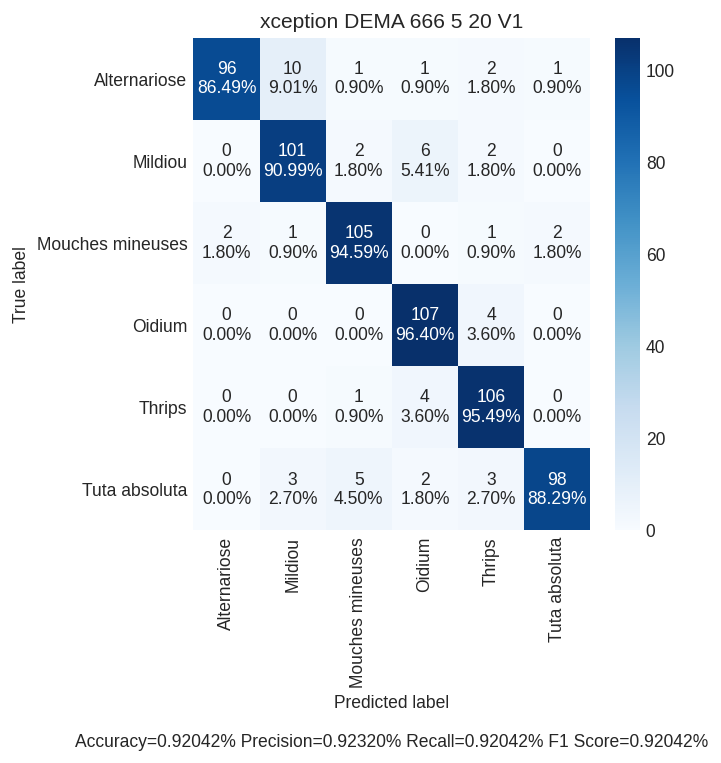

In [48]:
ListModels= [
    ['vit_base_patch16_224_miil',224,16,True],
    ['efficientnet_b0',224,16,True],
    ['efficientnet_b1',224,16,True],
    ['vit_base_patch32_224_in21k',224,32,True],
    ['densenet121',224,16,True],
    ['densenet161',224,16,True],
    ['resnet18',224,16,True],
    ['resnet26',224,16,True],
    ['resnet34',224,16,True],
    ['densenet169',224,16,True],
    ['densenet201',224,16,True],
    ['efficientnet_b2',224,16,True],
    ['inception_resnet_v2',224,16,True],
    ['xception',224,16,True],
]    
selectedModels=list()
c_ = 0
for Folds in [3,2,4,5,7,10]:
    train = 1-(1/Folds);test=1/Folds
    for index, DB in DataBases.iterrows():
        DatasetName, n_classes, minImages, avgImages, maxImages = DB['DatasetName'],DB['n_classes'],DB['min'],DB['avg'],DB['max']
        if DatasetName == 'PLD':
                continue
        LDBS=False
        for limitImgInClasses in [maxImages, minImages, 150,200, avgImages]:
            if DatasetName == 'DEMA' and LDBS:
                continue
            elif DatasetName == 'ADEMOA' and LDBS:
                continue
            LDBS=True
            df_source,traintest = LoadingDataIntoDF(DatasetName,Folds=Folds,limitImgInClasses=limitImgInClasses,random_state=26)
            sizeDB=len(df_source)
            for modelName,imgSize,batch,pytorch in ListModels:
                tempS=list()
                temp,selectedModel = 0,0
                PathSave = f"{RDRes}/{DatasetName}/{modelName}"
                found=False
                for F in range(Folds):
                    for C in range(Folds):
                        savedModel = f"{PathSave}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{Folds}F_M{Folds}{F}{C}_{round(train*100)}_{round(test*100)}_{F}_{C}_Log.log"
                        if not os.path.isfile(savedModel):
                            continue
                        EvalLog=LoadFromFile(savedModel)
                        if not EvalLog:
                            continue
                        found=True
                        tempS.append([PathSave,f"{Folds}{F}{C}",F,C,savedModel.split("_Log.")[0]])
                        c_ += 1
                if found:
                    selectedModels.append([modelName,tempS,DatasetName,n_classes,sizeDB,Folds,round(test*100),limitImgInClasses])
#                     print(modelName,DatasetName,n_classes,sizeDB,Folds,round(test*100),limitImgInClasses)

print(f"{c_} results for {len(selectedModels)} models generated")
plotsFolder=f"{RDRes}/MX"
CleanFolder(plotsFolder)
CheckDir(plotsFolder)
for modelName,RawStr,DatasetName,n_classes,sizeDB,Folds,test,limitImgInClasses in selectedModels:
    n_classes,sizeDB,Folds = int(n_classes),int(sizeDB),int(Folds)
    df_source,traintest = LoadingDataIntoDF(DatasetName,Folds=Folds,limitImgInClasses=limitImgInClasses,random_state=26)
    subDFT,subDFE = DF_Train(df_source,traintest)
    V,leV = DataSetGenerator(subDFT,train=False,test=False,imgSize=224)
    if len(RawStr)>Folds:
        R = 2 if not len(RawStr)%Folds else 1
    else:
        R = 1
    for V in range(R):
        try:
            y_true,y_pred = [],[]
            for i in range(Folds): 
                if V:
                    PathDataEval = f"{RawStr[i+Folds][-1]}_Eval.log"
                else:
                    PathDataEval = f"{RawStr[i][-1]}_Eval.log"
                if not os.path.isfile(PathDataEval):
                    continue
                print(f"{PathDataEval} {len(y_true)} {len(y_pred)}")
                y_true_,y_pred_ = getYY(PathDataEval,pytorch=True)
                for k in range(len(y_pred_)):
                    y_true.append(y_true_[k])
                    y_pred.append(y_pred_[k])
                if len(y_true)<1:
                    print("continue")
                    continue
                if i>=len(RawStr):
                    print("break")
                    break

            if len(y_true)<1 or len(y_pred)<1 :
                continue
            categories=leV.classes_
            StrV = 'V1' if not V else 'V2'
            print(f"{modelName} {DatasetName} {sizeDB} {Folds} {test} {StrV} {len(y_true)} {len(y_pred)}")
            roc_cur_plot(y_true,y_pred,n_classes=n_classes,lw=2,save=True,saveAs=plotsFolder,categories=categories,
                         title=f"{modelName} {DatasetName} {sizeDB} {Folds} {test} {StrV}")
            temp = make_confusion_matrix(y_true,y_pred,save=True,multiModel=False,
                                          saveAs=plotsFolder,
                                          categories=categories,
                                          title=f"{modelName} {DatasetName} {sizeDB} {Folds} {test} {StrV}")
            if len(RawStr)<=Folds:
                break
        except:
            continue

In [ ]:
import warnings
warnings.filterwarnings("ignore")
plotsFolder=f"{RDRes}/MX"
CleanFolder(plotsFolder)
CheckDir(plotsFolder)
for modelName,RawStr,DatasetName,n_classes,sizeDB,Folds,test,limitImgInClasses in selectedModels:
    n_classes,sizeDB,Folds = int(n_classes),int(sizeDB),int(Folds)
    df_source,traintest = LoadingDataIntoDF(DatasetName,Folds=Folds,limitImgInClasses=limitImgInClasses,random_state=26)
    subDFT,subDFE = DF_Train(df_source,traintest)
    V,leV = DataSetGenerator(subDFT,folds=Folds,train=False,test=False,imgSize=224)
    if len(RawStr)>Folds:
        R = 2 if not len(RawStr)%Folds else 1
    else:
        R = 1
    for V in range(R):
        try:
            y_true,y_pred = [],[]
            for i in range(Folds): 
                if V:
                    PathDataEval = f"{RawStr[i+Folds][-1]}_Eval.log"
                else:
                    PathDataEval = f"{RawStr[i][-1]}_Eval.log"
                if not os.path.isfile(PathDataEval):
                    continue
                y_true_,y_pred_ = getYY(PathDataEval,pytorch=True)
                for k in range(len(y_pred_)):
                    y_true.append(y_true_[k])
                    y_pred.append(y_pred_[k])
                if len(y_true)<1:
                    continue
                if i>=len(RawStr):
                    break

            if len(y_true)<1 or len(y_pred)<1 :
                continue
            categories=leV.classes_
            StrV = 'V1' if not V else 'V2'
            roc_cur_plot(y_true,y_pred,n_classes=n_classes,lw=2,save=True,saveAs=plotsFolder,categories=categories,
                         title=f"{modelName} {DatasetName} {sizeDB} {Folds} {test} {StrV}")
            temp = make_confusion_matrix(y_true,y_pred,save=True,multiModel=False,
                                          saveAs=plotsFolder,
                                          categories=categories,
                                          title=f"{modelName} {DatasetName} {sizeDB} {Folds} {test} {StrV}")
            if len(RawStr)<=Folds:
                break
        except:
            continue

In [197]:
clear_output(wait=True)

In [20]:
def CleanTempModels(PathMS=f"{RDRes}"):
    if os.path.isdir(f"{PathMS}"):
        for folder in listdir(PathMS):
            if os.path.isdir(f"{PathMS}/{folder}"):
                for subFolder in listdir(f"{PathMS}/{folder}"):
                    CleanTempModels(f"{PathMS}/{folder}/{subFolder}")
            elif folder.endswith(".MS"):            
                try:
                    train=int(folder.split("_")[-4])
                    test =int(folder.split("_")[-3])
                    if (train+test)!=100:
#                         os.remove(f"{PathMS}/{folder}")
                        print(f"{PathMS}/{folder}")
                except:
                    print("oh no, unexpected error")

In [189]:
CleanTempModels(RDRes)

In [72]:
A,L,M1_,M2_=0,100,0,0
M1i,M1j,M2i,M2j=0,0,0,0
for i in range(5):
    for loop_ in range(5):
        for loop__ in range(5):
            valModel=LoadFromFile(f"{RDRes}/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_3F_M{i+1}_67_33_{loop_}_{loop__}_Log.log")
            log_Models=dict()
            if valModel:
                log_Models[f"{loop_}_Acc"]=valModel[0].item()
                log_Models[f"{loop_}_Loss"]=valModel[1].item()
            for M, val in log_Models.items(): 
                M_=M.split("_")[1]
                M=M.split("_")[0]
        #         print(val,A,L,M_,M)
                if val > A and M_ == "Acc":
                    M1_,A,M1i,M1j=M,val,i,loop__
                if val < L and M_ == "Loss": 
                    M2_,L,M2i,M2j=M,val,i,loop__
#         print(M1,A,M2,L)
#     print(A,L,M1,M2)
M=list()
M.append([M1_,M1i,M1j])
if not M1_==M2_ and not M1i==M2i and not M1j==M2j:
    M.append([M2_,M2i,M2j])
for Mi,M_,Mj in M:
    M_=int(M_)+1
    print(M_,Mi,Mj)
    print(LoadFromFile(f"{RDRes}/Cactus/vit_base_patch16_224_miil/vit_base_patch16_224_miil_Cactus_C6_600_3F_M{M_}_67_33_{Mi}_{Mj}_Log.log"))

1 2 0
[tensor(0.3300, device='cuda:0'), tensor(1.6372, device='cuda:0')]


In [34]:
def LoadingDataIntoDF(DatasetName='Cactus',Path=False,limitImgInClasses=100,Folds=5,CV=False,random_state=26):
    if not CV:
        CV = Folds 
    #fixing the path for the images
    if DatasetName == 'DBX' or DatasetName == 'Cactus':
        Path=RIMGGAIO
    elif DatasetName and not Path:
        Path=f"{RDTest}/{DatasetName}"
    while(not os.path.isdir(Path)) :
        Path=input("Insert the path for the dataset")
    
    #Loading information
    listToDf,indexL = list(),0
    splitedFold=False
    if any(elem in listdir(Path) for elem in ['train','val','test']):
        splitedFold=True
        for Step in ['train','val','test']:
            try:
                folder_list = sorted(listdir(f"{Path}/{Step}"))
            except:
                continue
            for file in folder_list:
                if not os.path.isdir(f"{Path}/{Step}/{file}"):
                    continue
                i=0
                for imageName in sorted(listdir(f"{Path}/{Step}/{file}")):    
                    if not imageName.lower().endswith(".jpg")==True and not imageName.lower().endswith(".png")==True and not imageName.lower().endswith(".jpeg")==True :
                        continue
                    if Step == 'train':
                        listToDf.append([indexL,imageName,file,DatasetName,f"{Path}/{Step}/{file}/{imageName}",1])
                    elif Step == 'test':
                        listToDf.append([indexL,imageName,file,DatasetName,f"{Path}/{Step}/{file}/{imageName}",0])
                    else :
                        listToDf.append([indexL,imageName,file,DatasetName,f"{Path}/{Step}/{file}/{imageName}",-1])
                    indexL+=1
                    i+=1
                    if i>=limitImgInClasses:
                        break
    else:
        for file in sorted(listdir(Path)):
            if file=='Confused' or file =='Test':
                continue
            if os.path.isdir(f"{Path}/{file}"):
                i=0
                for imageName in sorted(listdir(f"{Path}/{file}")):
                    if not imageName.lower().endswith(".jpg")==True and not imageName.lower().endswith(".png")==True and not imageName.lower().endswith(".jpeg")==True :
                        continue
                    listToDf.append([indexL,imageName,file,DatasetName,f"{Path}/{file}/{imageName}"])
                    indexL+=1
                    i+=1
                    if i>=limitImgInClasses:
                        break
            else:
                continue
    try:
        if splitedFold:
            df_source = pd.DataFrame(list(listToDf),columns =['ID', 'Image name', 'Class', 'DB name', 'Path', 'Train'])
            Folds = 1
            traintest=[[df_source.loc[df_source['Train'].isin([1, -1])].index,df_source.loc[df_source['Train'] == 0].index]]
            train,test,traintestCV,TTList=list(),list(),list(),list()
            for i in range(Folds):
                train.append(df_source.iloc[traintest[i][0]])
                test.append(df_source.iloc[traintest[i][1]])
                skf_ = StratifiedKFold(n_splits=CV, random_state=random_state+i, shuffle=True)
                traintestCV_ = list(skf_.split(df_source.iloc[traintest[i][0]],df_source.iloc[traintest[i][0]]['Class']))
                trainCV,valCV,CVList=list(),list(),list()
                for j in range(len(traintestCV_)):
                    trainCV.append(train[i].iloc[traintestCV_[j][0]])
                    valCV.append(train[i].iloc[traintestCV_[j][1]])
                    CVList.append([train[i].iloc[traintestCV_[j][0]]['ID'],train[i].iloc[traintestCV_[j][1]]['ID']])
                traintestCV.append([trainCV,valCV])
                TTList.append([train[i]['ID'],test[i]['ID'],CVList])

        else:
            #transfer it to a Dataframe
            df_source = pd.DataFrame(list(listToDf),columns =['ID', 'Image name', 'Class', 'DB name', 'Path'])
            skf = StratifiedKFold(n_splits=Folds, random_state=random_state, shuffle=True)
            # kf  = KFold(n_splits=CV,    random_state=random_state, shuffle=True)
            traintest=list(skf.split(df_source,df_source['Class']))
            train,test,traintestCV,TTList=list(),list(),list(),list()
            for i in range(Folds):
                train.append(df_source.iloc[traintest[i][0]])
                test.append(df_source.iloc[traintest[i][1]])
                skf_ = StratifiedKFold(n_splits=CV, random_state=random_state+i, shuffle=True)
                traintestCV_ = list(skf_.split(df_source.iloc[traintest[i][0]],df_source.iloc[traintest[i][0]]['Class']))
                trainCV,valCV,CVList=list(),list(),list()
                for j in range(len(traintestCV_)):
                    trainCV.append(train[i].iloc[traintestCV_[j][0]])
                    valCV.append(train[i].iloc[traintestCV_[j][1]])
                    CVList.append([train[i].iloc[traintestCV_[j][0]]['ID'],train[i].iloc[traintestCV_[j][1]]['ID']])
                traintestCV.append([trainCV,valCV])
                TTList.append([train[i]['ID'],test[i]['ID'],CVList])
    except:
        if len(listToDf[0]) != 5:
            print("Re-check")
        raise
        return False,False
    
    listTrain=dict()
    for elem in df_source['ID']:
        newListIndex,TT = list(),list()
        for i in range(Folds):
            if elem in train[i]['ID']:
                TT.append(1)
            elif elem in test[i]['ID']:
                TT.append(0)
            else:
                TT.append(-1)
            if TT[i]==-1:
                temp=list()
                for j in range(CV):
                    temp.append(5)
                newListIndex.append(temp)
            else:
                temp=list()
                for j in range(CV):
                    if elem in traintestCV[i][0][j]['ID']:
                        temp.append(1)
                    elif elem in traintestCV[i][1][j]['ID']:
                        temp.append(0)
                    else:
                        temp.append(-1)
                newListIndex.append(temp)
        listTrain[elem]=[elem,TT,newListIndex]
    df_source["Train"]=pd.Series(listTrain)
    del traintest,train,test,traintestCV
    return df_source,TTList

In [20]:
def DF_Train(df,traintest):
    df.reset_index()
    subDFT,subDFE=list(),list()
    CV=len(df['Train'][0][-1][0])
    Folds=len(df['Train'][0][1])
    
    for i in range(Folds):
        subDFT.append(df[df['ID'].isin(traintest[i][0])])
        subDFE.append(df[df['ID'].isin(traintest[i][1])])
        for j in range(CV):
            L=list()
            for elem in traintest[i][0]:
                if elem in traintest[i][2][j][0]:
                    L.append(True)
                else:
                    L.append(False)
            subDFT[i][f"Train {j+1}"] = L
        subDFT[i].drop(columns=['Train'],inplace=True)
        subDFT[i].set_index('ID',inplace=True)
        subDFE[i].drop(columns=['Train'],inplace=True)
        subDFE[i].set_index('ID',inplace=True)
    return subDFT,subDFE

In [21]:
from torch.utils.data import TensorDataset, DataLoader, Dataset
class myDataset(Dataset):
    """
    The Class will act as the container for our dataset. It will take dataframe and the transform function for transforming the dataset.
    """
    def __init__(self, data_frame, transform=None):
        self.data_frame = data_frame
        self.transform = transform

    def __len__(self):
        # Return the length of the dataset
        return len(self.data_frame)

    def __getitem__(self, idx):
        # Return the observation based on an index. Ex. dataset[0] will return the first element from the dataset, in this case the image and the label.
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        # img_name = os.path.join(self.root_dir, self.data_frame.iloc[idx, 1])
        image = Image.open(self.data_frame.iloc[idx, 3])
        label = self.data_frame.iloc[idx, -1]
        
        if self.transform:
            image = self.transform(image)

        return (image, label)

In [152]:
df_source_,traintest = LoadingDataIntoDF('DEMA',Folds=5,limitImgInClasses=200,random_state=26)
df_source_.head(1)

ID            Image name         Class DB name  \
0   0  EarlyBlight-0000.jpg  Alternariose    DEMA   

                                                Path  \
0  ../Datasets/Test/DEMA/Alternariose/EarlyBlight...   

                                               Train  
0  [0, [1, 1, 1, 0, 1], [[1, 1, 1, 1, 0], [1, 1, ...

In [153]:
df_source,traintest = LoadingDataIntoDF('ADEMOA',Folds=5,limitImgInClasses=200,random_state=26)
df_source.head(1)

ID            Image name         Class DB name  \
0   0  EarlyBlight-0000.jpg  Alternariose  ADEMOA   

                                                Path  \
0  ../Datasets/Test/ADEMOA/train/Alternariose/Ear...   

                         Train  
0  [0, [1], [[1, 1, 1, 1, 0]]]

In [155]:
subDFT,subDFE = DF_Train(df_source,traintest)
T,leT = DataSetGenerator(subDFT,train=True,test=False,imgSize=224)


<ipython-input-133-89b9ad2b1eda>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subDFT[i][f"Train {j+1}"] = L
/home/anas/Data/Cactus/CactusApp/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-128-de6ab3ec4fc9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [127]:
df_source.head(1)
len(df_source['Train'][0][-1][0])

5

In [22]:
import torch

In [165]:
train_features = next(iter(T[0]))
print(f"Feature batch shape: {train_features.__getitem__(0)}")

Feature batch shape: (tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 0)


In [23]:
#@title def `DataSetGenerator()`
def DataSetGenerator(df_dataset,train=True,test=False,imgSize=224):
    CV=len(df_source['Train'][0][-1][0])
    folds=len(df_source['Train'][0][1])
    DF_result=list()
    for i in range(len(df_dataset)):
        dataset_=list()
        for j in range(CV):
            if test:
                df = df_dataset[i]
            else:
                df = df_dataset[i][df_dataset[i][f'Train {j+1}']==train]
            # Encode the label
            le = LabelEncoder()
            label_encoded = le.fit_transform(df['Class'])
            df['label_encoded'] = label_encoded
            # Taking the class name
            label_names = list(le.classes_)

            dataset_train = myDataset(
                data_frame=df,
                transform = transforms.Compose([
                            transforms.Resize((imgSize,imgSize),interpolation=InterpolationMode.BICUBIC), #interpolation=Image.NEAREST, 
                            transforms.RandomHorizontalFlip(),
                            transforms.RandomVerticalFlip(),
                            transforms.ToTensor()
                        ])
            )
            dataset_.append(dataset_train)
            if test:
                break
        DF_result.append(dataset_)

    #le.inverse_transform(le.transform(label_names))
    return DF_result , le

In [93]:
LoadingDataIntoDF('ADEMOA',Folds=5,limitImgInClasses=200,random_state=26)

(      ID              Image name          Class DB name  \
 0      0    EarlyBlight-0000.jpg   Alternariose  ADEMOA   
 1      1    EarlyBlight-0001.jpg   Alternariose  ADEMOA   
 2      2    EarlyBlight-0002.jpg   Alternariose  ADEMOA   
 3      3    EarlyBlight-0003.jpg   Alternariose  ADEMOA   
 4      4    EarlyBlight-0004.jpg   Alternariose  ADEMOA   
 ..   ...                     ...            ...     ...   
 661  661  tuta absoluta-0075.jpg  Tuta absoluta  ADEMOA   
 662  662  tuta absoluta-0079.jpg  Tuta absoluta  ADEMOA   
 663  663  tuta absoluta-0093.jpg  Tuta absoluta  ADEMOA   
 664  664  tuta absoluta-0106.jpg  Tuta absoluta  ADEMOA   
 665  665  tuta absoluta-0109.jpg  Tuta absoluta  ADEMOA   
 
                                            Path  \
 0    ../Datasets/Test/ADEMOA/train/Alternariose   
 1    ../Datasets/Test/ADEMOA/train/Alternariose   
 2    ../Datasets/Test/ADEMOA/train/Alternariose   
 3    ../Datasets/Test/ADEMOA/train/Alternariose   
 4    ../Datasets/

In [24]:
from torchvision.transforms import InterpolationMode
pd.options.mode.chained_assignment = None

In [186]:
df_source,traintest = LoadingDataIntoDF('DEMA',Folds=5,limitImgInClasses=200,random_state=26)
subDFT,subDFE = DF_Train(df_source,traintest)
T,leT = DataSetGenerator(subDFT,train=True,test=False,imgSize=224)
V,leV = DataSetGenerator(subDFT,train=False,test=False,imgSize=224)
E,leE = DataSetGenerator(subDFE,train=False,test=True,imgSize=224)

In [107]:
df_source,traintest = LoadingDataIntoDF('ADEMOA',Folds=5,limitImgInClasses=200,random_state=26)
len(traintest[0][0])+len(traintest[0][1])

666

In [102]:
df_source,traintest = LoadingDataIntoDF('DEMA',Folds=5,limitImgInClasses=200,random_state=26)
df_source

0        0
1        1
5        5
7        7
8        8
      ... 
660    660
661    661
662    662
663    663
665    665
Name: ID, Length: 532, dtype: int64

In [78]:
for i in range(5):
    print(len(T[i][0])+len(V[i][0])+len(E[i][0]))

666


IndexError: list index out of range

In [85]:
leV.classes_

array(['Damaged', 'EarlyStage', 'Healthy', 'LateStage', 'NoCactus',
       'Old_Dead'], dtype=object)

In [85]:
import torch
model = timm.create_model('vit_base_patch16_224_miil', pretrained=True, num_classes=n_classes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.load_state_dict(copy.deepcopy(torch.load('../Datasets/Results_Finale/Cactus/vit_base_patch16_224_miilV2/vit_base_patch16_224_miil_Cactus_C6_600_3F_M300_44_22_0_0.MS',device)))

<All keys matched successfully>

In [100]:
for i in range(len(T)):
    for j in range(len(V[i])):
        for img, lab in V[i][j]:
            if lab<0 or lab>5:
                print(lab)

In [94]:
import torch

<Figure size 640x480 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

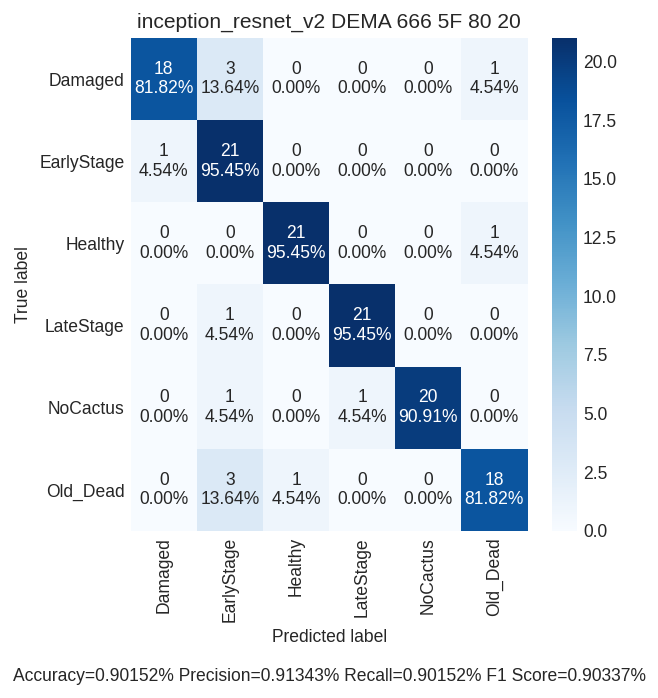

In [114]:
import warnings
warnings.filterwarnings("ignore")
plotsFolder=f"{RDRes}/Matrix"
CleanFolder(plotsFolder)
CheckDir(plotsFolder)
for selectedModel in selectedModels:
    train,test =selectedModel.split("_")[-2],selectedModel.split("_")[-1],
    n_classes  =int(selectedModel.split("_")[-6].split("C")[-1])
    DatasetName=selectedModel.split("_")[-7]
    sizeDB     =selectedModel.split("_")[-5]
    folds      =selectedModel.split("_")[-4]
    modelName=selectedModel.split(f"_{DatasetName}")[0].split("/")[-1]
#     print(f"{selectedModel}:\n{modelName} {DatasetName} {sizeDB} {folds} {n_classes}")
    PathDataEval = f"{selectedModel}_Eval.log"
    if not os.path.isfile(PathDataEval):
        continue
    y_true,y_pred = [],[]
    y_true_,y_pred_ = getYY(PathDataEval,pytorch=True)
    for i in range(len(y_pred_)):
        if y_true_[i]>6 or y_pred_[i]>6:
            continue
        y_true.append(y_true_[i])
        y_pred.append(y_pred_[i])
    if len(y_true)<1:
        continue
    categories='auto'
    roc_cur_plot(y_true,y_pred,n_classes=n_classes,lw=2,save=True,saveAs=plotsFolder,
                 title=f"{modelName} {DatasetName} {sizeDB} {folds} {train} {test}")
    temp = make_confusion_matrix(y_true,y_pred,save=True,multiModel=False,
                                  saveAs=plotsFolder,
                                  categories=categories,
                                  title=f"{modelName} {DatasetName} {sizeDB} {folds} {train} {test}")

# next

In [ ]:
overFitLimit, minAcc, Tolerence, max_trials,epochs = 7, .5, 5, False, 100
DatasetName, n_classes, Cross = 'Cactus', 5, True

# overWrite = input("Do you need to re-train models ?\n(y)yes or (n)no\t")
# overWrite = True if overWrite == "y" else False  
overWrite = False

fastTest= [
    ['vit_base_patch16_224_miil_in21k',224,16]
]

limitImgInClasses = 260 #*[25*i for i in range(18,0,-1)]:
PathSave = f"{rootDirModel}/{DatasetName}NewViTOnly"
checkDir(PathSave)
modelName,imgSize,batch = "vit_base_patch16_224_miil_in21k",224,16
for leaveout,folds in  [[1,3],[1,5]] :
    train,test=round((folds-leaveout)/folds,4),round(leaveout/folds,4)
    for modelName,imgSize,batch in fastTest:
        for n_classes in [5,3,4]:
            for B in [i+1 for i in range(14)]:
                for HL in range(6):
                    for original in [False]:
                        sizeDB=limitImgInClasses*n_classes
                        rootDirIMGO=f"{rootDirIMGO_}/{DatasetName}/{sizeDB}/{folds}F"
                        if original:
                            PathSavedModelResult = f"{PathSave}/{modelName}_B{B}_HL{HL}_Adam_{DatasetName}_C{n_classes}_{sizeDB}_{folds}F{leaveout}L_M1_{round(train*100)}_{round(test*100)}_Log.log"
                        else:
                            PathSavedModelResult = f"{PathSave}/{modelName}_B{B}_HL{HL}_AdamW_{DatasetName}_C{n_classes}_{sizeDB}_{folds}F{leaveout}L_M1_{round(train*100)}_{round(test*100)}_Log.log"
                        results=LoadFromFile(PathSavedModelResult)
                        if results and not overWrite:
                            continue
                        clear_output(wait=True)
                        TimeElapsed('\nTime elapsed before loop over models is :')
                        try:
                            model = ModelsDLC(modelName,local=False,saveMultiModels=True,tuneHyper=False,sizeDB=sizeDB,B=B,HL=HL,Original=original,
                                    img_size=imgSize,DatasetName=DatasetName,printLog=False,data_from_np=True,Tolerence=Tolerence,max_trials=max_trials,
                                    Cross=Cross,Folds=folds,Leaveout=leaveout,n_classes=n_classes,batch_size=batch)
                        except:
                            print('error creating the model')
                            print(f"\nModel={modelName}_B{B}_HL{HL}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                            TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                            with open(f"{rootDirModel}/logError.txt", "a") as fp:
                                fp.write(f"error creating the model : {modelName}_B{B}_HL{HL}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                            clearRamVRam()
                            continue
                        print(f"Training with :\nModel={modelName}_B{B}_HL{HL}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                        try:
                            model.summury()
                            EP,log = model.train(train=train,epochs=epochs,limitOverFit=overFitLimit,minAcc=minAcc,verbose=1,pathExtract=rootDirIMGO,PathSave=PathSave)
                        except:
#                             raise
                            print('error training the model')
                            print(f"\nModel={modelName}_B{B}_HL{HL}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                            TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                            with open(f"{rootDirModel}/logError.txt", "a") as fp:
                                fp.write(f"error training the model : {modelName}_B{B}_HL{HL}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                            clearRamVRam()
                            raise
                        TimeT=TimeElapsed('\nTime to train modele is:',Restart=False,GT=False,ExactTime=True)
                        if not Cross:
                            try:
                                model.save(PathSave=PathSave,model_name=f"{modelName}_B{B}_HL{HL}",sizeDB=sizeDB,epochs=EP,log=log,
                                           earlyStopping=overFitLimit,Time=TimeT,Folds=folds,Leaveout=leaveout,train=train,test=test)
                            except:
                                print("error saving the model")
                                print(f"\nModel={modelName}_B{B}_HL{HL}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                                TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                                with open(f"{rootDirModel}/logError.txt", "a") as fp:
                                    fp.write(f"error saving the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                                clearRamVRam()
                                raise
                        model.free()
                        clearRamVRam()
                        TimeElapsed(f"\nTime tooken by model {modelName}_B{B}_HL{HL}({folds}F{leaveout}L/{sizeDB}/{train*100:.2f}%/{test*100:.2f}%) is:",sound=True)
TimeElapsed('\nTime for a full turn over all models is:',sound=True)
rootDirIMGO=rootDirIMGO_

In [ ]:
overFitLimit, minAcc, Tolerence, max_trials,epochs = 7, .5, 5, False, 100
DatasetName, n_classes, Cross = 'Cactus', 5, True

fastTest= [
#     ['vit_base_patch16_224',224,16,True],
#     ['vit_base_patch16_224_in21k',224,16,True],
#     ['vit_base_patch32_224_in21k',224,32,True],
#     ['vit_base_patch16_224_miil',224,16,True],
    ['vit_base_patch16_224_miil_in21k',224,16,True],
#     ['vit_small_patch16_224',224,8,True],
#     ['deit_base_patch16_224',224,16,True],
#     ['deit_small_patch16_224',224,16,True],
#     ['deit_tiny_patch16_224',224,16,True],
#     ['densenet121',224,16,True],
#     ['densenet161',224,16,True],
#     ['efficientnet_b0',224,16,True],
#     ['efficientnet_b1',224,16,True],
#     ['efficientnet_b2',224,16,True],
#     ['inception_v3',224,16,True],
#     ['inception_v4',224,16,True],
#     ['resnet50',224,16,True],
#     ['resnet34',224,16,True],
#     ['densenet169',224,16,True],
#     ['densenet201',224,16,True],
#     ['inception_resnet_v2',224,16,True],
#     ['resnet18',224,16,True],
#     ['resnet26',224,16,True],
#     ['xception',224,16,True],
#     ['EfficientNet_B0_TL',224,16,False],
#     ['EfficientNet_B1_TL',224,16,False],
#     ['EfficientNet_B2_TL',224,16,False],
#     ['DenseNet_121',224,16,False],
#     ['DenseNet_169',224,16,False],
#     ['DenseNet_201',224,16,False],
#     ['ResNet_50',224,16,False],
#     ['ResNet_152',224,16,False]
]

overWrite = input("Do you need to re-train models ?\n(y)yes or (n)no\t")
overWrite = True if overWrite == "y" else False  

ListModels = input("Do you need to run a fast verification ?\n(y)yes or (n)no\t")
ListModels = fastTest if ListModels == "y" else [*torchModels,*KerasModeles]  

limitImgInClasses = 260 #*[25*i for i in range(18,0,-1)]:
PathSave = f"{rootDirModel}/{DatasetName}saveViT/V1"
checkDir(PathSave)
for modelName,imgSize,batch,pytorch in ListModels:
    for leaveout,folds in  [[1,5],[1,3]] :
        train,test=round((folds-leaveout)/folds,4),round(leaveout/folds,4)
        for n_classes in [3,4,5]:
            sizeDB=limitImgInClasses*n_classes
            rootDirIMGO=f"{rootDirIMGO_}/{DatasetName}/{sizeDB}/{folds}F"
            PathSavedModelResult = f"{PathSave}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{folds}F{leaveout}L_M1_{round(train*100)}_{round(test*100)}_Log.log"
            results=LoadFromFile(PathSavedModelResult)
            if results and not overWrite:
                continue
            clear_output(wait=True)
            TimeElapsed('\nTime elapsed before loop over models is :')
            try:
                model = ModelsDL(modelName,local=False,saveMultiModels=True,pytorch=pytorch,tuneHyper=False,sizeDB=sizeDB,
                        img_size=imgSize,DatasetName=DatasetName,printLog=False,data_from_np=True,Tolerence=Tolerence,max_trials=max_trials,
                        Cross=Cross,Folds=folds,Leaveout=leaveout,n_classes=n_classes,batch_size=batch,B=14,HL=3)
            except:
                print('error creating the model')
                print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                with open(f"{rootDirModel}/logError.txt", "a") as fp:
                    fp.write(f"error creating the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                clearRamVRam()
                raise
#                 ontinue
            print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
            try:
#                   print(modelName,"OK")
#                 model.summury()
#                 pytorch_total_params_ = sum(p.numel() for p in model.model.parameters())
#                 pytorch_total_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)
#                 print("Number of parameters :",pytorch_total_params_,", trained :", pytorch_total_params)
#                 temp = input("next")
                EP,log = model.train(train=train,epochs=epochs,limitOverFit=overFitLimit,minAcc=minAcc,verbose=1,pathExtract=rootDirIMGO,PathSave=PathSave)
            except:
                print('error training the model')
                print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                with open(f"{rootDirModel}/logError.txt", "a") as fp:
                    fp.write(f"error training the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                clearRamVRam()
                raise
#             TimeT=TimeElapsed('\nTime to train modele is:',Restart=False,GT=False,ExactTime=True)
#             if not Cross:
#                 try:
#                     model.save(PathSave=PathSave,model_name=modelName,sizeDB=sizeDB,epochs=EP,log=log,
#                                earlyStopping=overFitLimit,Time=TimeT,Folds=folds,Leaveout=leaveout,train=train,test=test)
#                 except:
#                     print("error saving the model")
#                     print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
#                     TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
#                     with open(f"{rootDirModel}/logError.txt", "a") as fp:
#                         fp.write(f"error saving the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
#                     clearRamVRam()
#                     raise
            model.free()
            clearRamVRam()
#             TimeElapsed(f"\nTime tooken by model {modelName}({folds}F{leaveout}L/{sizeDB}/{train*100:.2f}%/{test*100:.2f}%) is:",sound=True)
#     TimeElapsed('\nTime for a full turn over all models is:',sound=True)
rootDirIMGO=rootDirIMGO_

In [ ]:
overFitLimit, minAcc, Tolerence, max_trials,epochs = 7, .5, 10, 256, 100
DatasetName, n_classes = 'Cactus', 8

fastTest=[
    ['DenseNet_201',224,16,False],
    ['EfficientNet_B0_TLK',224,16,False],
    ['EfficientNet_B1_TLK',224,16,False]
] #if needed torch models first then keras's

overWrite = input("Do you need to re-train models ?\n(y)yes or (n)no\t")
overWrite = True if overWrite == "y" else False  

ListModels = input("Do you need to run a fast verification ?\n(y)yes or (n)no\t")
ListModels = fastTest if ListModels == "y" else ModelsList  

for leaveout,folds in [[1,5],[2,5],[3,5],[4,5]]:
    for limitImgInClasses in [111,200,400]:#*[25*i for i in range(18,0,-1)]:
        sizeDB=limitImgInClasses*n_classes
        rootDirIMGO=f"{rootDirIMGO_}/{DatasetName}/{limitImgInClasses*n_classes}/{folds}F/{leaveout}L"
        PathSave = f"{rootDirModel}/{DatasetName}"
        checkDir(PathSave)
        for modelName,imgSize,batch,pytorch in ListModels:
            TimeElapsed('\nTime elapsed before loop over models is :')
            train,test=round(folds/(folds+leaveout),4),round(leaveout/(folds+leaveout),4)
            PathSavedModelResult = f"{rootDirModel}/{DatasetName}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{folds}F{leaveout}L_M__{round(train*100)}_{round(test*100)}_Log.log"
            results=LoadFromFile(PathSavedModelResult)
            if results and not overWrite:
                continue
            clear_output(wait=True)
            try:
                model = ModelsDL(modelName,local=False,saveMultiModels=True,pytorch=pytorch,tuneHyper=False,sizeDB=sizeDB,
                        img_size=imgSize,DatasetName=DatasetName,printLog=False,data_from_np=True,Tolerence=Tolerence,max_trials=max_trials,
                        Cross=True,Folds=folds,Leaveout=leaveout,n_classes=n_classes,batch_size=batch)
            except:
                print('error creating the model')
                print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                with open(f"{rootDirModel}/logError.txt", "a") as fp:
                    fp.write(f"error creating the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                clearRamVRam()
                continue
            print(f"Training with :\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
            try:
                EP,log = model.train(train=train,epochs=epochs,limitOverFit=overFitLimit,minAcc=minAcc,verbose=1,pathExtract=rootDirIMGO,PathSave=PathSave)
            except:
                print('error training the model')
                print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                with open(f"{rootDirModel}/logError.txt", "a") as fp:
                    fp.write(f"error training the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                clearRamVRam()
                raise
            TimeT=TimeElapsed('\nTime to train modele is:',Restart=False,GT=False,ExactTime=True)
            try:
                model.save(PathSave=PathSave,model_name=modelName,sizeDB=sizeDB,epochs=EP,log=log,
                           earlyStopping=overFitLimit,Time=TimeT,Folds=folds,Leaveout=leaveout,train=train,test=test)
            except:
                print("error saving the model")
                print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                with open(f"{rootDirModel}/logError.txt", "a") as fp:
                    fp.write(f"error saving the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                clearRamVRam()
                raise
            model.free()
            clearRamVRam()
            TimeElapsed(f"\nTime tooken by model {modelName}({folds}F{leaveout}L/{sizeDB}/{train*100:.2f}%/{test*100:.2f}%) is:",sound=True)
        TimeElapsed('\nTime for a full turn over all models is:',sound=True)
rootDirIMGO=rootDirIMGO_

In [ ]:
DatasetName, n_classes, ImgSizeOrginal, Cross = 'Cactus', 8, 240, True
overFitLimit, minAcc, Tolerence, max_trials,epochs = 7, .5, 10, 256, 100
n_classes, image_list, label_list = generateData_(rootDirIMGC,100,Classes=n_classes,size=ImgSizeOrginal,toPytorch=True)
dataFromNP_T = postGen(image_list,label_list,0.75, 0.85)
n_classes, image_list, label_list = generateData_(rootDirIMGC,100,Classes=n_classes,size=ImgSizeOrginal,toPytorch=False)
dataFromNP_K = postGen(image_list,label_list,0.75, 0.85)
overWrite = input("Do you need to re-train models ?\n(y)yes or (n)no\t")
overWrite = True if overWrite == "y" else False  
clear_output(wait=True)

for leaveout,folds in [[1,5],[3,5],[4,5],[5,5]]:
    for limitImgInClasses in [111,200]:#,*[25*i for i in range(18,0,-1)]:
        for modelName,imgSize,batch,pytorch in fastTest:
            TimeElapsed('\nTime elapsed before loop over models is :')
            train,test=round(folds/(folds+leaveout),4),round(leaveout/(folds+leaveout),4)
            for DatasetName, n_classes in [['Cactus',8]]:
                sizeDB=limitImgInClasses*n_classes
                rootDirIMGO=f"{rootDirIMGO_}/{DatasetName}/{limitImgInClasses*n_classes}/{folds}F/{leaveout}L"
                PathSave = f"{rootDirModel}/{DatasetName}"
                checkDir(PathSave)
                PathSavedModelResult = f"{rootDirModel}/{DatasetName}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{folds}F{leaveout}L_M__{round(train*100)}_{round(test*100)}_Log.log"
                results=LoadFromFile(PathSavedModelResult)
                if results and not overWrite:
                    continue
                clear_output(wait=True)
                dataFromNP = dataFromNP_T if pytorch else dataFromNP_K
                try:
                    model = ModelsDL(modelName,local=False,saveMultiModels=True,pytorch=pytorch,tuneHyper=False,sizeDB=sizeDB,
                            img_size=imgSize,DatasetName=DatasetName,printLog=False,data_from_np=dataFromNP,Tolerence=Tolerence,max_trials=max_trials,
                            Cross=Cross,Folds=folds,Leaveout=leaveout,n_classes=n_classes,batch_size=batch)
                except:
                    print('error creating the model')
                    print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                    TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                    with open(f"{rootDirModel}/logError.txt", "a") as fp:
                        fp.write(f"error creating the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                    clearRamVRam()
                    continue
                print(f"Training with :\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                try:
                    EP,log = model.train(train=train,epochs=epochs,limitOverFit=overFitLimit,minAcc=minAcc,verbose=1,pathExtract=rootDirIMGO,PathSave=PathSave)
                except:
                    print('error training the model')
                    print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                    TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                    with open(f"{rootDirModel}/logError.txt", "a") as fp:
                        fp.write(f"error training the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                    clearRamVRam()
                    raise
                TimeT=TimeElapsed('\nTime to train modele is:',Restart=False,GT=False,ExactTime=True)
                try:
                    model.save(PathSave=PathSave,model_name=modelName,sizeDB=sizeDB,epochs=EP,log=log,
                               earlyStopping=overFitLimit,Time=TimeT,Folds=folds,Leaveout=leaveout,train=train,test=test)
                except:
                    print("error saving the model")
                    print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                    TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                    with open(f"{rootDirModel}/logError.txt", "a") as fp:
                        fp.write(f"error saving the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                    clearRamVRam()
                    raise
                model.free()
                clearRamVRam()
            TimeElapsed(f"\nTime tooken by model {modelName}({folds}F{leaveout}L/{sizeDB}/{train*100:.2f}%/{test*100:.2f}%) is:",sound=True)
        TimeElapsed('\nTime for a full turn over all models is:',sound=True)
rootDirIMGO=rootDirIMGO_

for leaveout,folds in [[2,5],[3,10]]:
    for modelName,imgSize,batch,pytorch in fastTest:
        for limitImgInClasses in [111,200]:#,*[25*i for i in range(18,0,-1)]:
            TimeElapsed('\nTime elapsed before loop over models is :')
            train,test=round(folds/(folds+leaveout),4),round(leaveout/(folds+leaveout),4)
            for DatasetName, n_classes in [['Cactus',8]]:
                sizeDB=limitImgInClasses*n_classes
                rootDirIMGO=f"{rootDirIMGO_}/{DatasetName}/{limitImgInClasses*n_classes}/{folds}F/{leaveout}L"
                PathSave = f"{rootDirModel}/{DatasetName}"
                checkDir(PathSave)
                PathSavedModelResult = f"{rootDirModel}/{DatasetName}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{folds}F{leaveout}L_M__{round(train*100)}_{round(test*100)}_Log.log"
                results=LoadFromFile(PathSavedModelResult)
                if results and not overWrite:
                    continue
                clear_output(wait=True)
                dataFromNP = dataFromNP_T if pytorch else dataFromNP_K
                try:
                    model = ModelsDL(modelName,local=False,saveMultiModels=True,pytorch=pytorch,tuneHyper=False,sizeDB=sizeDB,
                            img_size=imgSize,DatasetName=DatasetName,printLog=False,data_from_np=dataFromNP,Tolerence=Tolerence,max_trials=max_trials,
                            Cross=Cross,Folds=folds,Leaveout=leaveout,n_classes=n_classes,batch_size=batch)
                except:
                    print('error creating the model')
                    print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                    TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                    with open(f"{rootDirModel}/logError.txt", "a") as fp:
                        fp.write(f"error creating the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                    clearRamVRam()
                    continue
                print(f"Training with :\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                try:
                    EP,log = model.train(train=train,epochs=epochs,limitOverFit=overFitLimit,minAcc=minAcc,verbose=1,pathExtract=rootDirIMGO,PathSave=PathSave)
                except:
                    print('error training the model')
                    print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                    TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                    with open(f"{rootDirModel}/logError.txt", "a") as fp:
                        fp.write(f"error training the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                    clearRamVRam()
                    raise
                TimeT=TimeElapsed('\nTime to train modele is:',Restart=False,GT=False,ExactTime=True)
                try:
                    model.save(PathSave=PathSave,model_name=modelName,sizeDB=sizeDB,epochs=EP,log=log,
                               earlyStopping=overFitLimit,Time=TimeT,Folds=folds,Leaveout=leaveout,train=train,test=test)
                except:
                    print("error saving the model")
                    print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                    TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                    with open(f"{rootDirModel}/logError.txt", "a") as fp:
                        fp.write(f"error saving the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                    clearRamVRam()
                    raise
                model.free()
                clearRamVRam()
        TimeElapsed(f"\nTime tooken by model {modelName}({folds}F{leaveout}L/{sizeDB}/{train*100:.2f}%/{test*100:.2f}%) is:",sound=True)
    TimeElapsed('\nTime for a full turn over all models is:',sound=True)
rootDirIMGO=rootDirIMGO_

In [ ]:
for leaveout,folds in [[3,5],[4,5],[5,5],[3,10]]:
    for limitImgInClasses in [111,200,400]:#,*[25*i for i in range(18,0,-1)]:
        for modelName,imgSize,batch,pytorch in fastTest:
            TimeElapsed('\nTime elapsed before loop over models is :')
            train,test=round(folds/(folds+leaveout),4),round(leaveout/(folds+leaveout),4)
            for DatasetName, n_classes in [['Cactus',8],['Tomatos',6]]:
                sizeDB=limitImgInClasses*n_classes
                rootDirIMGO=f"{rootDirIMGO_}/{DatasetName}/{limitImgInClasses*n_classes}/{folds}F/{leaveout}L"
                PathSave = f"{rootDirModel}/{DatasetName}"
                checkDir(PathSave)
                PathSavedModelResult = f"{rootDirModel}/{DatasetName}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{folds}F{leaveout}L_M__{round(train*100)}_{round(test*100)}_Log.log"
                results=LoadFromFile(PathSavedModelResult)
                if results and not overWrite:
                    continue
                clear_output(wait=True)
                dataFromNP = dataFromNP_T if pytorch else dataFromNP_K
                try:
                    model = ModelsDL(modelName,local=False,saveMultiModels=True,pytorch=pytorch,tuneHyper=False,sizeDB=sizeDB,
                            img_size=imgSize,DatasetName=DatasetName,printLog=False,data_from_np=dataFromNP,Tolerence=Tolerence,max_trials=max_trials,
                            Cross=Cross,Folds=folds,Leaveout=leaveout,n_classes=n_classes,batch_size=batch)
                except:
                    print('error creating the model')
                    print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                    TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                    with open(f"{rootDirModel}/logError.txt", "a") as fp:
                        fp.write(f"error creating the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                    clearRamVRam()
                    continue
                print(f"Training with :\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                try:
                    EP,log = model.train(train=train,epochs=epochs,limitOverFit=overFitLimit,minAcc=minAcc,verbose=1,pathExtract=rootDirIMGO,PathSave=PathSave)
                except:
                    print('error training the model')
                    print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                    TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                    with open(f"{rootDirModel}/logError.txt", "a") as fp:
                        fp.write(f"error training the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                    clearRamVRam()
                    raise
                TimeT=TimeElapsed('\nTime to train modele is:',Restart=False,GT=False,ExactTime=True)
                try:
                    model.save(PathSave=PathSave,model_name=modelName,sizeDB=sizeDB,epochs=EP,log=log,
                               earlyStopping=overFitLimit,Time=TimeT,Folds=folds,Leaveout=leaveout,train=train,test=test)
                except:
                    print("error saving the model")
                    print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                    TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                    with open(f"{rootDirModel}/logError.txt", "a") as fp:
                        fp.write(f"error saving the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                    clearRamVRam()
                    raise
                model.free()
                clearRamVRam()
            TimeElapsed(f"\nTime tooken by model {modelName}({folds}F{leaveout}L/{sizeDB}/{train*100:.2f}%/{test*100:.2f}%) is:",sound=True)
        TimeElapsed('\nTime for a full turn over all models is:',sound=True)
rootDirIMGO=rootDirIMGO_

In [ ]:
DatasetName, n_classes, ImgSizeOrginal, Cross = 'Cactus', 8, 240, True
overFitLimit, minAcc, Tolerence, max_trials,epochs = 7, .5, 10, 256, 100
n_classes, image_list, label_list = generateData_(rootDirIMGC,100,Classes=n_classes,size=ImgSizeOrginal,toPytorch=True)
dataFromNP_T = postGen(image_list,label_list,0.75, 0.85)
n_classes, image_list, label_list = generateData_(rootDirIMGC,100,Classes=n_classes,size=ImgSizeOrginal,toPytorch=False)
dataFromNP_K = postGen(image_list,label_list,0.75, 0.85)
overWrite = input("Do you need to re-train models ?\n(y)yes or (n)no\t")
overWrite = True if overWrite == "y" else False  
clear_output(wait=True)

for limitImgInClasses in [200,100,111]:#400#25*i for i in range(16,0,-1)]:
    for leaveout,folds in [[3,5],[4,5],[5,5],[3,10],[5,10],[2,5],[1,5]]:
            TimeElapsed('\nTime elapsed before loop over models is :')
            train,test=round(folds/(folds+leaveout),4),round(leaveout/(folds+leaveout),4)
            for modelName,imgSize,batch,pytorch in ModelsList:
                for DatasetName, n_classes in [['Cactus',8],['Tomatos',6]]:
                    sizeDB=limitImgInClasses*n_classes
                    rootDirIMGO=f"{rootDirIMGO_}/{DatasetName}/{limitImgInClasses*n_classes}/{folds}F/{leaveout}L"
                    PathSave = f"{rootDirModel}/{DatasetName}"
                    checkDir(PathSave)
                    PathSavedModelResult = f"{rootDirModel}/{DatasetName}/{modelName}_{DatasetName}_C{n_classes}_{sizeDB}_{folds}F{leaveout}L_M__{round(train*100)}_{round(test*100)}_Log.log"
                    results=LoadFromFile(PathSavedModelResult)
                    if results and not overWrite:
                        continue
                    clear_output(wait=True)
                    dataFromNP = dataFromNP_T if pytorch else dataFromNP_K
                    try:
                        model = ModelsDL(modelName,local=False,saveMultiModels=True,pytorch=pytorch,tuneHyper=False,sizeDB=sizeDB,
                                img_size=imgSize,DatasetName=DatasetName,printLog=False,data_from_np=dataFromNP,Tolerence=Tolerence,max_trials=max_trials,
                                Cross=Cross,Folds=folds,Leaveout=leaveout,n_classes=n_classes,batch_size=batch)
                    except:
                        print('error creating the model')
                        print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                        TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                        with open(f"{rootDirModel}/logError.txt", "a") as fp:
                            fp.write(f"error creating the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                        clearRamVRam()
                        continue
                    print(f"Training with :\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                    try:
                        EP = model.train(train=train,epochs=epochs,limitOverFit=round(epochs/10),minAcc=minAcc,verbose=1,pathExtract=rootDirIMGO,PathSave=PathSave)
                    except:
                        print('error training the model')
                        print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                        TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                        with open(f"{rootDirModel}/logError.txt", "a") as fp:
                            fp.write(f"error training the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                        clearRamVRam()
                        raise
                    TimeT=TimeElapsed('\nTime to train modele is:',Restart=False,GT=False,ExactTime=True)
                    try:
                        model.save(PathSave=PathSave,model_name=modelName,sizeDB=sizeDB,epochs=EP,
                                   earlyStopping=overFitLimit,Time=TimeT,Folds=folds,Leaveout=leaveout,train=train,test=test)
                    except:
                        print("error saving the model")
                        print(f"\nModel={modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%), ImgSize={imgSize}, DB = {DatasetName} ({sizeDB}), batch={batch} ,EarlyStopping={overFitLimit},\nParameters={model.HP}")
                        TimeT=TimeElapsed(Str='Error after :',Restart=True,GT=True,sound=True,Error=True,ExactTime=True)
                        with open(f"{rootDirModel}/logError.txt", "a") as fp:
                            fp.write(f"error saving the model : {modelName}({folds}F{leaveout}L/{train*100:.2f}%/{test*100:.2f}%) at {TimeT}")
                        clearRamVRam()
                        raise
                    model.free()
                    clearRamVRam()
                    TimeElapsed(f"\nTime tooken by model {modelName}({folds}F{leaveout}L/{sizeDB}/{train*100:.2f}%/{test*100:.2f}%) is:",sound=True)
            TimeElapsed('\nTime for a full turn over all models is:',sound=True)
rootDirIMGO=rootDirIMGO_

### IV.b.3) Plots

# V. Conclusion

In [ ]:
DatasetName=False
if DatasetName:
    print("ok")

In [ ]:
#/@title def `GenerateData()`
def GenerateData(Path=False,train=0.7,augmentation=True,limitImgInClasses=100,saveNewImg=True,show=False,
                 DatasetName='Cactus',printMsg=False,size=None,n_classes=6,Cross=True,Folds=5,toPytorch=False):

    """
    This function generat the folders : train, val and test.
    --------------
    Parameters   :
    --------------
    Path         : Path for the original folder of the dataset
    pathExtract  : Path where the data will be created
    train        : Pourcentage of the images for train
    val          : Pourcentage of the images for validation from train
    augmentation : If you need to augment the data size to limit
    limit        : Maximal size for the data in a single class 
    DatasetName  : Dataset name if None the Path won't be changing
    n_classes      : Number of classes to use in the dataset
    saveNewImg   : If you need to create new images in the extraction path
    show         : If you need to see extra informations
    size         : Maximum resolution for an image of the patches
    Cross        : If you need to do cross-validation
    """
    augment = ImageDataGenerator(rotation_range=69, width_shift_range=0.2,
                                 height_shift_range=0.3, shear_range=0.3, 
                                 zoom_range=0.6, horizontal_flip=True, 
                                 vertical_flip = True,
                                 fill_mode="nearest")
    aug_pipeline = iaa.Sequential([
        iaa.SomeOf((0,3),[
            iaa.Fliplr(1.0), # horizontally flip
            iaa.Flipud(1.0),# Vertical flip
            iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
            iaa.Crop(percent=(0, 0.4))
        ])
    ], 
    random_order=True # apply the augmentations in random order
    )
    
    #temp variables to store images and labels
    x_train,x_val,x_test=[],[],[]
    y_train,y_val,y_test=[],[],[]
    
    #Check for the right path for the proper dataset
    if DatasetName == 'DBX' or DatasetName == 'Cactus':
        Path=RIMGGAIO
    elif DatasetName and not Path:
        Path=f"{RDTest}/{DatasetName}"
    while(not os.path.isdir(Path)) :
        Path=input("Insert the path for the dataset")
                
    #loop in the folder of the source data to extract the images
    folder_list = sorted(listdir(Path))
    index_,_index = 0,0 #used to put data in matrix like np array format
    for folder in folder_list:
        if os.path.isdir(f"{Path}/{folder}"):  
            #If you don't wonna a folder to be included insert the condition below
            if re.findall("Test", folder) or re.findall("Confused", folder):
                    continue
            if printMsg:
                print(f"Processing : {Path}/{folder}")

            count,trainLen,valLen,testLen = 0,0,0,0
            _image_list = listdir(f"{Path}/{folder}/")
            
            # if Cross:
            #     for image in _image_list:
            #         image_directory = f"{Path}/{folder}/{image}"
            #         if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
            #             if index_ == _index:
            #                 x_train.append([convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch)])
            #                 y_train.append([folder])
            #                 _index += 1
            #             else:
            #                 x_train[index_].append(convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch))
            #                 y_train[index_].append(folder)
            #             count += 1
            #         if count == limitImgInClasses:
            #             break
            #     index_ += 1
            #     count = 0
            # else :
                #Calcul the number of images in the processing folder
                for image in _image_list:
                    image_directory = f"{Path}/{folder}/{image}"
                    if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                        count += 1
                if count>0:
                        testLen   = round((1-train)*count) 
                        trainLen  = round(count*train)
                else:
                    continue
                for image in _image_list[0:trainLen]:
                    image_directory = f"{Path}/{folder}/{image}"
                    if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                        if index_ == _index:
                            x_train.append([convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch)])
                            y_train.append([folder])
                            _index += 1
                        else:
                            x_train[index_].append(convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch))
                            y_train[index_].append(folder)
                _index -= 1
                for image in _image_list[trainLen+1:testLen]:
                    image_directory = f"{Path}/{folder}/{image}"
                    if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                        if index_ == _index:
                            x_test.append([convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch)])
                            y_test.append([folder])
                            _index += 1
                        else:
                            x_test[index_].append(convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch))
                            y_test[index_].append(folder)
                index_ += 1
    
    if show and not Cross:
        print(f"train = {len(y_train)},\tVal={len(y_val)},\t,Test={len(y_test)}")
    elif show and Cross:
        _ = 0
        for elem in y_train:
            _ += len(elem)
        print(f"procecced = {_}")
            
    if augmentation:
        #if Cross:
        #    limitImgInClasses = round(limitImgInClasses/(Folds+leaveout))*(Folds+leaveout)
        
        if not Cross:
            trainLen_ = round(limitImgInClasses*train) 
            testLen_  = round(limitImgInClasses*test)
            valLen_   = round(limitImgInClasses*val)
            Total = n_classes*trainLen_ + n_classes*valLen_ + n_classes*testLen_
            print(f"\n In the total of {Total} :")
            print(f"\nTrain \t\t:SImages/folder = {trainLen_} => in total = {n_classes*trainLen_} ({train*100:.0f}%)")
            print(f"val   \t\t:SImages/folder = {valLen_} => in total = {n_classes*valLen_} ({val*100:.0f}%)")
            print(f"Test  \t\t:SImages/folder = {testLen_} => in total = {n_classes*testLen_} ({test*100:.0f}%)")
            
        folder_list = sorted(listdir(Path))
        
        index_,_index = 0,0
        x_train_,x_val_,x_test_=[],[],[]
        y_train_,y_val_,y_test_=[],[],[]
    
        for folder in folder_list:
            if os.path.isdir(f"{Path}/{folder}"):  
                _image_list = listdir(f"{Path}/{folder}/")
                if re.findall("Test", folder) or re.findall("Confused", folder):
                        continue
                if Cross:
                    for elem,lelem in zip(x_train[index_][:limitImgInClasses],y_train[index_][:limitImgInClasses]):
                        if index_ == _index or len(y_train_)<1:
                            x_train_.append([elem])
                            y_train_.append([lelem])
                            _index += 1
                        else:
                            x_train_[index_].append(elem)
                            y_train_[index_].append(lelem)
                    if _index != index_:
                            _index = index_
                    count = limitImgInClasses - len(x_train[index_])
                    if count > 0:
                        if show:
                            print(count," images added for training classe :",folder)
                        i,l = [],[]
                        while count > 0:
                            image = secrets.choice(_image_list)
                            image_directory = f"{Path}/{folder}/{image}"
                            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                                i.append(convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch))
                                l.append(folder)
                                count -=1

                        for elem,lelem in zip(i,l):
                            if index_ == _index and len(y_train_)<1:
                                x_train_[index_].append([aug_pipeline.augment_image(elem)])
                                y_train_[index_].append([lelem])
                                _index += 1
                            else:
                                x_train_[index_].append(aug_pipeline.augment_image(elem))
                                y_train_[index_].append(lelem)
                        del i
                        del l
               
                    index_ += 1
                    if _index != index_:
                            _index = index_
                    
                else:
                    count = 0
                    for image in _image_list:
                        image_directory = f"{Path}/{folder}/{image}"
                        if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                            count += 1
            
                    valLen   = round(count*val)
                    trainLen = round(count*train) 
                    testLen  = round(count*test)
                    print(valLen,trainLen,testLen)
                
                    for elem,lelem in zip(x_train[index_][:trainLen_],y_train[index_][:trainLen_]):
                        if index_ == _index or len(y_train_)<1:
                            x_train_.append([elem])
                            y_train_.append([lelem])
                            _index += 1
                        else:
                            x_train_[index_].append(elem)
                            y_train_[index_].append(lelem)
                    if _index != index_:
                            _index = index_

                    for elem,lelem in zip(x_val[index_][:valLen_],y_val[index_][:valLen_]):
                        if index_ == _index or len(y_val_)<1:
                            x_val_.append([elem])
                            y_val_.append([lelem])
                            _index += 1
                        else:
                            x_val_[index_].append(elem)
                            y_val_[index_].append(lelem)
                    if _index != index_:
                            _index = index_

                    for elem,lelem in zip(x_test[index_][:testLen_],y_test[index_][:testLen_]):
                        if index_ == _index or len(y_test_)<1:
                            x_test_.append([elem])
                            y_test_.append([lelem])
                            _index += 1
                        else:
                            x_test_[index_].append(elem)
                            y_test_[index_].append(lelem)
                    if _index != index_:
                            _index = index_
                
                    count = trainLen_ - len(x_train[index_])
                    if count > 0:
                        if show:
                            print(count," images added for training classe :",folder)
                        i,l = [],[]
                        while count > 0:
                            image = secrets.choice(_image_list[0:trainLen])
                            image_directory = f"{Path}/{folder}/{image}"
                            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                                i.append(convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch))
                                l.append(folder)
                                count -=1

                        for elem,lelem in zip(i,l):
                            if index_ == _index and len(y_train_)<1:
                                x_train_[index_].append([aug_pipeline.augment_image(elem)])
                                y_train_[index_].append([lelem])
                                _index += 1
                            else:
                                x_train_[index_].append(aug_pipeline.augment_image(elem))
                                y_train_[index_].append(lelem)
                        del i
                        del l
                        if _index != index_:
                            _index = index_

                    count = valLen_ - len(x_val[index_])
                    if count > 0:
                        if show:
                            print(count," images added for validation classe :",folder)
                        i,l = [],[]
                        i,l = [],[]
                        while count > 0:
                            image = secrets.choice(_image_list[trainLen:trainLen+valLen])
                            image_directory = f"{Path}/{folder}/{image}"
                            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                                i.append(convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch))
                                l.append(folder)
                                count-=1
                        for elem,lelem in zip(i,l):
                            if index_ == _index and len(y_val_)<1:
                                x_val_[index_].append([aug_pipeline.augment_image(elem)])
                                y_val_[index_].append([lelem])
                                _index += 1
                            else:
                                x_val_[index_].append(aug_pipeline.augment_image(elem))
                                y_val_[index_].append(lelem)
                        del i
                        del l
                        if _index != index_:
                            _index = index_
                    
                    count = testLen_ - len(x_test[index_])
                    if count > 0 :
                        if show:
                            print(count," images added for testing classe :",folder)
                        i,l = [],[]
                        i,l = [],[]
                        while count != 0:
                            image = secrets.choice(_image_list[:testLen])
                            image_directory = f"{Path}/{folder}/{image}"
                            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True or image_directory.endswith(".png")==True or image_directory.endswith(".PNG")==True:
                                i.append(convert_image_to_array(image_directory,(size,size),toPytorch=toPytorch))
                                l.append(folder)
                                count-=1
                        for elem,lelem in zip(i,l):
                            if index_ == _index and len(y_test_)<1:
                                x_test_[index_].append([aug_pipeline.augment_image(elem)])
                                y_test_[index_].append([lelem])
                                _index += 1
                            else:
                                x_test_[index_].append(aug_pipeline.augment_image(elem))
                                y_test_[index_].append(lelem)
                        del i
                        del l

                    index_ += 1
                    if _index != index_:
                            _index = index_
        try:
            if Cross:
                del x_train,y_train
                x_train,y_train=x_train_,y_train_
            else:
                del x_train,y_train,x_val,x_test,y_val,y_test
                x_train,x_val,x_test=x_train_,x_val_,x_test_
                y_train,y_val,y_test=y_train_,y_val_,y_test_
        except:
            x_train,x_val,x_test=[],[],[]
            y_train,y_val,y_test=[],[],[]
            
    if saveNewImg:
        if Cross:
            pathExtract = f"{RDCV}/{DatasetName}/{limitImgInClasses*n_classes}/{Folds}F"
        else:
            pathExtract = f"{RDTT}/{DatasetName}/{limitImgInClasses*n_classes}/{round(train*100)}{round(100*val)}{round(100*test)}"
        if printMsg:
            print(pathExtract)
        CleanFolder(f"{pathExtract}")
        if Cross:
            for folds in range(Folds+1):
                CheckDir(f"{pathExtract}/{folds}")
        else:
            for step in ['train','val','test']:
                CheckDir(f"{pathExtract}/{step}")
                
        Img_Name_Train, Class_Name_Train, FPath_Train, Path__Train = list(), list(), list(), list()
        Img_Name_Val, Class_Name_Val, FPath_Val, Path__Val = list(), list(), list(), list()
        Img_Name_Test, Class_Name_Test, FPath_Test, Path__Test = list(), list(), list(), list()
        
        #Get all in one for train
        y_train_ = [*y_train[0],*y_train[1]]
        x_train_ = [*x_train[0],*x_train[1]]
        if n_classes > 2:
            for i in range(2,n_classes):
                y_train_ = [*y_train_,*y_train[i]]
                x_train_ = [*x_train_,*x_train[i]]
        IMG_Name, Class_Name, Path_ = list(),list(),list()
        label_binarizer = LabelBinarizer()
        image_labels = label_binarizer.fit_transform(y_train_)
        pickle.dump(label_binarizer,open(f"{pathExtract}/{DatasetName}_label_transform_C{n_classes}.pkl", 'wb'))
        image_labels = pickle.load(open(f"{pathExtract}/{DatasetName}_label_transform_C{n_classes}.pkl", 'rb'))
        if Cross:
            y_train = label_binarizer.fit_transform(y_train_)
            x_train = np.array(x_train_)
            print(x_train.shape)
            print(y_train.shape)
            image_=[np.where(r==1)[0][0] for r in y_train] #class index
            i=0
            while i < (x_train.shape[0]):
                for k in range(Folds):
                    if i >= x_train.shape[0]:
                        break
                    im = Image.fromarray((x_train_[i]).astype(np.uint8))
                    path = f"{pathExtract}/{k+1}/{image_labels.classes_[image_[i]]}"
                    pathlib.Path(path).mkdir(parents=True, exist_ok=True)
                    im.save(f"{path}/T{k+1}{i}.jpeg")
                    Img_Name_Train.append(f"T{k+1}{i}.jpeg")
                    Class_Name_Train.append(f"{image_labels.classes_[image_[i]]}")
                    Path__Train.append(path)
                    FPath_Train.append(f"{path}/T{k+1}{i}.jpeg")
                    i+=1
            
        else:
            #train folder
            y_train = label_binarizer.fit_transform(y_train_)
            x_train = np.array(x_train_)
            image_=[np.where(r==1)[0][0] for r in y_train] #class index
            for i in range(x_train.shape[0]):
                im = Image.fromarray((x_train_[i]).astype(np.uint8))
                path = f"{pathExtract}/train/{image_labels.classes_[image_[i]]}"
                pathlib.Path(path).mkdir(parents=True, exist_ok=True)
                im.save(f"{path}/{i}.jpeg")
                Img_Name_Train.append(f"{i}.jpeg")
                Class_Name_Train.append(f"{image_labels.classes_[image_[i]]}")
                Path__Train.append(path)
                FPath_Train.append(f"{path}/{i}.jpeg")
            
            #validation folder
            y_val_ = [*y_val[0],*y_val[1]]
            x_val_ = [*x_val[0],*x_val[1]]
            if n_classes > 2:
                for i in range(2,n_classes):
                    y_val_ = [*y_val_,*y_val[i]]
                    x_val_ = [*x_val_,*x_val[i]]

            label_binarizer = LabelBinarizer()
            image_labels = label_binarizer.fit_transform(y_val_)
            pickle.dump(label_binarizer,open(f"{pathExtract}/{DatasetName}_label_transform_C{n_classes}.pkl", 'wb'))
            image_labels = pickle.load(open(f"{pathExtract}/{DatasetName}_label_transform_C{n_classes}.pkl", 'rb'))

            y_val = label_binarizer.fit_transform(y_val_)
            x_val = np.array(x_val_)
            image_=[np.where(r==1)[0][0] for r in y_val]
            for i in range(x_val.shape[0]):
                im = Image.fromarray((x_val_[i]).astype(np.uint8))
                path = f"{pathExtract}/val/{image_labels.classes_[image_[i]]}"
                pathlib.Path(path).mkdir(parents=True, exist_ok=True)
                im.save(f"{path}/{i}.jpeg")
                Img_Name_Val.append(f"{i}.jpeg")
                Class_Name_Val.append(f"{image_labels.classes_[image_[i]]}")
                Path__Val.append(path)
                FPath_Val.append(f"{path}/{i}.jpeg")

            #test folder
            y_test_ = [*y_test[0],*y_test[1]]
            x_test_ = [*x_test[0],*x_test[1]]
            if n_classes > 2:
                for i in range(2,n_classes):
                    y_test_ = [*y_test_,*y_test[i]]
                    x_test_ = [*x_test_,*x_test[i]]

            label_binarizer = LabelBinarizer()
            image_labels = label_binarizer.fit_transform(y_test_)
            pickle.dump(label_binarizer,open(f"{pathExtract}/{DatasetName}_label_transform_C{n_classes}.pkl", 'wb'))
            image_labels = pickle.load(open(f"{pathExtract}/{DatasetName}_label_transform_C{n_classes}.pkl", 'rb'))

            y_test = label_binarizer.fit_transform(y_test_)
            x_test = np.array(x_test_)
            image_=[np.where(r==1)[0][0] for r in y_test]
        
            for i in range(x_test.shape[0]):
                im = Image.fromarray((x_test_[i]).astype(np.uint8))
                path = f"{pathExtract}/test/{image_labels.classes_[image_[i]]}"
                pathlib.Path(path).mkdir(parents=True, exist_ok=True)
                im.save(f"{path}/{i}.jpeg")
                Img_Name_Test.append(f"{i}.jpeg")
                Class_Name_Test.append(f"{image_labels.classes_[image_[i]]}")
                Path__Test.append(path)
                FPath_Test.append(f"{path}/{i}.jpeg")
                                     
        if Cross:
            to_CSV = {'Img':Img_Name_Train,'Class':Class_Name_Train,'Path':Path__Train, 'Full_Path':FPath_Train}
            df_T = pd.DataFrame(to_CSV).sample(frac=1).reset_index(drop=True)
            df_T.to_csv(f"{pathExtract}/{DatasetName}_C{n_classes}_{size}_train_CV.csv", index=False)   
            
        else:
            to_CSV = {'Img':Img_Name_Train,'Class':Class_Name_Train,'Path':Path__Train, 'Full_Path':FPath_Train}
            df_T = pd.DataFrame(to_CSV).sample(frac=1).reset_index(drop=True)
            df_T.to_csv(f"{pathExtract}/{DatasetName}_C{n_classes}_{size}_{Total}_train.csv", index=False) 
            
            to_CSV = {'Img':Img_Name_Val,'Class':Class_Name_Val,'Path':Path__Val, 'Full_Path':FPath_Val}
            df_V = pd.DataFrame(to_CSV).sample(frac=1).reset_index(drop=True)
            df_V.to_csv(f"{pathExtract}/{DatasetName}_C{n_classes}_{size}_{Total}_val.csv", index=False)                             
        
            to_CSV = {'Img':Img_Name_Test,'Class':Class_Name_Test,'Path':Path__Test, 'Full_Path':FPath_Test}
            df_E = pd.DataFrame(to_CSV).sample(frac=1).reset_index(drop=True)
            df_E.to_csv(f"{pathExtract}/{DatasetName}_C{n_classes}_{size}_{Total}_test.csv", index=False)   
        
    if Cross:
        return df_T,None,n_classes
    return [df_T,df_V],df_E,n_classes

In [ ]:
import torch
import cv2
import numpy as np
from PIL import Image
from torchvision import transforms
from IPython.display import display
%matplotlib inline

Path = "../Data/backUpCactus/Test/"

folder_list = listdir(Path)
n_classes = 5
if n_classes == 3 :
    categories=['BrightEpine', 'Cochineal', 'Spineless']
elif n_classes == 4 :
    categories=['Cochineal','Healthy', 'FarCactus','NoCactus' ]
elif n_classes == 5:
    categories=['BrightEpine','Cochineal', 'FarCactus','NoCactus', 'Spineless']
elif n_classes == 7:
    if split_Classe:
        categories=['CactusBrightEpine', 'CactusCochineal', 'CactusHealthy', 'CloseCochineal', 'CloseEpine', 'FarCactus', 'NoCactus']
    else:
        categories=['NoCactus', 'Healthy', 'Cochineal','FarCactus']
model_VIT = torch.load(f"../Models/CactussaveViT/V0/vit_base_patch16_224_miil_in21k_Cactus_C5_1300_3F1L_M2_67_33")
model_VIT.train(False)
for item in folder_list:
    if os.path.isdir(f"{Path}/{item}"):  
        continue
    img = Image.open(f'{Path}/{item}')
    tfms = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor()])
    img_tensor = tfms(img).to('cuda').unsqueeze(0)
    print("\n\nfor image :",item)
    display(img)
    with torch.no_grad():
        m = nn.Softmax(dim=1)
        output = m(model_VIT(img_tensor))
        _, y_pred = torch.max(output.data, 1)
        output = output.squeeze().cpu().numpy().round(5)
        for i in range(n_classes):
            print(f"Class : {categories[i]} = {output[i]*100:.3f}%")
    print("so the class is : ",categories[int(y_pred)])

# VI. References :

In [ ]:
#@title Class `ModelsDL`
class ModelsDL:
    def __init__(self,model_name,rootDirIMG=RIMGGAIO,modelsPath=RDMS,local=False,saveMultiModels=True,TryOtherHP=False,
                 pytorch=True,tuneHyper=True,img_size=224,sizeDB=False,DatasetName='Cactus',printLog=False,B=12,HL=0,
                 Cross=False,Folds=5,Leaveout=1,n_classes=6,batch_size=16,topKC=3,shuffle=True,HP=dict(),
                 ForceSearch=False,executions_per_trial=1,data_from_np=[],Tolerence=2,max_trials=100):
        """
        ---------------
        Parameters    :
        ---------------
        batch_size    :  Batch size
        model_name    :  The name of the model you'll test
        rootDirGIMG   :  Path to the images data (train, val and test)
        modelsPath    :  Path for the save of the model
        local         :  If you'll charge the model from local
        pytorch       :  If you'll use torch for the runing model
        Gamma         :  Gamma
        DLr           :  Decacy
        FINE_TUNE     :  If you need to retrain the hol model
        Optimizer     :  the optimizer choosen for the running model
        LR            :  Learning rate for the model
        MM            :  Momentum for the model
        img_size      :  Image input size
        sizeDB        :  If you need a limit for the dataset used 
        Epochs        :  Epochs that the train going for
        n_classes     :  Number of classes for the dataset
        shuffle       :  If you need shuffle
        datagenerated :  Do you need to regenerate the dataset
        tuneHyper     :  If you need to fine tune the parameters
        
        """
        self.model_name=model_name
        self.rootDirIMG=rootDirIMG
        self.modelsPath=modelsPath
        self.imagePath = rootDirIMG
        self.batch_size=batch_size
        self.n_classes  = n_classes
        self.DatasetName=DatasetName
        self.pytorch=pytorch
        self.local=local
        self.sizeDB=sizeDB
        self.tuneHyper = tuneHyper
        self.img_size=img_size
        self.valModel= [0,100]
        self.evalModel= [0,100]
        self.HP = HP
        self.Cross= Cross
        self.Folds = Folds
        self.Leaveout = Leaveout
        self.history = list()        
        self.x_train, self.y_train, self.x_val, self.y_val, self.x_test, self.y_test = [], [], [], [], [], []
        #Setting up the hyperparametters
        if pytorch:
            self.train_transform = transforms.Compose([
                #transforms.RandomRotation(degrees=(0, 180)),
                #transforms.RandomResizedCrop((img_size,img_size),interpolation=Image.NEAREST),
                transforms.Resize((img_size,img_size),interpolation=Image.NEAREST),
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.ToTensor()
                #transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
            ])
            
            self.test_transform = transforms.Compose([
                #transforms.RandomRotation(degrees=(0, 45)),
                transforms.Resize((img_size,img_size),interpolation=Image.NEAREST),
                #transforms.CenterCrop(img_size),
                transforms.ToTensor(),
                #transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
            ])
            self.val_transform = transforms.Compose([
                    #transforms.RandomRotation(degrees=(0, 90)),
                    transforms.Resize((img_size,img_size),interpolation=Image.NEAREST),
                    #transforms.CenterCrop(img_size),
                    transforms.ToTensor()
                    #transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
                ])
            if not Cross:
                self.train_data = datasets.ImageFolder(f"{rootDirIMG}/train/", self.train_transform)
                self.train_loader = DataLoader(self.train_data, batch_size=batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)
                self.test_data = datasets.ImageFolder(f"{rootDirIMG}/test/", self.test_transform)
                self.test_loader = DataLoader(self.test_data, batch_size=batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)
                self.val_data = datasets.ImageFolder(f"{rootDirIMG}/val/", self.val_transform)
                self.val_loader = DataLoader(self.val_data, batch_size=batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)

        else:
            self.train_datagen = ImageDataGenerator(
                    rescale=1./255,
#                     shear_range=0.2,
#                     zoom_range=0.2,
                    validation_split=0.2,
                    horizontal_flip=True)
            self.test_datagen = ImageDataGenerator(rescale=1./255)
            if not Cross:
                self.train_loader = self.train_datagen.flow_from_directory(
                    f"{rootDirIMG}/train/",  # this is the target directory
                    target_size=(img_size, img_size),  # all images will be resized 
                    batch_size=batch_size,
                    shuffle=True,
                    class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels
            
                self.test_loader = self.test_datagen.flow_from_directory(
                    f"{rootDirIMG}/test/",
                    target_size=(img_size, img_size),
                    batch_size=batch_size,
                    shuffle=False,
                    class_mode='categorical')
            
            
                self.val_loader = self.test_datagen.flow_from_directory(
                        f"{rootDirIMG}/val/",
                        target_size=(img_size, img_size),
                        batch_size=batch_size,
                        shuffle=False,
                        class_mode='categorical')
            
            self.train_data = self.test_data = self.val_data = False
#         tempD=dict()
#         tempD["Opt"]="Adamax"   
#         tempD["LR"]=5e-5
#         tempD["batch_size"]=batch_size  
# #         tempD["Dropout1"]= 0.375         
# #         tempD["Dropout2"]= 0.375         
# #         tempD["Dense1"]= 364         
# #         tempD["Dense2"]= 64
# #         tempD["fineTune"]=True
#         tempD["limitTuning"]=10 

        tempD=dict()
        tempD["Opt"]="Adam"   
        tempD["LR"]=1e-3
        tempD["batch_size"]=batch_size  
        tempD["limitTuning"]=0 
        tempD["B"]=B 
        tempD["HL"]=HL
        if not self.HP :
            self.HP=tempD
                            
        if tuneHyper:
            try:
                self.fineTuneParam(forceSearch=ForceSearch,Path=modelsPath,
                      data_from_np=data_from_np,Tolerence=Tolerence,max_trials=max_trials,executions_per_trial=executions_per_trial)
            except:
                try:
                    if not TryOtherHP:
                        results=LoadFromFile(f"{RDMS}/{self.model_name}_{self.img_size}.pkl")
                    else:
                        results=LoadFromFile(f"{RDMS}/{self.model_name}_{self.img_size}_L.pkl")
                    self.updateHP(results)
                except:
                    try:
                        results=LoadFromFile(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl")
                        print(results)
                        self.updateHP(results)
                    except:
                        print("Cant tune nor load param ")
                        for key_,val_ in self.HP.items():
                            tempD[key_]=self.HP[key_]
                        self.HP=tempD
                        raise
        else:
            try:
                if not TryOtherHP:
                    results=LoadFromFile(f"{RDMS}/{self.model_name}_{self.img_size}.pkl")
                else:
                    results=LoadFromFile(f"{RDMS}/{self.model_name}_{self.img_size}_L.pkl")
                self.updateHP(results)
            except:
                try:
                    results=LoadFromFile(f"{RDMS}/AdamForAll.pkl")
                    results=LoadFromFile(f"{RDMS}/{self.model_name}_{self.img_size}.pkl")
                    self.updateHP(results)
                except:
                    try:
                        self.fineTuneParam(forceSearch=ForceSearch,Path=modelsPath,
                              data_from_np=data_from_np,Tolerence=Tolerence,max_trials=max_trials,executions_per_trial=executions_per_trial)
                    except:
                        print("Cant load param")
                        for key_,val_ in self.HP.items():
                            tempD[key_]=self.HP[key_]
                        self.HP=tempD
            
        if local:
            try:
                if pytorch :
                    if Cross:
                        self.model = torch.load(f"{modelsPath}/{model_name}_C{self.n_classes}_best")
                    elif saveMultiModels:
                        self.model = torch.load(f"{modelsPath}/{model_name}_C{self.n_classes}_{self.DatasetName}")
                    else:
                        self.model = torch.load(f"{modelsPath}/{model_name}_C{self.n_classes}")
                else:
                    if Cross:
                        self.model = tf.keras.models.load_model(f"{modelsPath}/{model_name}_C{self.n_classes}_best")
                    elif saveMultiModels:
                        self.model = tf.keras.models.load_model(f"{modelsPath}/{model_name}_C{self.n_classes}_{self.DatasetName}")
                    else:
                        self.model = tf.keras.models.load_model(f"{modelsPath}/{model_name}_C{self.n_classes}")
                try:
                    if Cross:
                        self.history= EvalGet(ModelName=f"{modelsPath}/{model_name}_C{self.n_classes}_best_Hist.bin",n_classes=self.n_classes,DB=None)
                    elif saveMultiModels:
                        self.history= EvalGet(ModelName=model_name,n_classes=self.n_classes,DB=self.DatasetName)
                    else:
                        self.history= EvalGet(ModelName=model_name,n_classes=self.n_classes,MultiM=False)
                except:
                    print("No available history")
                    self.history = list()
                try:
                    if Cross:
                        with open(f"{modelsPath}/{model_name}_C{n_classes}_{self.DatasetName}_best_Log.log", "rb") as fp:   # Unpickling
                            self.evalModel = pickle.load(fp)
                    elif saveMultiModels:
                        with open(f"{modelsPath}/{model_name}_C{n_classes}_{self.DatasetName}_Log.log", "rb") as fp:   # Unpickling
                            self.evalModel = pickle.load(fp)
                    else:
                        with open(f"{modelsPath}/{model_name}_C{n_classes}_Log.log", "rb") as fp:   # Unpickling
                            self.evalModel = pickle.load(fp)
                except:
                    self.evalModel = [0,100]
            except:
                print("Error 404 : model not found")
                TimeElapsed(Str='Error after :',Restart=False,GT=True,sound=True,Error=True)
                raise
        else:
            try:
                if pytorch:
                    try:
                        self.model, self.criterion, self.optimizer = build_ViT_Timm(model_name,self.HP,img_size)
                    except:
                        print("Can't create torch model")
                        TimeElapsed(Str='Error after :',Restart=False,GT=True,sound=True,Error=True)
                        raise
                else:
                    if re.findall("EfficientNet_B", model_name) :
                        if re.findall("_TL", model_name):
                            self.model = build_EfficientNet(hp="TuneIt",Param=self.HP,sizeImg=img_size,n_classes=self.n_classes,
                                                            fromKeras=False,EM=model_name[14],topKC=topKC,Path=modelsPath,
                                                            printResultSearch=printLog)
                        elif re.findall("TLK", model_name):
                            self.model = build_EfficientNet(hp="TuneIt",Param=self.HP,sizeImg=img_size,n_classes=self.n_classes,
                                                            fromKeras=True,EM=model_name[14],topKC=topKC,Path=modelsPath,
                                                            printResultSearch=printLog)
                        else:
                            self.model = build_EfficientNet("default",Pretrained=False,Param=self.HP,sizeImg=img_size,
                                                            fromKeras=False,EM=model_name[14],n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                    elif re.findall("ResNet_", model_name):
                        if re.findall("_50", model_name):
                            self.model = build_ResNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=50,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        elif re.findall("152", model_name):
                            self.model = build_ResNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=152,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        else:
                            self.model = build_ResNet("default",Pretrained=False,Param=self.HP,sizeImg=img_size,ver=69,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)

                    elif re.findall("DenseNet_", model_name):
                        if re.findall("121", model_name):
                            self.model = build_DensNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=121,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        elif re.findall("169", model_name):
                            self.model = build_DensNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=169,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        elif re.findall("201", model_name):
                            self.model = build_DensNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=201,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        else:
                            self.model = build_DensNet("default",Pretrained=False,Param=self.HP,sizeImg=img_size,ver=911,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)

                    elif re.findall("MobileNet_", model_name):
                        if re.findall("_V1", model_name):
                            self.model = build_MobileNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=1,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        elif re.findall("_V2", model_name):
                            self.model = build_MobileNet("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,ver=2,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                        else:
                            self.model = build_MobileNet("default",Pretrained=False,Param=self.HP,sizeImg=img_size,ver=0,n_classes=self.n_classes,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                    elif re.findall("ViT_", model_name):
                        self.model = build_ViT("TuneIt",Pretrained=True,Param=self.HP,sizeImg=img_size,n_classes=self.n_classes,batch_size=self.batch_size,
                                                            topKC=topKC,Path=modelsPath,printResultSearch=printLog)
                    else:
                        print("Our Model ... not defined for the moment")
                        TimeElapsed(Str='Error after :',Restart=False,GT=True,sound=True,Error=True)
                        raise
            except:
                print("Error : cant create_model")
                TimeElapsed(Str='Error after :',Restart=False,GT=True,sound=True,Error=True)
                raise

    def summury(self):
        if self.pytorch:
            print(self.model)
        else:
            self.model.summary()
   
    def updateHP(self,dictResult):
#         self.HP=dict()
        for key,val in dictResult.items():
            self.HP[key]=dictResult.get(key) 
        
    def fineTuneParam(self,forceSearch=False,Path=RDMS,
                      data_from_np=False,Tolerence=5,max_trials=False,executions_per_trial=1):
        input_shape, chanDim = input_model(self.img_size, self.img_size, 3,self.pytorch)
        # if data_from_np:
        #     n_classes, image_list, label_list = GenerateData_(self.rootDirIMG,50,Classes=self.n_classes,size=self.img_size,toPytorch=self.pytorch)
        #     data_from_np = PostGen(image_list,label_list,0.75, 0.85)
                
        if self.pytorch:
            if not data_from_np:
                print("loading data from generator")
                train_data = datasets.ImageFolder(f"{self.rootDirIMG}/train/", self.train_transform)
                test_data = datasets.ImageFolder(f"{self.rootDirIMG}/test/", self.test_transform)
                val_data = datasets.ImageFolder(f"{self.rootDirIMG}/val/", self.val_transform)

            else:
                print("loading data from NP")
                x_train,y_train,x_val,y_val,x_test,y_test = data_from_np
                class MyDataset(Dataset):
                    def __init__(self, data, targets, transform=None):
                        self.data = data
                        self.targets = torch.LongTensor(targets)
                        self.transform = transform

                    def __getitem__(self, index):
                        x = self.data[index]
                        y = self.targets[index]

                        if self.transform:
                            x = Image.fromarray(self.data[index].astype(np.uint8).transpose(1,2,0))
                            x = self.transform(x)

                        return x, y

                    def __len__(self):
                        return len(self.data)

                y_train = np.argmax(y_train, axis = 1)
                y_test = np.argmax(y_test, axis = 1)
                y_val = np.argmax(y_val, axis = 1)

                train_data = MyDataset(x_train, y_train, transform=self.train_transform)
                test_data = MyDataset(x_test, y_test, transform=self.train_transform)
                val_data = MyDataset(x_val, y_val, transform=self.train_transform)

            train_loader = DataLoader(train_data, batch_size=self.batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)
            test_loader = DataLoader(test_data, batch_size=self.batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)
            val_loader = DataLoader(val_data, batch_size=self.batch_size, shuffle=shuffle, num_workers=4,pin_memory=True)    
            Param,Param_L=dict(),dict()
            Param["Opt"]='SGD'
            Param["LR"]=0.001
#             Param["Dropout1"]=0.5
#             Param["Dense1"]=512
#             Param["fineTune"]=True
            Param["limitTuning"]=4
            Param_L["Opt"]='SGD'
            Param_L["LR"]=0.001
#             Param_L["Dropout1"]=0.5
#             Param_L["Dense1"]=512
#             Param_L["fineTune"]=True
            Param_L["limitTuning"]=4
            Opti = ['Adagrad','Adam','AdamW','SGD','Adamax','ASGD','RMSprop','Rprop','Adadelta']
            Lr = [5e-5,5e-4,5e-3,5e-2,5e-1]
            OnOff = [i/100 for i in range(100)]
#             D1 = [i for i in range(256,1025,8)]
#             tuneIt = [False,True]
            layersTuned=[*[1],*[i*2 for i in range(1,7)]]
            loss,accuracy=[100,0]
            min_tries=len(Opti)*len(Lr)
            if not max_trials:
                max_trials=len(Opti)*len(Lr)*len(layersTuned)
            randSearch,stopIt,__=False,False,0  
            try:
                limitTuning = 1
                for LR in Lr:
                    for Opt in Opti:
                        print(f"Test {self.model_name} with Opt:{Opt}, LR:{LR}, limitTuning:{limitTuning}")
                        self.model = timm.create_model(self.model_name, pretrained=True)
#                             for parameter in self.model.parameters():
#                                 parameter.requires_grad = False
                        for parameter in itertools.islice(self.model.parameters(), limitTuning):
                            parameter.requires_grad = True
                        self.model.aux_logits = False
#                             n_features = self.model.head.in_features
#                                         self.model.fc1 = nn.Linear(n_features, Dense1)
#                                         self.model.drop_= nn.Dropout(Dropout1)
                        self.model.final = nn.Linear(1000, self.n_classes) 
                        self.model = self.model.cuda()
                        self.criterion = nn.CrossEntropyLoss()
                        self.optimizer = OptimTorch(Opt,LR, Params = self.model.parameters())
#                             print(self.model)
                        self.train(train=train_loader,val=val_loader,test=test_loader,epochs=3,limitOverFit=1,saveOnlyBest=True,verbose=0,minAcc=.2)
                        Acc_, Loss_ = self.evalModel
                        if Acc_>accuracy:
                            Param["Opt"]=Opt
                            Param["LR"]=LR
                            # Param["Dropout1"]=Dropout1
                            # Param["Dense1"]=Dense1
                            # Param["fineTune"]=fineTune
                            Param["limitTuning"]=limitTuning
                            accuracy = Acc_
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                            pickle.dump(Param,_file)
                            _file.close()
                        if Loss_<loss:
                            Param_L["Opt"]=Opt
                            Param_L["LR"]=LR
                            # Param["Dropout1"]=Dropout1
                            # Param["Dense1"]=Dense1
                            # Param["fineTune"]=fineTune
                            Param_L["limitTuning"]=limitTuning
                            loss = Loss_
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_L.pkl","wb")
                            pickle.dump(Param_L,_file)
                            _file.close()
                        _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                        pickle.dump([accuracy, loss],_file)
                        _file.close()
                        self.free()
                        ClearRamVRam()
                        self.model=None
                        self.valModel= [0,100]
                        self.evalModel= [0,100]
                        self.history = list() 
                        clear_output(wait=True)
                        __ += 1
                        print(f"Test {self.model_name}")
                        print(f"Best parameters found after {__} tries:\n{Param}\t for an accuracy of : Acc = {accuracy*100}")
                        print(f"Best parameters found after {__} tries:\n{Param_L}\t for a loss of : Loss={loss}")
                        if __ >= min_tries:
                            if __ >= max_trials:
                                stopIt=True
                        if stopIt:
                            break
                    if stopIt:
                        break
                try:
                    _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","rb")
                    results=pickle.load(_file)
                    _file.close()
                    print(f"In the previous run we found : Acc = {results[1]*100:.4f} now we found Acc={accuracy*100:.4f}")
                    print(f"In the previous run we found : Loss = {results[0]:.7f} now we found Loss={loss:.7f}")
                    if results[1]<accuracy :
                        _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                        pickle.dump(Param,_file)
                        _file.close()
                    if results[0]>loss :
                        _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_L.pkl","wb")
                        pickle.dump(Param_L,_file)
                        _file.close()
                    L = loss if results[0]>loss else results[0]
                    A = accuracy if results[1]<accuracy else results[1]
                    _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                    pickle.dump([L, A],_file)
                    _file.close()
                    # if results[1]<accuracy and results[0]>loss :
                    #     _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                    #     pickle.dump(Param,_file)
                    #     _file.close()
                    #     _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                    #     pickle.dump([loss, accuracy],_file)
                    #     _file.close()
                    # elif forceSearch:
                    #     _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","rb")
                    #     results_=pickle.load(_file)
                    #     _file.close()
                    #     _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl","wb")
                    #     pickle.dump(results_,_file)
                    #     _file.close()
                    #     _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores_.pkl","wb")
                    #     pickle.dump(results,_file)
                    #     _file.close()
                    #     _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                    #     pickle.dump(Param,_file)
                    #     _file.close()
                    #     _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                    #     pickle.dump([loss, accuracy],_file)
                    #     _file.close()
                    # else:
                    #     _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl","wb")
                    #     pickle.dump(Param,_file)
                    #     _file.close()
                    #     _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores_.pkl","wb")
                    #     pickle.dump([loss, accuracy],_file)
                    #     _file.close()
                except:
                    print("NO previous log")
                    _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                    pickle.dump(Param,_file)
                    _file.close()
                    _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                    pickle.dump([loss, accuracy],_file)
                    _file.close()
            except :
                print(Param)
                raise
                __+=1
                try:
                    _file=open(f"{RDMS}/{self.model_name}_{self.img_size}__.pkl","wb")
                    pickle.dump(Param,_file)
                    _file.close()
                    _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores__.pkl","wb")
                    pickle.dump([loss, accuracy],_file)
                    _file.close()
                    ClearRamVRam()
                except:
                    raise
            try:
                _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","rb")
                results=pickle.load(_file)
                _file.close()
                self.updateHP(results)
            except:
                try:
                    _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl","rb")
                    results=pickle.load(_file)
                    _file.close()
                    self.updateHP(results)
                    print("err not the perfect hypertuning")
                except:
                    try:
                        _file=open(f"{RDMS}/{self.model_name}_{self.img_size}__.pkl","rb")
                        results=pickle.load(_file)
                        _file.close()
                        self.updateHP(results)
                        print("the worst probably but hey probably better then default")
                        raise
                    except:
                        print("never trained")
            ClearRamVRam()
            CleanFolder(f"{Path}/Tuner")
            CleanFolder(f"{self.imagePath}/tuner")
            TimeElapsed('\nTime to save the modele is:',sound=True)
        else:
            Opti = ['Adagrad','Adam','AdamW','SGD','Adamax','ASGD','RMSprop','Rprop','Adadelta']
            Lr = [5e-5,5e-4,5e-3,5e-2,5e-1]
            if not max_trials:
                max_trials=len(Opti)*len(Lr)
            if re.findall("EfficientNet_", self.model_name):
                tuner = kt.RandomSearch(build_EfficientNet,objective='accuracy',max_trials=max_trials,
                                        executions_per_trial=executions_per_trial,directory=f"{Path}/Tuner",
                                        project_name=f"{self.model_name}")
            elif re.findall("ResNet", self.model_name):
                tuner = kt.RandomSearch(build_ResNet,objective='val_accuracy',max_trials=max_trials,
                                        executions_per_trial=executions_per_trial,directory=f"{Path}/Tuner",
                                        project_name=f"{self.model_name}")
            elif re.findall("DenseNet", self.model_name):
                tuner = kt.RandomSearch(build_DensNet,objective='val_accuracy',max_trials=max_trials,
                                        executions_per_trial=executions_per_trial,directory=f"{Path}/Tuner",
                                        project_name=f"{self.model_name}")
            elif re.findall("ViT_", self.model_name):
                tuner = kt.RandomSearch(build_ViT,objective='val_accuracy',max_trials=max_trials,
                                        executions_per_trial=executions_per_trial,directory=f"{Path}/Tuner",
                                        project_name=f"{self.model_name}")
            elif re.findall("MobileNet", self.model_name):
                tuner = kt.RandomSearch(build_MobileNet,objective='val_accuracy',max_trials=max_trials,
                                        executions_per_trial=executions_per_trial,directory=f"{Path}/Tuner",
                                        project_name=f"{self.model_name}")
            else:
                model_ = None
                return
            tuner_=tuner
            if not data_from_np:
                print("loading data from generator")
                train_datagen = ImageDataGenerator(
                        rescale=1./255,
#                         shear_range=0.2,
#                         zoom_range=0.2,
                        horizontal_flip=True)
                train_loader = train_datagen.flow_from_directory(
                        f"{self.imagePath}/tuner/train/",  # this is the target directory
                        target_size=(self.img_size, self.img_size),  # all images will be resized to 150x150
                        batch_size=self.batch_size,
                        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

                test_datagen = ImageDataGenerator(rescale=1./255)
                test_loader = test_datagen.flow_from_directory(
                        f"{self.imagePath}/tuner/test/",
                        target_size=(self.img_size, self.img_size),
                        batch_size=self.batch_size,
                        class_mode='categorical')

                val_loader = test_datagen.flow_from_directory(
                            f"{self.imagePath}/tuner/val/",
                            target_size=(self.img_size, self.img_size),
                            batch_size=self.batch_size,
                            class_mode='categorical')
            else:
                print("loading data from NP")
                x_train,y_train,x_val,y_val,x_test,y_test = data_from_np
            for _ in range(Tolerence):
                try:
                    tuner=tuner_
                    stop_early = EarlyStopping(monitor='loss',patience=1,restore_best_weights=True)
                    if not data_from_np:
                        tuner.search(train_loader,epochs=5,validation_data=val_loader,callbacks=[stop_early])
                        loss, accuracy, acc_top5 = best_model.evaluate(test_loader)
                    else:
                        #tuner.search(x_train,y_train,epochs=3,steps_per_epoch=int(x_train.shape[0]/3),validation_data=(x_val,y_val),callbacks=[stop_early])
                        tuner.search(x_train,y_train,epochs=3,batch_size=16,validation_data=(x_val,y_val),callbacks=[stop_early])
                        best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
                        best_model=tuner.get_best_models()[0]
                        loss, accuracy, acc_top5 = best_model.evaluate(x_test,y_test)
                        
                    
                    print("Best parameters found :\n",best_hps.values)
                    try:
                        _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","rb")
                        results=pickle.load(_file)
                        _file.close()
                        print(f"In the previous run we found : Acc = {results[1]*100:.4f} now we found Acc={accuracy*100:.4f}")
                        print(f"In the previous run we found : Loss = {results[0]:.7f} now we found Loss={loss:.7f}")
                        if results[1]<accuracy and results[0]>loss :
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                            pickle.dump(best_hps.values,_file)
                            _file.close()
                            _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                            pickle.dump([loss, accuracy, acc_top5],_file)
                            _file.close()
                        elif forceSearch:
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","rb")
                            results_=pickle.load(_file)
                            _file.close()
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl","wb")
                            pickle.dump(results_,_file)
                            _file.close()
                            _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores_.pkl","wb")
                            pickle.dump(results,_file)
                            _file.close()
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                            pickle.dump(best_hps.values,_file)
                            _file.close()
                            _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                            pickle.dump([loss, accuracy, acc_top5],_file)
                            _file.close()
                        else:
                            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl","wb")
                            pickle.dump(best_hps.values,_file)
                            _file.close()
                            _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores_.pkl","wb")
                            pickle.dump([loss, accuracy, acc_top5],_file)
                            _file.close()
                    except:
                        _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","wb")
                        pickle.dump(best_hps.values,_file)
                        _file.close()
                        _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores.pkl","wb")
                        pickle.dump([loss, accuracy, acc_top5],_file)
                        _file.close()
                    del tuner
                    del best_model, best_hps
                    break
                except :
                    raise
                    try:
                        best_hps=tuner.get_best_hyperparameters()[0]
                        print(best_hps.values)
                        _file=open(f"{RDMS}/{self.model_name}_{self.img_size}_.pkl","wb")
                        pickle.dump(best_hps.values,_file)
                        _file.close()
                        _file=open(f"{RDMS}/{self.model_name}_C{self.n_classes}_{self.img_size}_scores_.pkl","wb")
                        pickle.dump([loss, accuracy, acc_top5],_file)
                        _file.close()
                        ClearRamVRam()
                        del tuner
                        ClearRamVRam()
                    except:
                        ClearRamVRam()

            _file=open(f"{RDMS}/{self.model_name}_{self.img_size}.pkl","rb")
            results=pickle.load(_file)
            _file.close()
            self.updateHP(results)
            ClearRamVRam()
            CleanFolder(f"{Path}/Tuner")
            CleanFolder(f"{self.imagePath}/tuner")
            TimeElapsed('\nTime to save the modele is:',sound=True)
            
    def eval(self,test=False,verbose=1): 
        if not test:
            test=self.test_loader
        log=list()
        if self.pytorch:
            self.model.train(False)
            gc.collect()
            torch.cuda.empty_cache()
            with torch.no_grad():
                n_total_correct = 0
                epoch_loss = 0
                train_size = 0
                with tqdm(test,unit="steps") as tepoch:
                    for step, (inputs, y_true) in enumerate(tepoch):
                        tepoch.set_description(f"Evaluation")
                        #if USE_CUDA:
                        x_sample, y_true = inputs.cuda(), y_true.cuda()
                        x_sample, y_true = Variable(x_sample), Variable(y_true)

                        y_pred = self.model(x_sample)
                        loss_ = self.criterion(y_pred, y_true)
                        _, y_pred = torch.max(y_pred.data, 1)

                        log.append([y_true,y_pred])
                        
                        n_correct = torch.sum(y_pred == y_true.data)
                        n_total_correct += n_correct

                        _loss = loss_.mean()
                        epoch_loss += loss_
                        train_size += len(inputs)
                        s_loss,s_acc=epoch_loss/(step+1),n_total_correct/train_size
                        tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item()*100)
                tepoch.close()
                Acc,Loss = n_total_correct/len(test.dataset),epoch_loss/(step+1)
                self.evalModel = [Acc,Loss]
                
        else:
            Test = self.model.evaluate(test,verbose=verbose)
            Test = {out: Test[i] for i, out in enumerate(self.model.metrics_names)}
            Loss = Test['loss']
            Acc = Test['accuracy']
            self.evalModel = [Acc,Loss]
            y_true = test.classes
            Y_pred = self.model.predict(self.test_loader, verbose=verbose)
            y_pred = np.argmax(Y_pred, axis=1)
            for i in range(len(y_pred)):
                log.append([y_true[i],y_pred[i]])
        if self.valModel[0]!=0:
            print(f'[Mode Evaluation]\nModel validation : Acc={self.valModel[0]*100}%, Loss={self.valModel[1]}')
        print(f'Test            : Acc={self.evalModel[0]*100}%, Loss={self.evalModel[1]}')
        return log  
    
    def train(self,train=False,val=False,test=False,epochs=90,epochs_V=10,limitOverFit=5,pathExtract=RIMGGAIO,minAcc=0.2,
              saveOnlyBest=True,verbose=1,PathSave=RDMS):
        
        if self.pytorch:
            if self.Cross:
                kF = KFold(n_splits=self.Folds,shuffle=True)
                loop_N=1
                CheckDir(f"{RDMS}/checkPointModel")
                newDir = "tempCV"
                log_Models=dict()
                for train_index,val_index in kF.split(range(self.Folds)):
                    MergeDirCV(newDir,pathExport=f"{pathExtract}/CV",val=val_index[0])
                    pathTrain = f"{pathExtract}/CV/{newDir}/train/"
                    pathVal   = f"{pathExtract}/CV/{newDir}/val/"
                    self.train_data = datasets.ImageFolder(pathTrain, self.train_transform)
                    self.val_data = datasets.ImageFolder(pathVal, self.train_transform)
                    self.train_loader = DataLoader(self.train_data, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                    self.val_loader = DataLoader(self.val_data, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer,mode='min',factor=0.2,patience=3,min_lr=1e-8,verbose=True,cooldown=2)
                    Loss_T, Acc_T = list(),list()
                    Loss_V, Acc_V = list(),list()
                    OldLoss,tryAgain = 100,limitOverFit
                    newLoss_T,newAcc_T = 100,0
                    epoch=0
                    log=list()
                    while epoch < epochs_V:
                        self.model.train()
                        train_size = 0
                        epoch_loss_V,epoch_loss_T = 0,0
                        n_total_correct,n_total_correct_V = 0,0
                        with tqdm(self.train_loader,unit="steps") as tepoch:
                            for step, (inputs, y_true) in enumerate(tepoch):
                                tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
                                x_sample, y_true = inputs.cuda(), y_true.cuda()
                                x_sample, y_true = Variable(x_sample), Variable(y_true)
                                self.optimizer.zero_grad()
                                y_pred = self.model(x_sample)
                                loss_ = self.criterion(y_pred, y_true)
                                loss_.backward()
                                self.optimizer.step()
                                loss_ = loss_.mean()
                                epoch_loss_T += loss_ 
                                with torch.no_grad():
                                    _, y_pred = torch.max(y_pred.data, 1)
                                    n_correct = torch.sum(y_pred == y_true.data)
                                    n_total_correct += n_correct
                                    train_size += len(inputs)
                                    s_loss,s_acc=epoch_loss_T/(step+1),(n_total_correct/train_size)*100
                                    tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item())
                        log=list()
                        with torch.no_grad():
                            self.model.eval()
                            for step_, (inputs, y_true) in enumerate(self.val_loader):
                                x_sample, y_true = inputs.cuda(), y_true.cuda()
                                x_sample, y_true = Variable(x_sample), Variable(y_true)
                                y_pred = self.model(x_sample)
                                loss_ = self.criterion(y_pred, y_true)
                                _, y_pred = torch.max(y_pred.data, 1)
                                n_correct = torch.sum(y_pred == y_true.data)
                                n_total_correct_V += n_correct
                                _loss = loss_.mean()
                                epoch_loss_V += loss_
                                log.append([y_true,y_pred])
                        newAcc_T,newLoss_T = n_total_correct/len(self.train_loader.dataset),epoch_loss_T/(step+1)
                        newAcc_V,newLoss_V = n_total_correct_V/len(self.val_loader.dataset),epoch_loss_V/(step_+1)
                        scheduler.step(newLoss_T)
                        print(f'[{epoch+1}] Train ==> Accuracy: {newAcc_T*100:.8}%, Loss : {newLoss_T:.8}',end=' _ ')
                        print(f'Validation  ==> Accuracy: {newAcc_V*100:.8}%, Loss : {newLoss_V:.8}')
                        Acc_T.append(newAcc_T)    
                        Acc_V.append(newAcc_V)    
                        Loss_T.append(newLoss_T)
                        Loss_V.append(newLoss_V)
                        if saveOnlyBest:
                            self.saveBestOnly([newAcc_T,newLoss_T])
                        else:
                            self.valModel=[newAcc_T,newLoss_T]
                        if self.valModel[1] != newLoss_T or newAcc_T >= .9999 :# or (self.valModel[1] < newLoss_V and epoch >20):
                            tryAgain -= 1
                            if tryAgain <= 0:
                                epoch=epochs_V
                        else:
                            tryAgain = limitOverFit
                        epoch += 1
                    self.history.append([Acc_T, Acc_V,Loss_T,Loss_V])
                    TimeT=TimeElapsed(f"\nTime after training the model {loop_N} is:",Restart=True,GT=False,ExactTime=True)
                    self.save(PathSave=PathSave,model_name=self.model_name,sizeDB=self.sizeDB,train=round(train*100*(self.Folds-1)/(self.Folds),4),
                              test=round(train*100/(self.Folds),4),epochs=len(self.history[0]),saveModel=True,step=val_index[0]+1,log=log,
                              Folds=self.Folds,earlyStopping=limitOverFit,ForceSave=False,saveMultiModels=True,Time=TimeT)
                    log_Models[f"{loop_N}_Acc"]=self.valModel[0]
                    log_Models[f"{loop_N}_Loss"]=self.valModel[1]
                    self.free()
                    del Loss_T, Acc_T, Loss_V, Acc_V
                    self.valModel= [0,100]
                    self.history = list()  
                    ClearRamVRam()
                    self.model, self.criterion, self.optimizer = build_ViT_Timm(self.model_name,self.HP,self.img_size)
                    CleanFolder(f"{RDMS}/vit.temp")
                    loop_N+=1
                A,L,M1,M2=0,100,0,0
                for M, val in log_Models.items(): 
                    M=M.split("_")[0]
                    if val > A:
                        M1,A=M,val
                    if val < L:
                        M2,L=M,val
                pathTest  = f"{pathExtract}/test/"
                self.test_data = datasets.ImageFolder(pathTest, self.test_transform)
                self.test_loader = DataLoader(self.test_data, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                for Models in [M1,M2]:
                    savedModel=f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F_M{Models}_{train}_{test}"
                    self.model.load_state_dict(torch.load(savedModel))        
                    CheckDir(f"{RDMS}/checkPointModel")
                    MergeDirCV("tempCV",pathExport=f"{pathExtract}/CV",val=Models)
                    pathTrain = f"{pathExtract}/CV/tempCV/train/"
                    pathVal   = f"{pathExtract}/CV/tempCV/val/"
                    self.train_data = datasets.ImageFolder(pathTrain, self.train_transform)
                    self.val_data = datasets.ImageFolder(pathVal, self.train_transform)
                    self.train_loader = DataLoader(self.train_data, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                    self.val_loader = DataLoader(self.val_data, batch_size=self.batch_size,shuffle=shuffle, num_workers=4,pin_memory=True)
                    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer,mode='min',factor=0.2,patience=3,min_lr=1e-8,verbose=True,cooldown=2)
                    Loss_T, Acc_T = list(),list()
                    Loss_V, Acc_V = list(),list()
                    OldLoss,tryAgain = 100,limitOverFit
                    newLoss_T,newAcc_T = 100,0
                    epoch=0
                    while epoch < epochs:
                        self.model.train()
                        train_size = 0
                        epoch_loss_V,epoch_loss_T = 0,0
                        n_total_correct,n_total_correct_V = 0,0
                        with tqdm(self.train_loader,unit="steps") as tepoch:
                            for step, (inputs, y_true) in enumerate(tepoch):
                                tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
                                x_sample, y_true = inputs.cuda(), y_true.cuda()
                                x_sample, y_true = Variable(x_sample), Variable(y_true)
                                self.optimizer.zero_grad()
                                y_pred = self.model(x_sample)
                                loss_ = self.criterion(y_pred, y_true)
                                loss_.backward()
                                self.optimizer.step()
                                loss_ = loss_.mean()
                                epoch_loss_T += loss_ 
                                with torch.no_grad():
                                    _, y_pred = torch.max(y_pred.data, 1)
                                    n_correct = torch.sum(y_pred == y_true.data)
                                    n_total_correct += n_correct
                                    train_size += len(inputs)
                                    s_loss,s_acc=epoch_loss_T/(step+1),(n_total_correct/train_size)*100
                                    tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item())
                        with torch.no_grad():
                            self.model.eval()
                            for step_, (inputs, y_true) in enumerate(self.val_loader):
                                x_sample, y_true = inputs.cuda(), y_true.cuda()
                                x_sample, y_true = Variable(x_sample), Variable(y_true)
                                y_pred = self.model(x_sample)
                                loss_ = self.criterion(y_pred, y_true)
                                _, y_pred = torch.max(y_pred.data, 1)
                                n_correct = torch.sum(y_pred == y_true.data)
                                n_total_correct_V += n_correct
                                _loss = loss_.mean()
                                epoch_loss_V += loss_
                        newAcc_T,newLoss_T = n_total_correct/len(self.train_loader.dataset),epoch_loss_T/(step+1)
                        newAcc_V,newLoss_V = n_total_correct_V/len(self.val_loader.dataset),epoch_loss_V/(step_+1)
                        scheduler.step(newLoss_T)
                        print(f'[{epoch+1}] Train ==> Accuracy: {newAcc_T*100:.8}%, Loss : {newLoss_T:.8}',end=' _ ')
                        print(f'Validation  ==> Accuracy: {newAcc_V*100:.8}%, Loss : {newLoss_V:.8}')
                        Acc_T.append(newAcc_T)    
                        Acc_V.append(newAcc_V)    
                        Loss_T.append(newLoss_T)
                        Loss_V.append(newLoss_V)
                        if saveOnlyBest:
                            self.saveBestOnly([newAcc_T,newLoss_T])
                        else:
                            self.valModel=[newAcc_T,newLoss_T]
                        if self.valModel[1] != newLoss_T or newAcc_T >= .9999 :#or (self.valModel[1] < newLoss_E and epoch >20):
                            tryAgain -= 1
                            if tryAgain <= 0:
                                epoch=epochs_V
                        else:
                            tryAgain = limitOverFit
                        epoch += 1
#                     TimeT=TimeElapsed(f"\nTime after training the model {loop_N} is:",Restart=True,GT=False,ExactTime=True)
                    tryAgain = limitOverFit
#                     newLoss_T,newAcc_T = 100,0
                    epoch=0
                    while epoch < epochs_V:
                        self.model.train()
                        train_size = 0
                        epoch_loss_V,epoch_loss_T = 0,0
                        n_total_correct,n_total_correct_V = 0,0
                        with tqdm(self.val_loader,unit="steps") as tepoch:
                            for step, (inputs, y_true) in enumerate(tepoch):
                                tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
                                x_sample, y_true = inputs.cuda(), y_true.cuda()
                                x_sample, y_true = Variable(x_sample), Variable(y_true)
                                self.optimizer.zero_grad()
                                y_pred = self.model(x_sample)
                                loss_ = self.criterion(y_pred, y_true)
                                loss_.backward()
                                self.optimizer.step()
                                loss_ = loss_.mean()
                                epoch_loss_T += loss_ 
                                with torch.no_grad():
                                    _, y_pred = torch.max(y_pred.data, 1)
                                    n_correct = torch.sum(y_pred == y_true.data)
                                    n_total_correct += n_correct
                                    train_size += len(inputs)
                                    s_loss,s_acc=epoch_loss_T/(step+1),(n_total_correct/train_size)*100
                                    tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item())
                        newAcc_T,newLoss_T = n_total_correct/len(self.train_loader.dataset),epoch_loss_T/(step+1)
                        scheduler.step(newLoss_T)
                        print(f'[{epoch+1}] Train ==> Accuracy: {newAcc_T*100:.8}%, Loss : {newLoss_T:.8}')
                        Acc_T.append(newAcc_T)    
                        Loss_T.append(newLoss_T)
                        if saveOnlyBest:
                            self.saveBestOnly([newAcc_T,newLoss_T])
                        else:
                            self.valModel=[newAcc_T,newLoss_T]
                        if self.valModel[1] != newLoss_T or newAcc_T >= .9999 :
                            tryAgain -= 1
                            if tryAgain <= 0:
                                epoch=epochs_V
                        else:
                            tryAgain = limitOverFit
                        epoch += 1
                    log = self.eval(self.test_loader,verbose=verbose)
                    self.save(PathSave=PathSave,model_name=f"{self.model_name}",sizeDB=self.sizeDB,train=round(train*100,4),
                              test=round((1-train)*100,4),epochs=len(self.history[0]),saveModel=True,step=Models,log=log,
                              Folds=self.Folds,earlyStopping=limitOverFit,ForceSave=False,saveMultiModels=True,Time=TimeT)
                    self.history.append([Acc_T, Acc_V,Loss_T,Loss_V])
                    log_Models[f"{loop_N}_Acc"]=self.valModel[0]
                    log_Models[f"{loop_N}_Loss"]=self.valModel[1]
                    self.free()
                    del Loss_T, Acc_T
                    self.valModel= [0,100]
                    self.evalModel= [0,100]
                    self.history = list()  
                    ClearRamVRam()
                    self.model, self.criterion, self.optimizer = build_ViT_Timm(self.model_name,self.HP,self.img_size)
                    CleanFolder(f"{RDMS}/vit.temp")
                    if M1 == M2:
                        break                                   
                return epochs, log
            else:
                if not train:
                    train = self.train_loader
                if not val:
                    val=self.val_loader
                if not test:
                    test=self.test_loader
                Loss_T, Acc_T = list(),list()
                Loss_E, Acc_E = list(),list()
                OldLoss,tryAgain = 100,limitOverFit
                newLoss_T,newAcc_T = 100,0
                epoch=0
                while epoch < epochs:
                    self.model.train()
                    train_size = 0
                    epoch_loss_E,epoch_loss_T = 0,0
                    n_total_correct,n_total_correct_E = 0,0
                    with tqdm(train,unit="steps") as tepoch:
                        for step, (inputs, y_true) in enumerate(tepoch):
                            tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
                            x_sample, y_true = inputs.cuda(), y_true.cuda()
                            x_sample, y_true = Variable(x_sample), Variable(y_true)
                            self.optimizer.zero_grad()
                            # Feedforward
                            #print(x_sample.shape)
                            y_pred = self.model(x_sample)
                            loss_ = self.criterion(y_pred, y_true)
                            loss_.backward()
                            self.optimizer.step()
                            loss_ = loss_.mean()
                            epoch_loss_T += loss_ 
                            with torch.no_grad():
                                _, y_pred = torch.max(y_pred.data, 1)
                                n_correct = torch.sum(y_pred == y_true.data)
                                n_total_correct += n_correct
                                train_size += len(inputs)
                                s_loss,s_acc=epoch_loss_T/(step+1),(n_total_correct/train_size)*100
                                tepoch.set_postfix(loss=s_loss.item(), accuracy=s_acc.item())
                    with torch.no_grad():
                        self.model.eval()
                        #gc.collect()
                        #torch.cuda.empty_cache()
                        for step_, (inputs, y_true) in enumerate(val):
                            #if USE_CUDA:
                            x_sample, y_true = inputs.cuda(), y_true.cuda()
                            x_sample, y_true = Variable(x_sample), Variable(y_true)
                            y_pred = self.model(x_sample)
                            loss_ = self.criterion(y_pred, y_true)
                            _, y_pred = torch.max(y_pred.data, 1)
                            n_correct = torch.sum(y_pred == y_true.data)
                            n_total_correct_E += n_correct
                            _loss = loss_.mean()
                            epoch_loss_E += loss_
                    newAcc_T,newLoss_T = n_total_correct/len(train.dataset),epoch_loss_T/(step+1)
                    newAcc_E,newLoss_E = n_total_correct_E/len(val.dataset),epoch_loss_E/(step_+1)
                    print(f'[{epoch+1}] Train ==> Accuracy: {newAcc_T*100:.8}%, Loss : {newLoss_T:.8}',end=' _ ')
                    print(f'Validation  ==> Accuracy: {newAcc_E*100:.8}%, Loss : {newLoss_E:.8}')
                    Acc_T.append(newAcc_T)    
                    Acc_E.append(newAcc_E)    
                    Loss_T.append(newLoss_T)
                    Loss_E.append(newLoss_E)
                    if saveOnlyBest:
                        self.saveBestOnly([newAcc_T,newLoss_T])
                    else:
                        self.valModel=[newAcc_T,newLoss_T]
                    if self.valModel[1] != newLoss_T or self.valModel[1] < newLoss_E or newAcc_E <= minAcc:
                        tryAgain -= 1
                        if tryAgain <= 0:
                            epoch=epochs
                    else:
                        tryAgain = limitOverFit
                    epoch += 1
                self.history.append([Acc_T, Acc_E,Loss_T,Loss_E])
                log = self.eval(test,verbose=verbose)
                #del variables
                gc.collect()
                torch.cuda.empty_cache()
                return len(self.history[0]), log
        else:
            checkpoint_filepath = f"{RDMS}/checkpoint.hdf5"
            checkpoint_callback = keras.callbacks.ModelCheckpoint(
                checkpoint_filepath,
                monitor="val_accuracy",
                save_best_only=True,
                save_weights_only=True,
            )
            earlyStopping = EarlyStopping(monitor='val_loss', patience=limitOverFit, verbose=0, mode='min')
            mcp_save = ModelCheckpoint(f"{RDMS}/.mdl_wts.hdf5", save_best_only=True, monitor='val_loss', mode='min')
            reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=limitOverFit-2, verbose=verbose, epsilon=1e-4, mode='min')

            # Train model
            #print(self.val_loader)
            if not self.Cross:
                history = self.model.fit(self.train_loader,
                                    epochs=epochs, verbose=verbose, callbacks=[earlyStopping, checkpoint_callback, reduce_lr_loss],
                                    validation_data=self.val_loader)#, steps_per_epoch=len(self.x_train) // self.batch_size)
                self.history.append([history.history['accuracy'], history.history['val_accuracy'],history.history['loss'],history.history['val_loss']])
                log = self.eval(self.test_loader,verbose=verbose)
                gc.collect()
                torch.cuda.empty_cache()
                return len(self.history[0]), log
            else:
                kF = KFold(n_splits=self.Folds,shuffle=True)
                loop_N=1
                CheckDir(f"{RDMS}/checkPointModel/temp")
                self.model.save(f"{RDMS}/checkPointModel/temp")
                for train_index,val_index in kF.split(range(self.Folds)):
                    newDir = "tempCV"
                    MergeDirCV(newDir,pathExport=pathExtract,val=val_index[0])
                    pathTrain = f"{pathExtract}/{newDir}/train/"
                    pathVal   = f"{pathExtract}/{newDir}/val/"
                    
                    self.train_loader = self.train_datagen.flow_from_directory(
                        pathTrain,  # this is the target directory
                        target_size=(self.img_size, self.img_size),  # all images will be resized to 150x150
                        batch_size=self.batch_size,
                        shuffle=True,
                        subset='training',
                        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels
                    self.val_loader = self.train_datagen.flow_from_directory(
                        pathTrain,  # this is the target directory
                        target_size=(self.img_size, self.img_size),  # all images will be resized to 150x150
                        batch_size=self.batch_size,
                        subset='validation',
                        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels
                    self.test_loader = self.test_datagen.flow_from_directory(
                        pathVal,
                        target_size=(self.img_size, self.img_size),
                        batch_size=self.batch_size,
                        shuffle=False,
                        class_mode='categorical')
                    TimeElapsed(f"\nTime before training the modele {loop_N} is:",Restart=True,GT=False)
                    
                    earlyStopping = EarlyStopping(monitor='loss', patience=limitOverFit, verbose=0, mode='min')
                    reduce_lr_loss = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=limitOverFit-2, verbose=verbose, epsilon=1e-4, mode='min')
                    try:
                        history = self.model.fit(self.train_loader,epochs=epochs, verbose=verbose, validation_data=self.val_loader,
                                                 callbacks=[earlyStopping, reduce_lr_loss])
                    except:
                        raise
                    self.history.append([history.history['accuracy'], history.history['val_accuracy'],history.history['loss'],history.history['val_loss']])
                    log = self.eval(self.test_loader,verbose=verbose)
                    TimeT=TimeElapsed(f"\nTime after training the modele {loop_N} is:",Restart=True,GT=False,ExactTime=True)
                    self.save(PathSave=PathSave,model_name=self.model_name,sizeDB=self.sizeDB,train=round((self.Folds-self.Leaveout)/(self.Folds),4),
                              test=round((self.Leaveout)/(self.Folds),4),epochs=len(self.history[0]),saveModel=False,step=val_index[0]+1,log=log,
                              Folds=self.Folds,Leaveout=self.Leaveout,earlyStopping=limitOverFit,ForceSave=False,saveMultiModels=True,Time=TimeT)
                    self.valModel= [0,100]
                    self.evalModel= [0,100]
                    self.history = list()  
                    self.train_loader.reset()
                    self.test_loader.reset()
                    self.model = tf.keras.models.load_model(f"{RDMS}/checkPointModel/temp")
                    CleanFolder(f"{RDMS}/checkpoint.hdf5")
                    gc.collect()
                    torch.cuda.empty_cache()
                    loop_N+=1
                return epochs, log
        
    def saveBestOnly(self,Eval,PATH=f"{RDMS}/vit.temp"):
        if  Eval[1]<=self.valModel[1]:
            torch.save(self.model.state_dict(), PATH)
            self.valModel=Eval
        else:
            try:
                self.model.load_state_dict(torch.load(PATH))
            except:
                print("error loading back best params")
        
    def save(self,PathSave=RDMS,model_name='ViT_TL',sizeDB=0,train=.8,test=.1,epochs=0,saveModel=False,step=False,
             Folds="_",Leaveout="_",earlyStopping=0,ForceSave=False,saveMultiModels=True,log=False, Time="0 h 0 min 0 s"):
        train, test = round(train*100),round(test*100)
        if not step:
            step = "M_"
        else:
            step = f"M{step}"
        if self.pytorch:
            try:
                for i in range(0,len(self.history[0])):
                    for j in range(1,len(self.history)):
                        self.history[0][i].extend(self.history[j][i]) 
                self.history=[self.history[0]]
            except:
                print("history problemes")
                print(self.history)
                raise
        try:
            if saveMultiModels:
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Log.log", "rb") as fp:   # Unpickling
                    OldEval = pickle.load(fp)
            else:
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_Log.log", "rb") as fp:   # Unpickling
                    OldEval = pickle.load(fp)
        except:
            OldEval=[0,100]
        print(f'[Model new evaluation] : Acc={self.evalModel[0]*100}%, Loss={self.evalModel[1]}')
        print(f'[Model previous evaluation] : Acc={OldEval[0]*100}%, Loss={OldEval[1]}')
        if self.evalModel[0] > OldEval[0]:
            if self.evalModel[1] < OldEval[1]:
                print("Perfect Update ... Updating new model")
                if saveModel:
                    try:
                        if self.pytorch:
                            if saveMultiModels:
                                torch.save(self.model, f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}")
                            else:
                                torch.save(self.model, f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}")
                        else:
                            if saveMultiModels:
                                self.model.save(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}")
                            else:
                                self.model.save(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}")
                    except:
                        print("can't save the model ", model_name)
                        raise
                if saveMultiModels:
                    if log:
                        with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Eval.log", "wb") as fp:   #Pickling
                            pickle.dump(log, fp)
                    with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Log.log", "wb") as fp:   #Pickling
                        pickle.dump(self.evalModel, fp)
                    with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Hist.bin", "wb") as fp:   #Pickling
                        pickle.dump(self.history[0], fp)
                else:
                    with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_Log.log", "wb") as fp:   #Pickling
                        pickle.dump(self.evalModel, fp)
                    with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_Hist.bin", "wb") as fp:   #Pickling
                        pickle.dump(self.history[0], fp)
                with open(f"{PathSave}/{model_name}_C{self.n_classes}_{self.DatasetName}_info.txt", "a") as fp:
                    fp.write(f"{model_name} & {self.DatasetName} & {self.evalModel[0]*100:.4f}\% &{self.evalModel[1]:.5f} & {sizeDB} ({Folds}F{Leaveout}L_{step},{train},{test}) & {len(self.history[0][0])}({earlyStopping}) & {Time}\\ \hline %{self.HP}\n")
            else:
                print("Good accuracy but high Loss")
        else:
            print("Nah keep the old one")
        if ForceSave :
            try:
                if self.pytorch:
                    if saveMultiModels:
                        torch.save(self.model, f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Forced")
                    else:
                        torch.save(self.model, f"{model_name}_{self.DatasetName}_C{self.n_classes}_Forced")
                else:
                    if saveMultiModels:
                        self.model.save(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Forced")
                    else:
                        self.model.save(f"{model_name}_{self.DatasetName}_C{self.n_classes}_Forced")
            except:
                print("can't save the forced model ", model_name)
                raise
            if saveMultiModels:
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_ForcedLog.log", "wb") as fp:   #Pickling
                    pickle.dump(self.evalModel, fp)
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_ForcedHist.bin", "wb") as fp:   #Pickling
                    pickle.dump(self.history[0], fp)
            else:
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_ForcedLog.log", "wb") as fp:   #Pickling
                    pickle.dump(self.evalModel, fp)
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_ForcedHist.bin", "wb") as fp:   #Pickling
                    pickle.dump(self.history[0], fp)
            with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_Forcedinfo.txt", "a") as fp:
                fp.write(f"{model_name} & {self.DatasetName} & {self.evalModel[0]*100:.4f}\% &{self.evalModel[1]:.5f} & {sizeDB} ({Folds}F{Leaveout}L_{step},{train},{test}) & {len(self.history[0][0])}({earlyStopping}) & {Time}\\ \hline %{self.HP}\n")
        try:
            if saveMultiModels:
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Hist.bin", "rb") as fp:   # Unpickling
                    ;
            else:
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_Hist.bin", "rb") as fp:   # Unpickling
                    ;
        except:
            if saveMultiModels:
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_{sizeDB}_{Folds}F{Leaveout}L_{step}_{train}_{test}_Hist.bin", "wb") as fp:   #Pickling
                      pickle.dump(self.history[0], fp)
            else:
                with open(f"{PathSave}/{model_name}_{self.DatasetName}_C{self.n_classes}_Hist.bin", "wb") as fp:   #Pickling
                      pickle.dump(self.history[0], fp)

    def free(self):
        gc.collect()
        torch.cuda.empty_cache()
        K.clear_session()
        del self.model       
        del self.history
        gc.collect()
            
    def predict(self):
        print(self.model.predict(self.train_loader))

In [120]:
def CleanTempModels(PathMS=f"{RDRes}"):
    if os.path.isdir(f"{PathMS}"):
        for folder in listdir(PathMS):
            if os.path.isdir(f"{PathMS}/{folder}"):
                for subFolder in listdir(f"{PathMS}/{folder}"):
                    CleanTempModels(f"{PathMS}/{folder}/{subFolder}")
            elif folder.endswith(".MS"):            
                try:
                    train=int(folder.split("_")[-2])
                    test =int(folder.split("_")[-1].split(".")[0])
                    if (train+test)!=100:
                        os.remove(f"{PathMS}/{folder}")
                except:
                    print("oh no, unexpected error")

In [121]:
CleanTempModels(RDRes)

In [128]:
import timm
avail_pretrained_models = timm.list_models(pretrained=True)
ListModel = list()
imgSize,batch = 224, 16
for modelname in avail_pretrained_models:
    try:
        if int(modelname.split("_")[-1])>200 and int(modelname.split("_")[-1])<500:
            imgSize = int(modelname.split("_")[-1])
    except:
        imgSize = 224
    ListModel.append([modelname,imgSize,batch,True])
ListModel   

[['adv_inception_v3', 224, 16, True],
 ['cait_m36_384', 384, 16, True],
 ['cait_m48_448', 448, 16, True],
 ['cait_s24_224', 224, 16, True],
 ['cait_s24_384', 384, 16, True],
 ['cait_s36_384', 384, 16, True],
 ['cait_xs24_384', 384, 16, True],
 ['cait_xxs24_224', 224, 16, True],
 ['cait_xxs24_384', 384, 16, True],
 ['cait_xxs36_224', 224, 16, True],
 ['cait_xxs36_384', 384, 16, True],
 ['coat_lite_mini', 224, 16, True],
 ['coat_lite_small', 224, 16, True],
 ['coat_lite_tiny', 224, 16, True],
 ['coat_mini', 224, 16, True],
 ['coat_tiny', 224, 16, True],
 ['convit_base', 224, 16, True],
 ['convit_small', 224, 16, True],
 ['convit_tiny', 224, 16, True],
 ['cspdarknet53', 224, 16, True],
 ['cspresnet50', 224, 16, True],
 ['cspresnext50', 224, 16, True],
 ['deit_base_distilled_patch16_224', 224, 16, True],
 ['deit_base_distilled_patch16_384', 384, 16, True],
 ['deit_base_patch16_224', 224, 16, True],
 ['deit_base_patch16_384', 384, 16, True],
 ['deit_small_distilled_patch16_224', 224, 16, Tr